generate csv from throughputs.json file

In [ ]:
%run throughput_csv_generation.py

import required libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Use Seaborn's context settings to make fonts larger.
import seaborn as sns
sns.set_context('talk')

create dataframe

In [19]:
csv_path = 'output.csv'
df = pd.read_csv(csv_path)

how does the batch size of a model change the throughput with respect to a fixed worker type and model. Only one model per GPU. Also how does the scale (no. of GPU's impact this.) 

/tmp/ipykernel_1231611/1801642889.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(30,10))


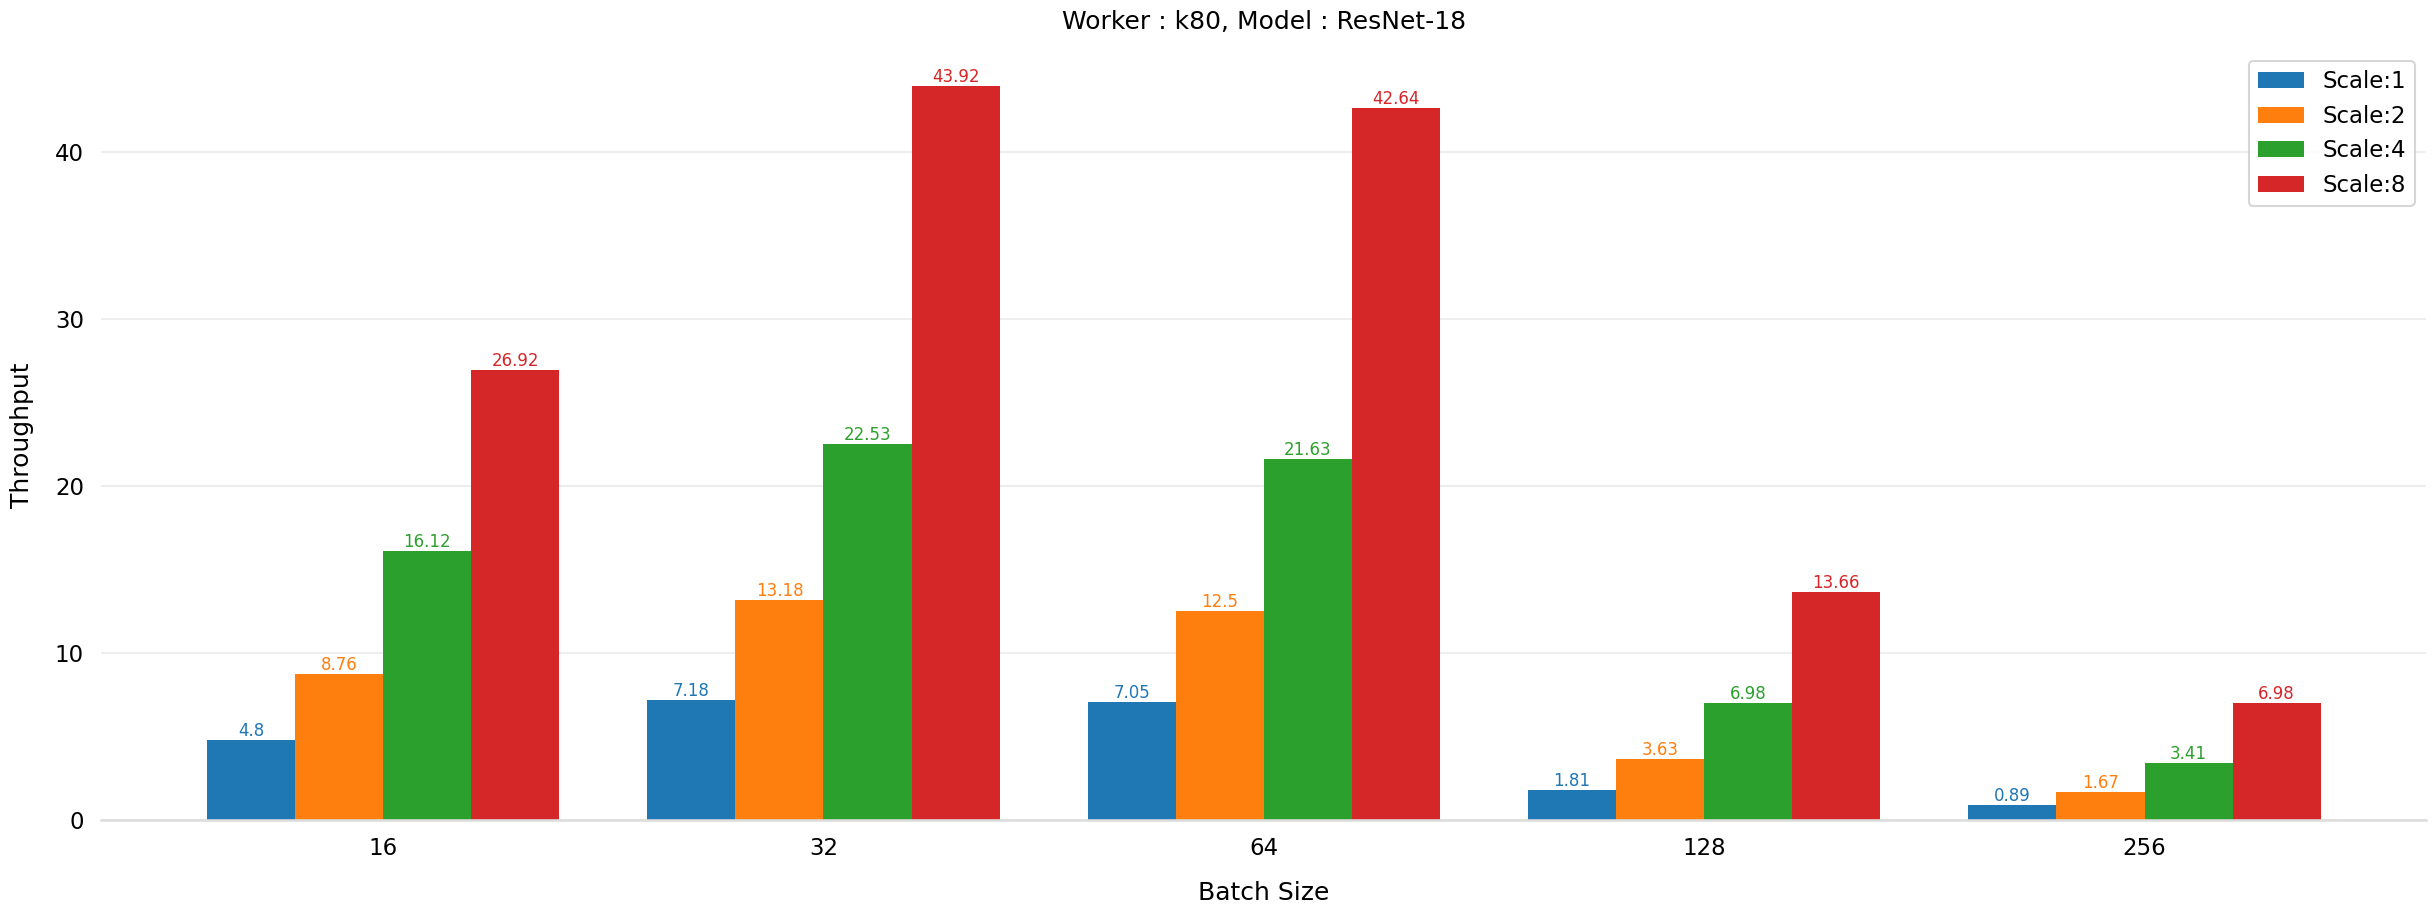

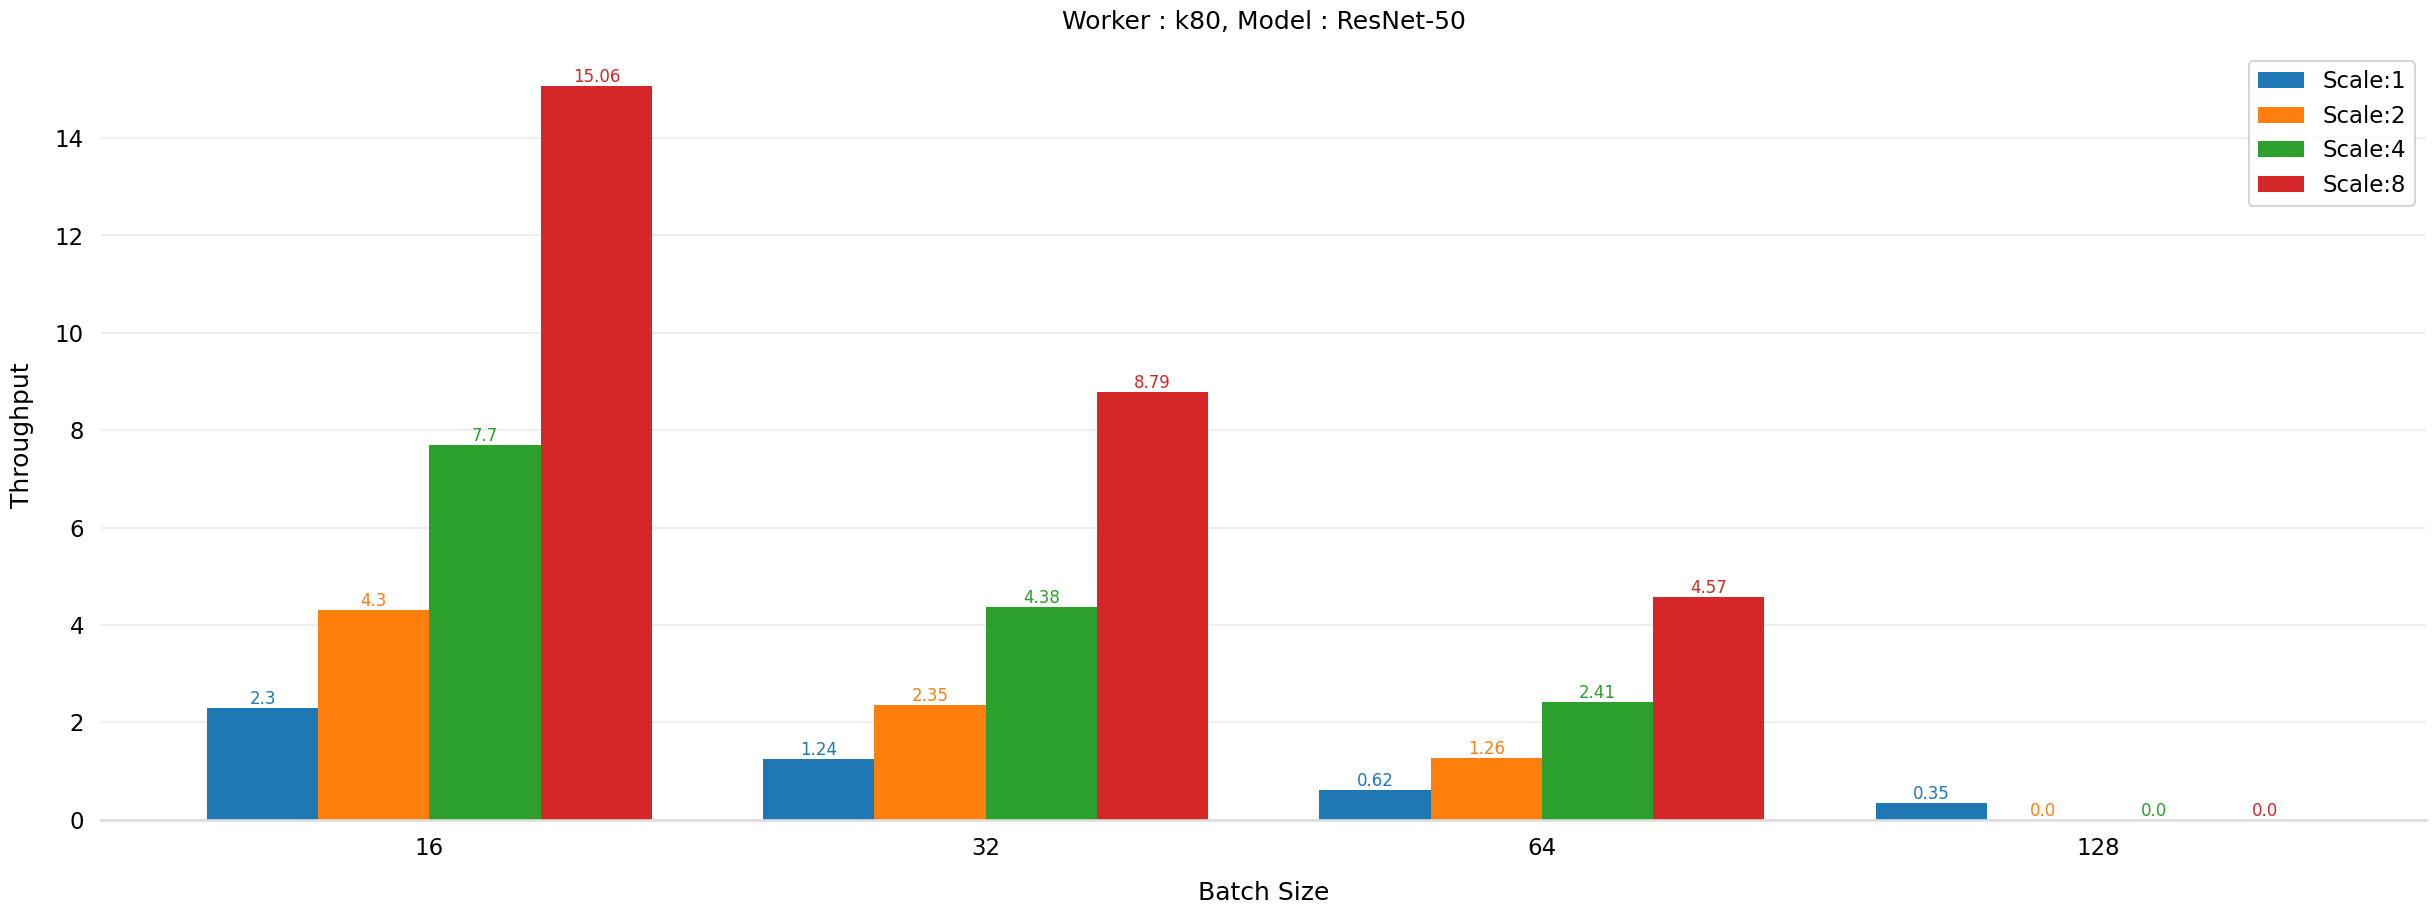

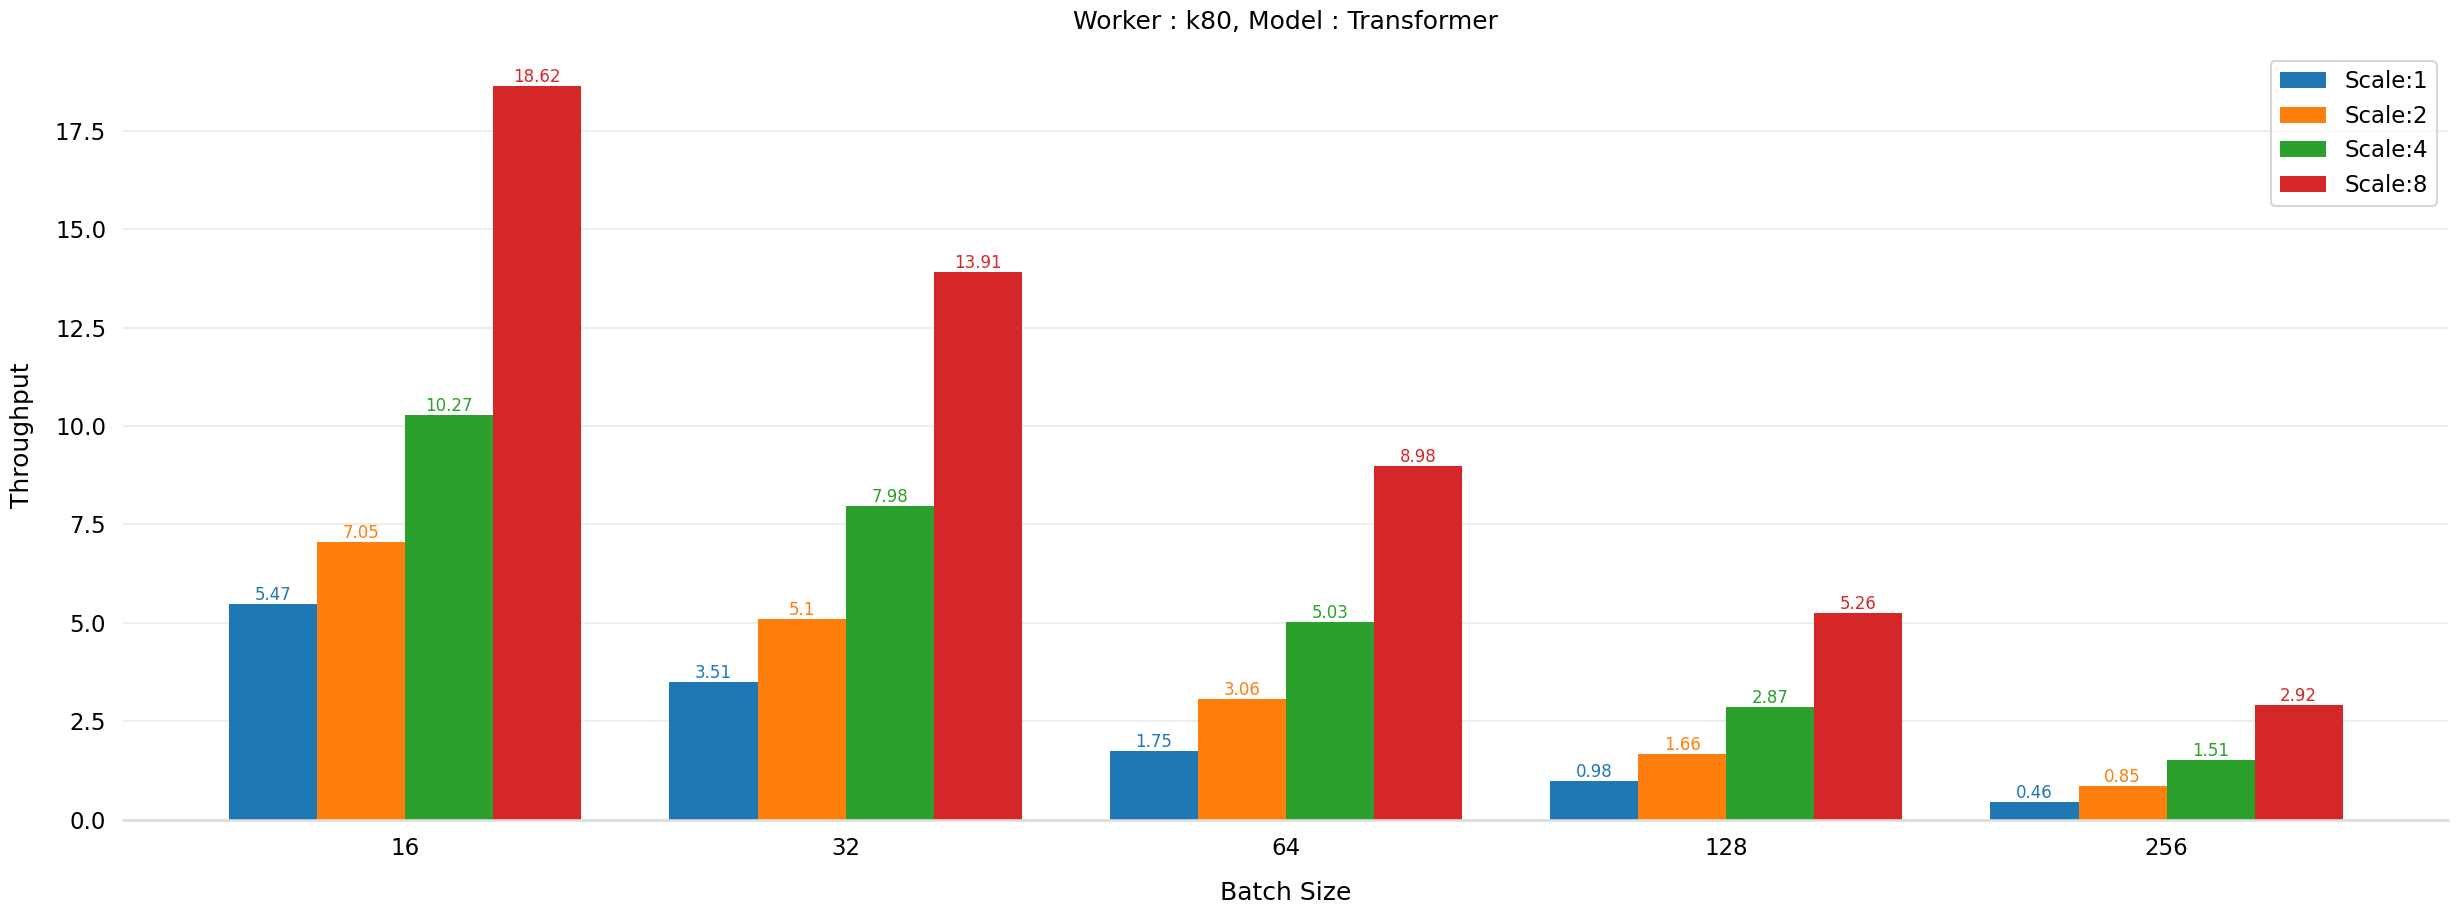

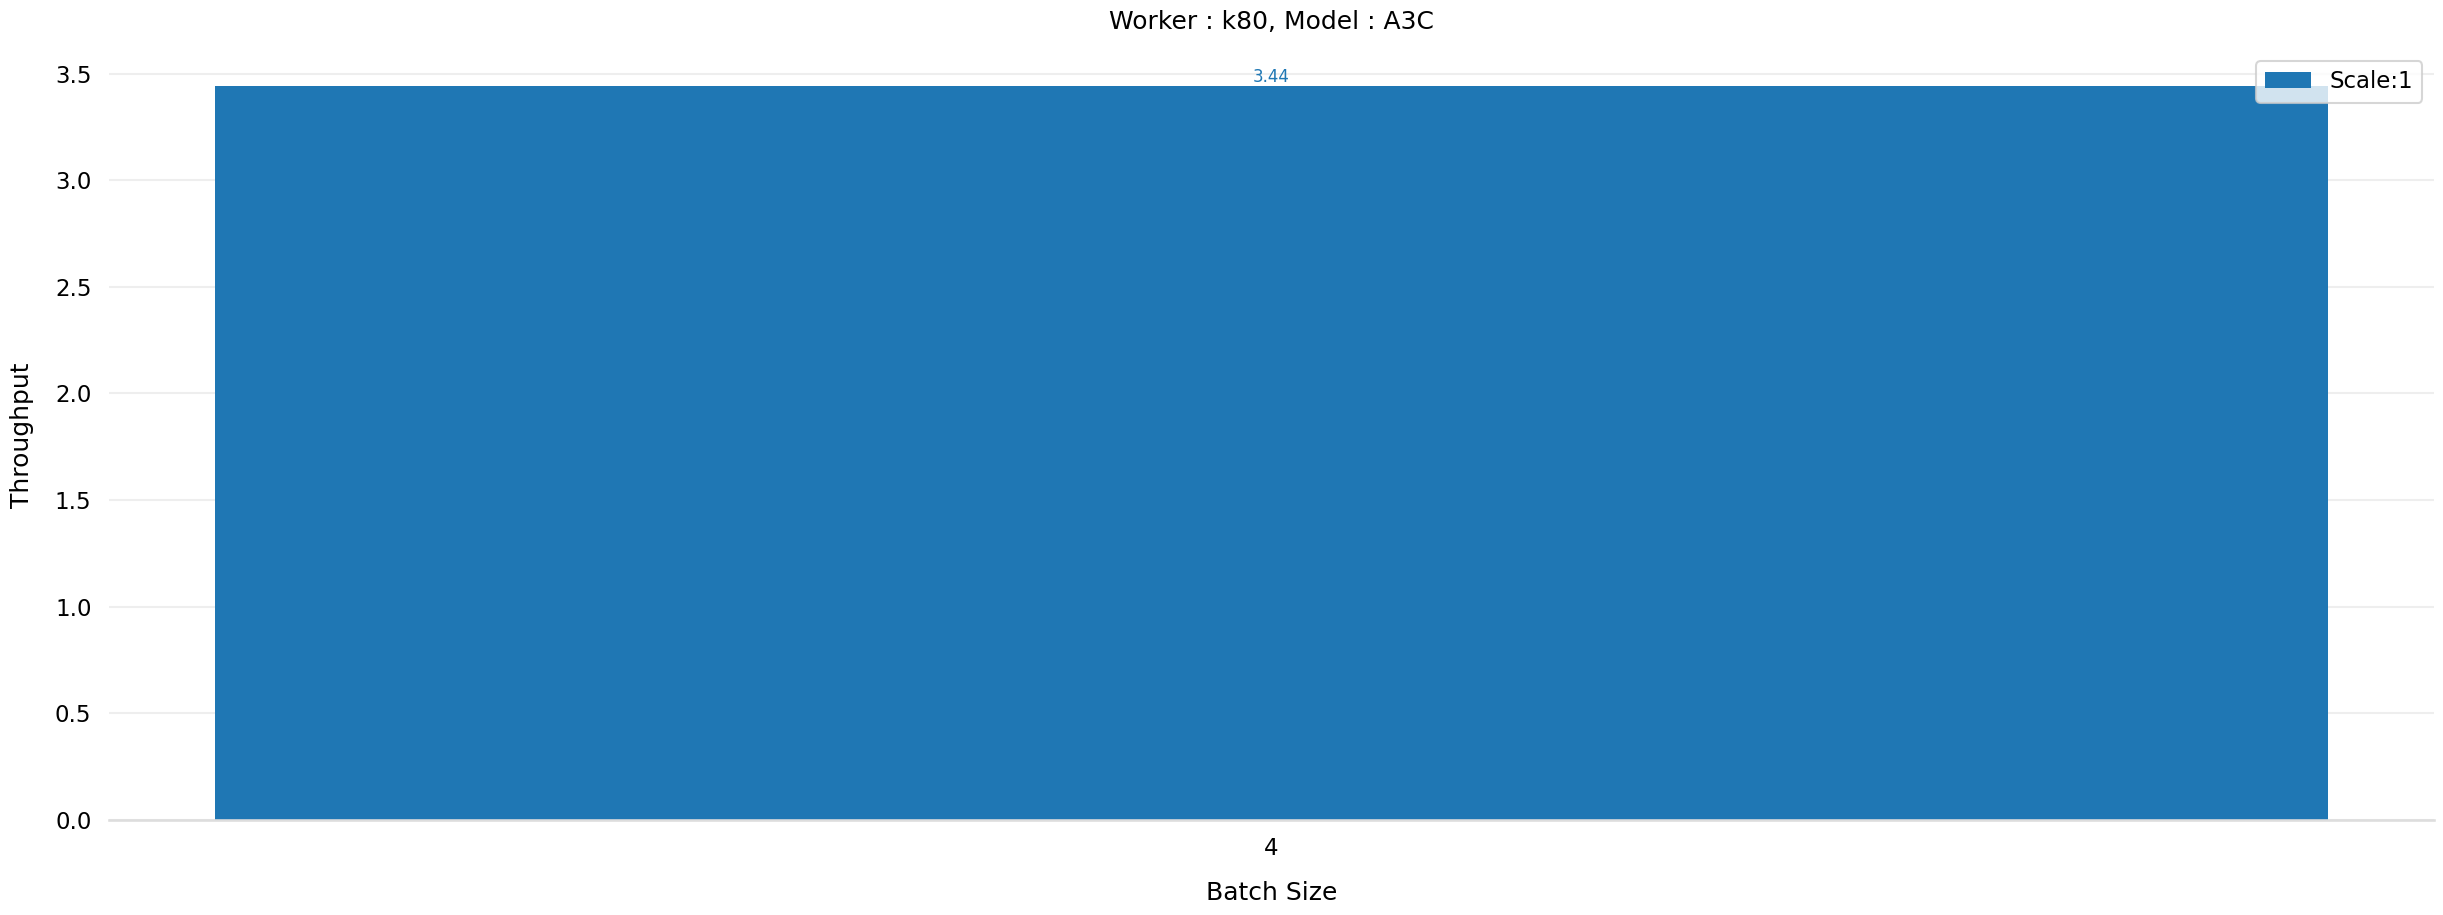

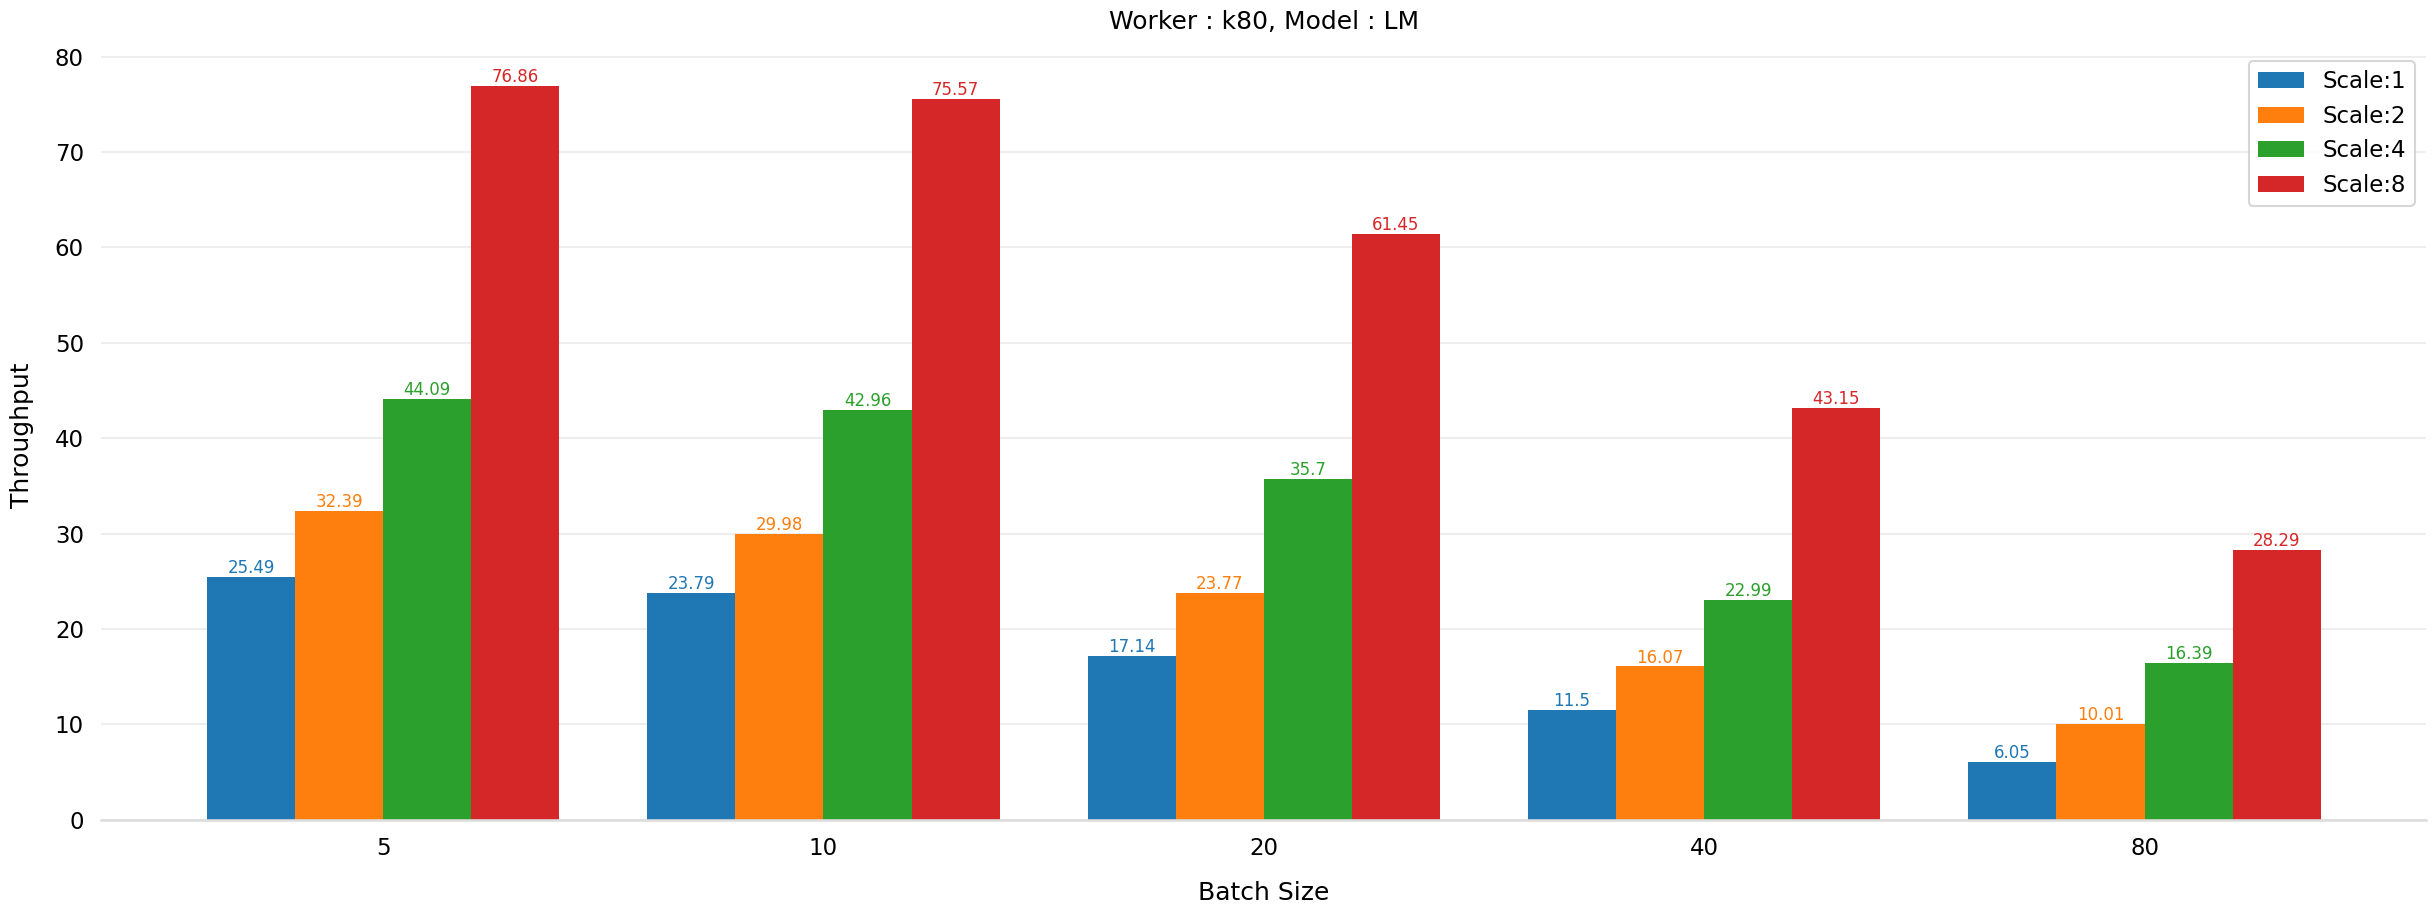

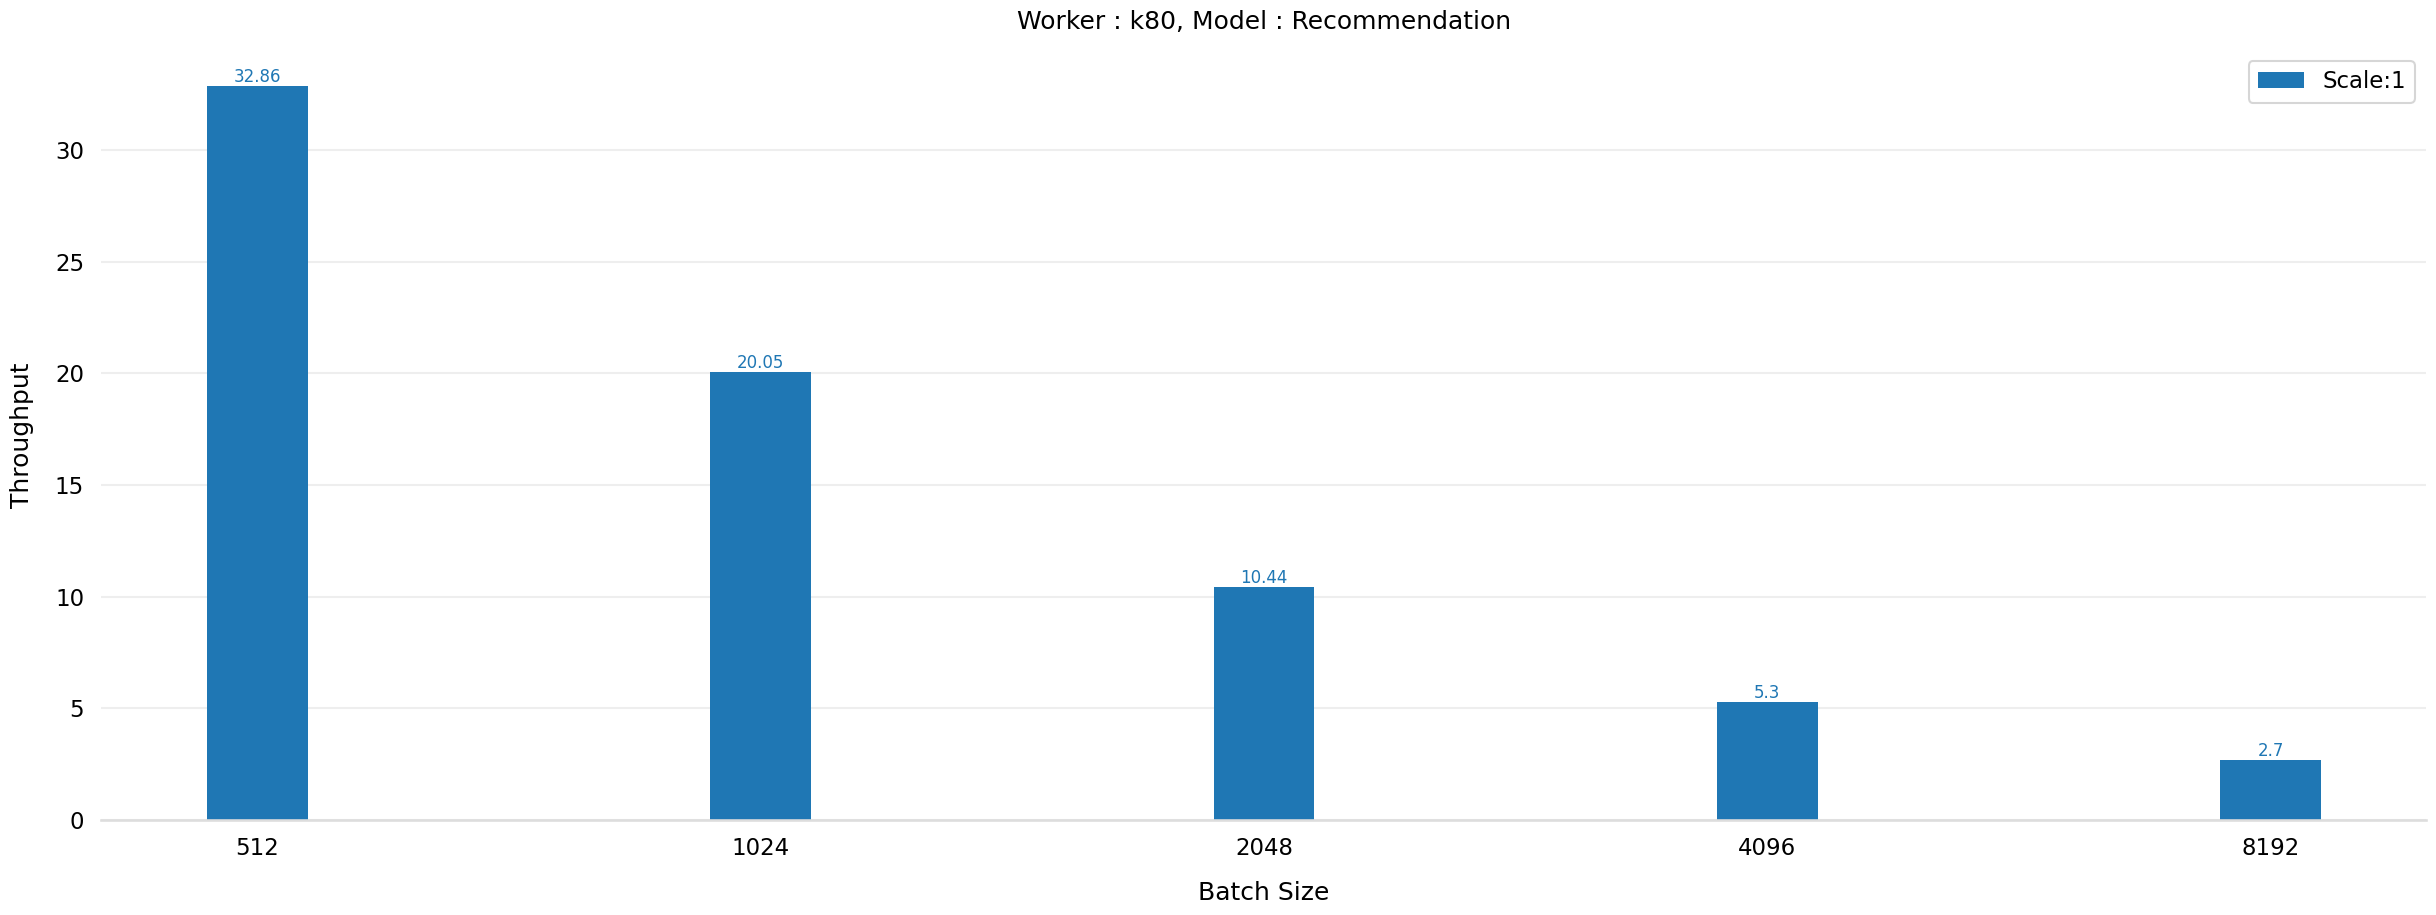

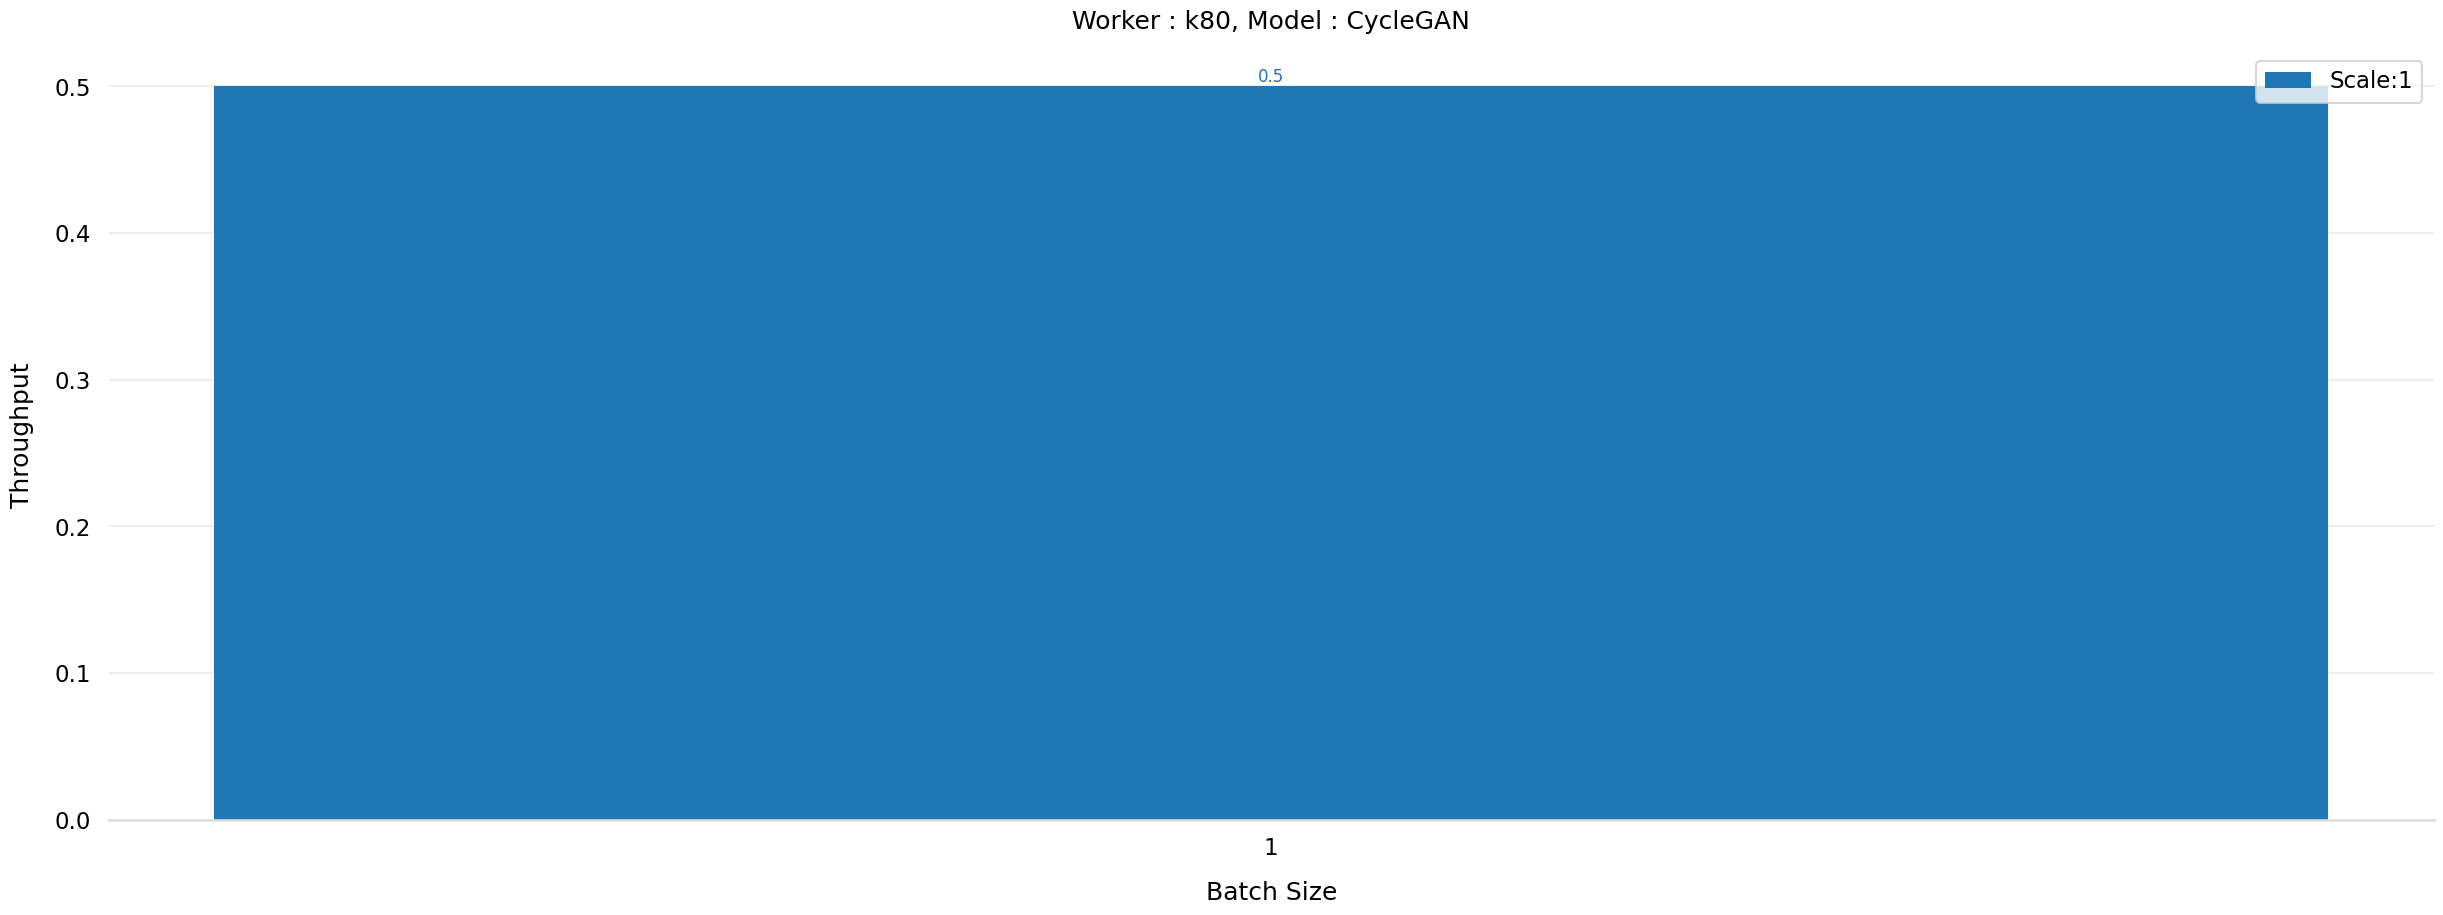

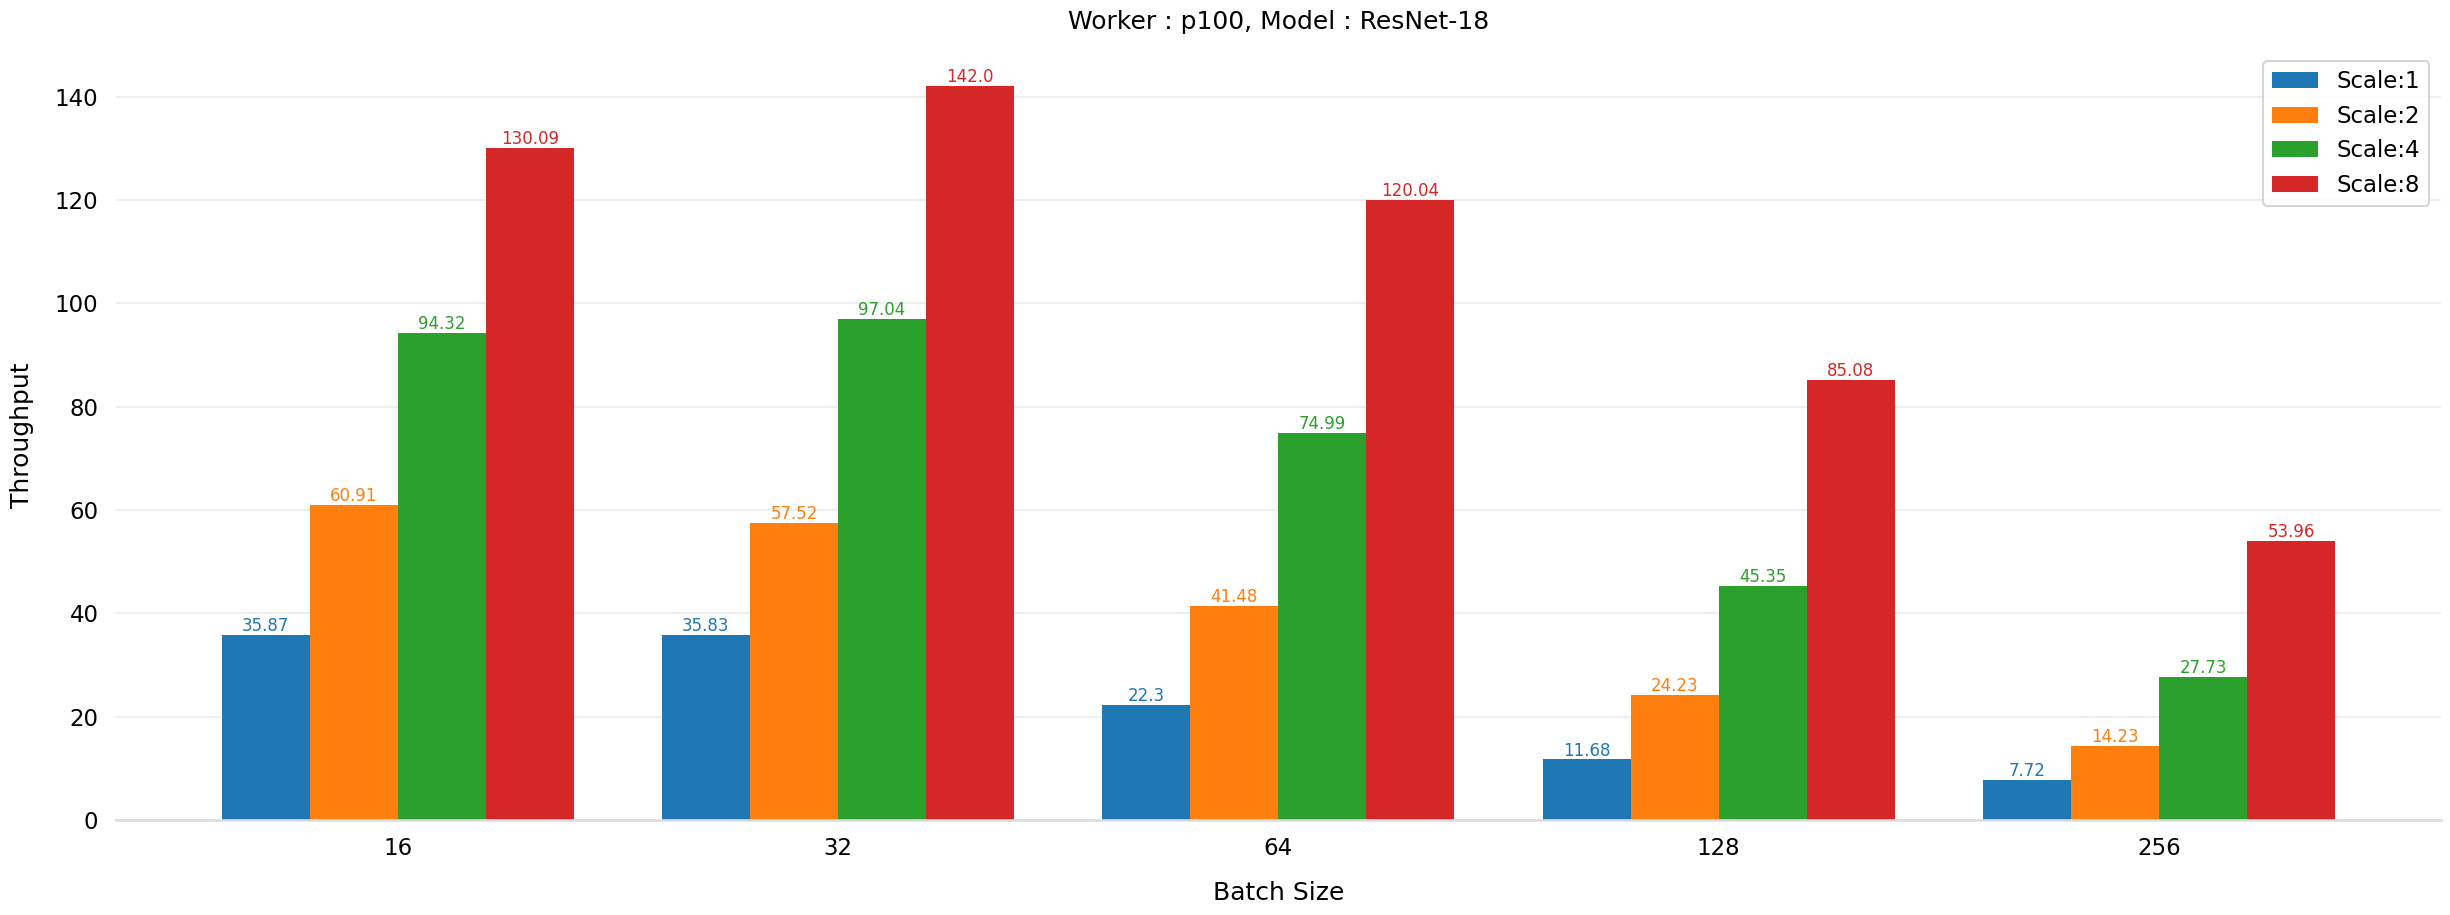

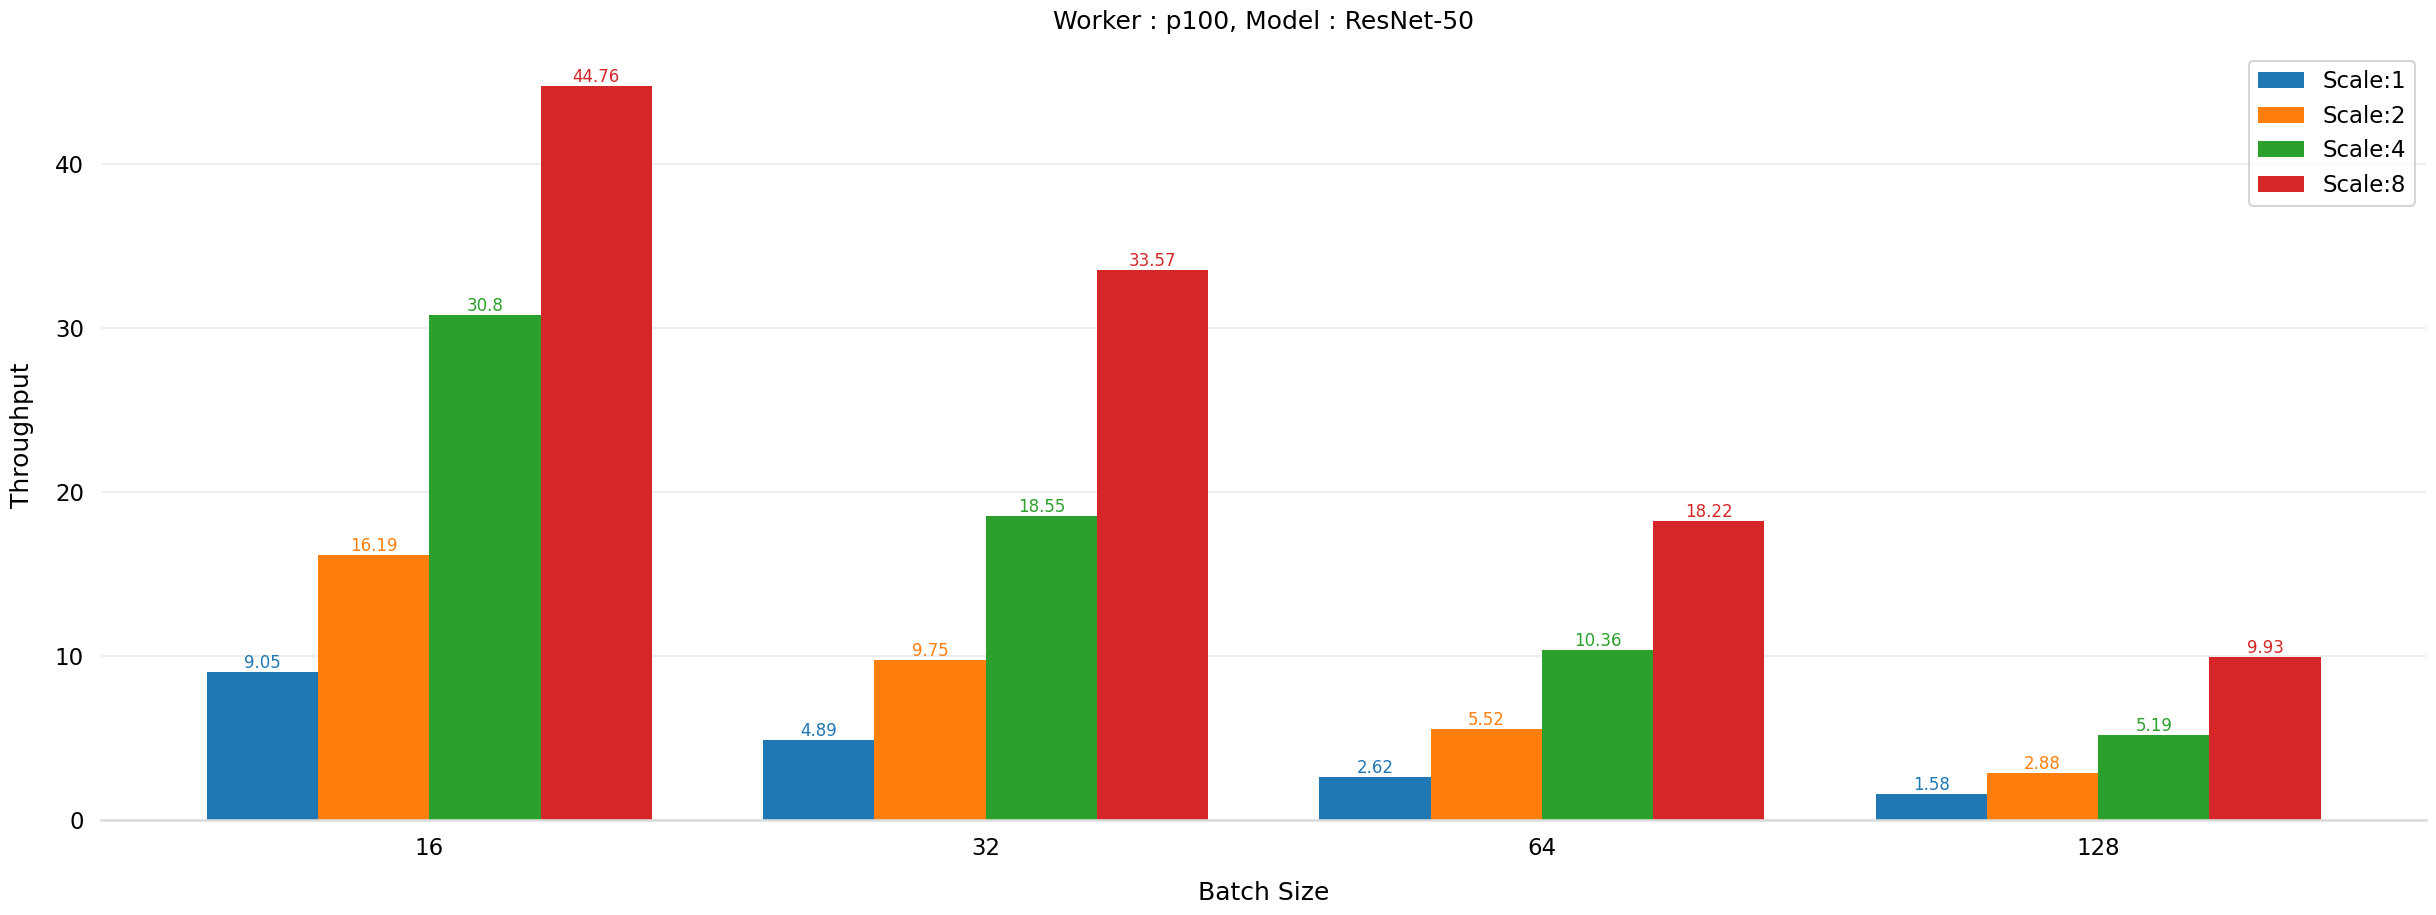

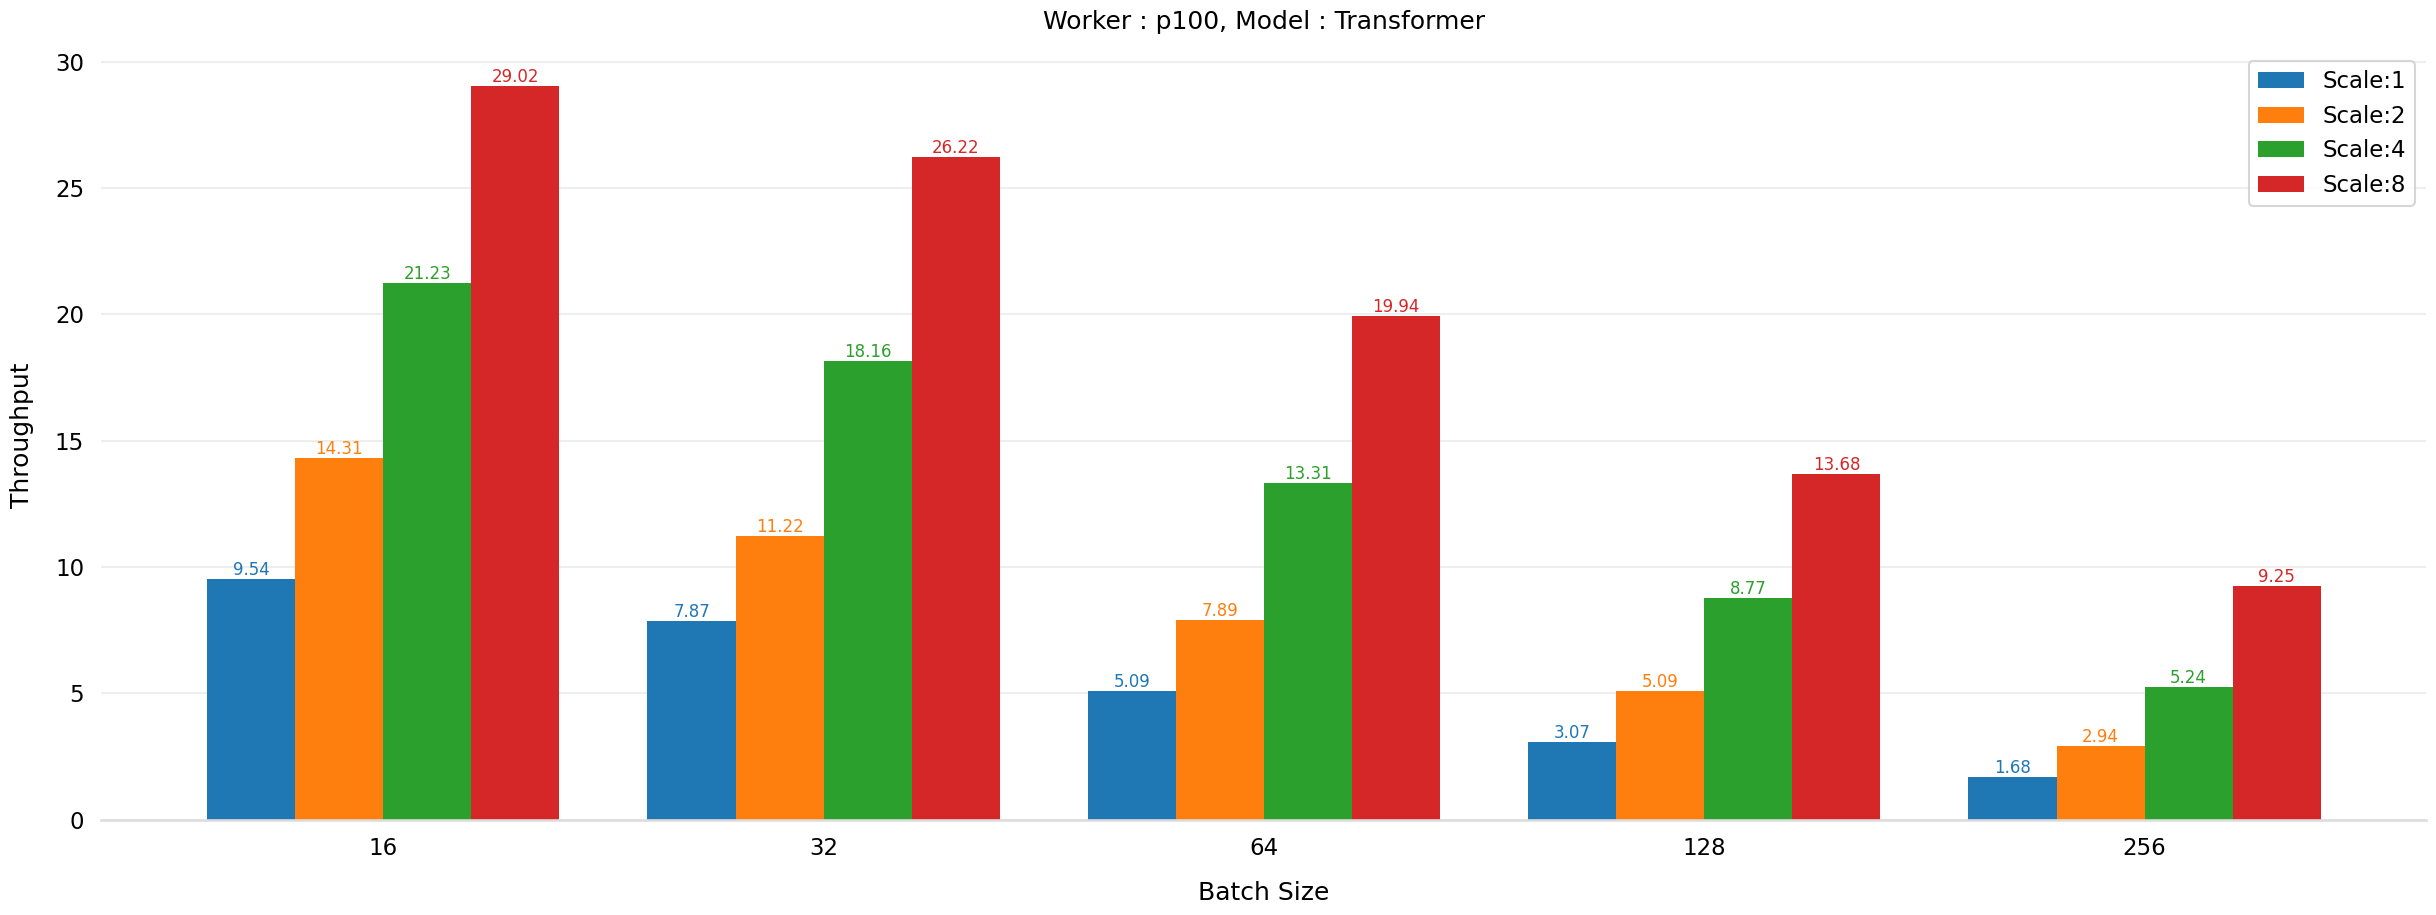

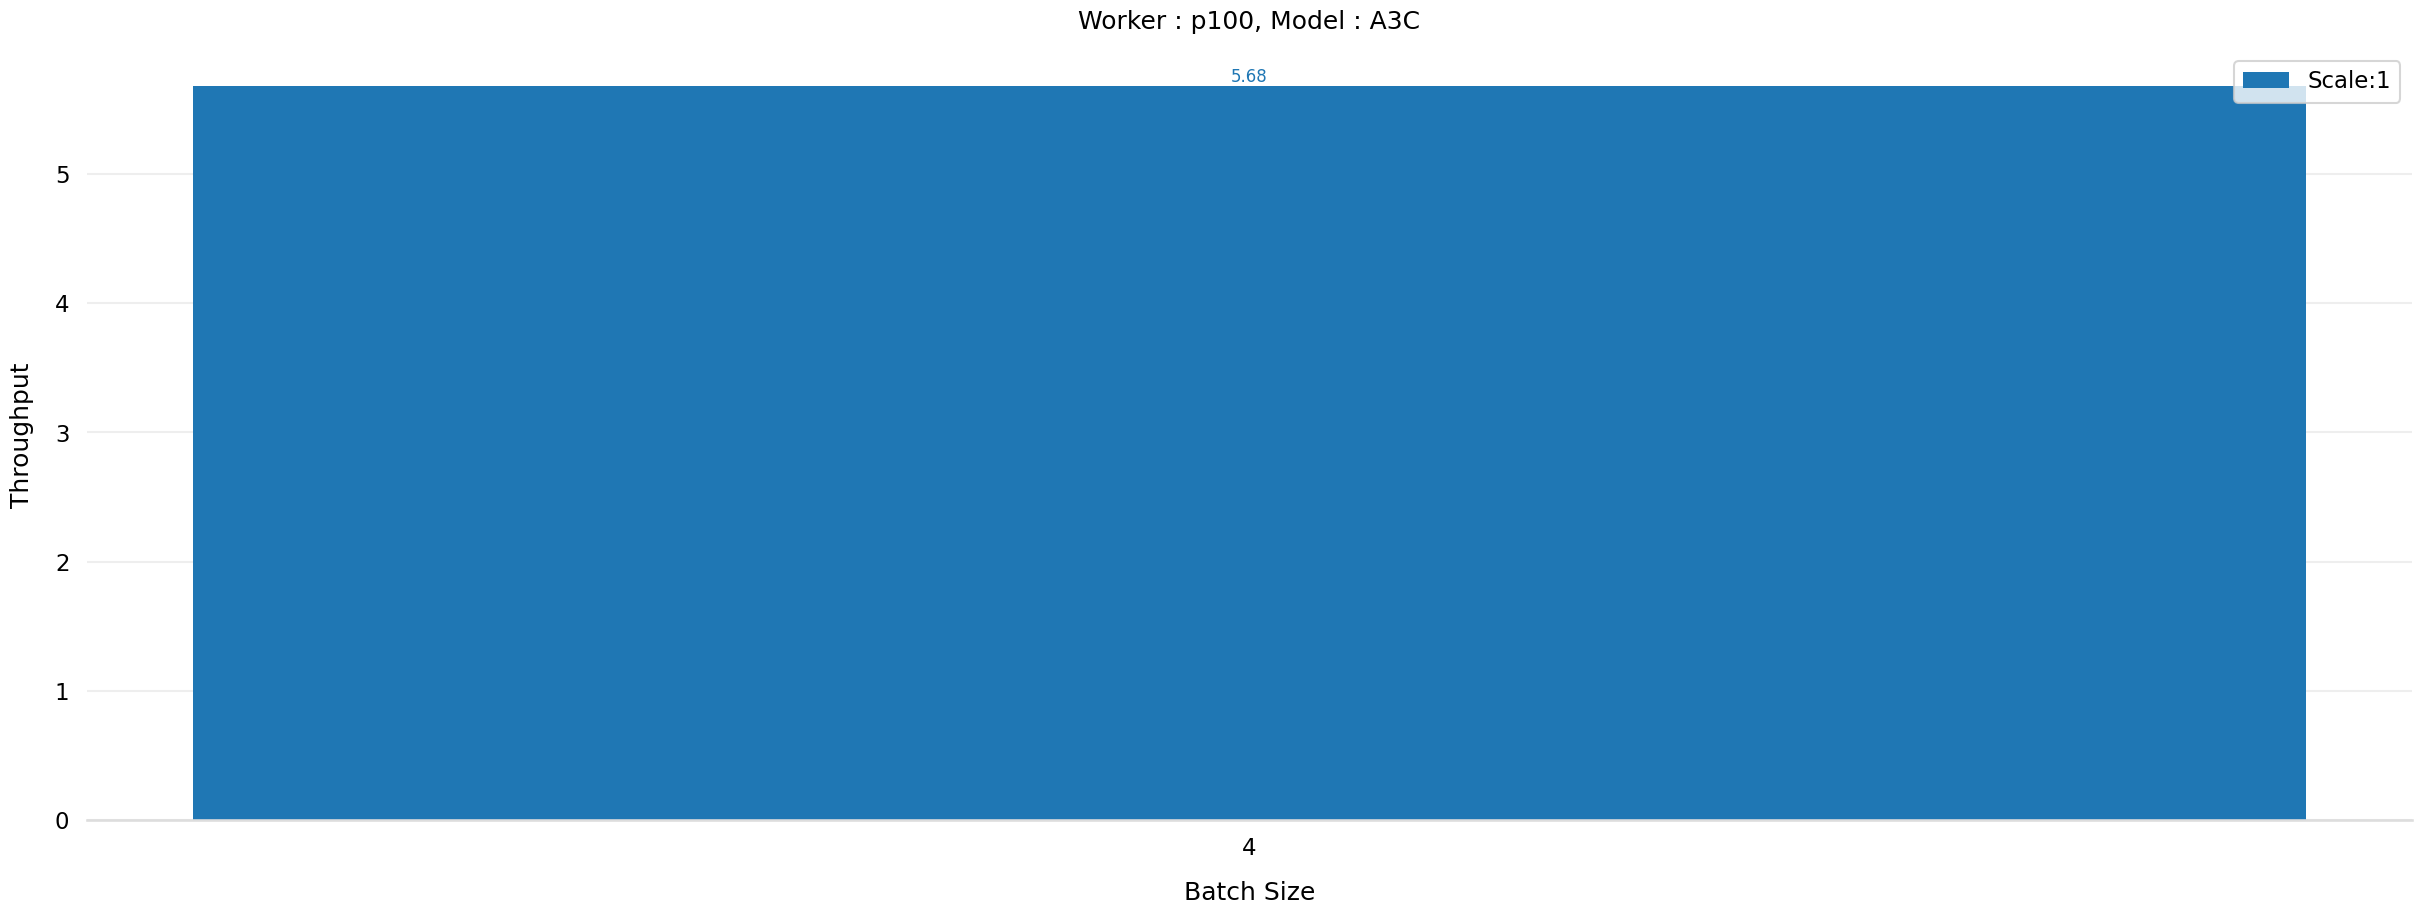

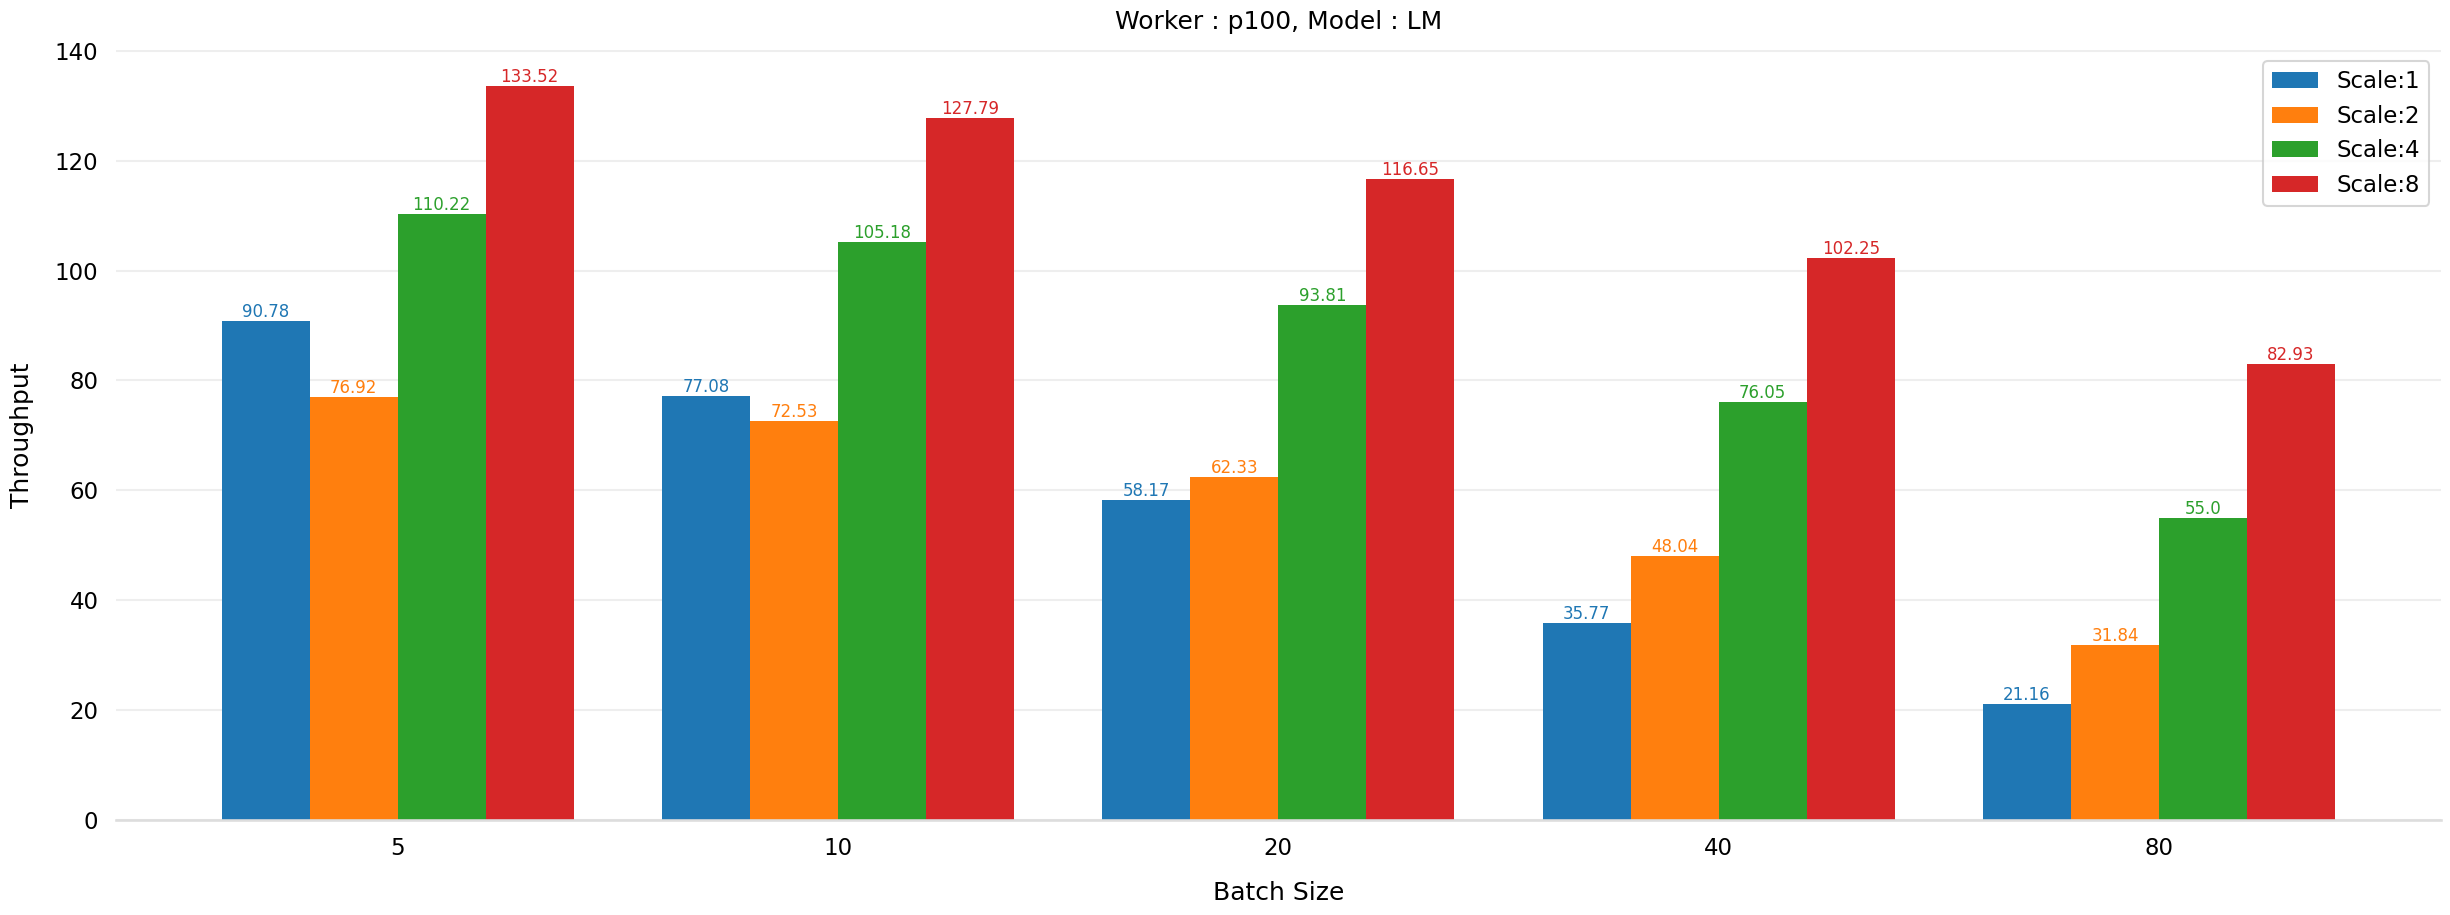

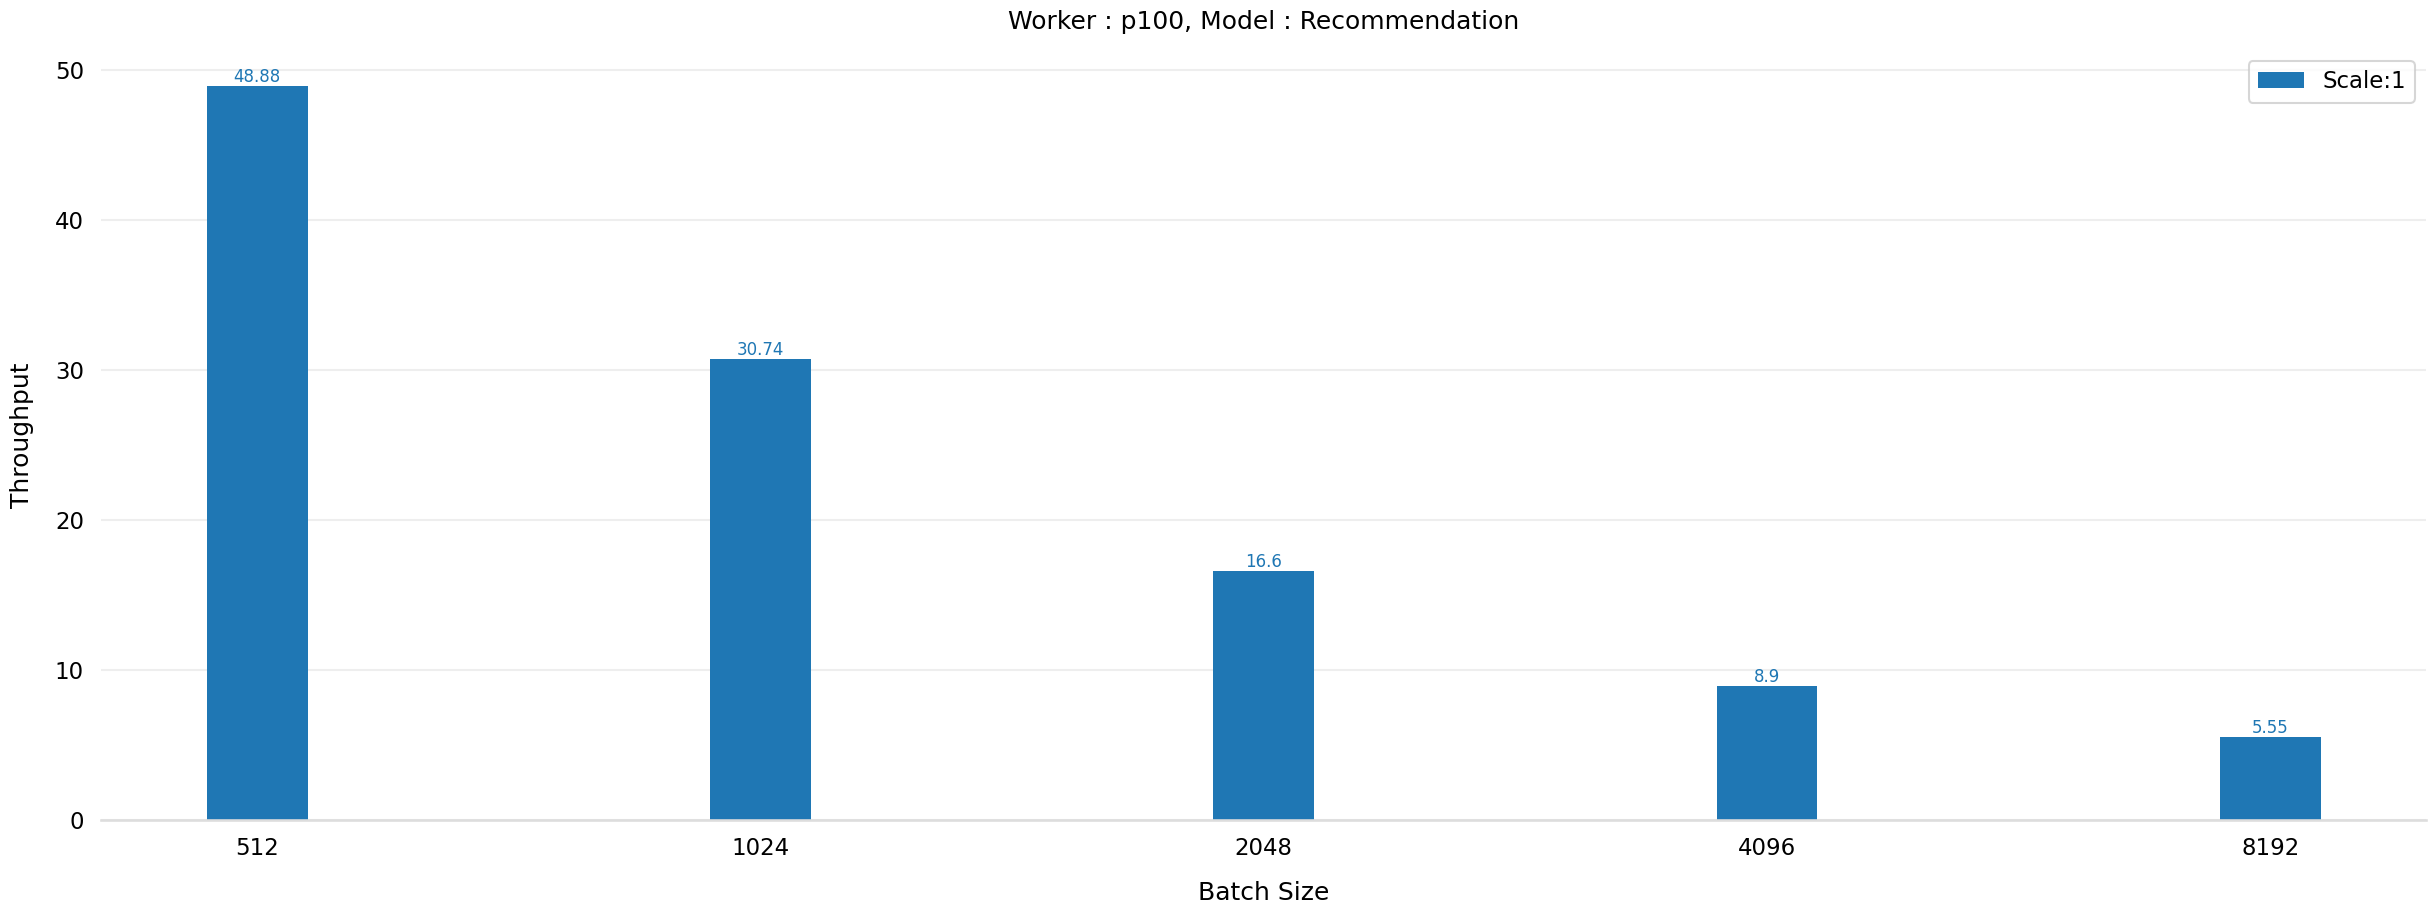

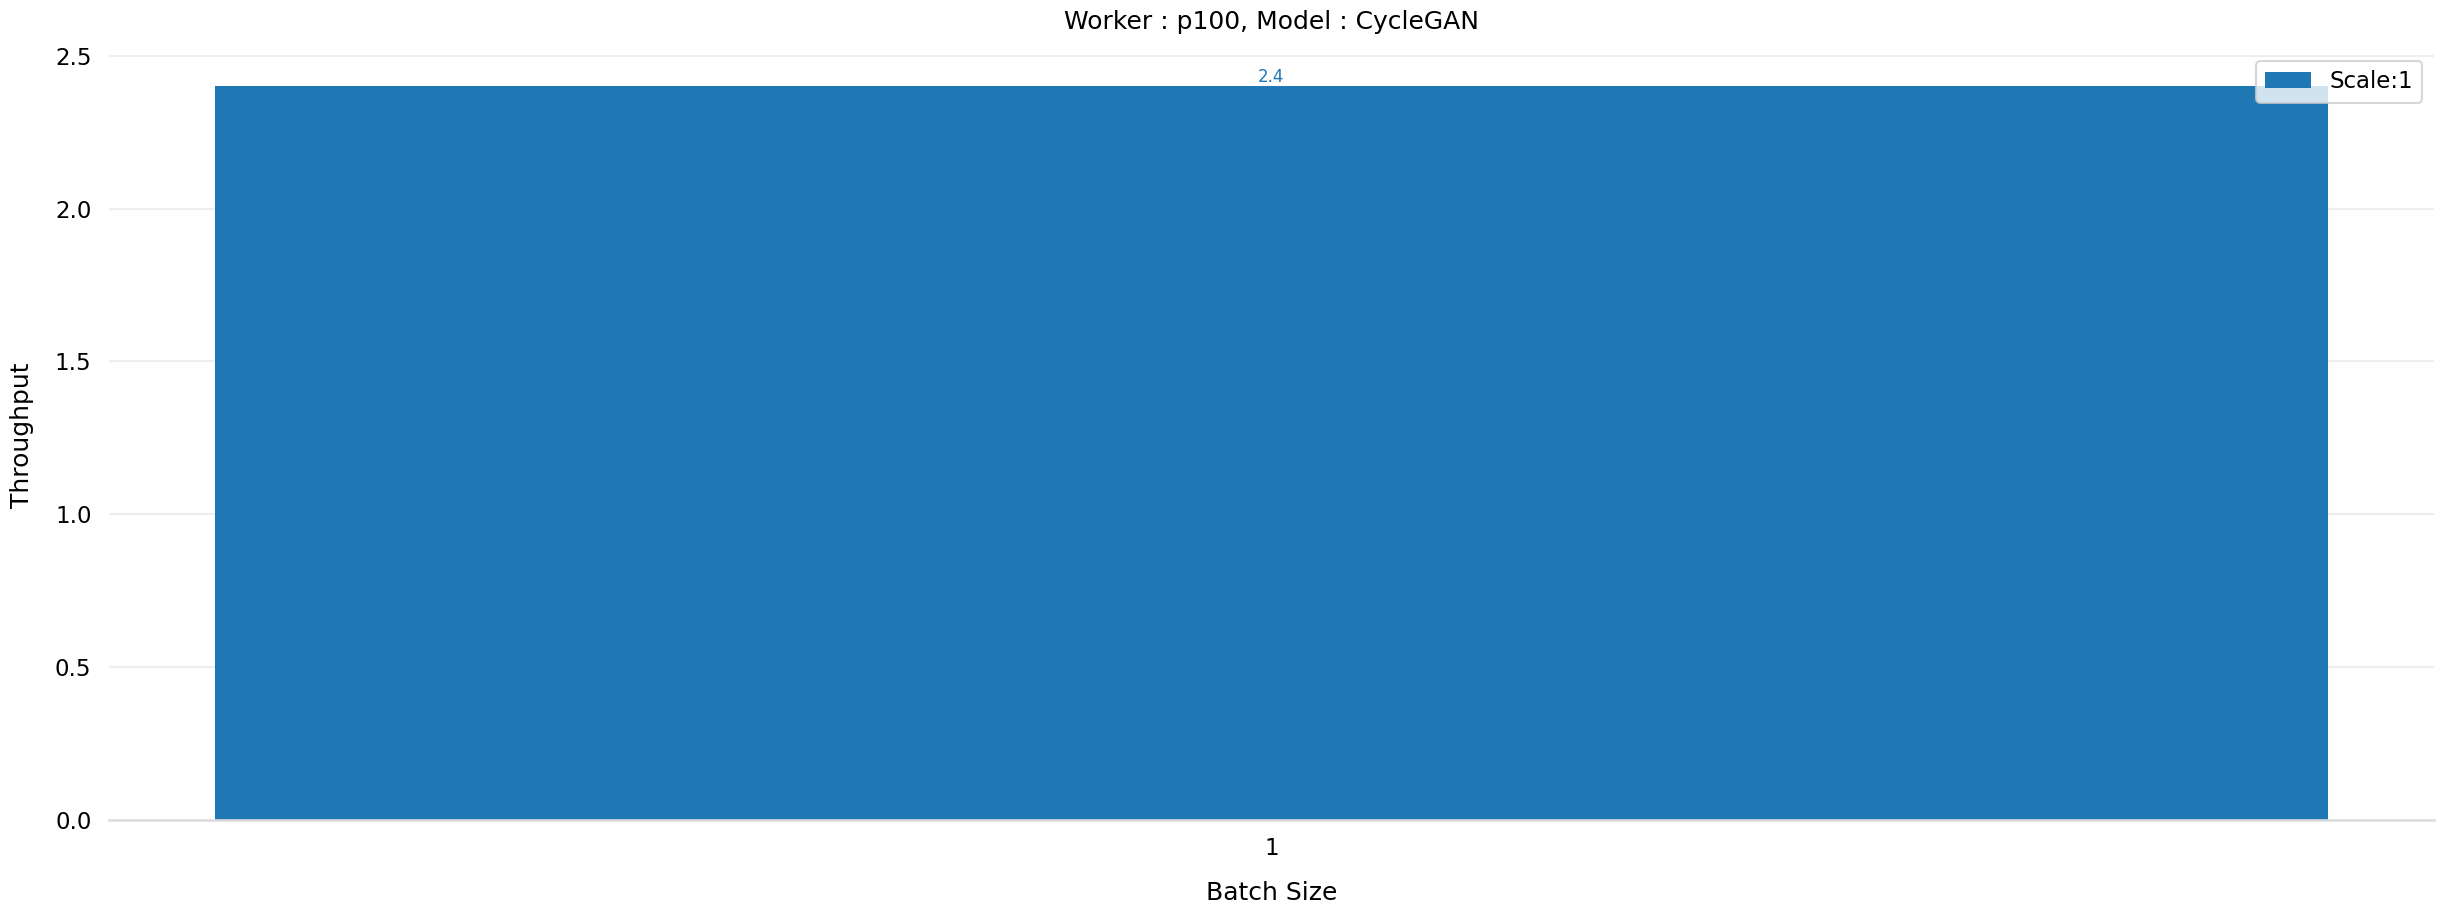

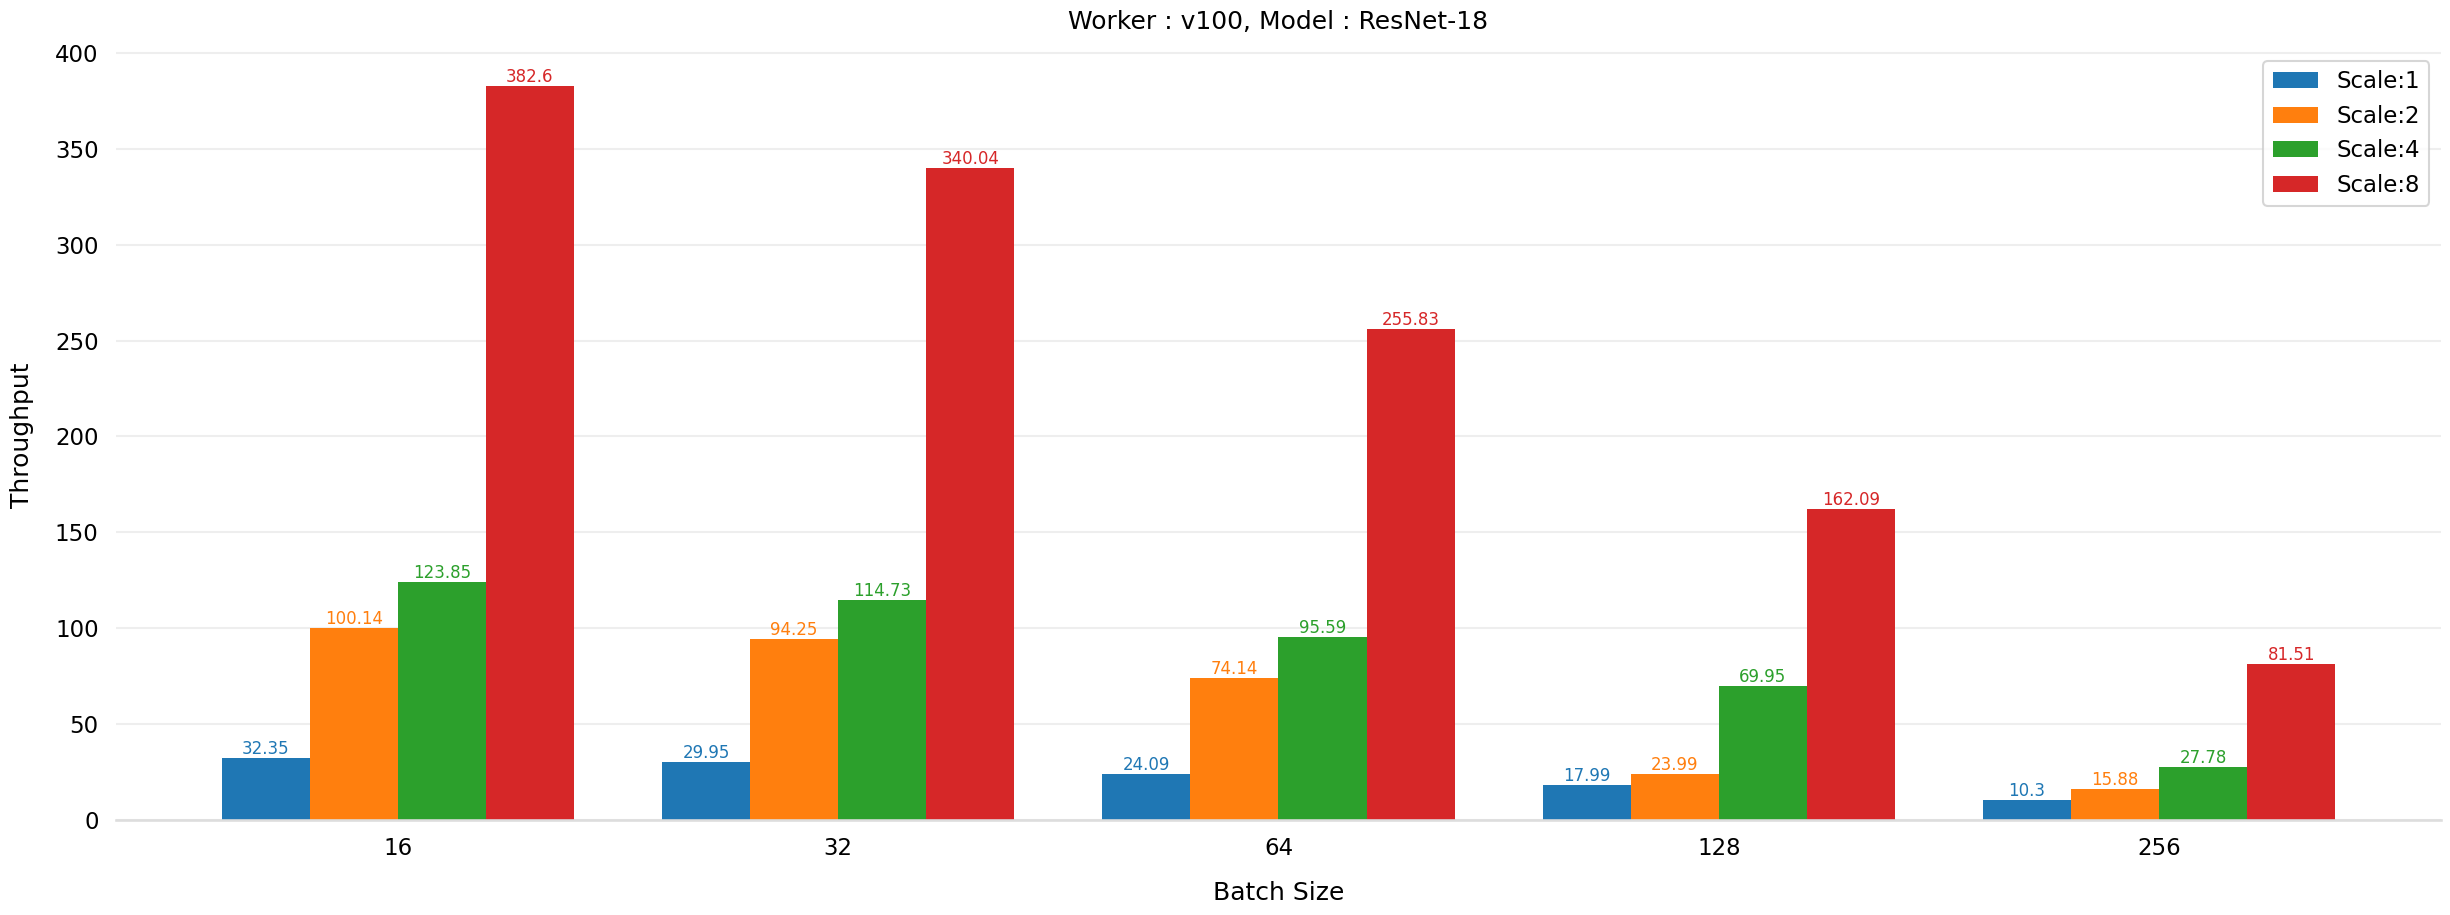

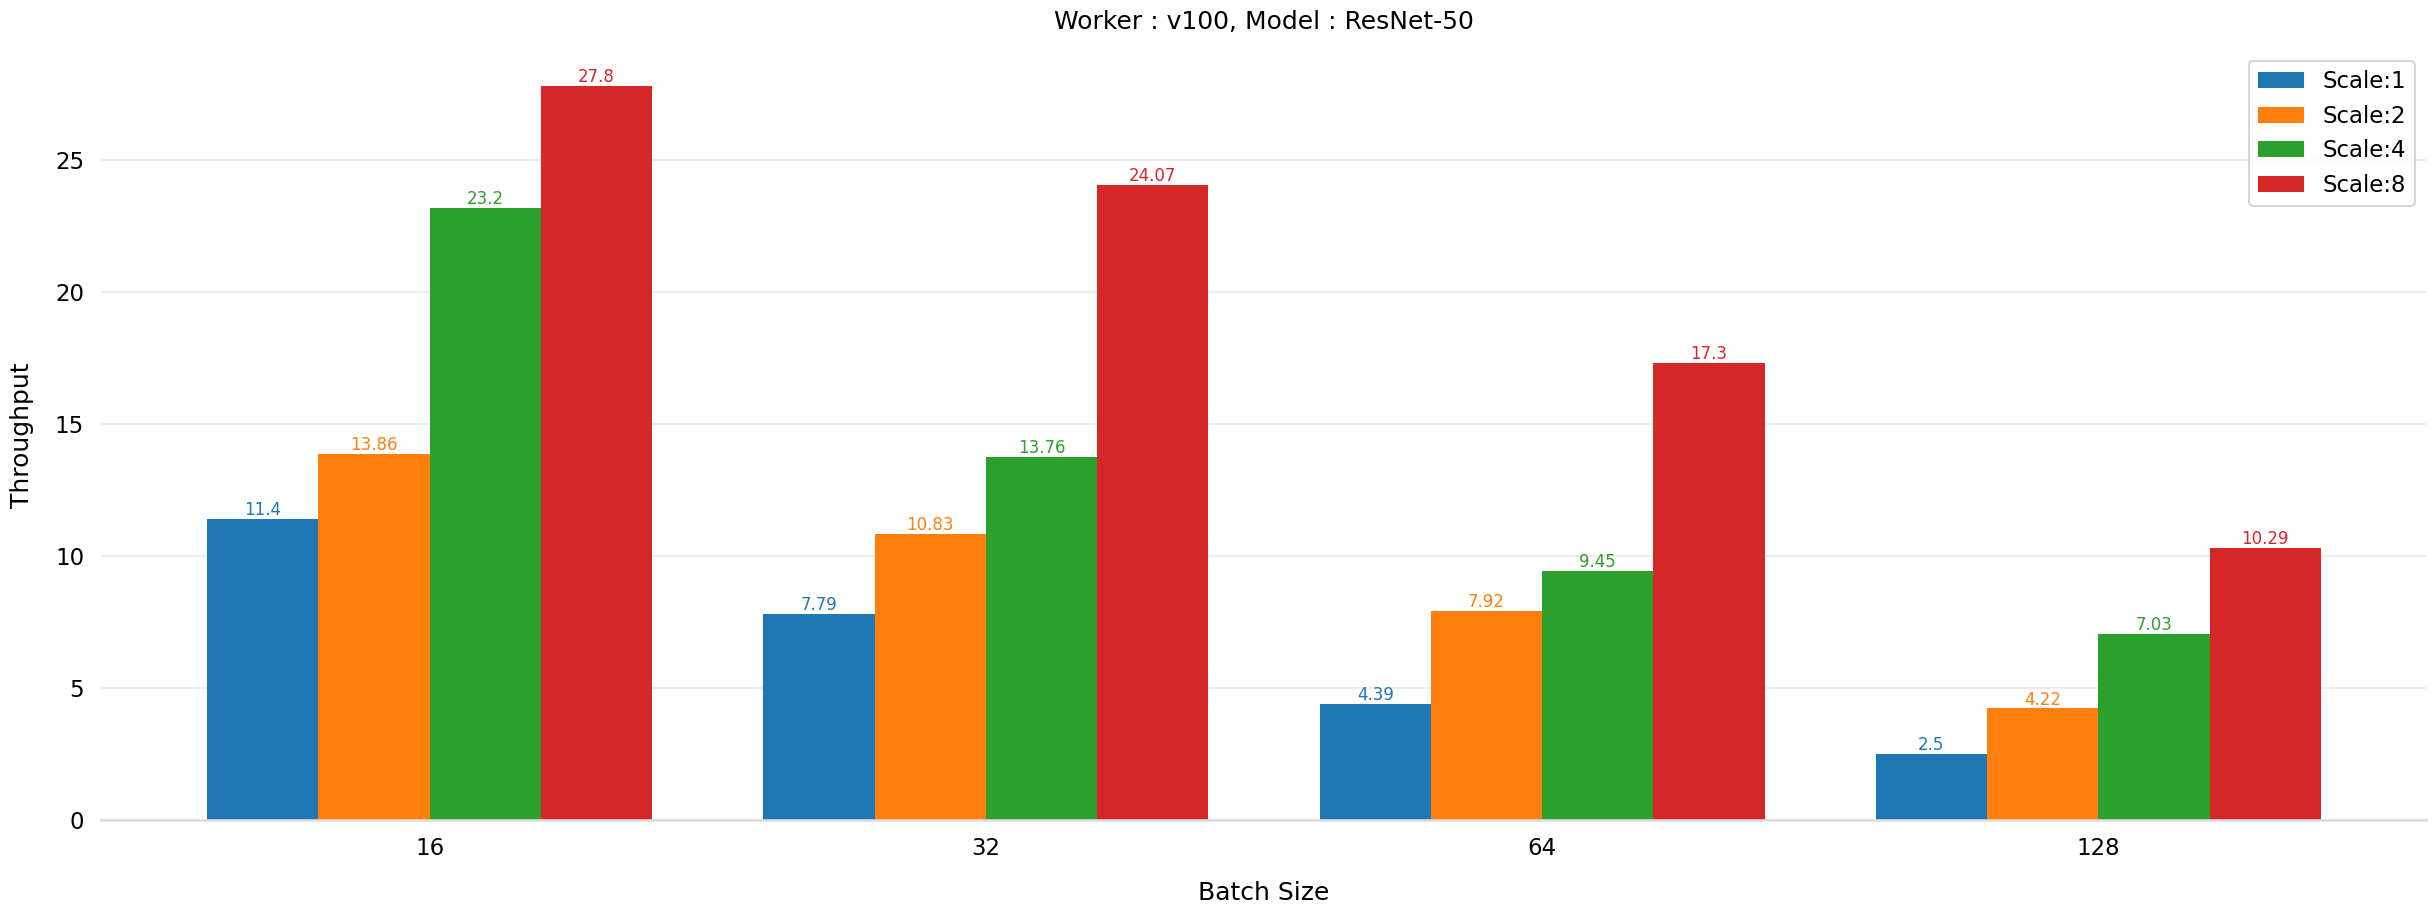

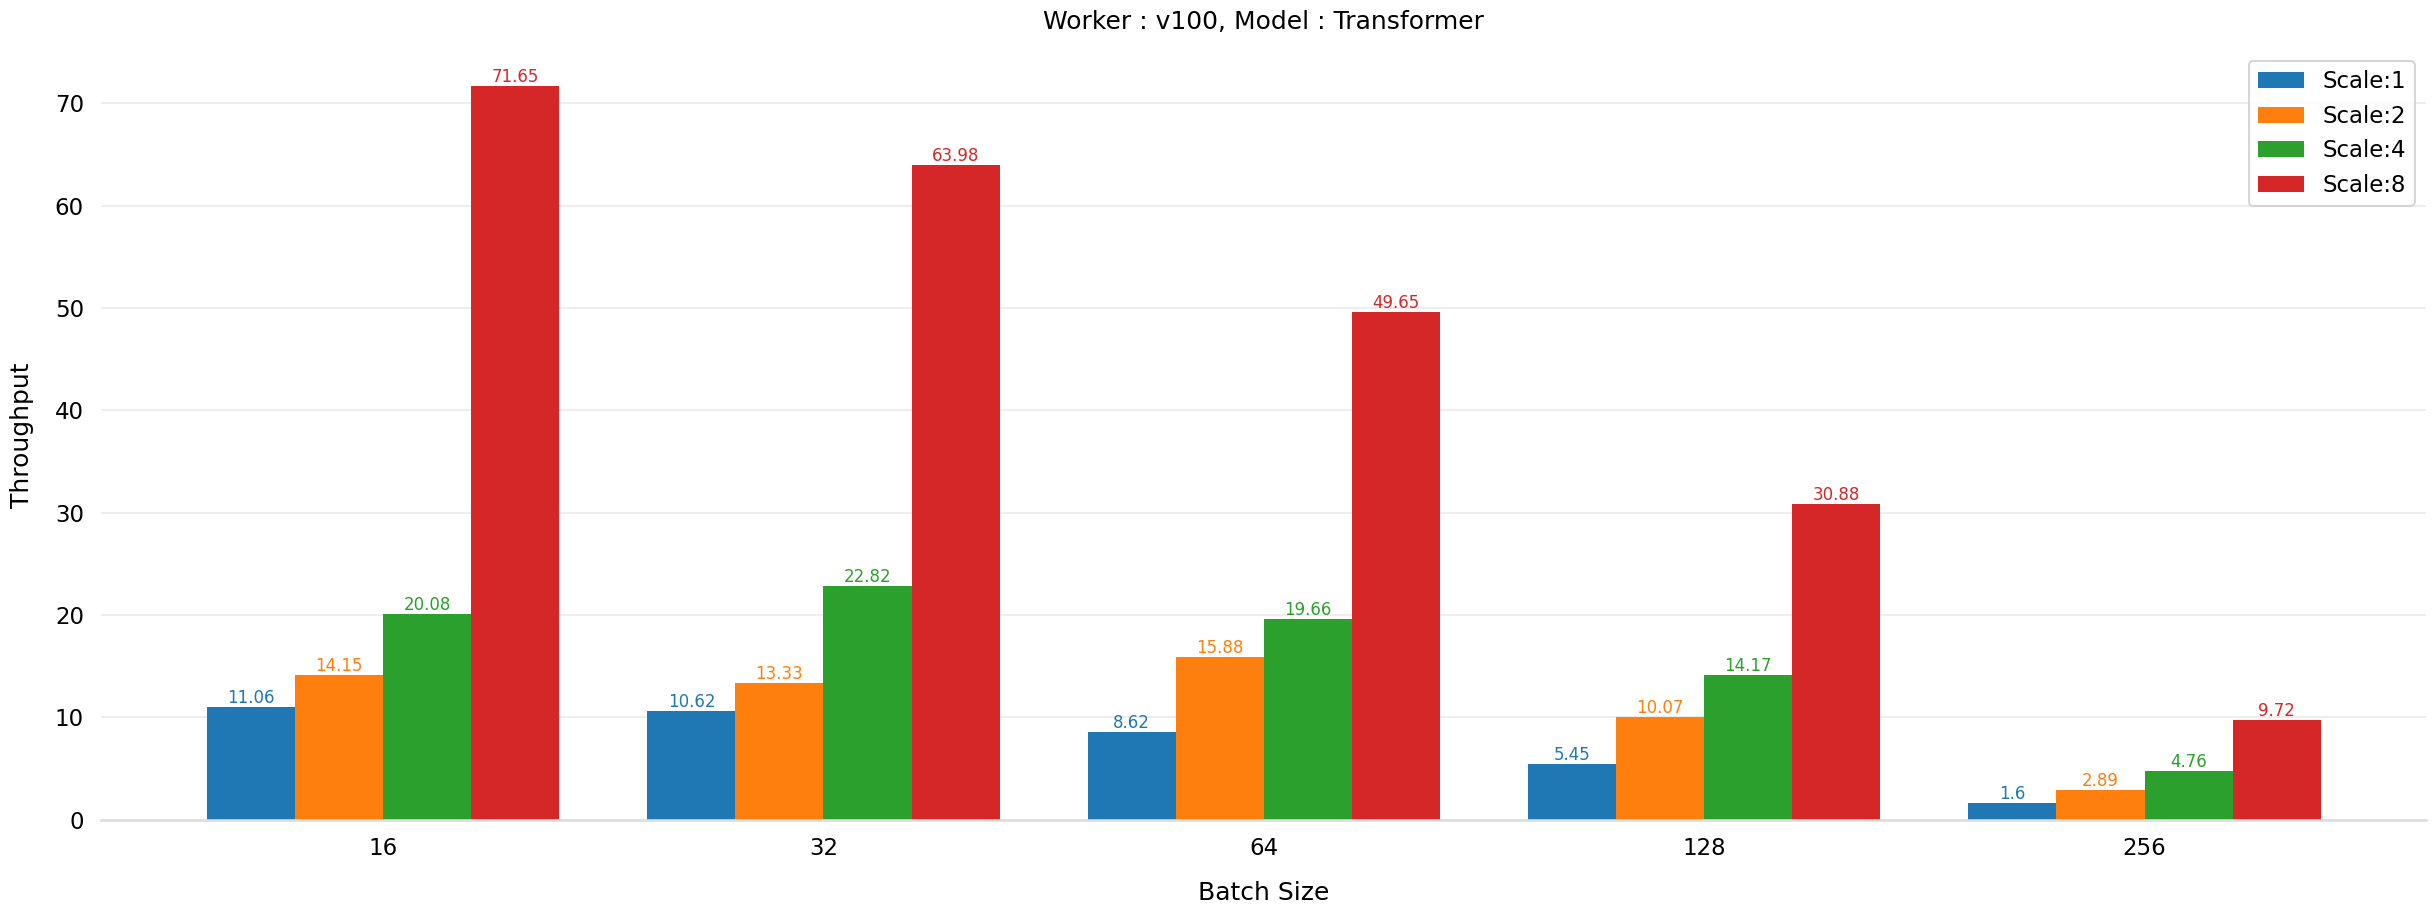

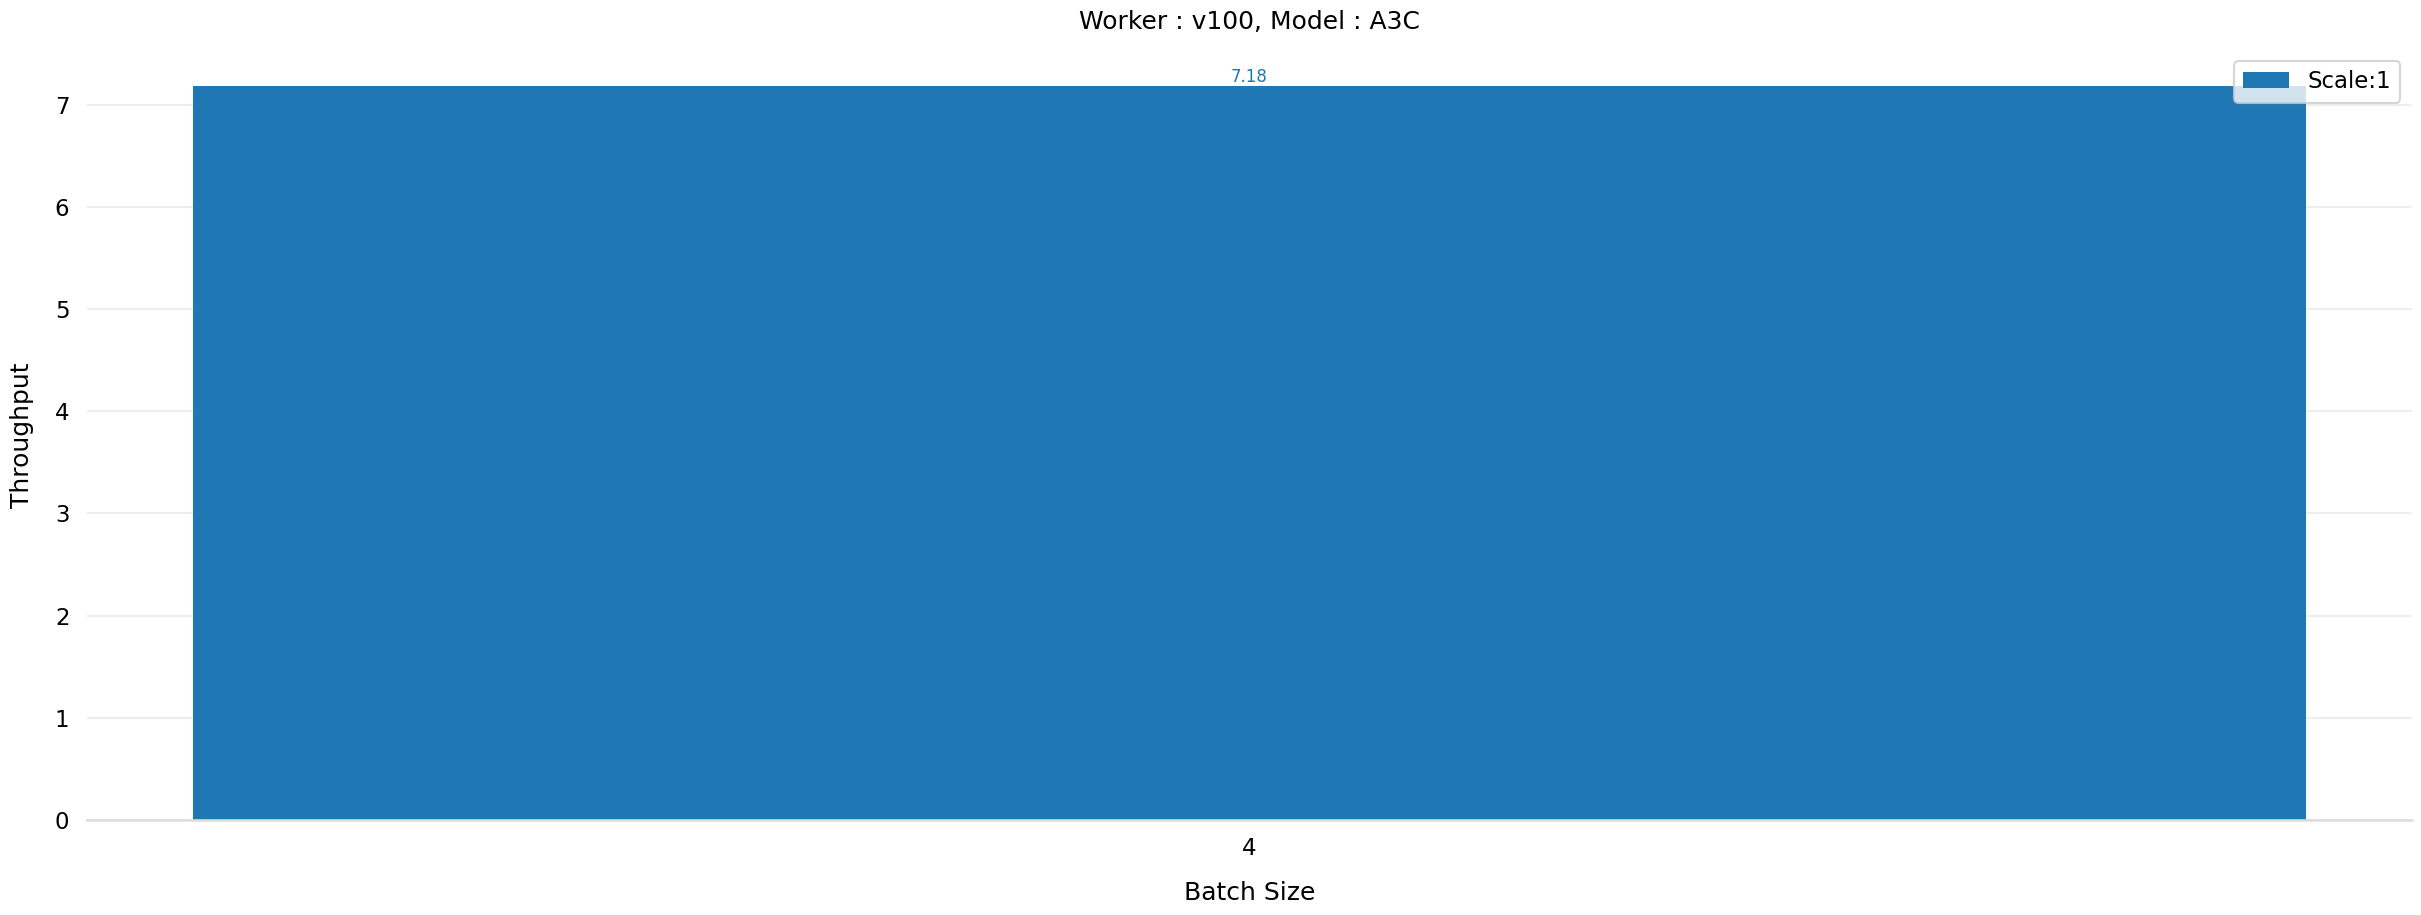

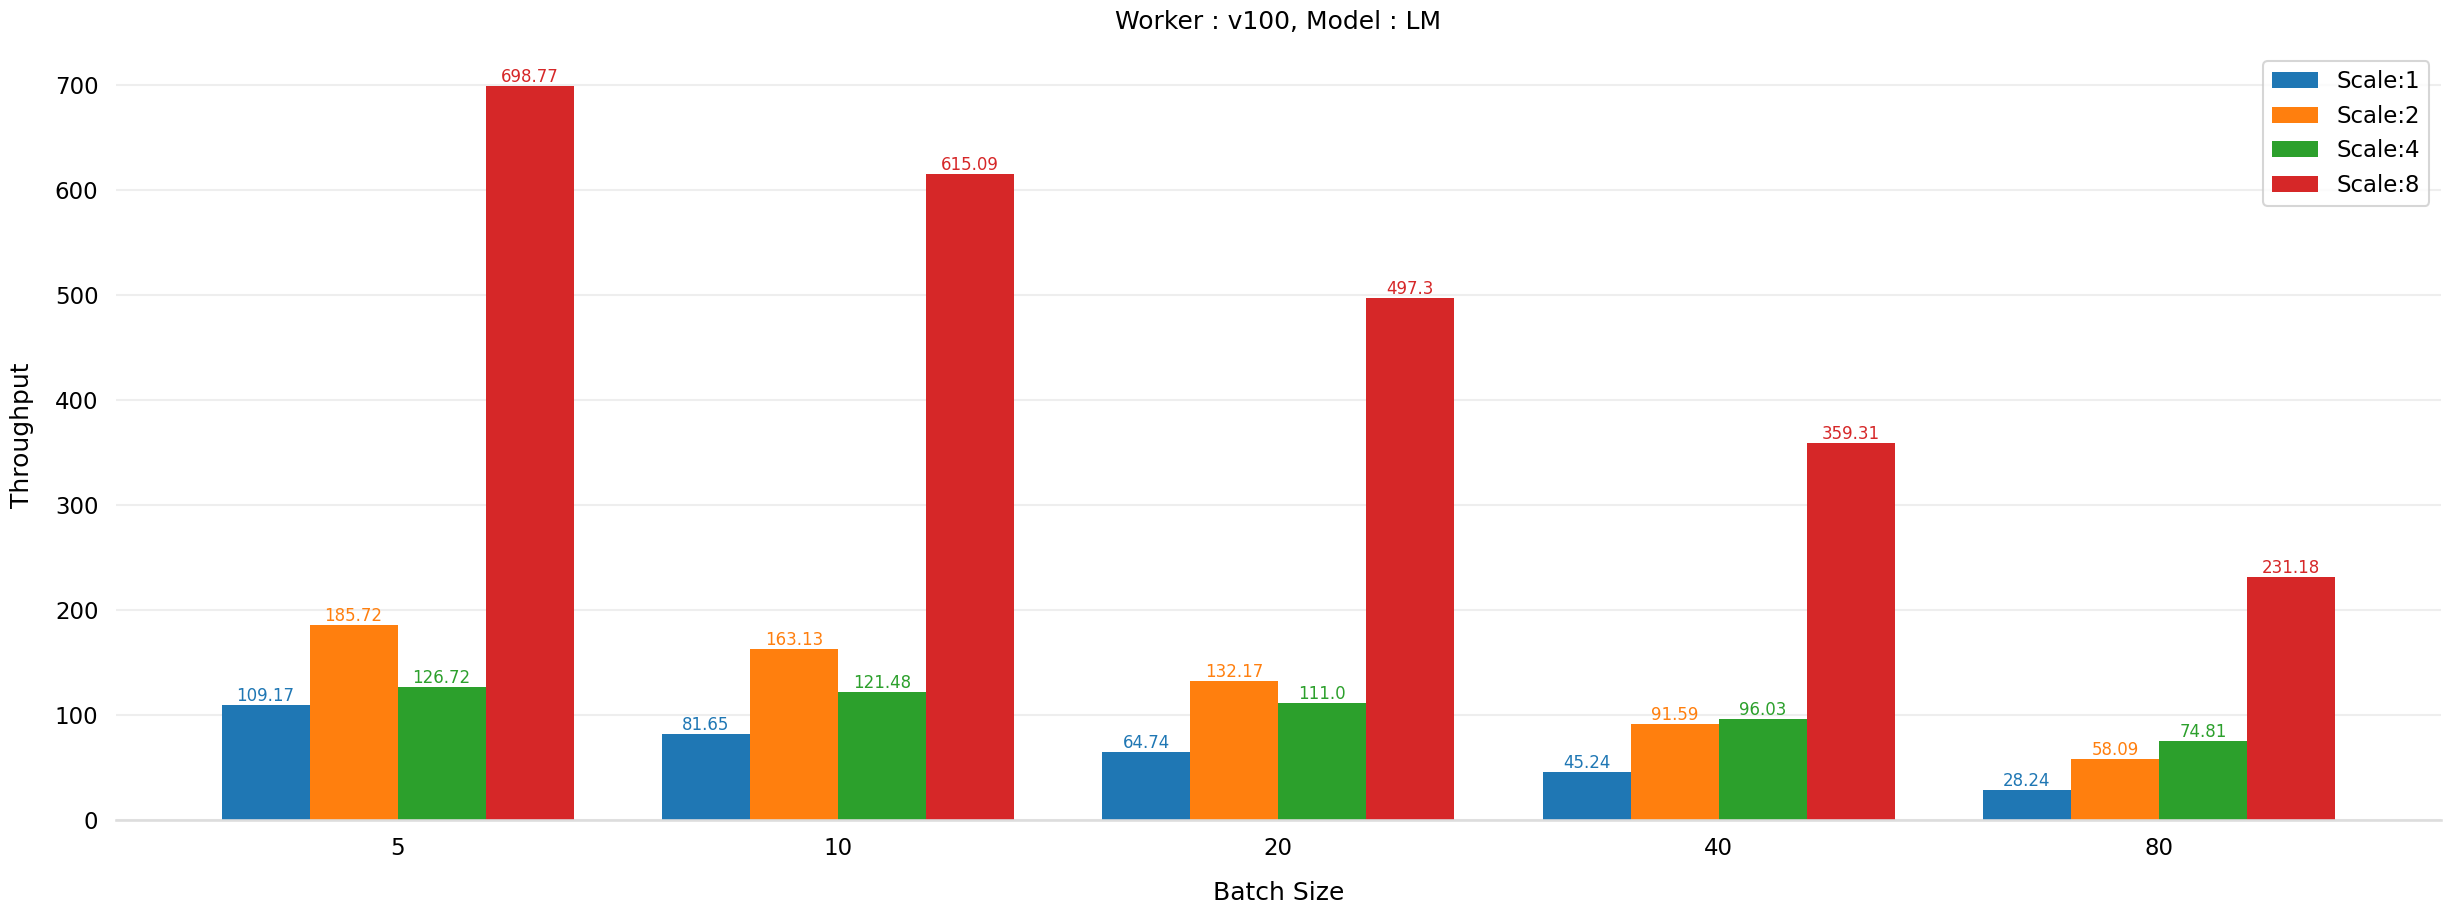

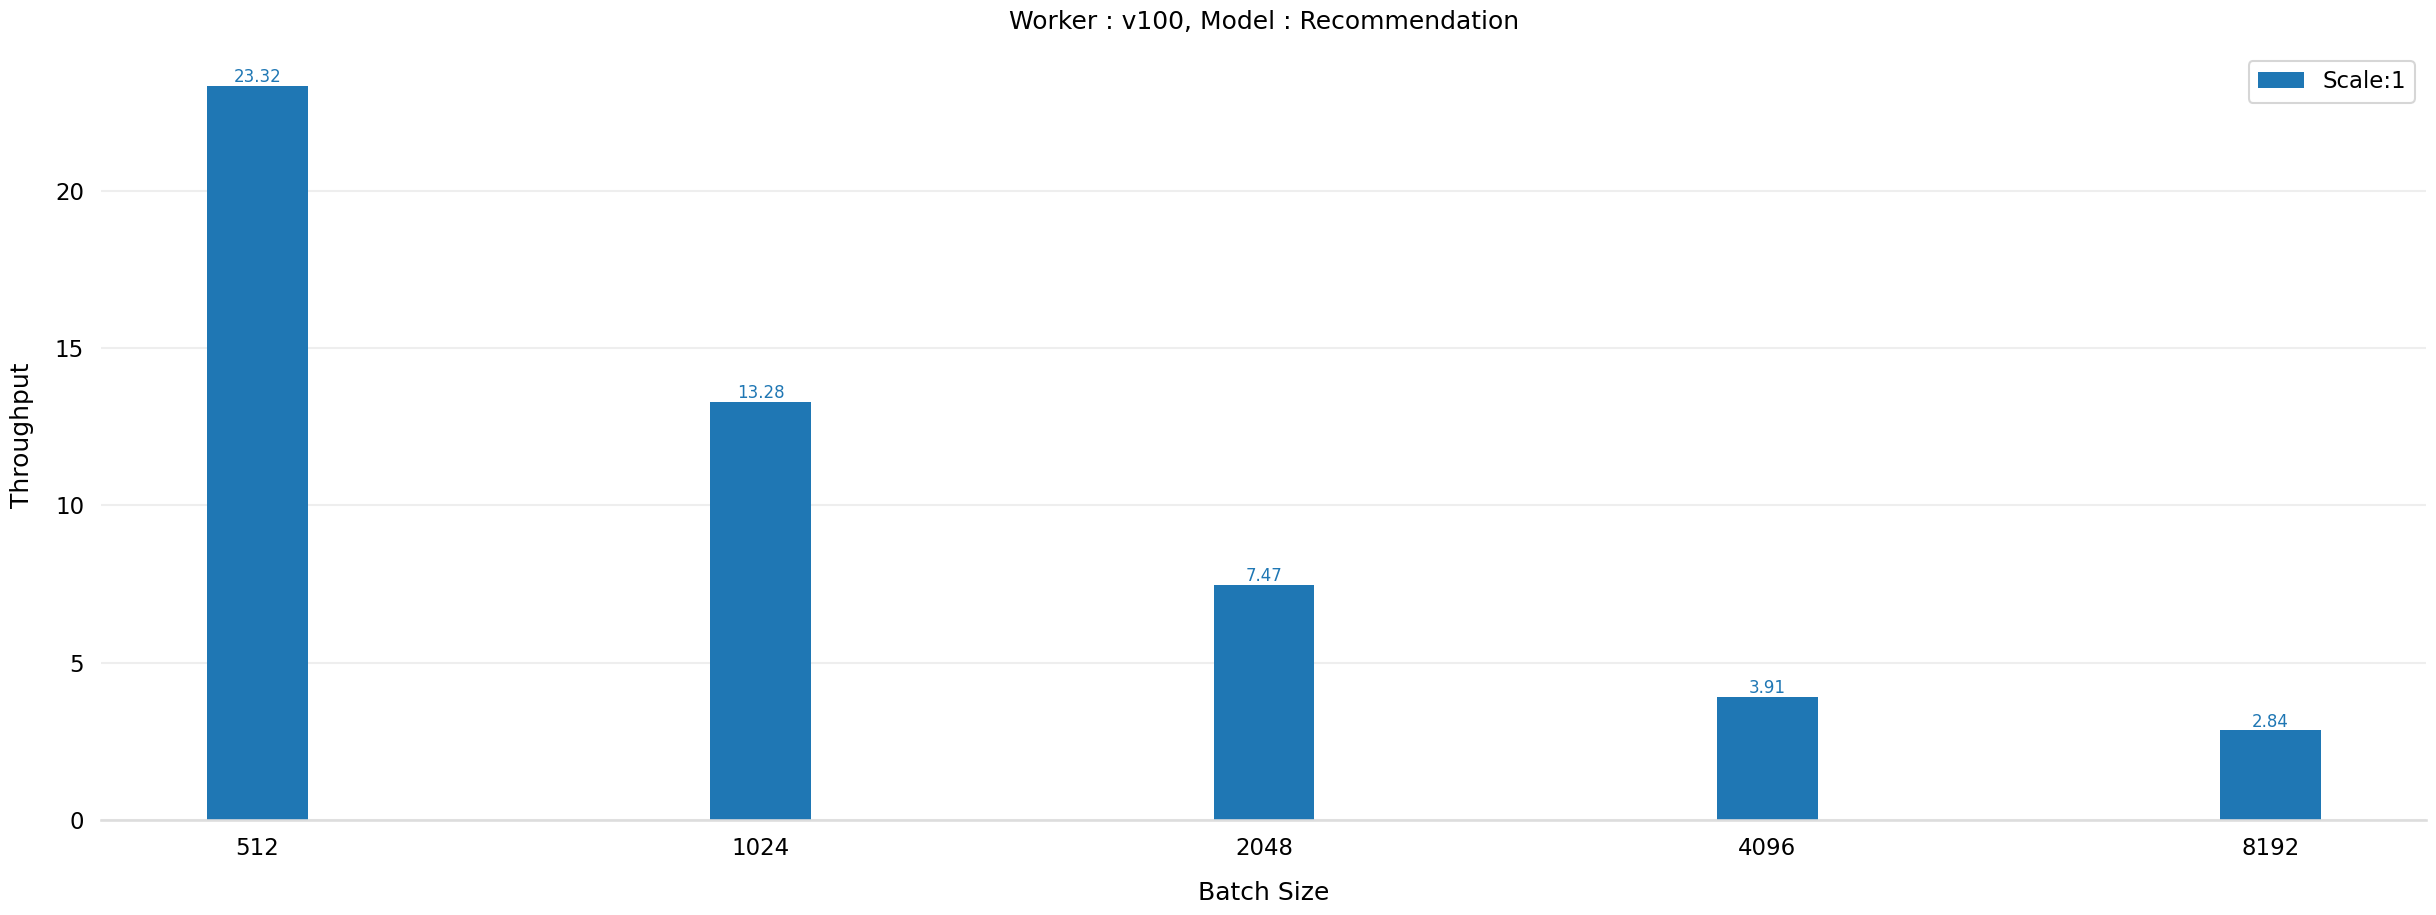

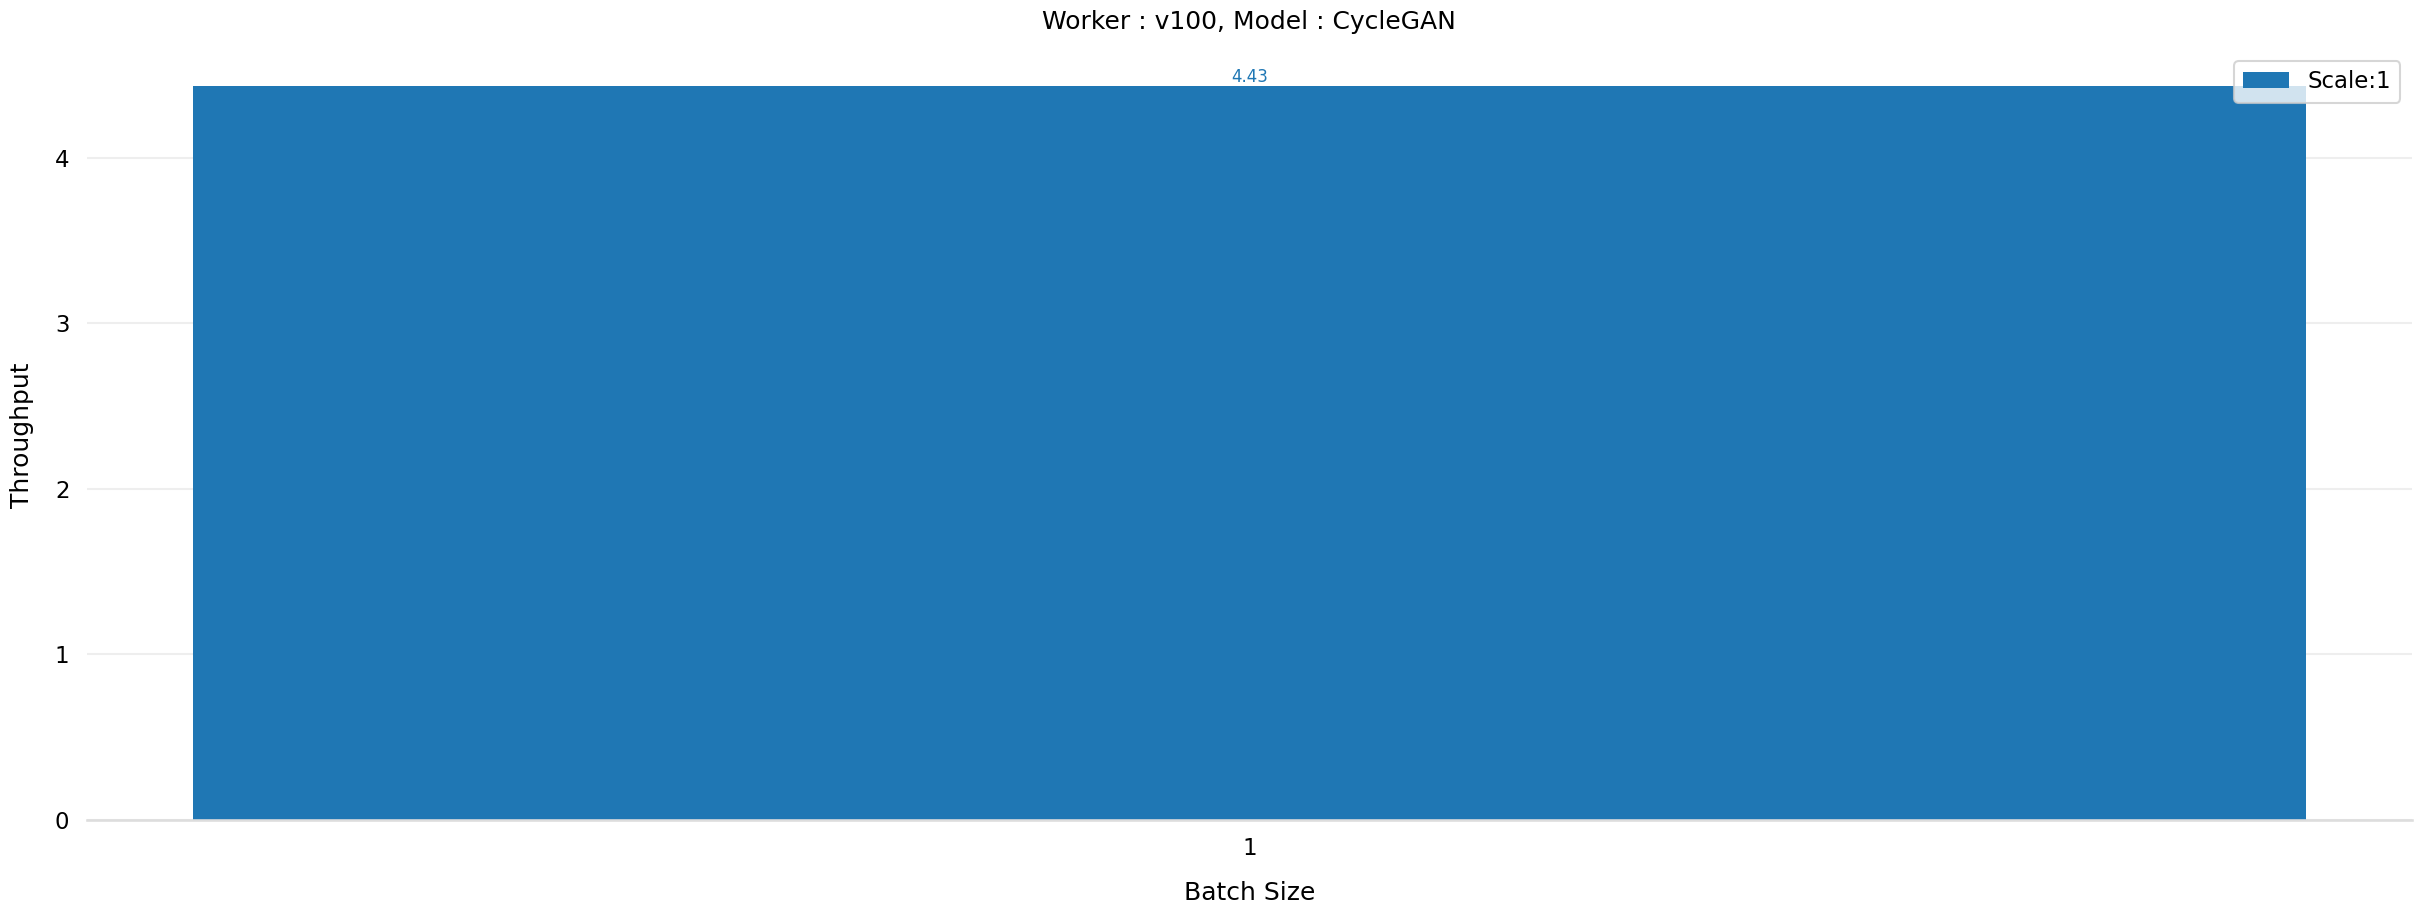

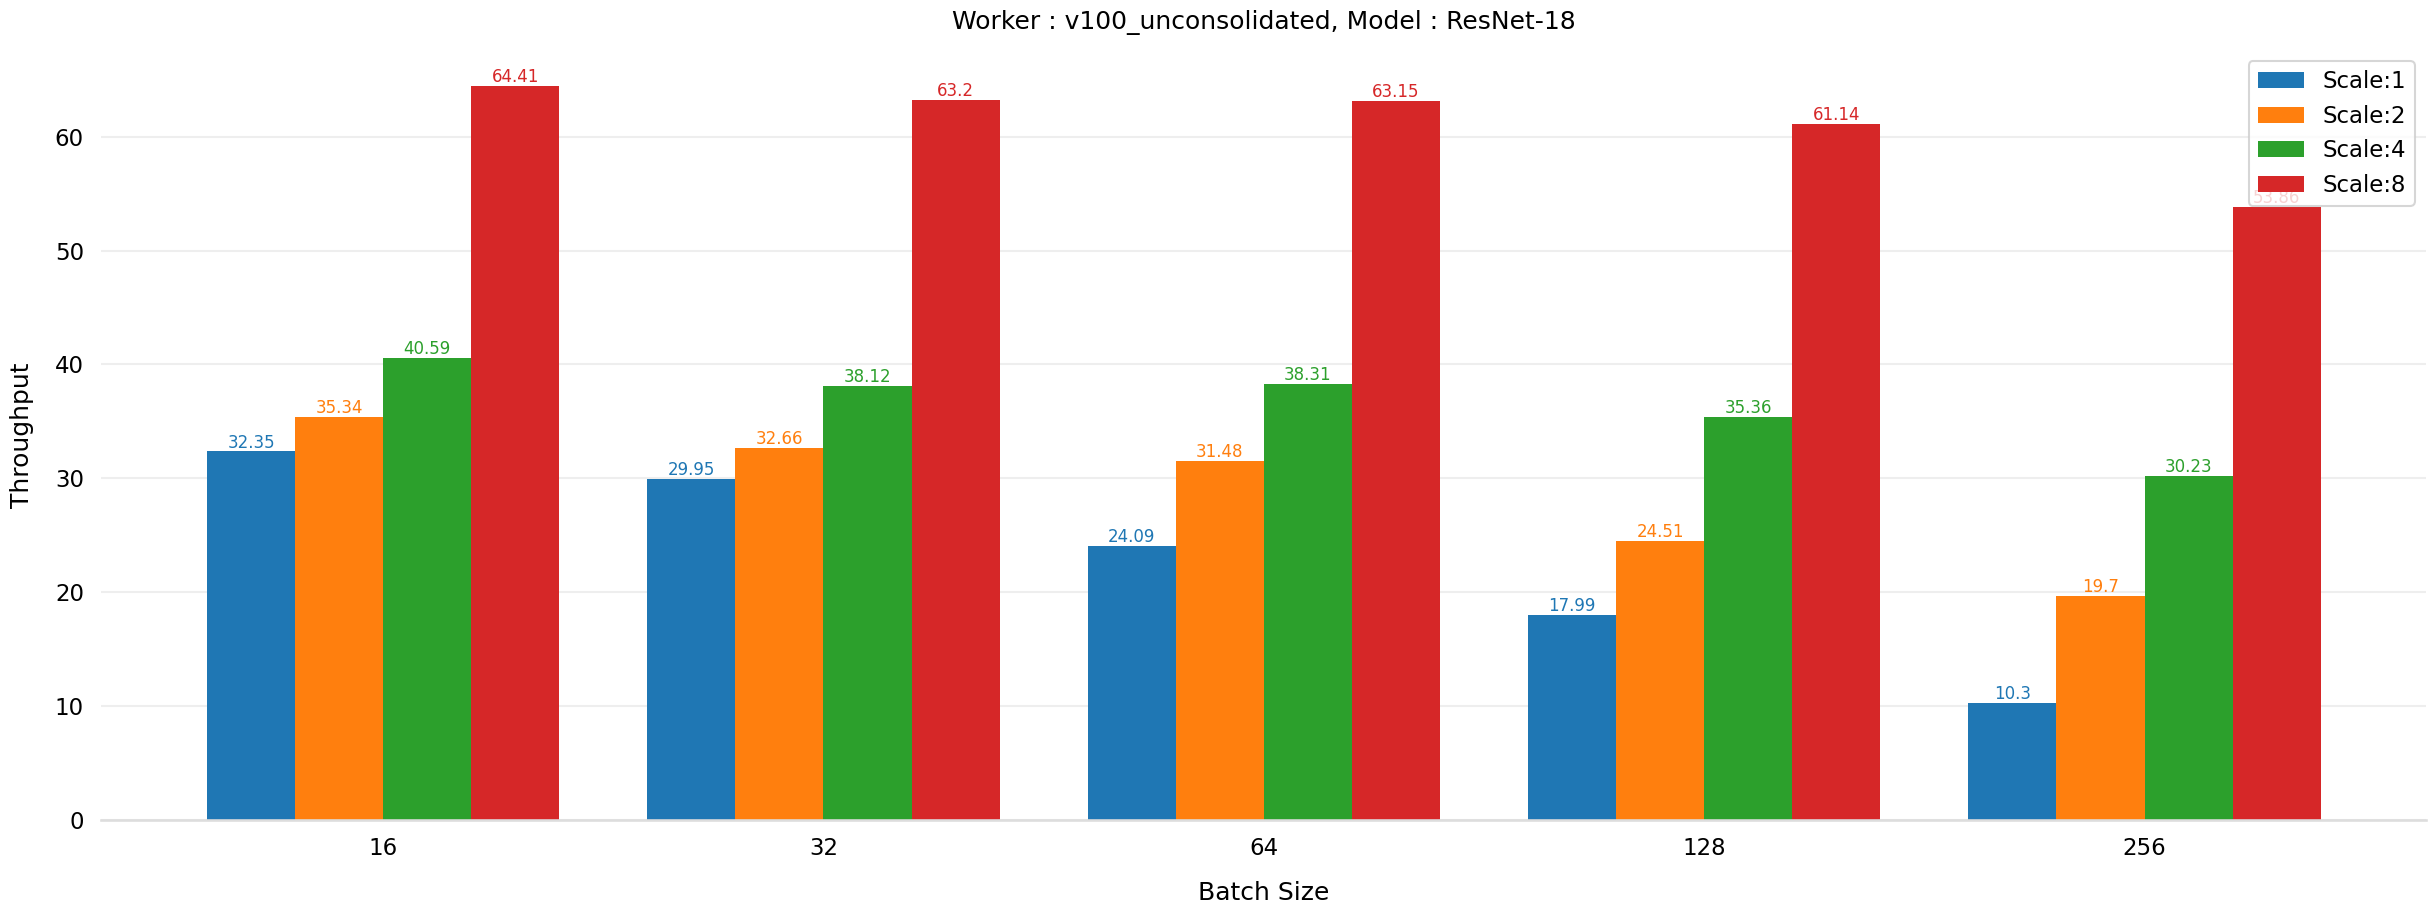

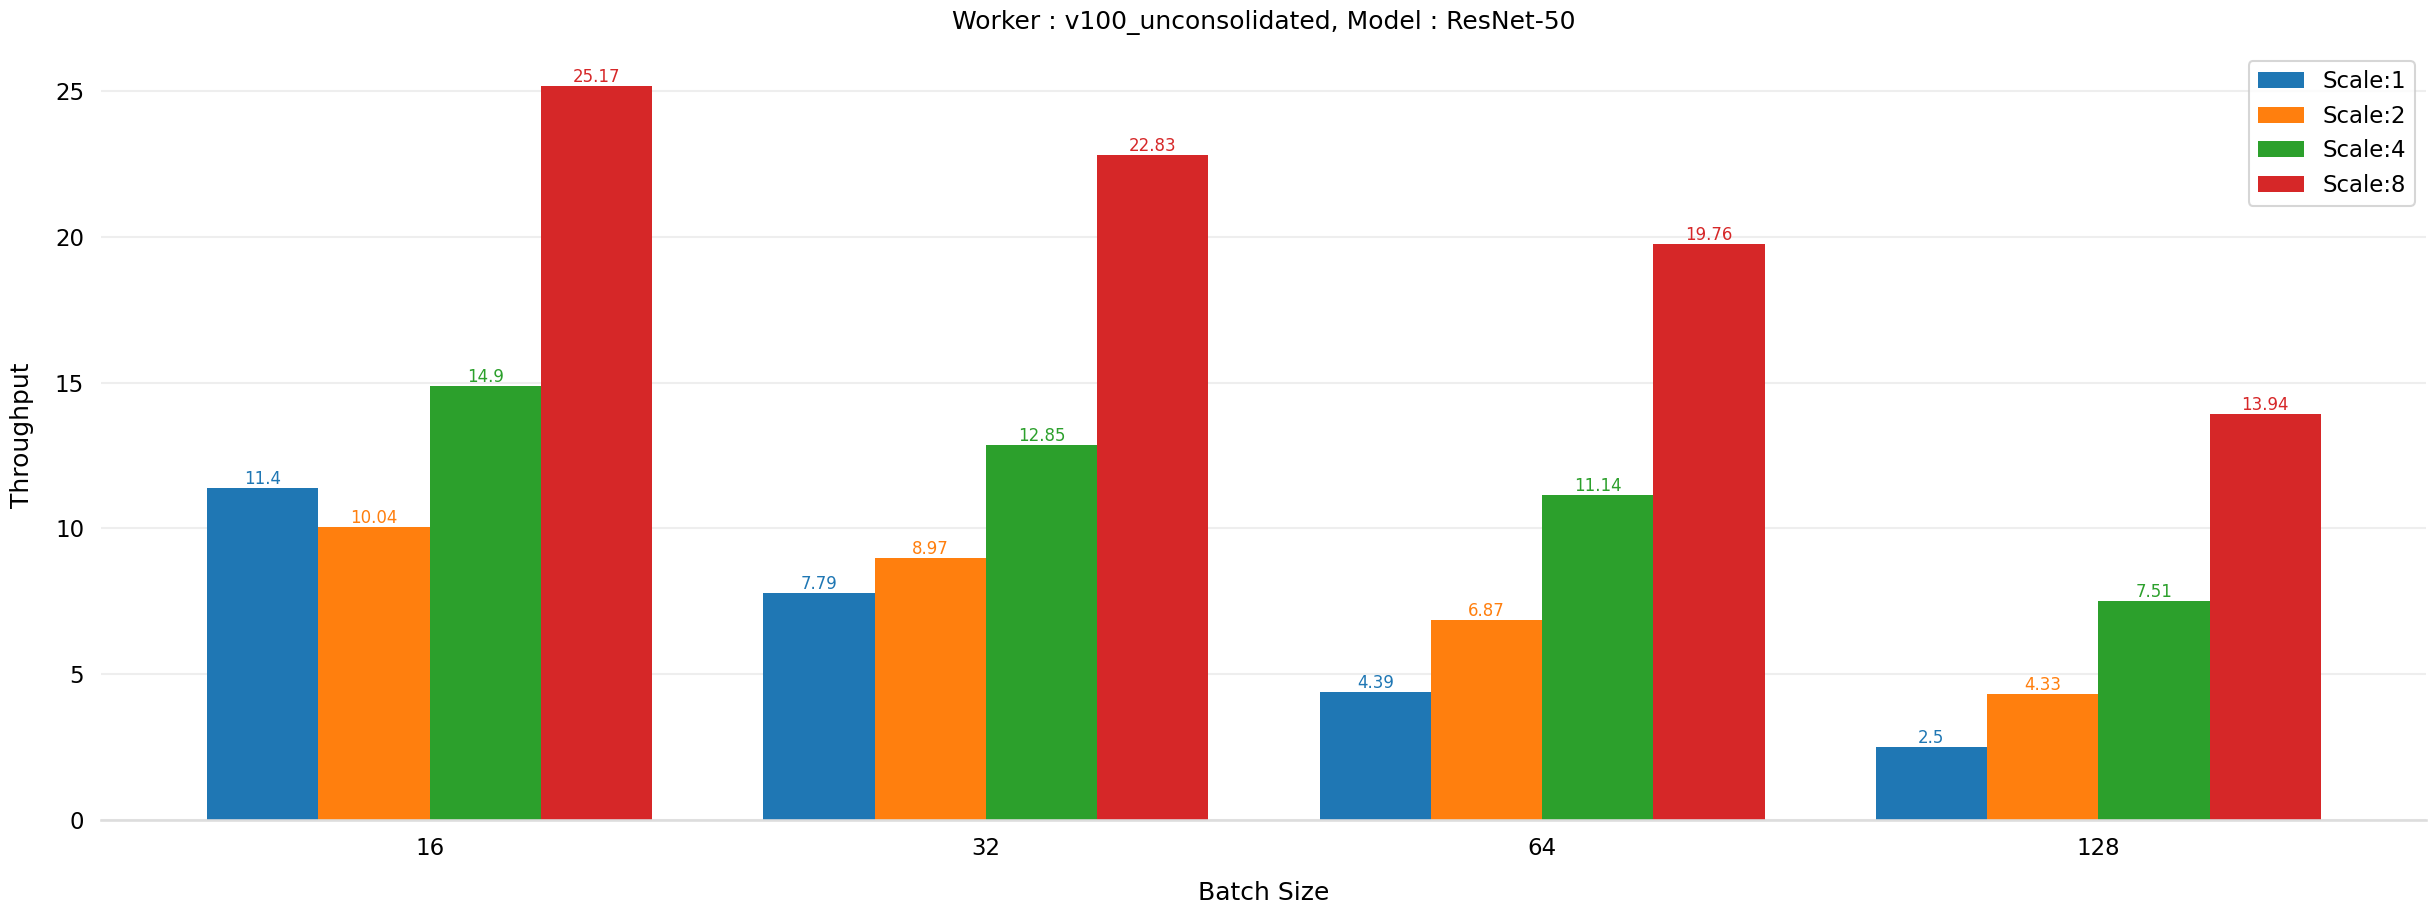

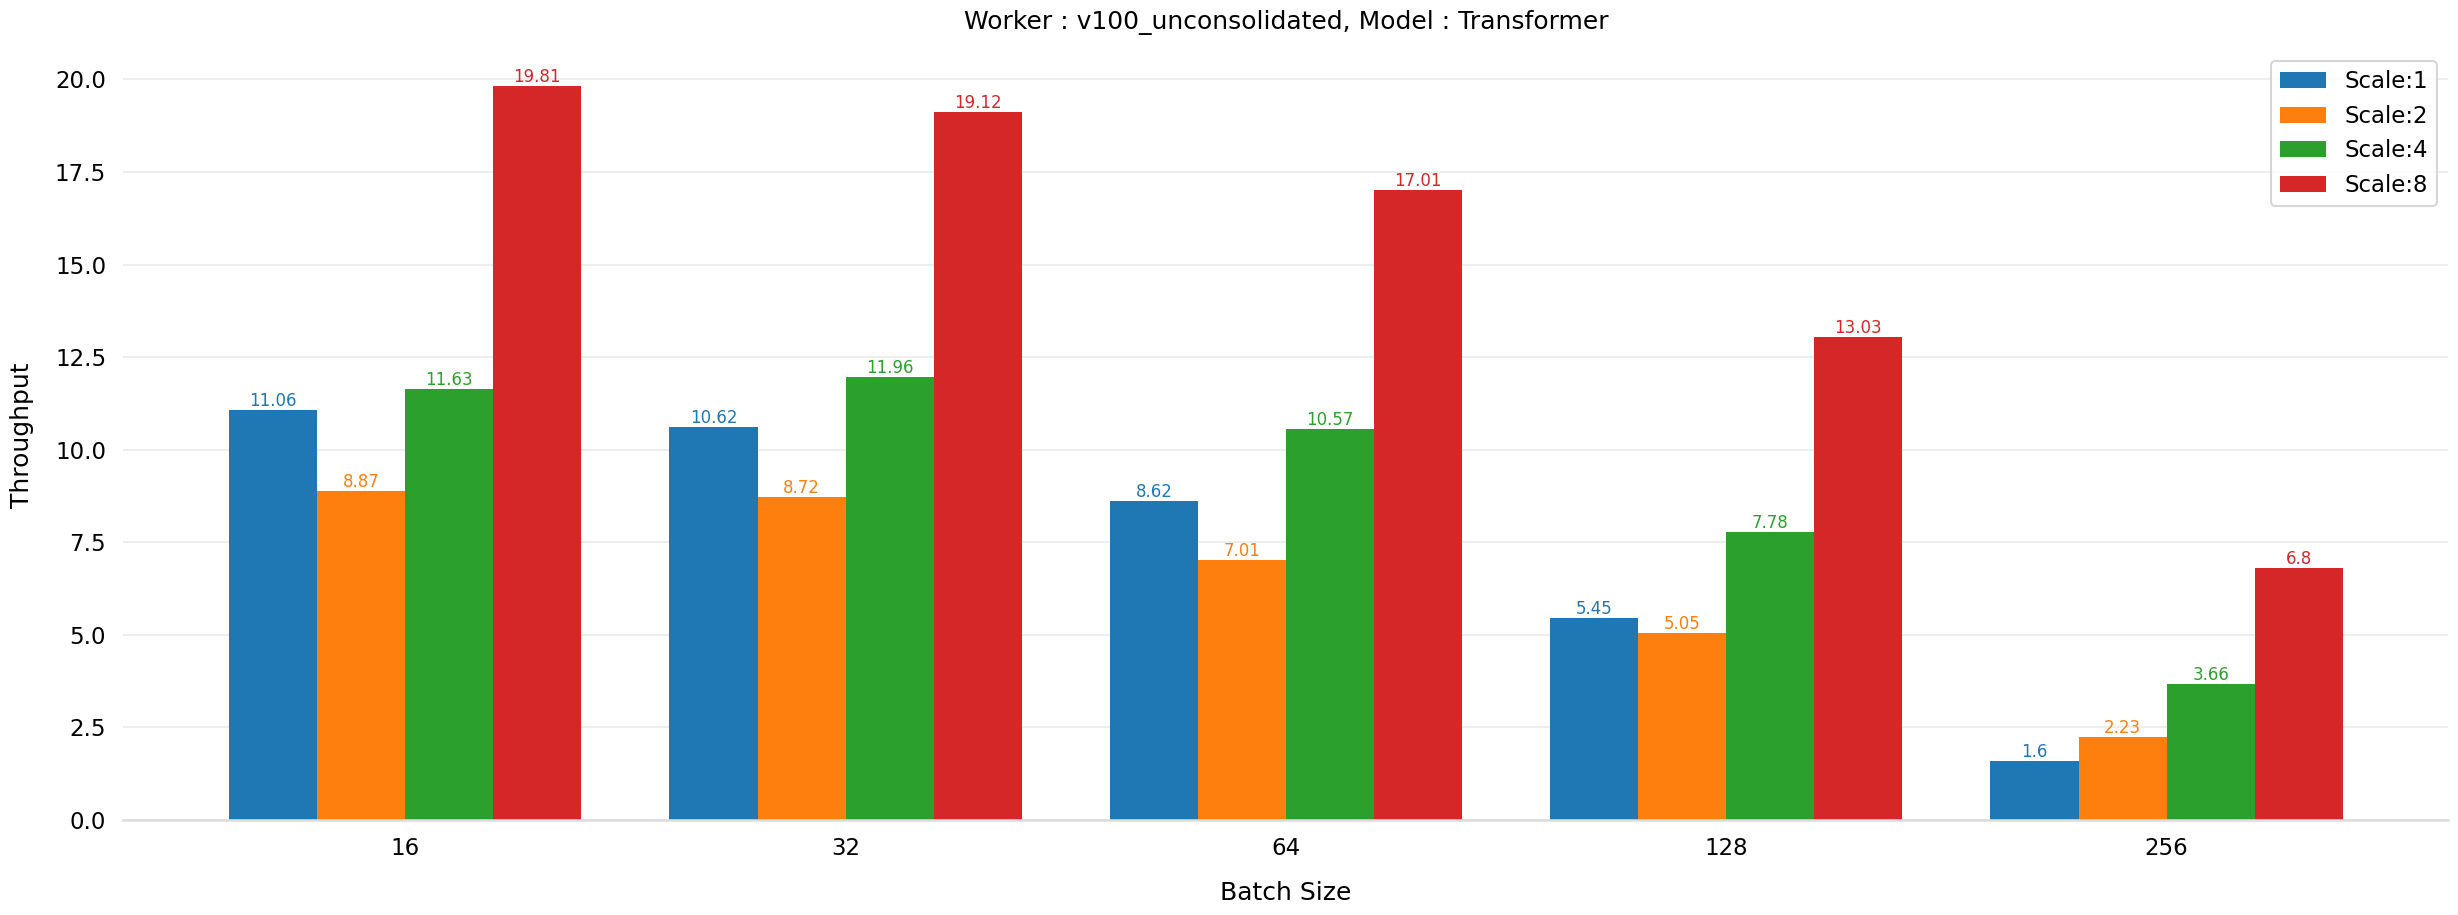

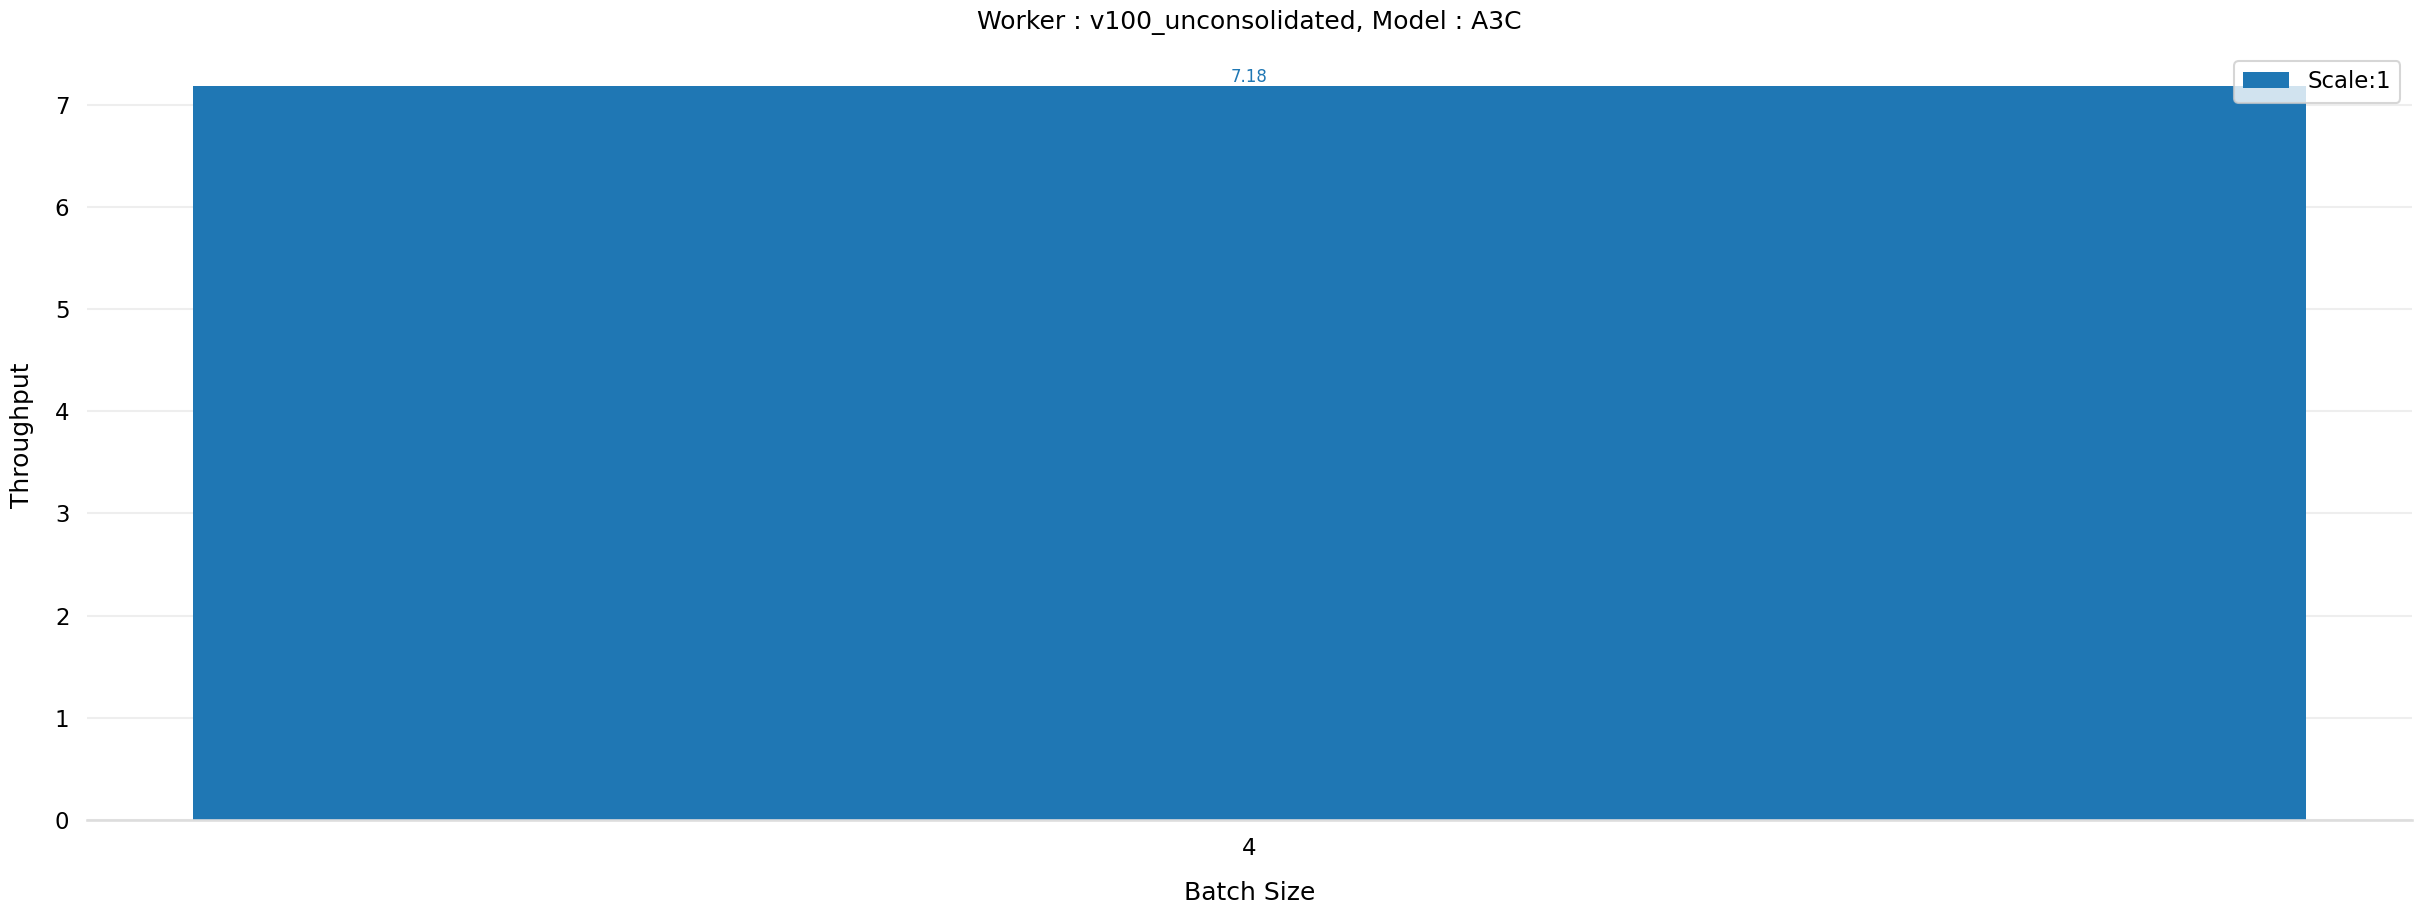

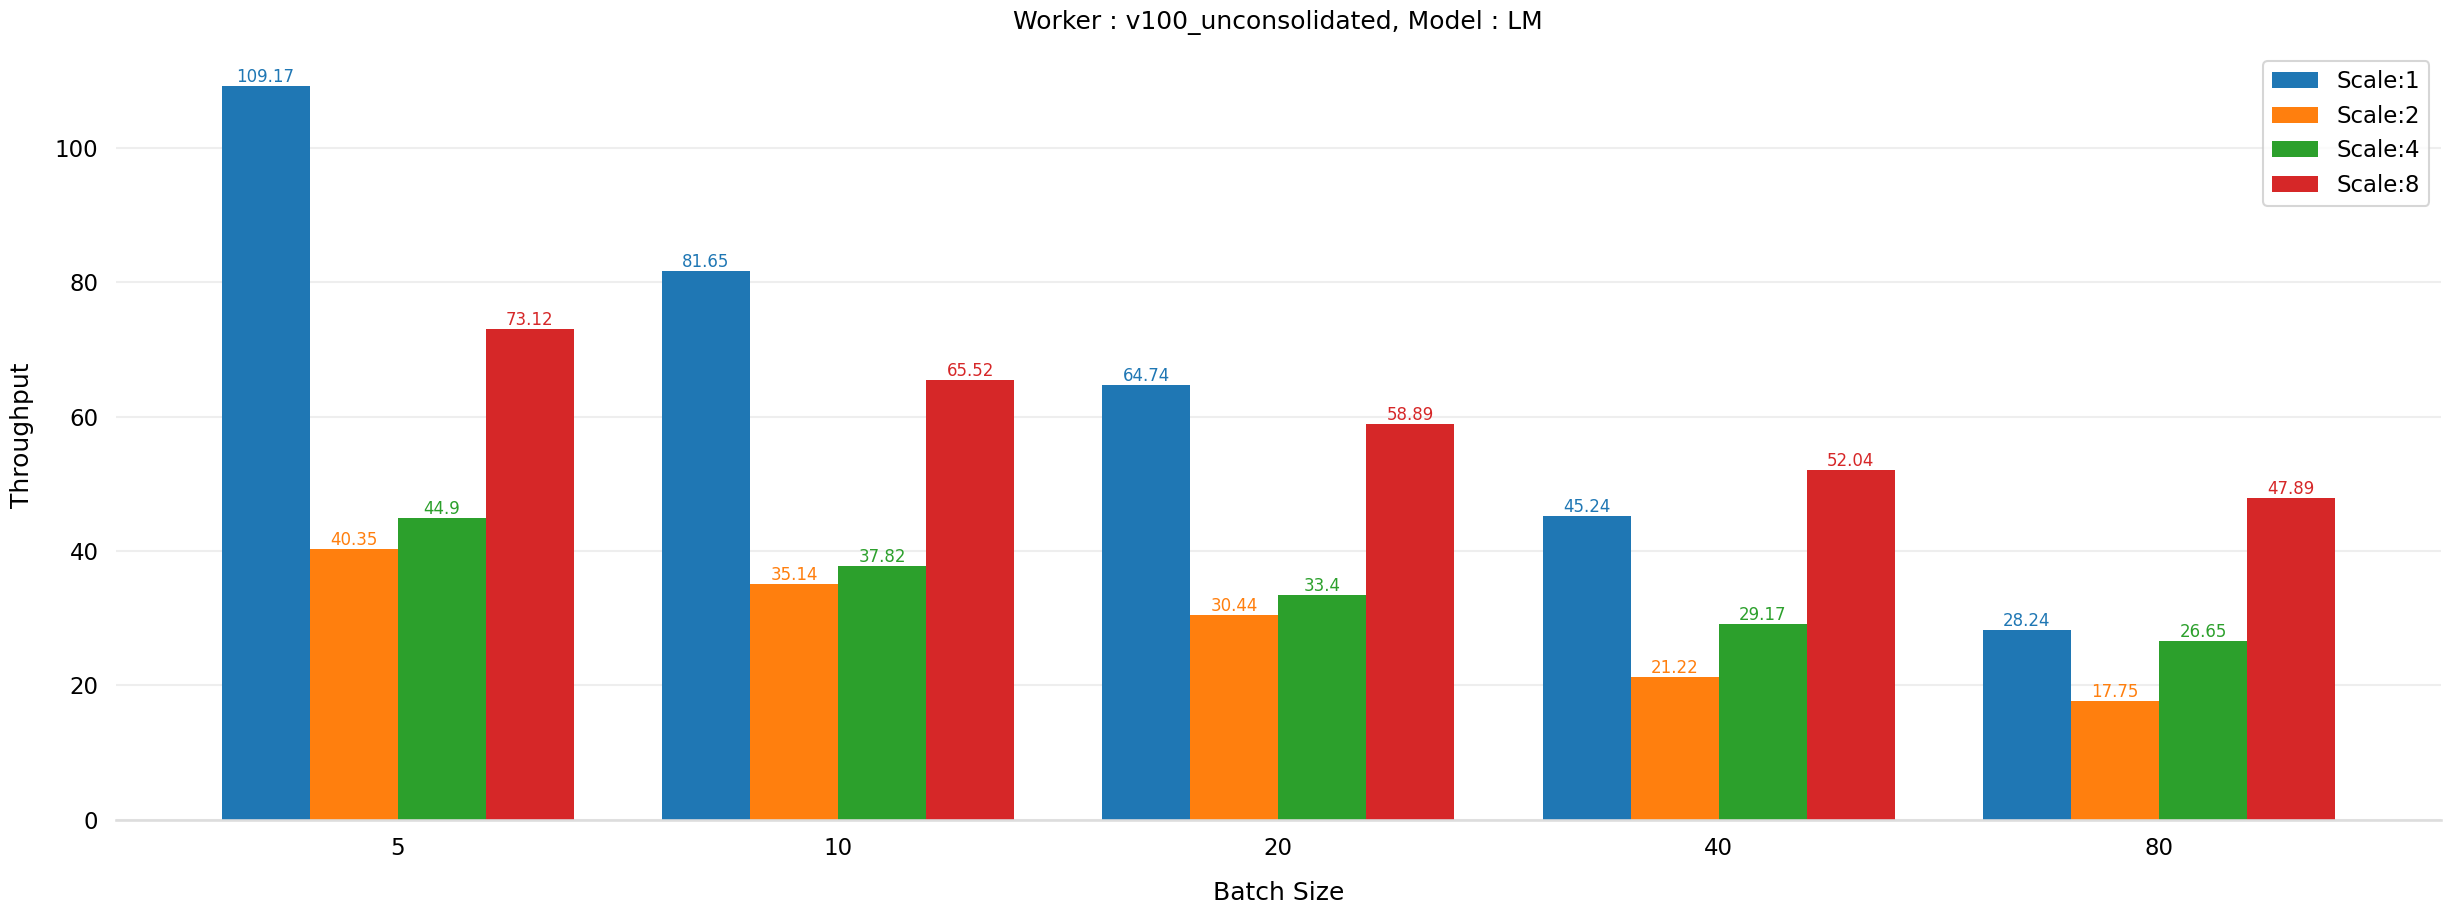

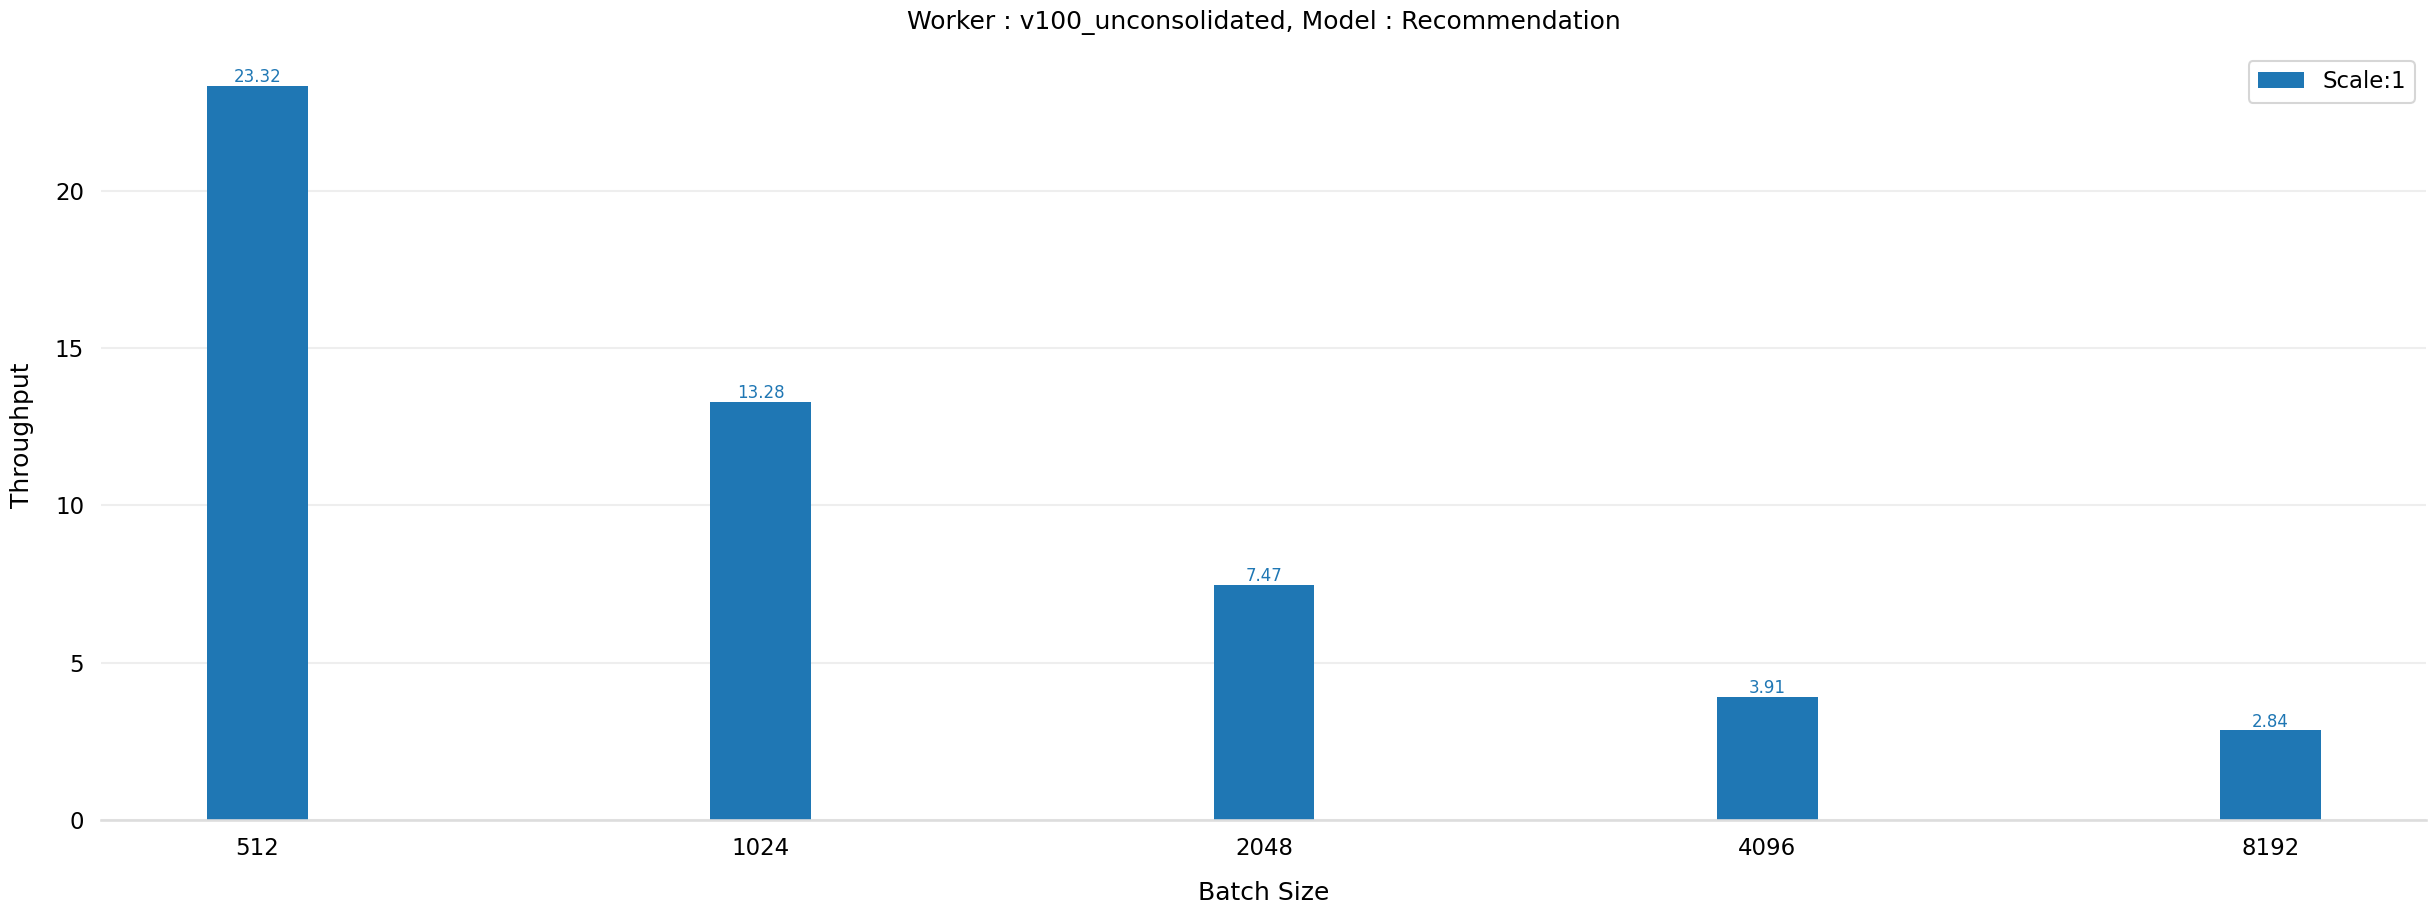

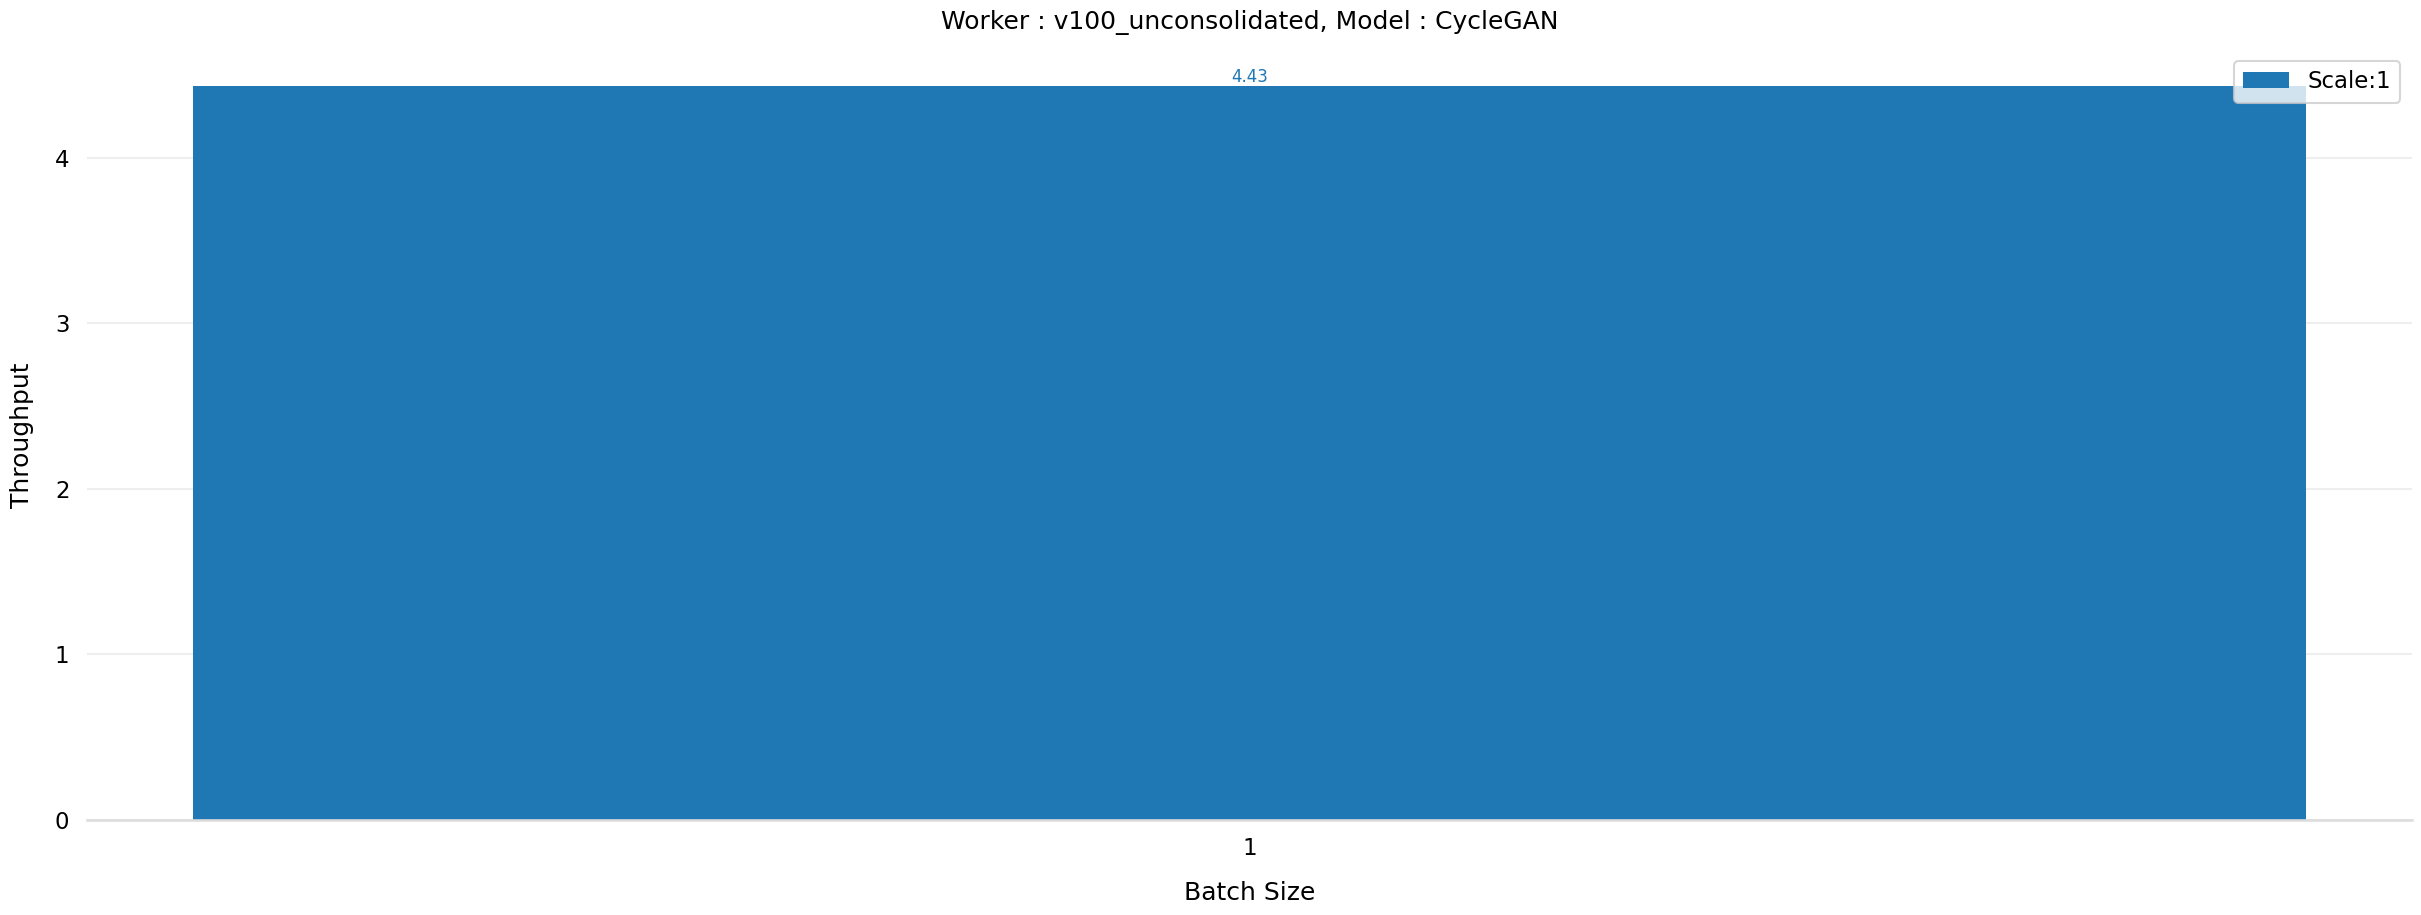

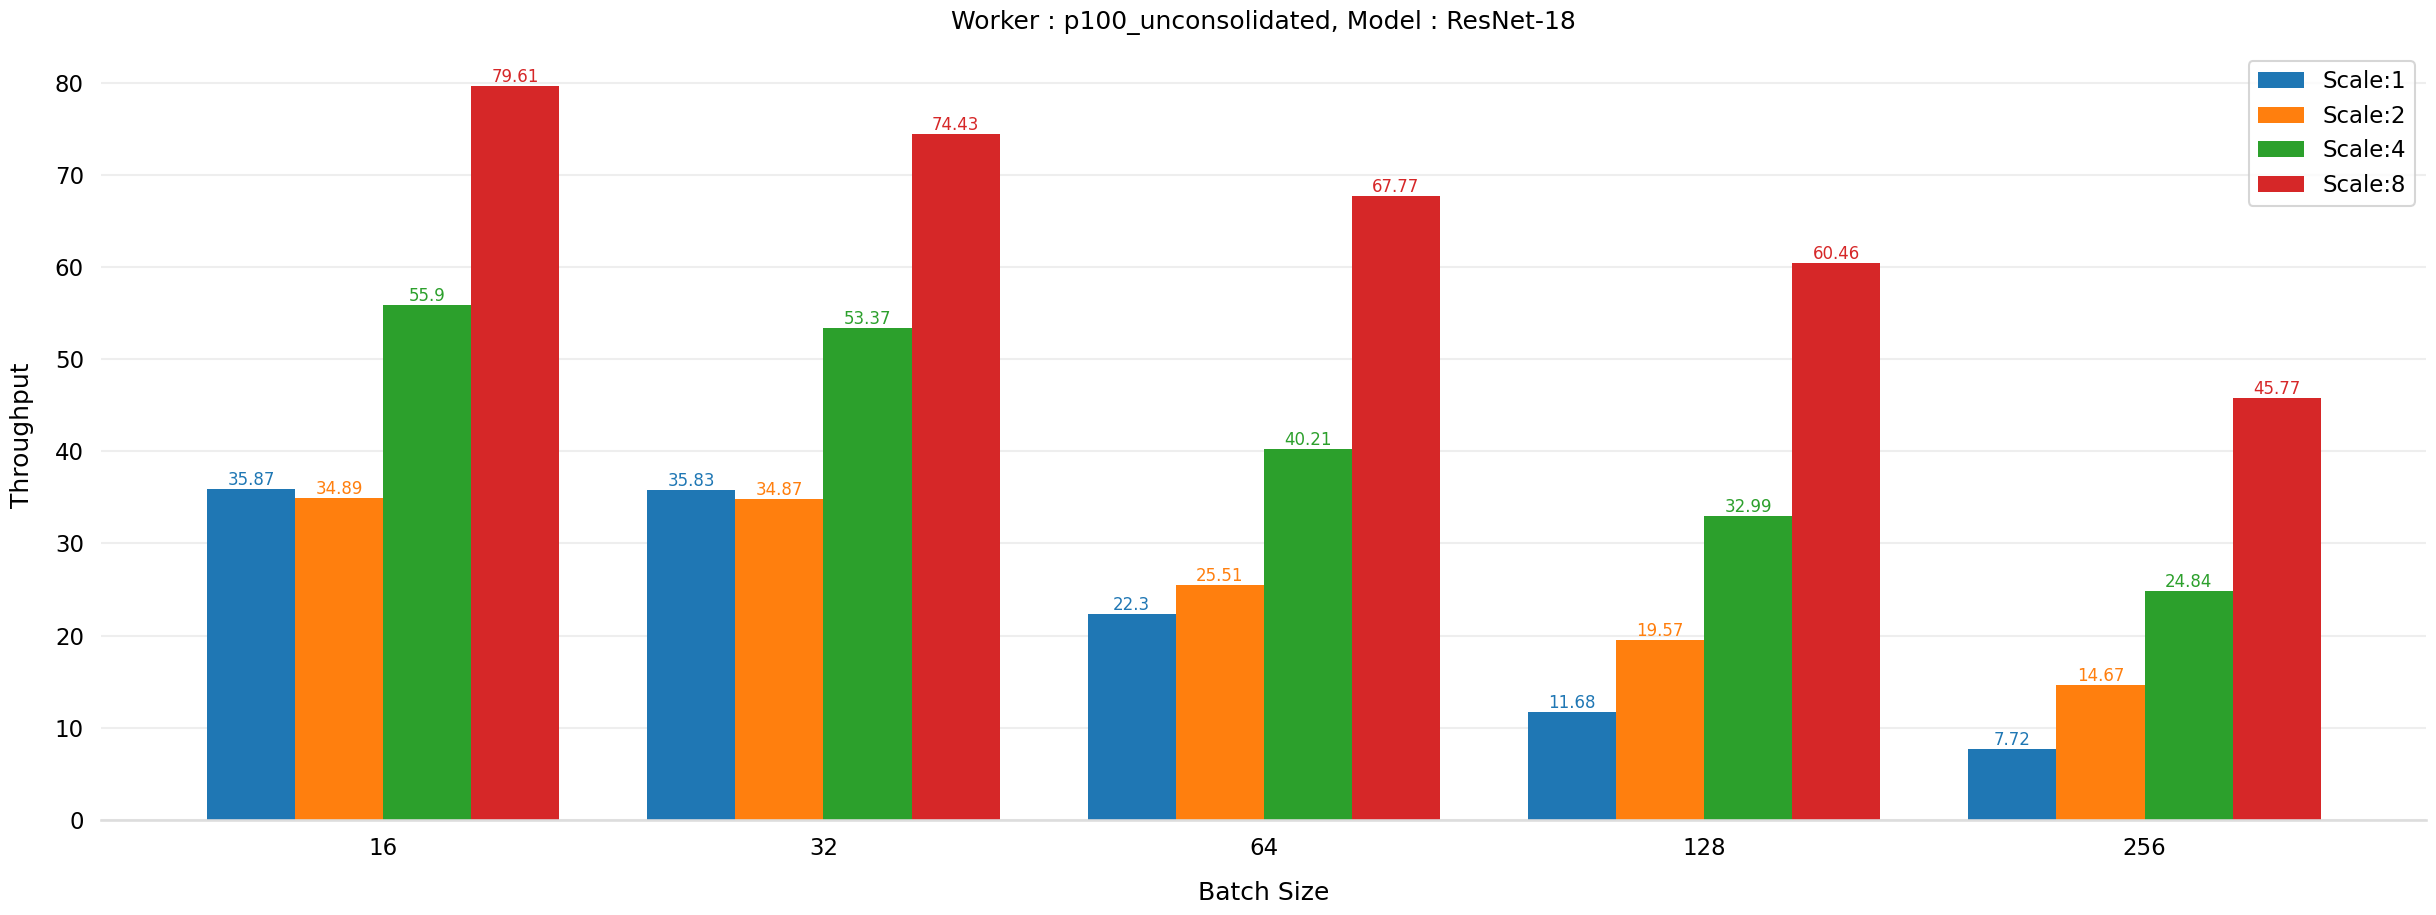

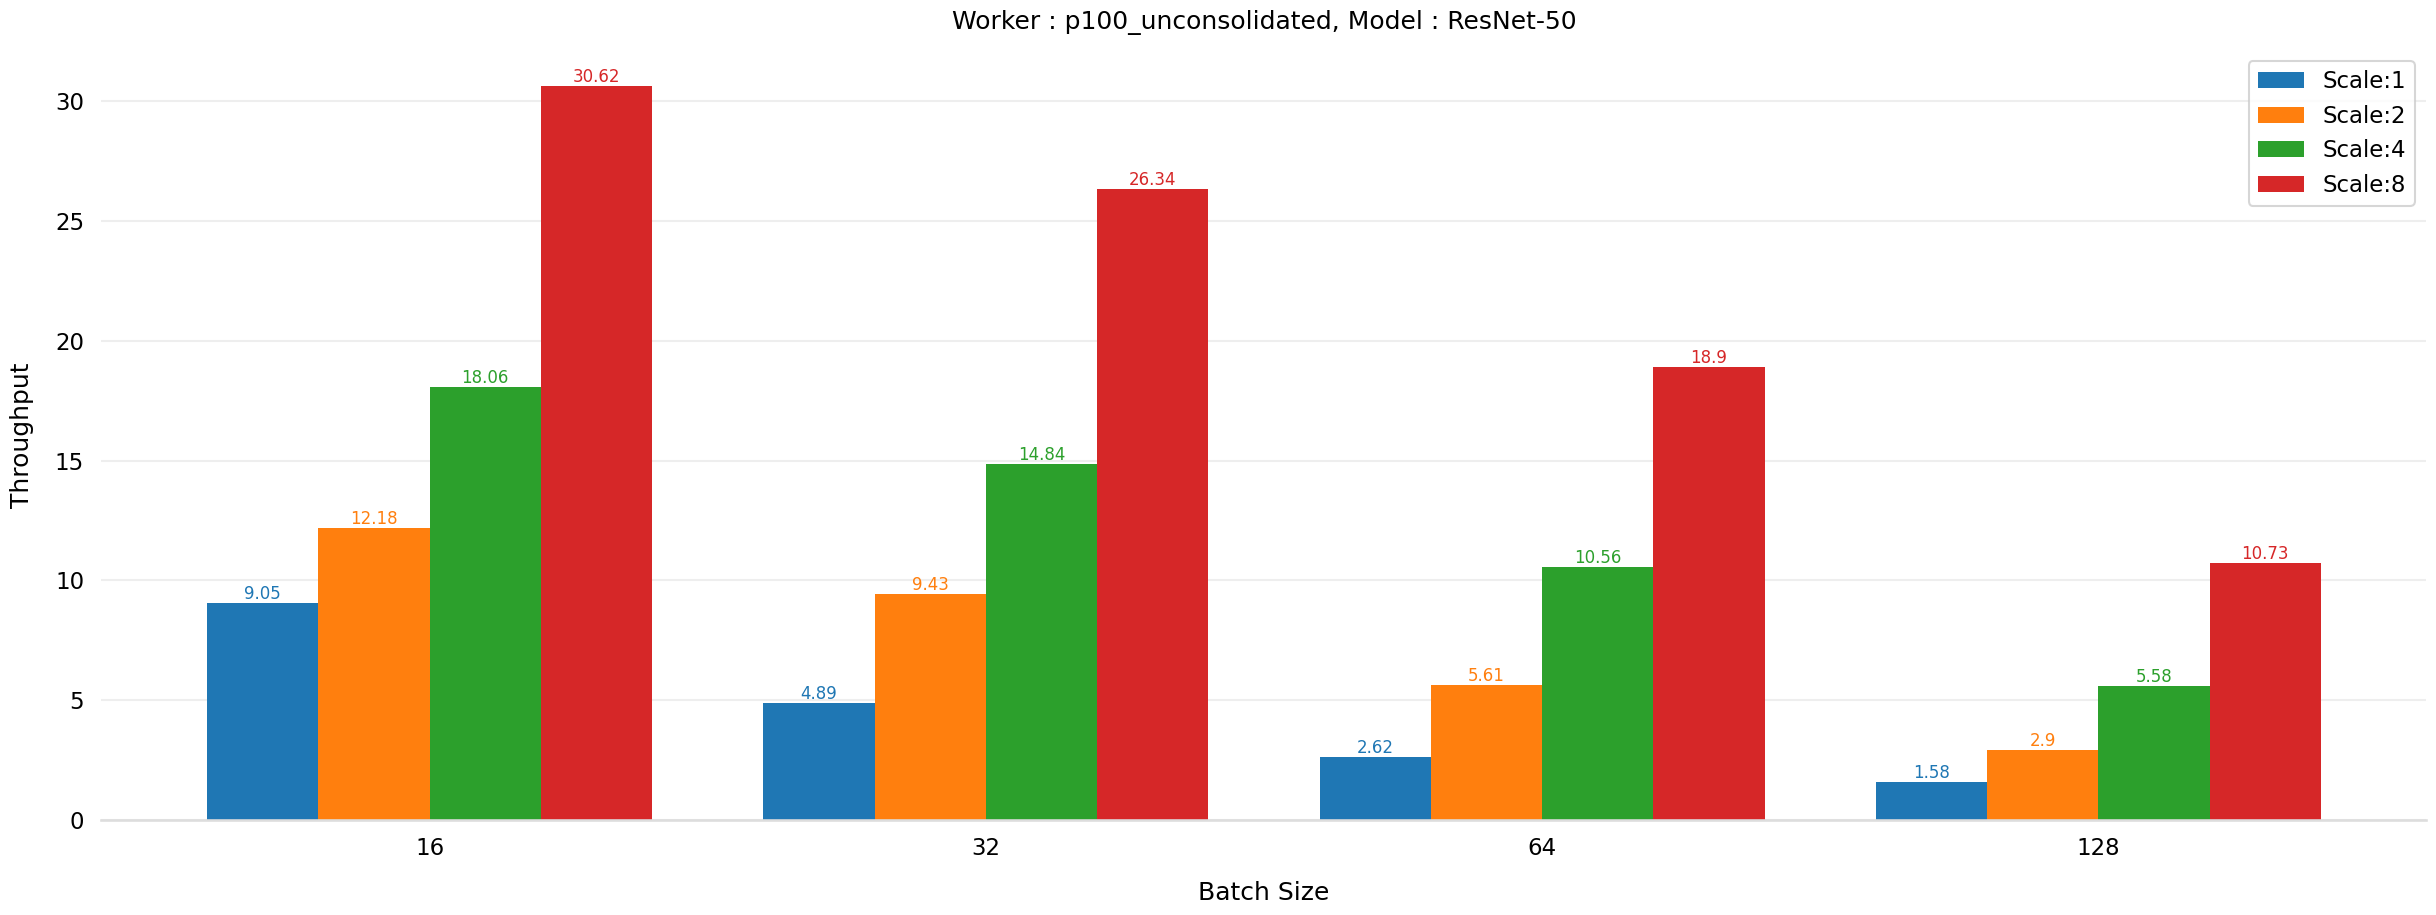

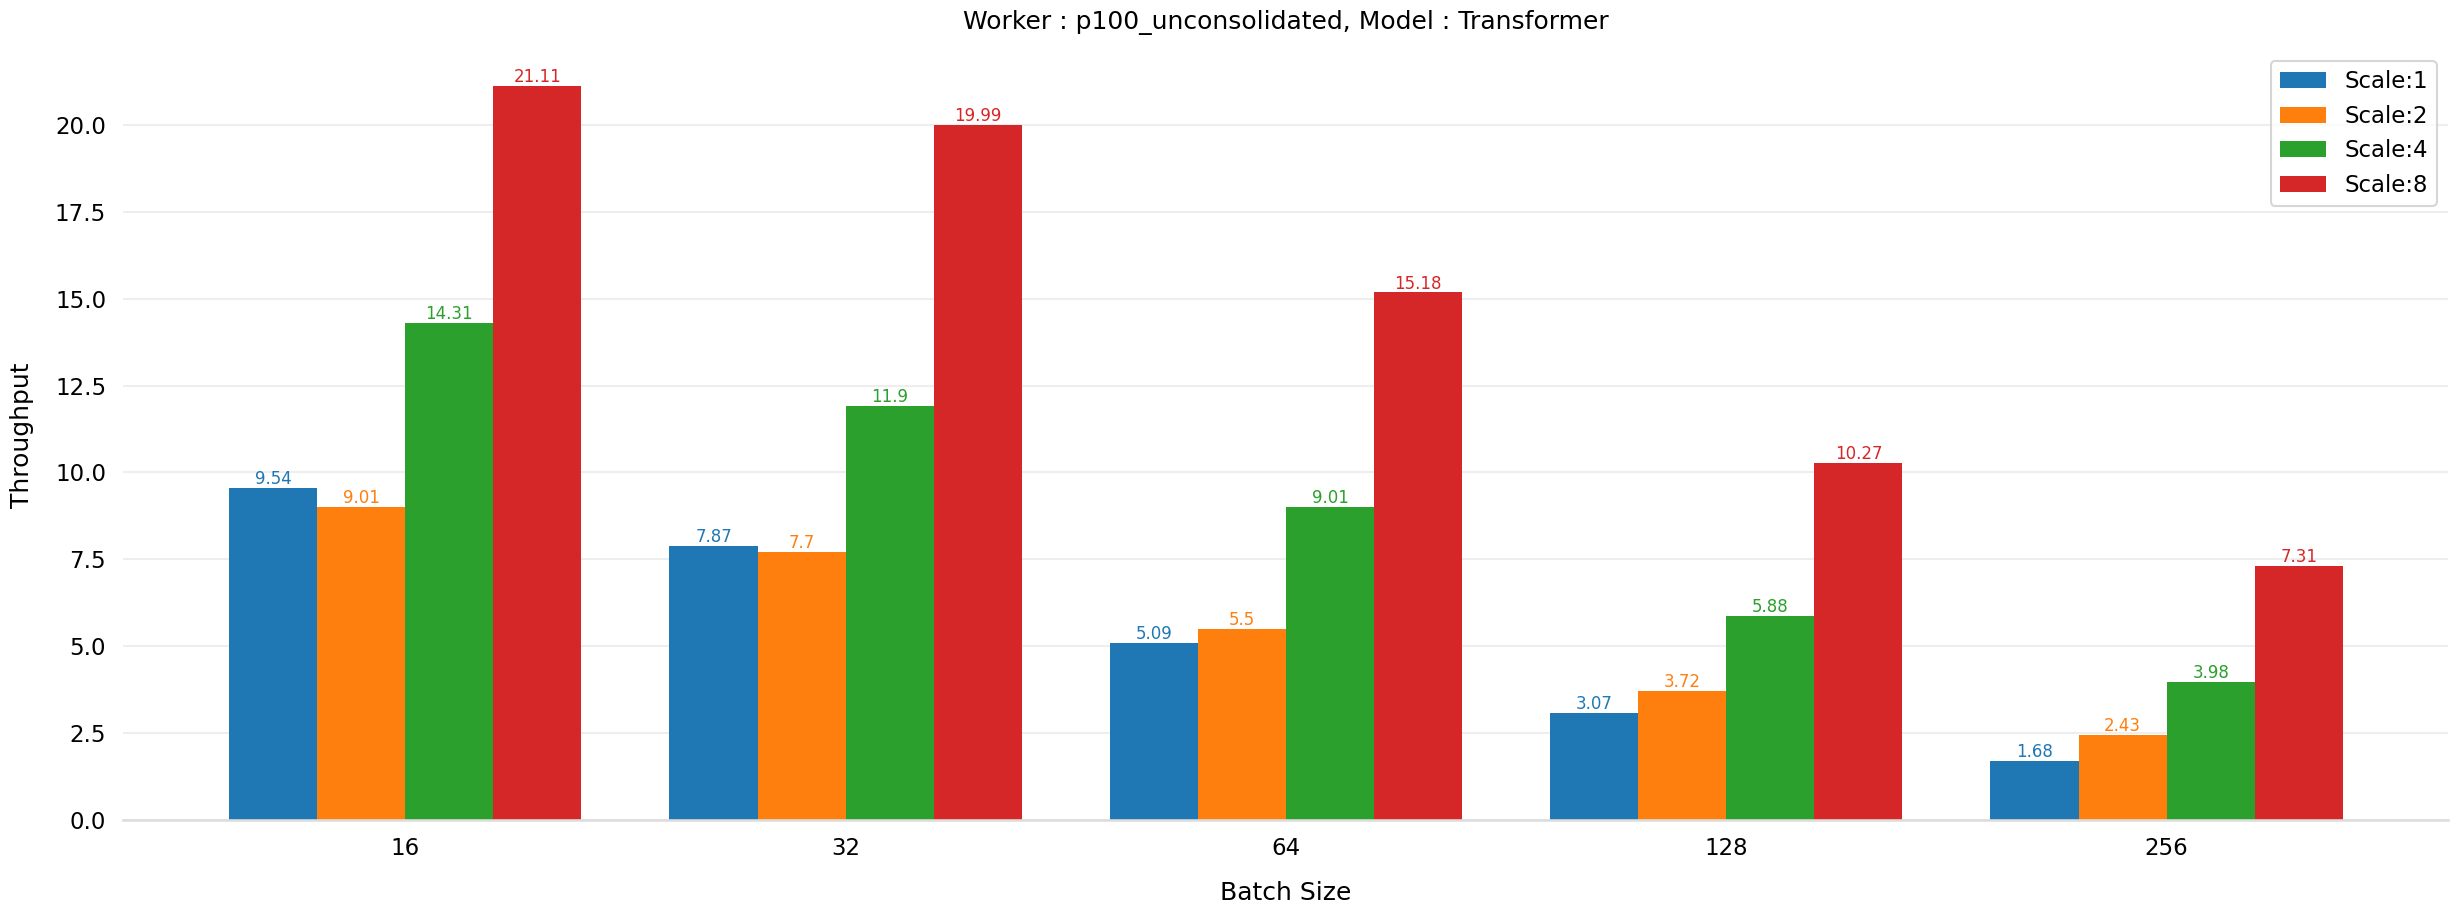

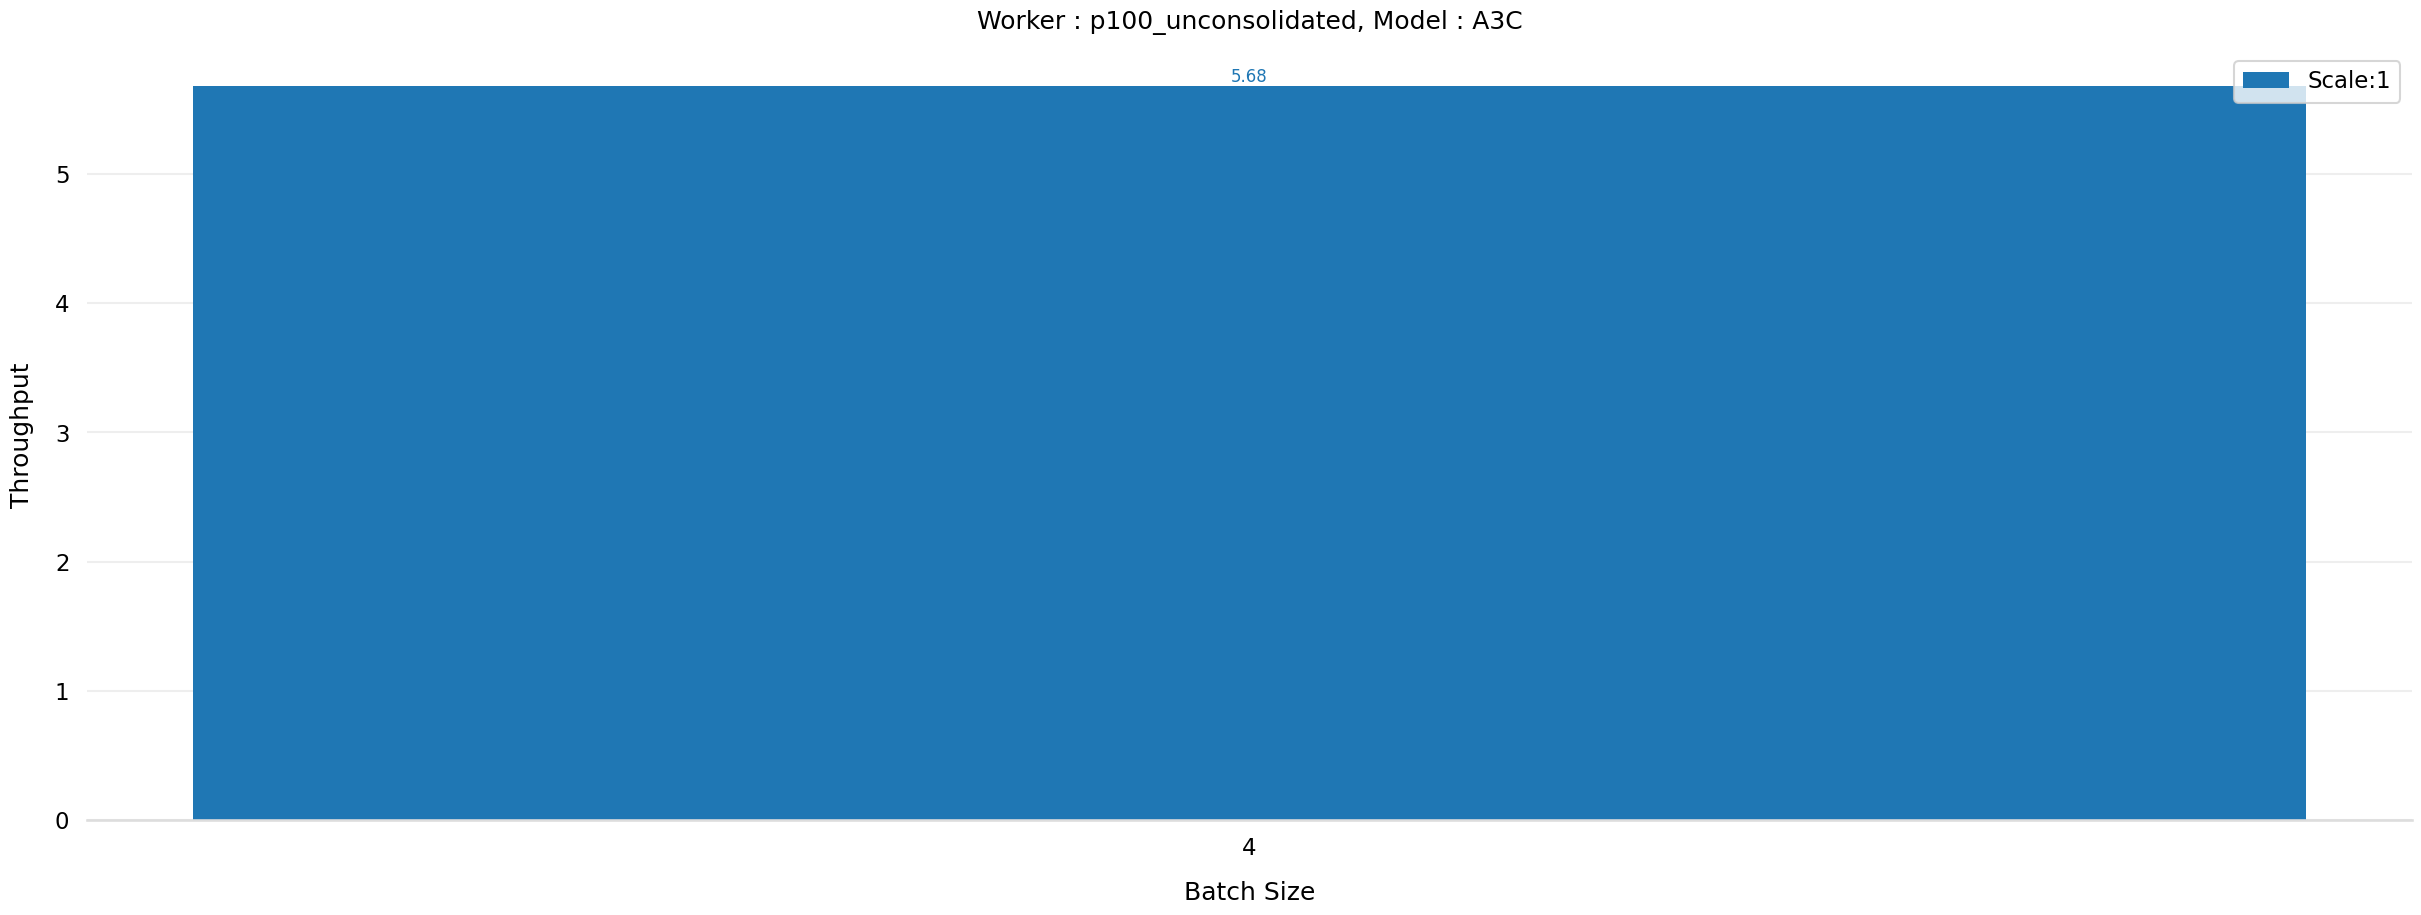

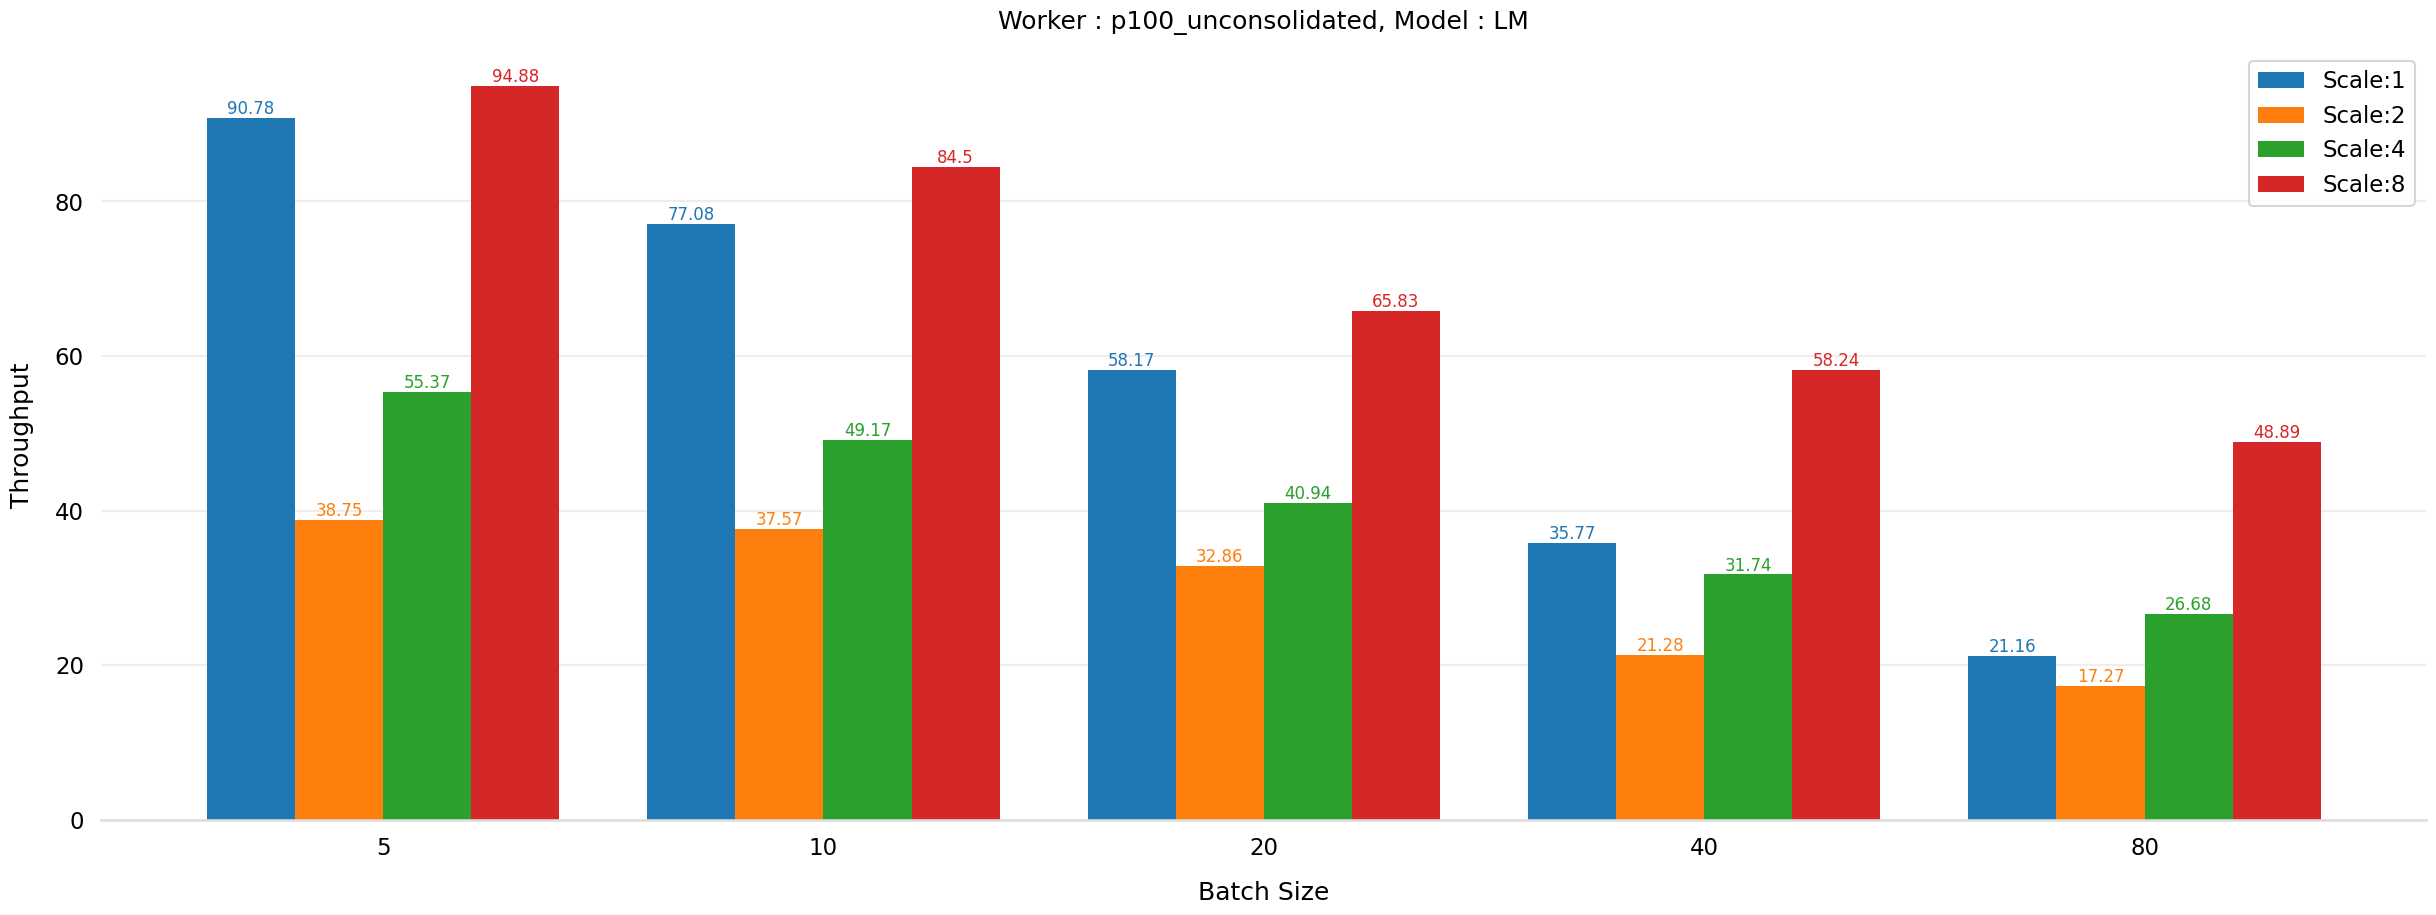

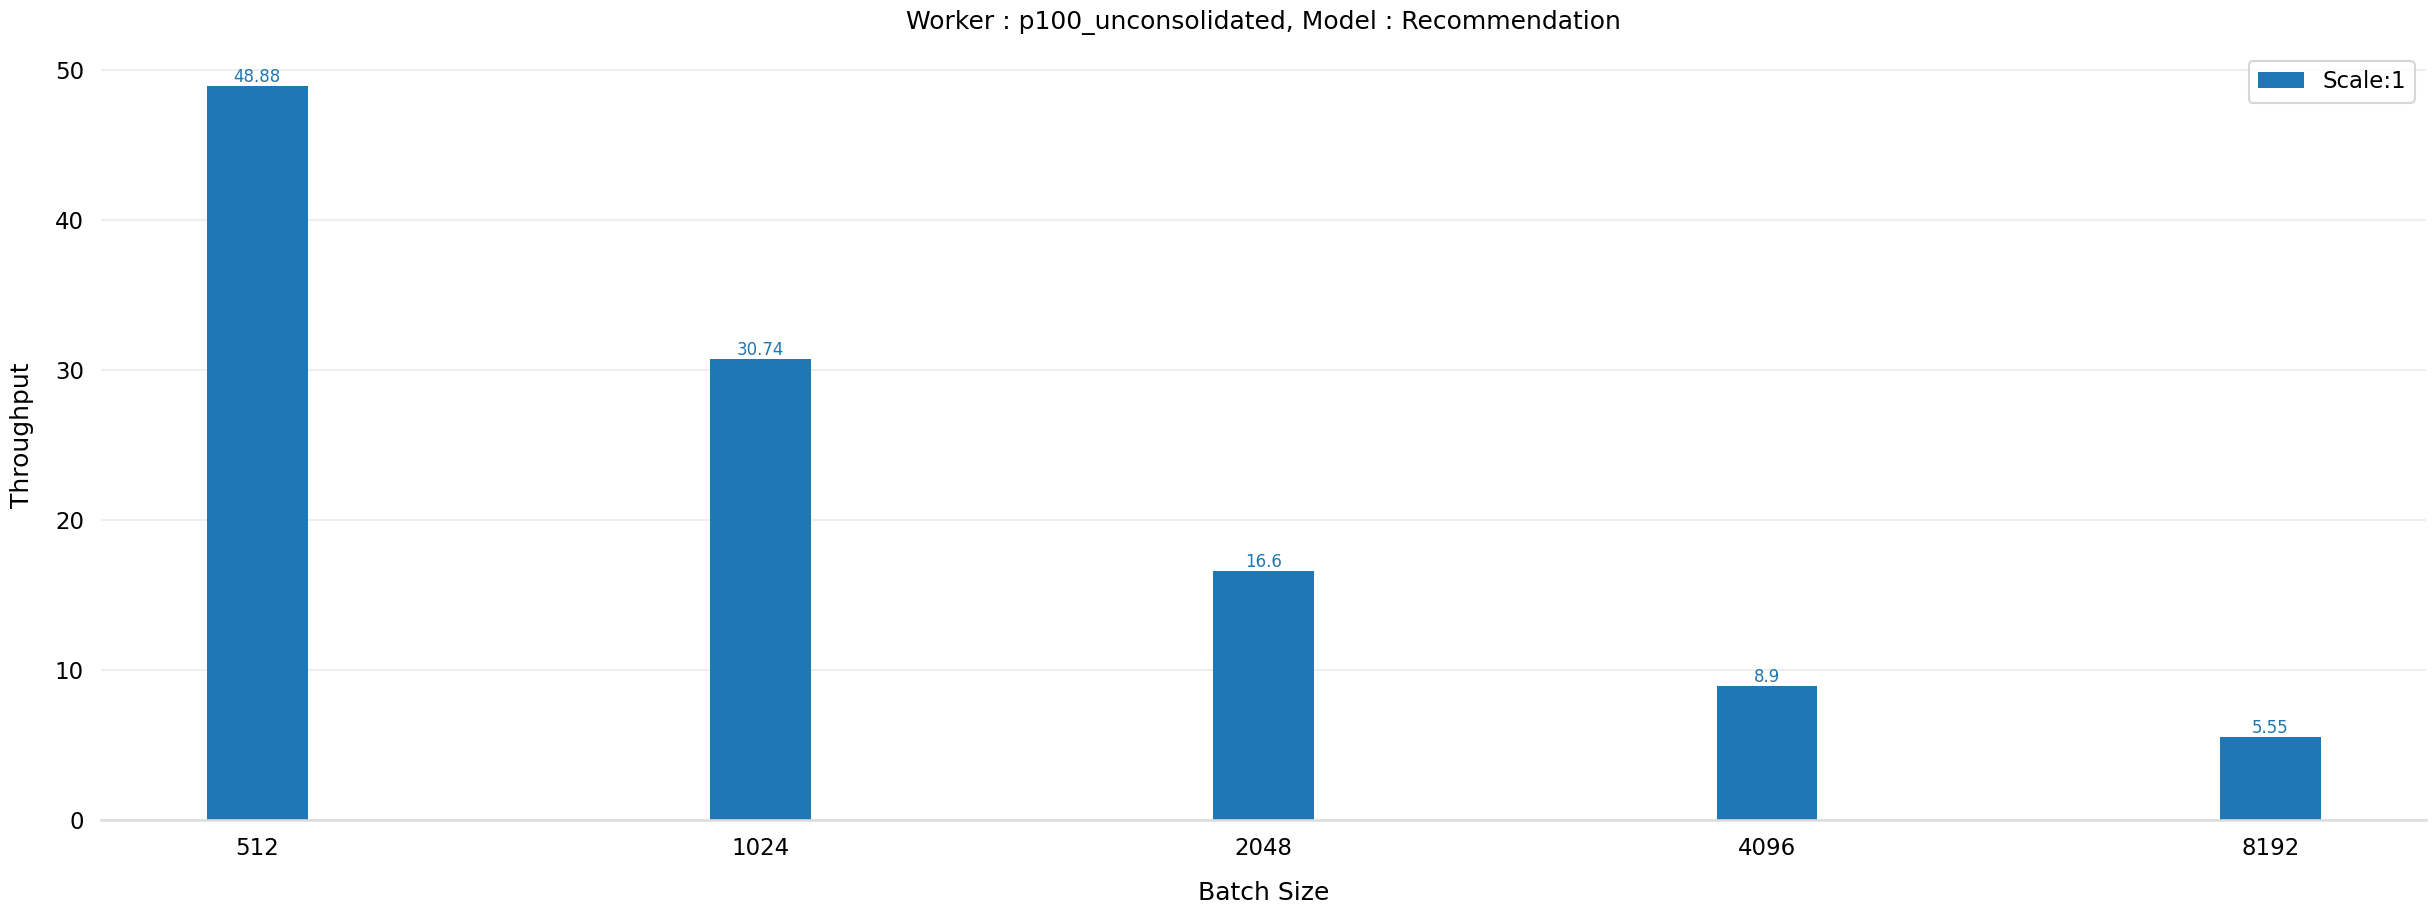

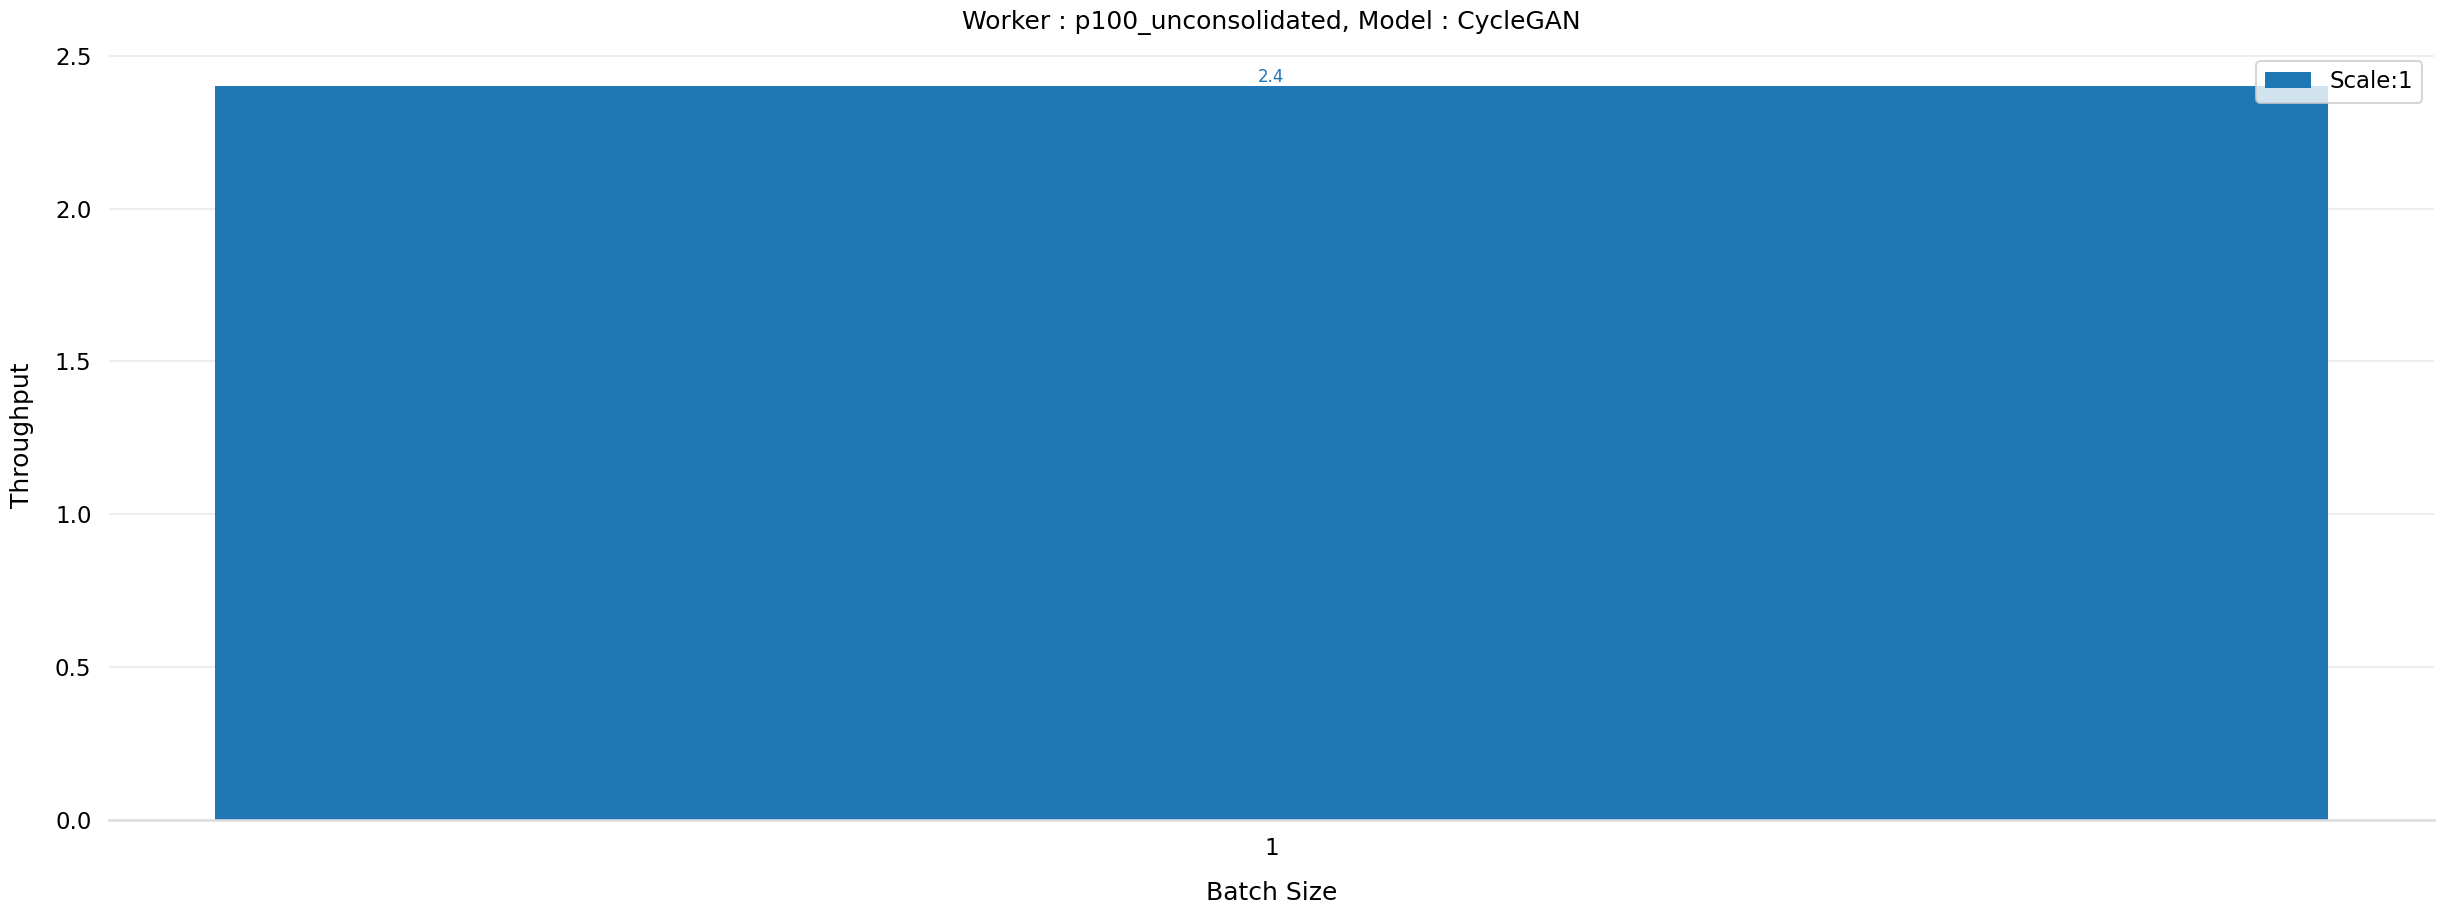

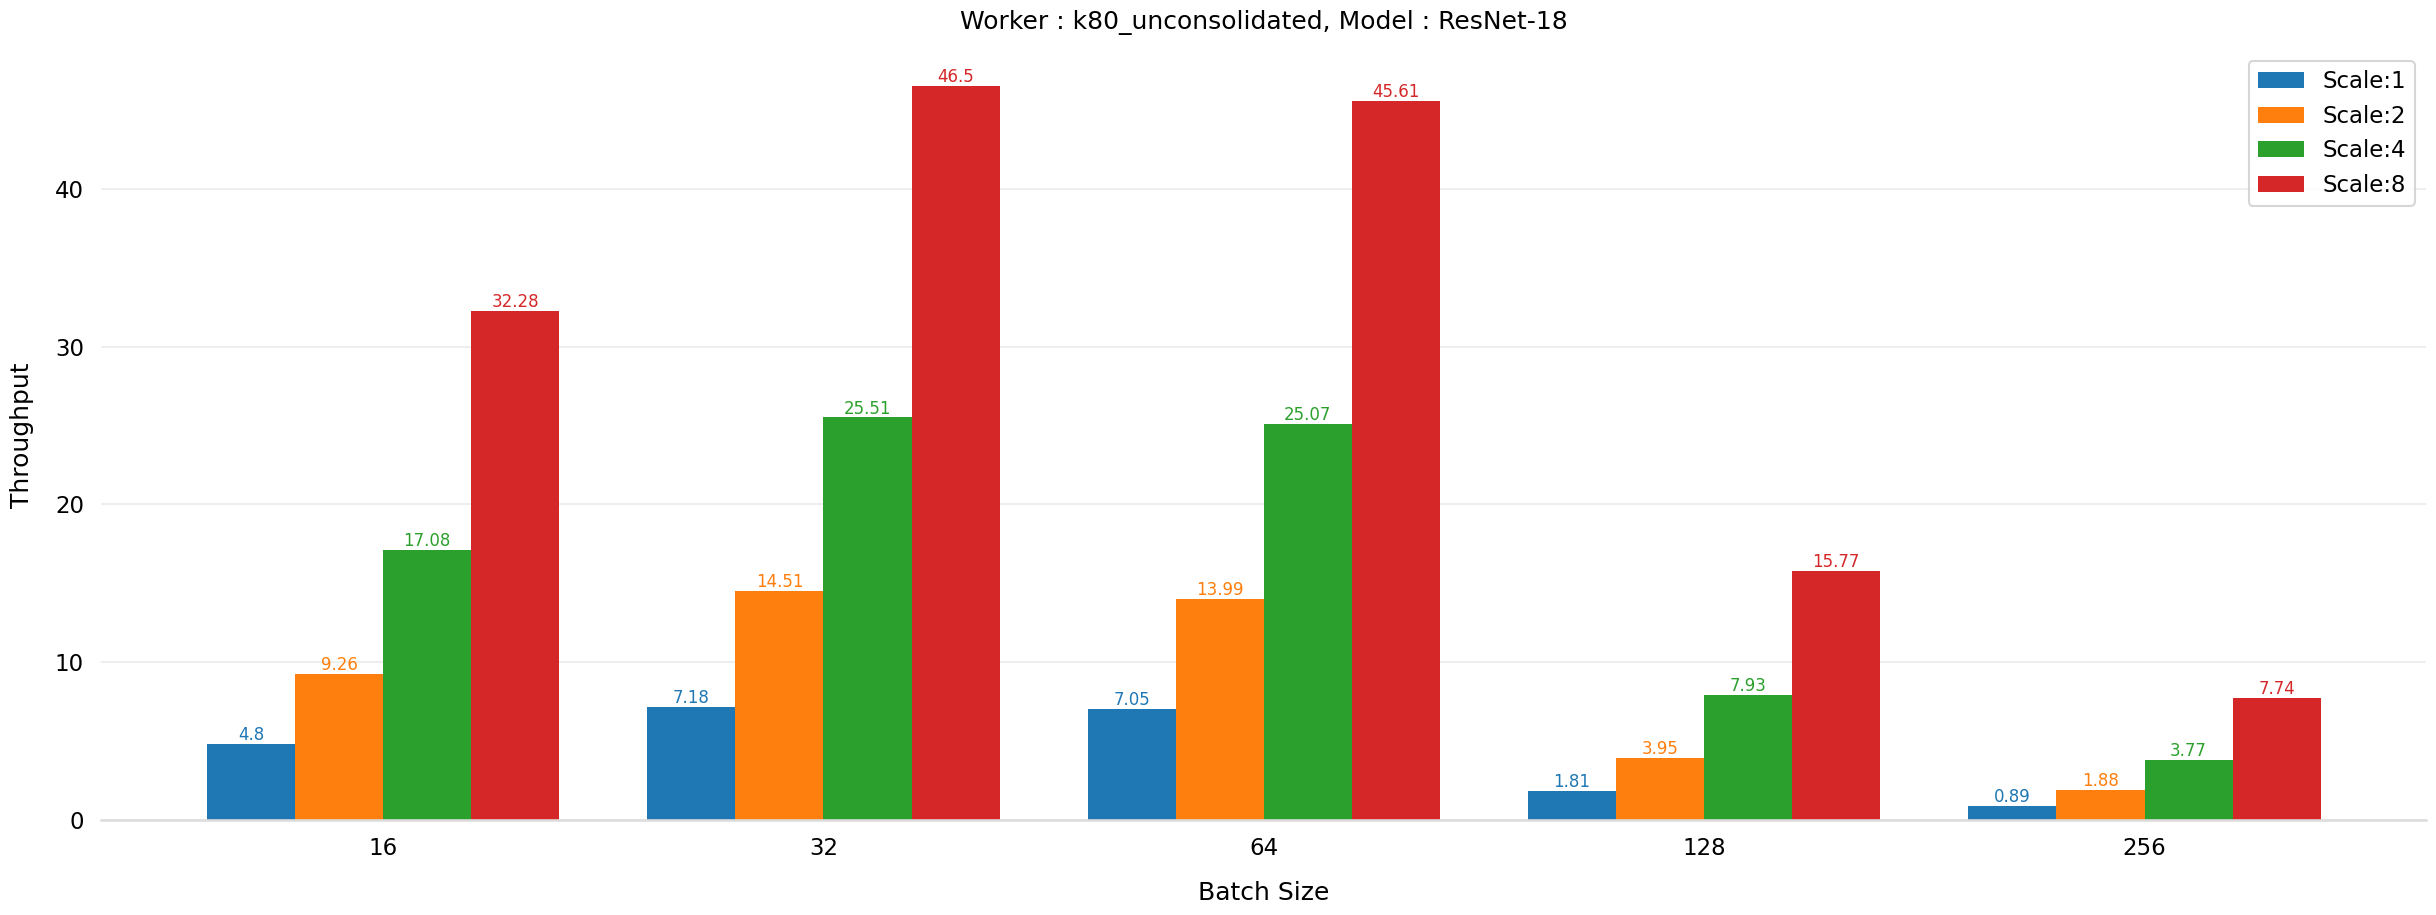

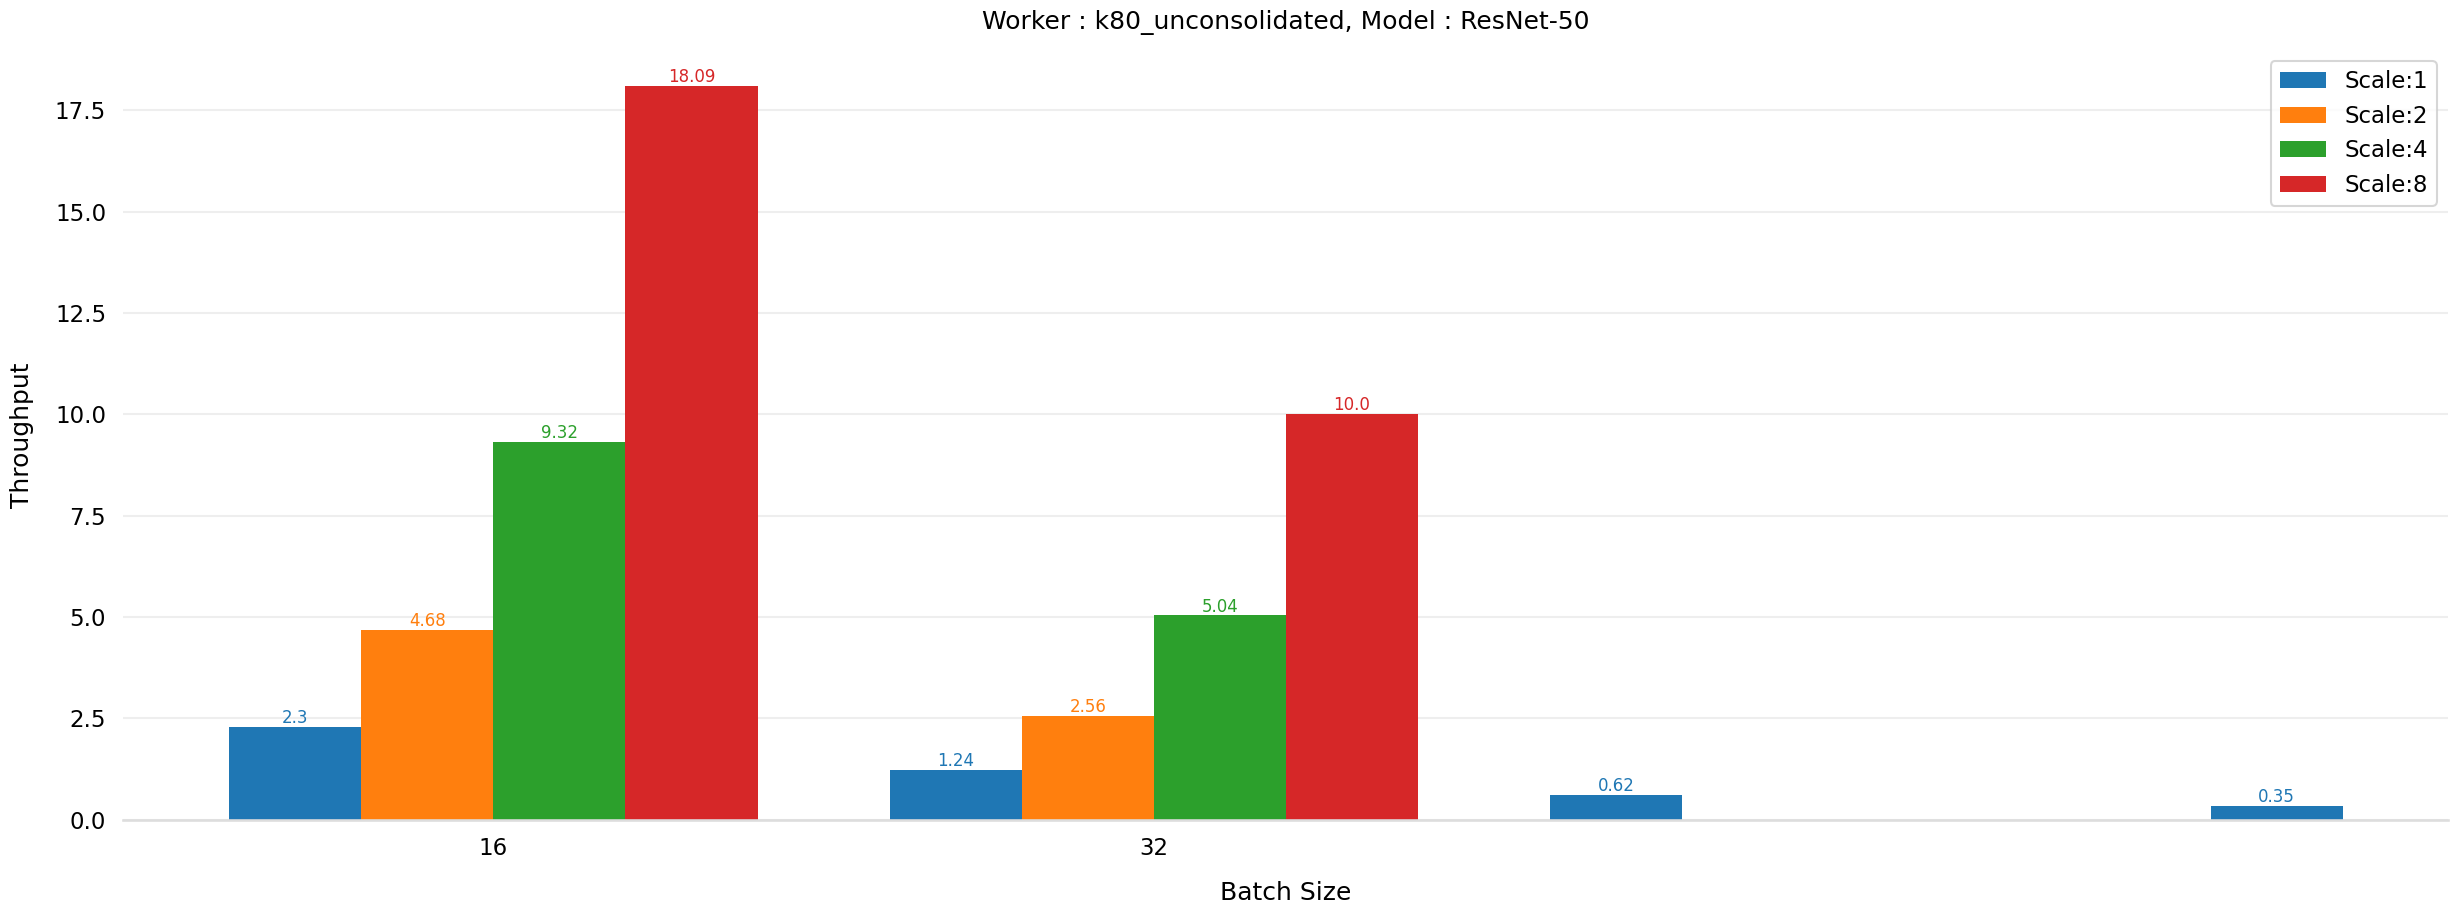

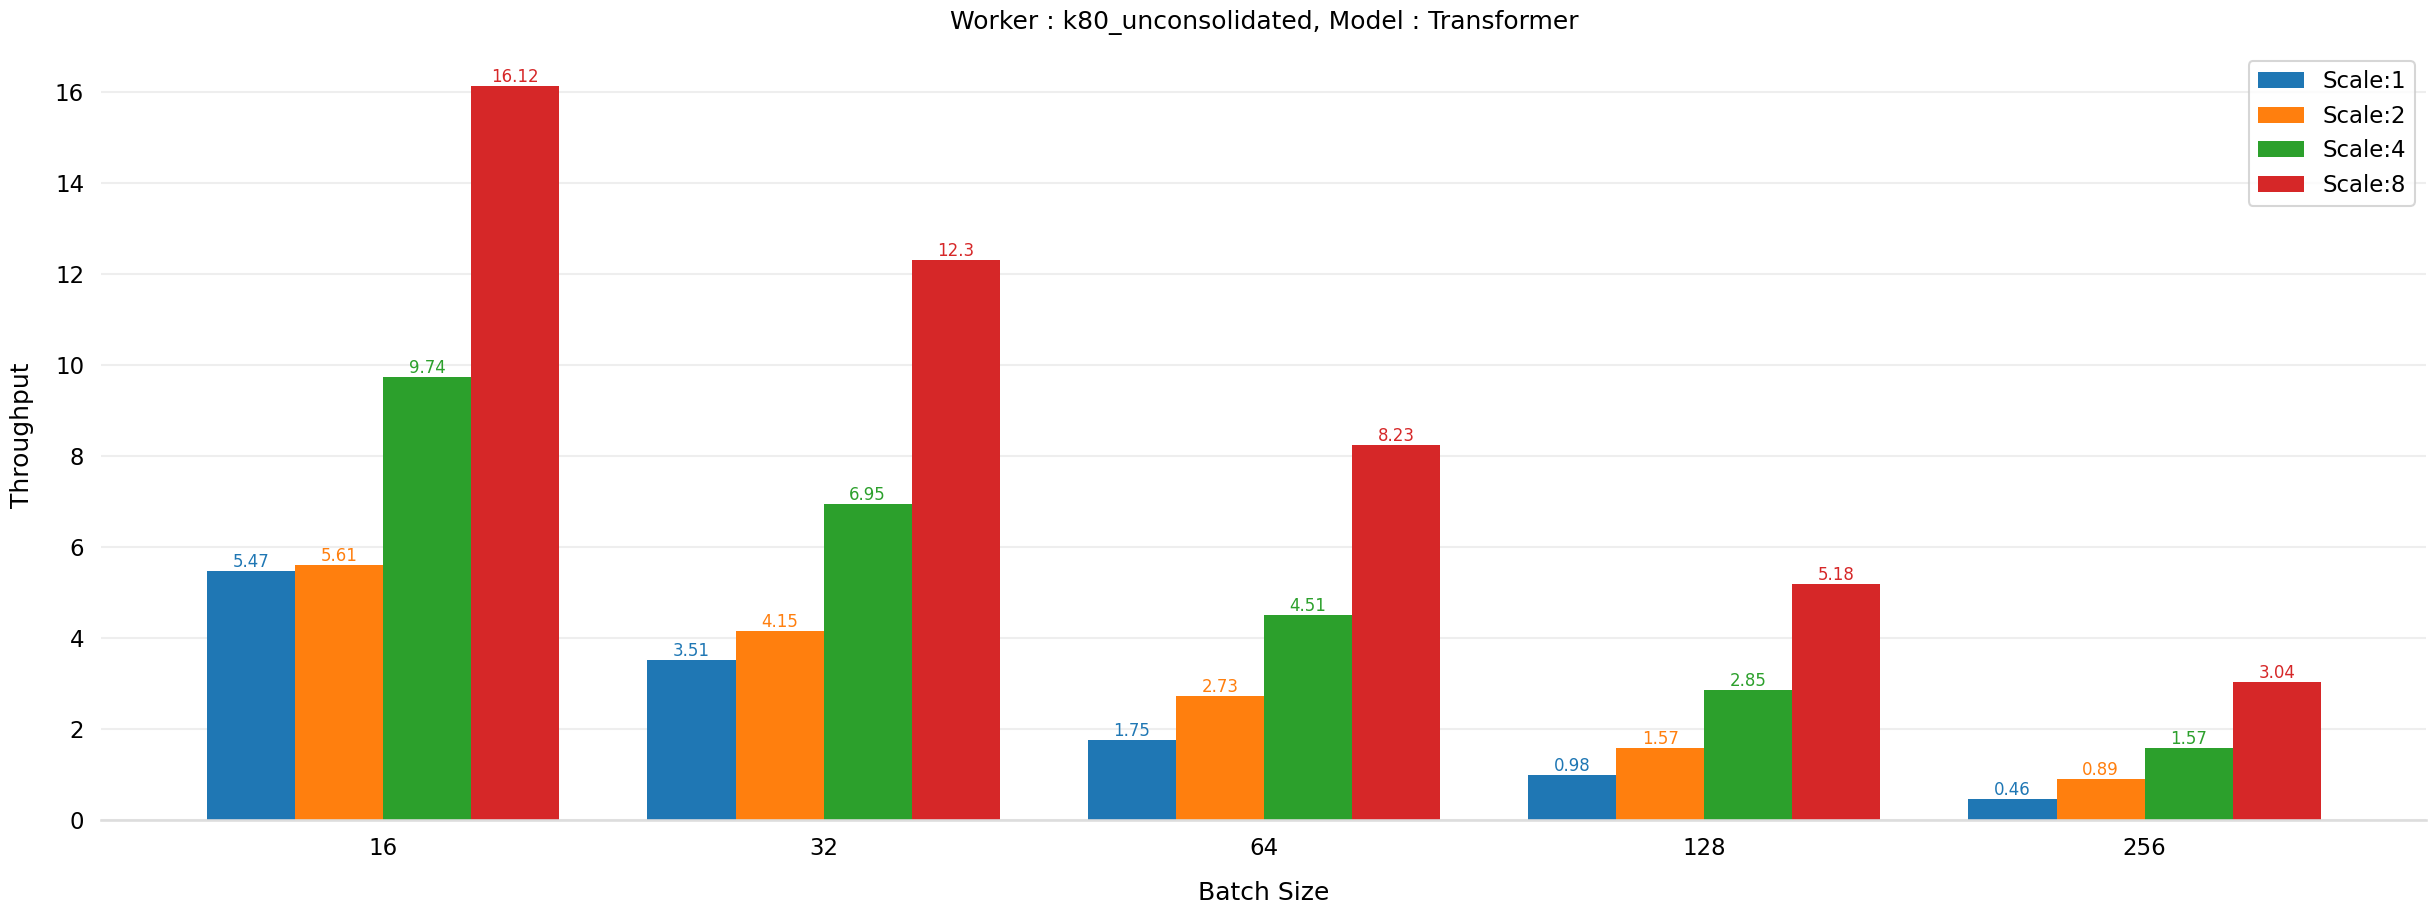

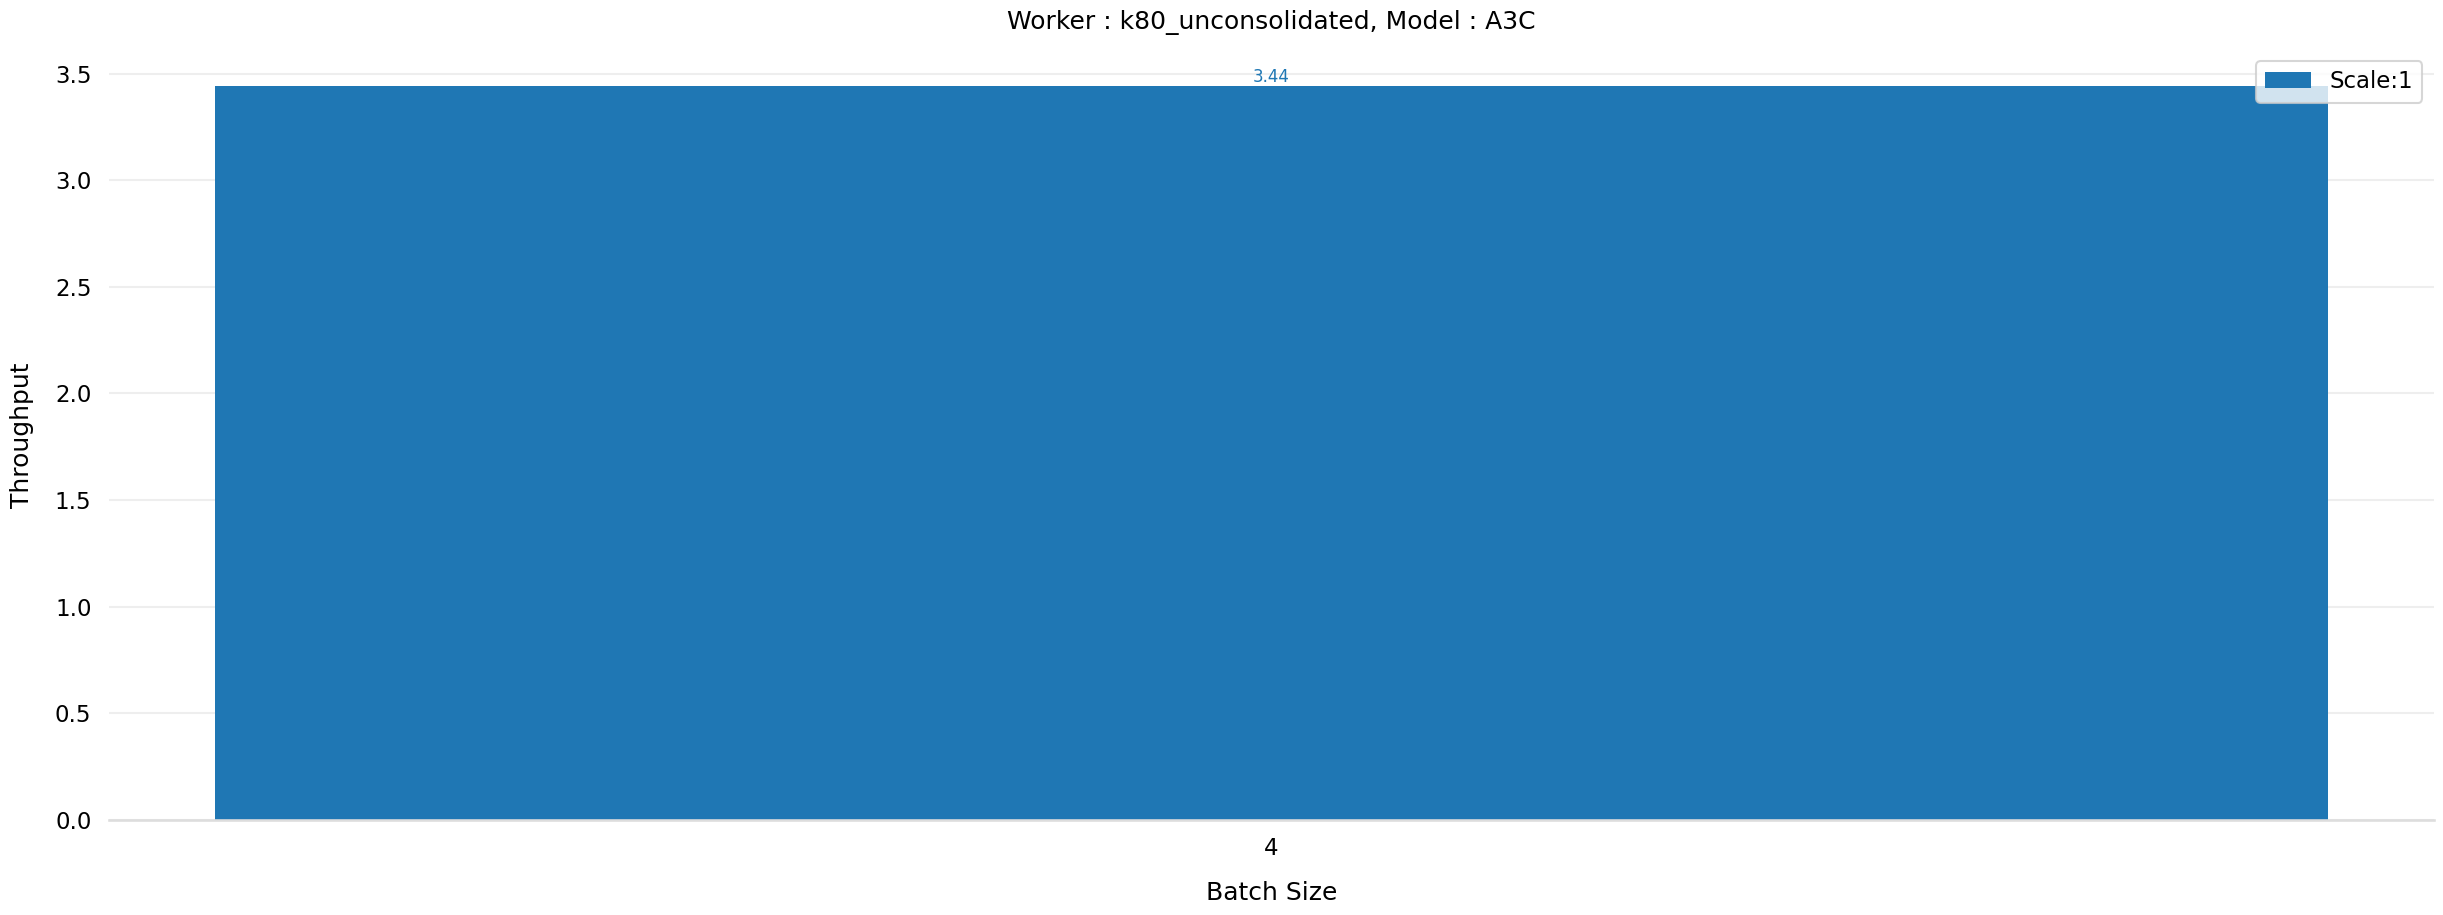

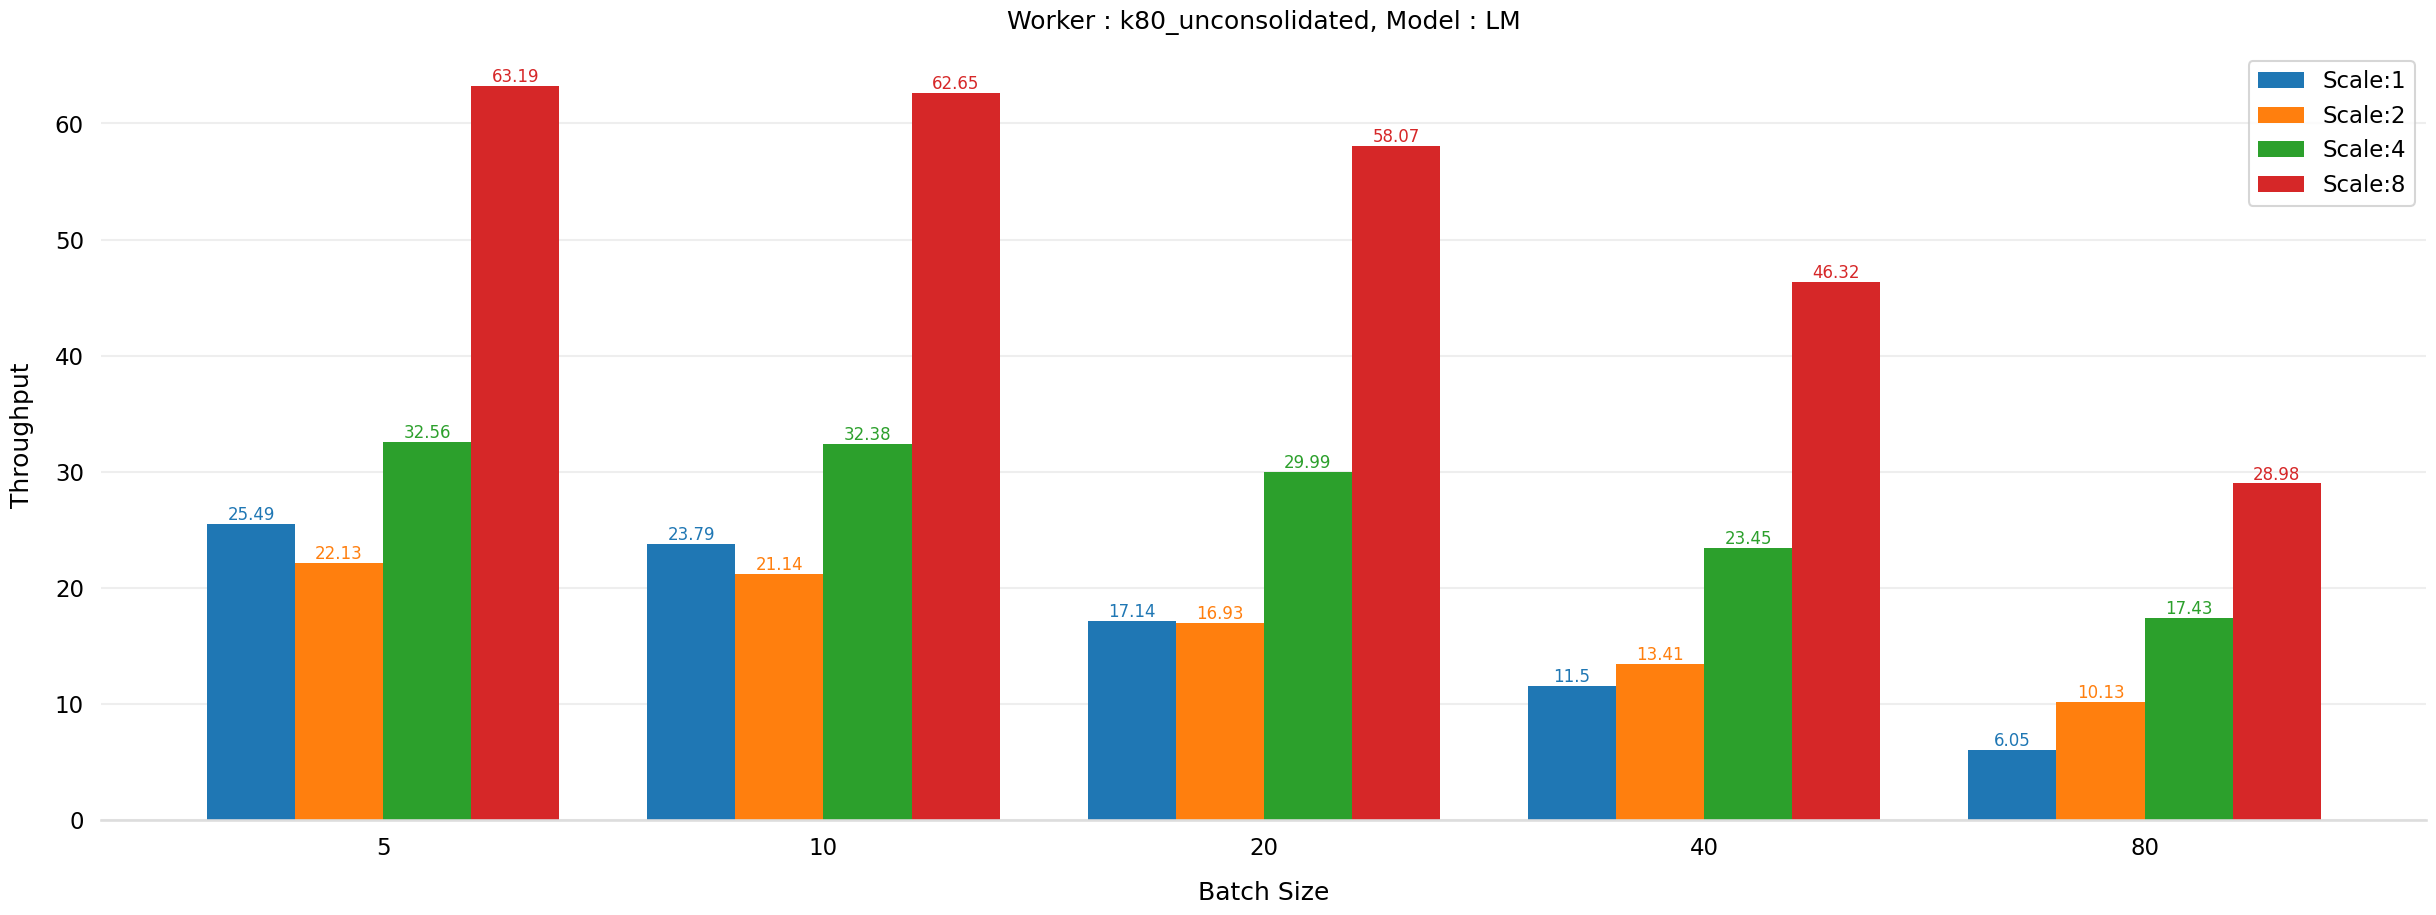

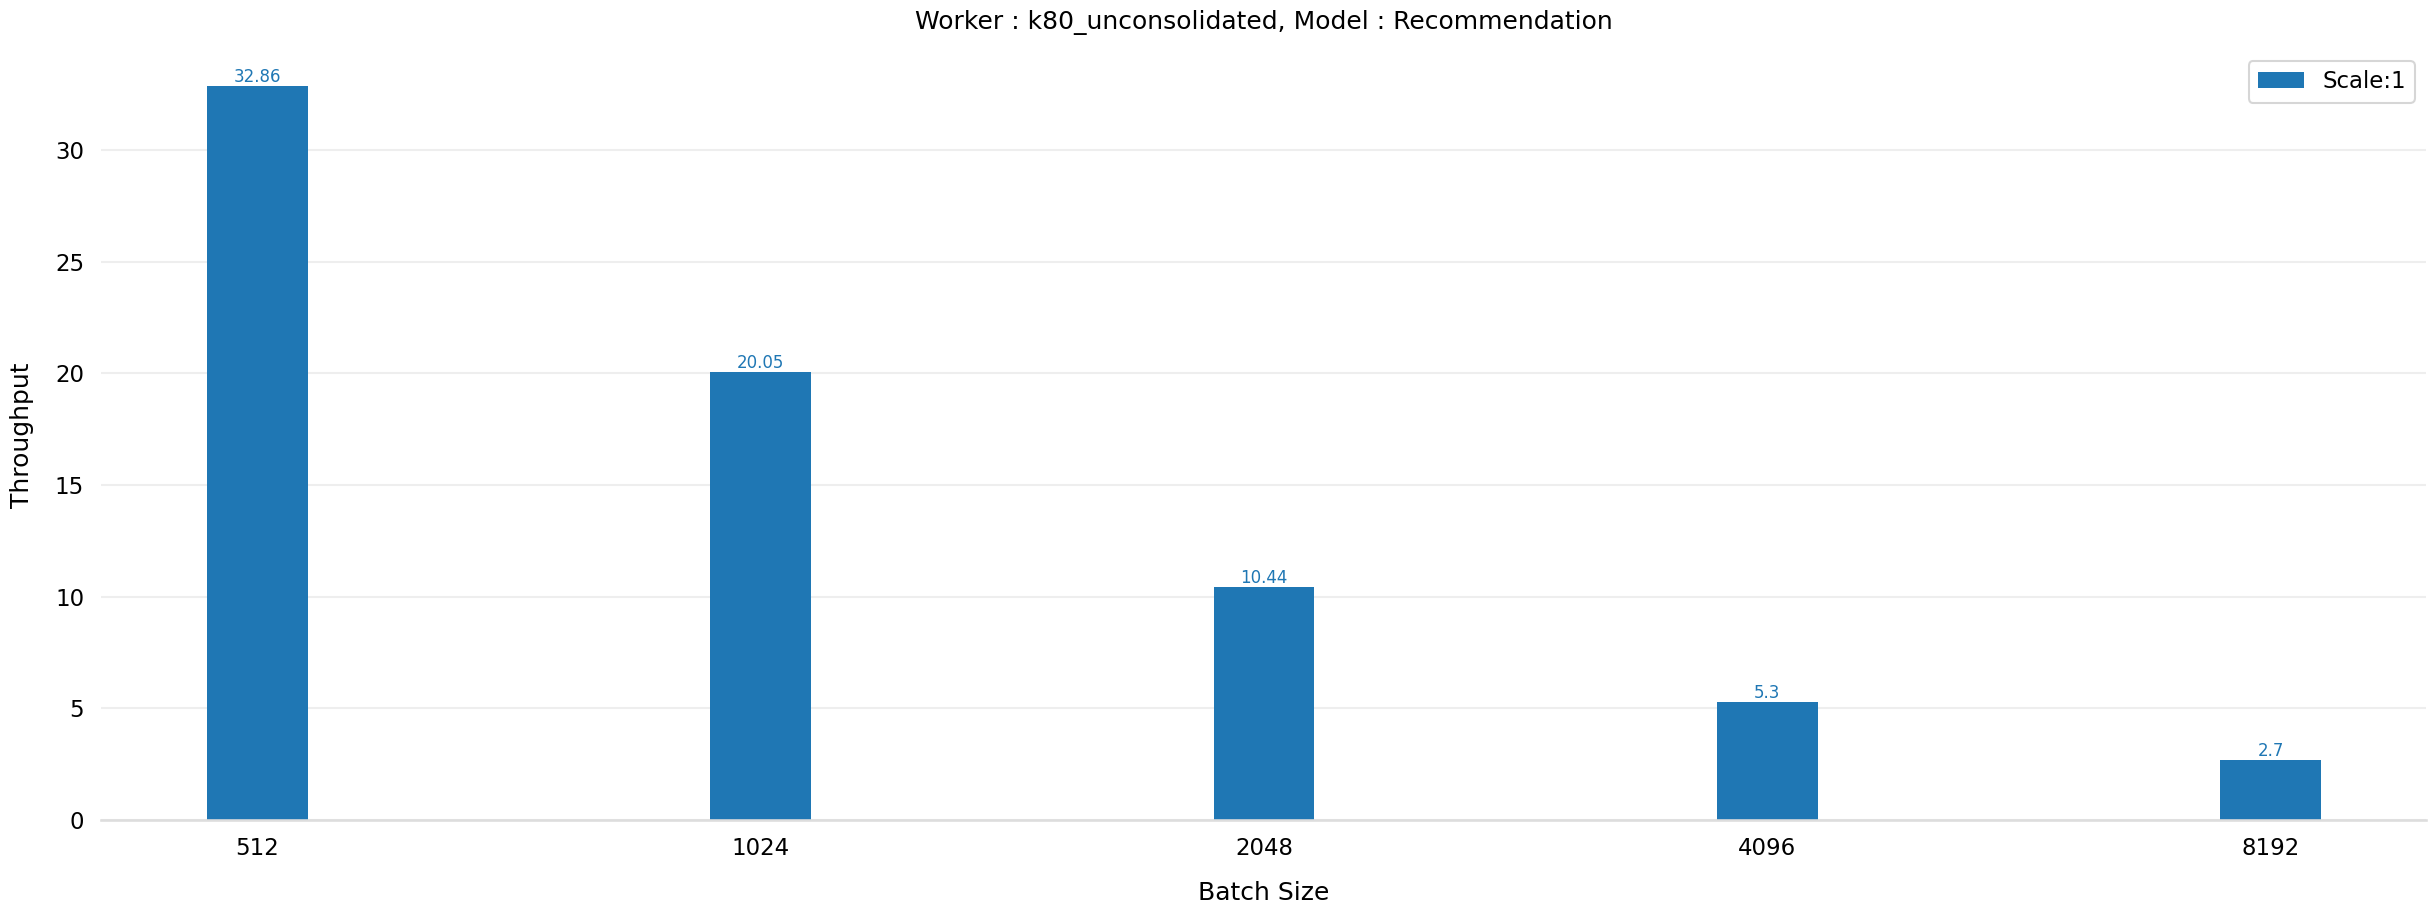

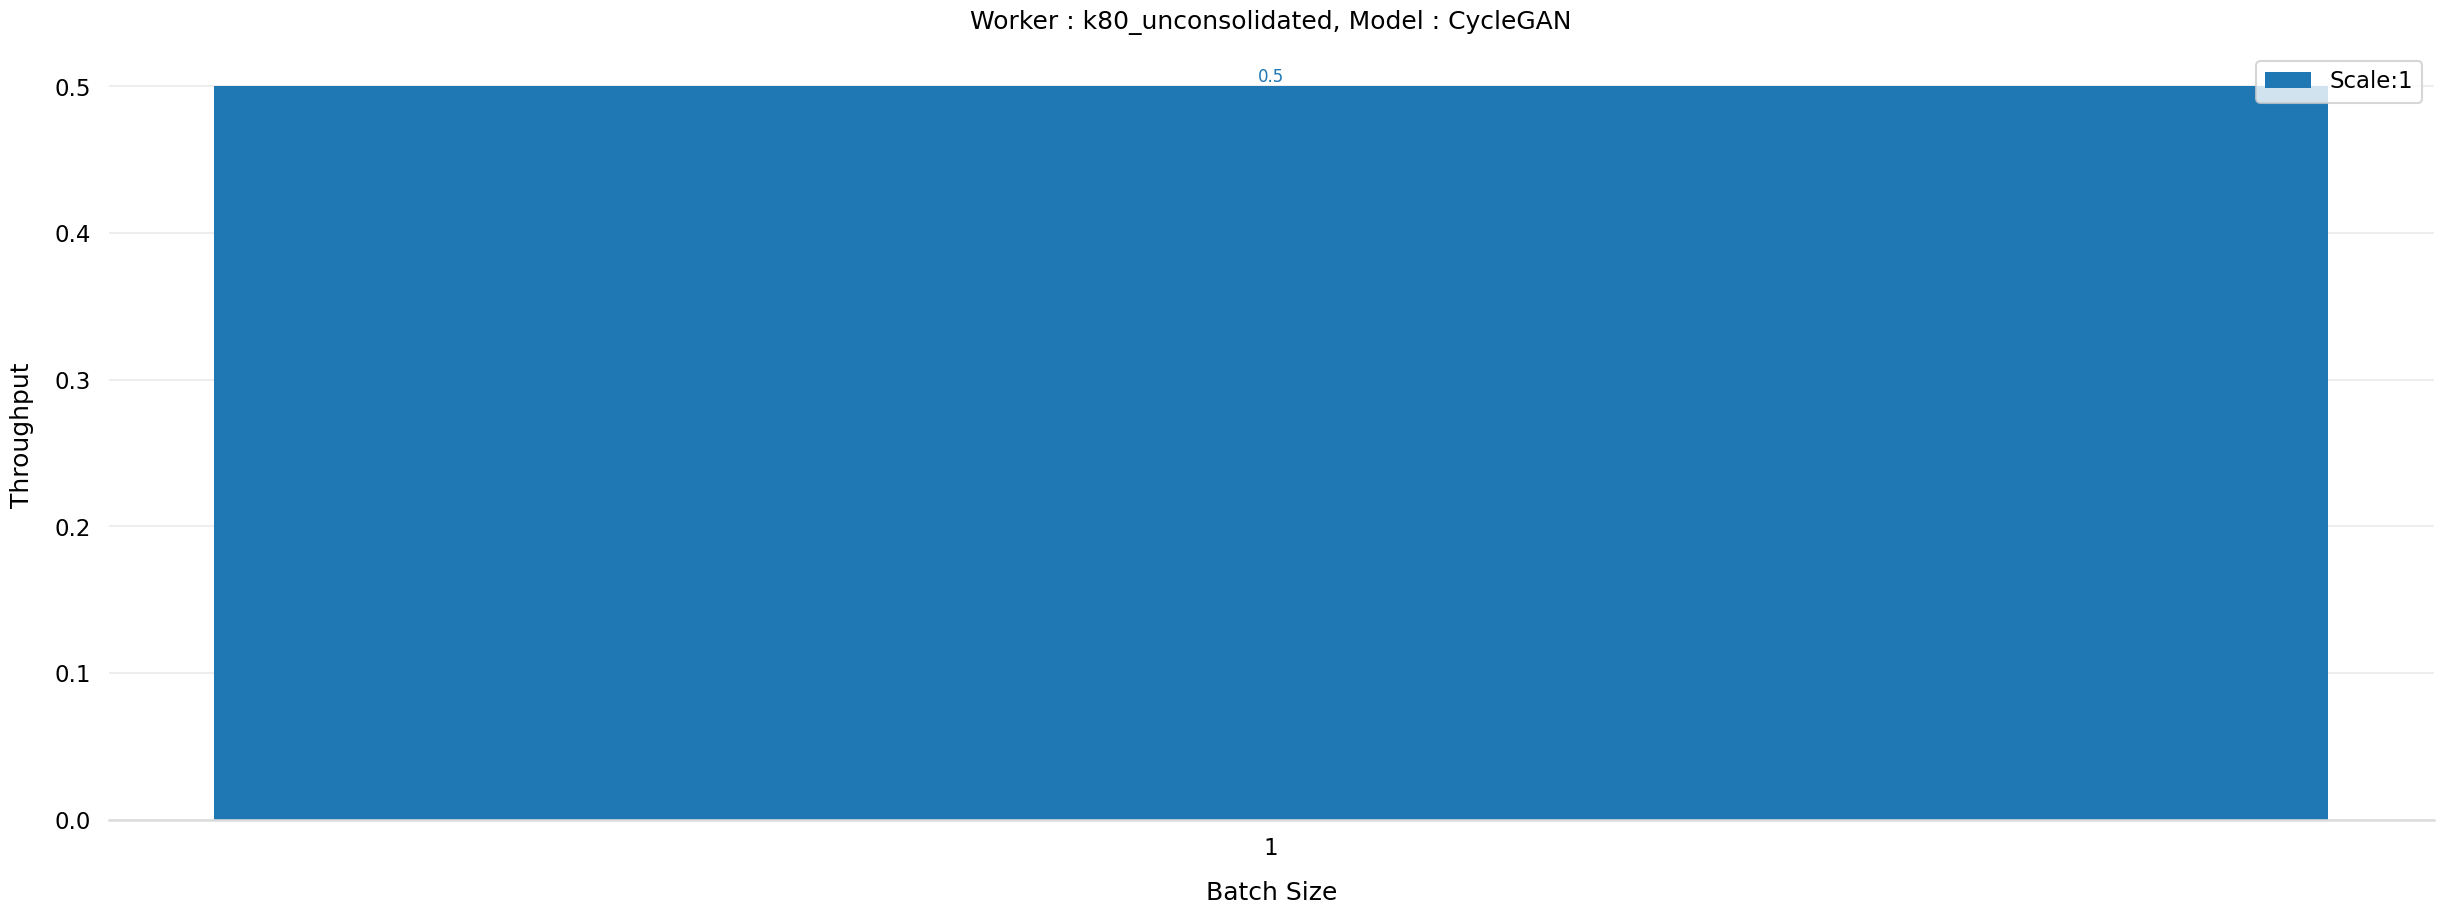

In [24]:
for worker_name in df["worker"].unique():
    for model in df["model1"].unique():    
        result_int = df.query(f'model2 == "x" & model1 == "{model}" & worker == "{worker_name}"')

        no_graphs = len(result_int["scale1"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))

        bar_width = 0.2

        for idx, scale in enumerate(result_int["scale1"].unique()):
            result = result_int.query(f'scale1 == {scale}')
            x = np.arange(len(result["batchsize1"].unique()))
            b = ax.bar(x + (bar_width * idx), round(result["throughput1"],2), width=bar_width, label=f'Scale:{scale}')
            
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["batchsize1"].unique())

        ax.legend()

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        ax.set_xlabel('Batch Size', labelpad=15)
        ax.set_ylabel('Throughput', labelpad=15)
        ax.set_title(f'Worker : {worker_name}, Model : {model}', pad=15)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

        # plt.savefig(f'images/{worker_name}_{model}.png')

What is the throughput of different isolated models on a single accelerator type.

/tmp/ipykernel_1231611/1094175052.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(30,10))


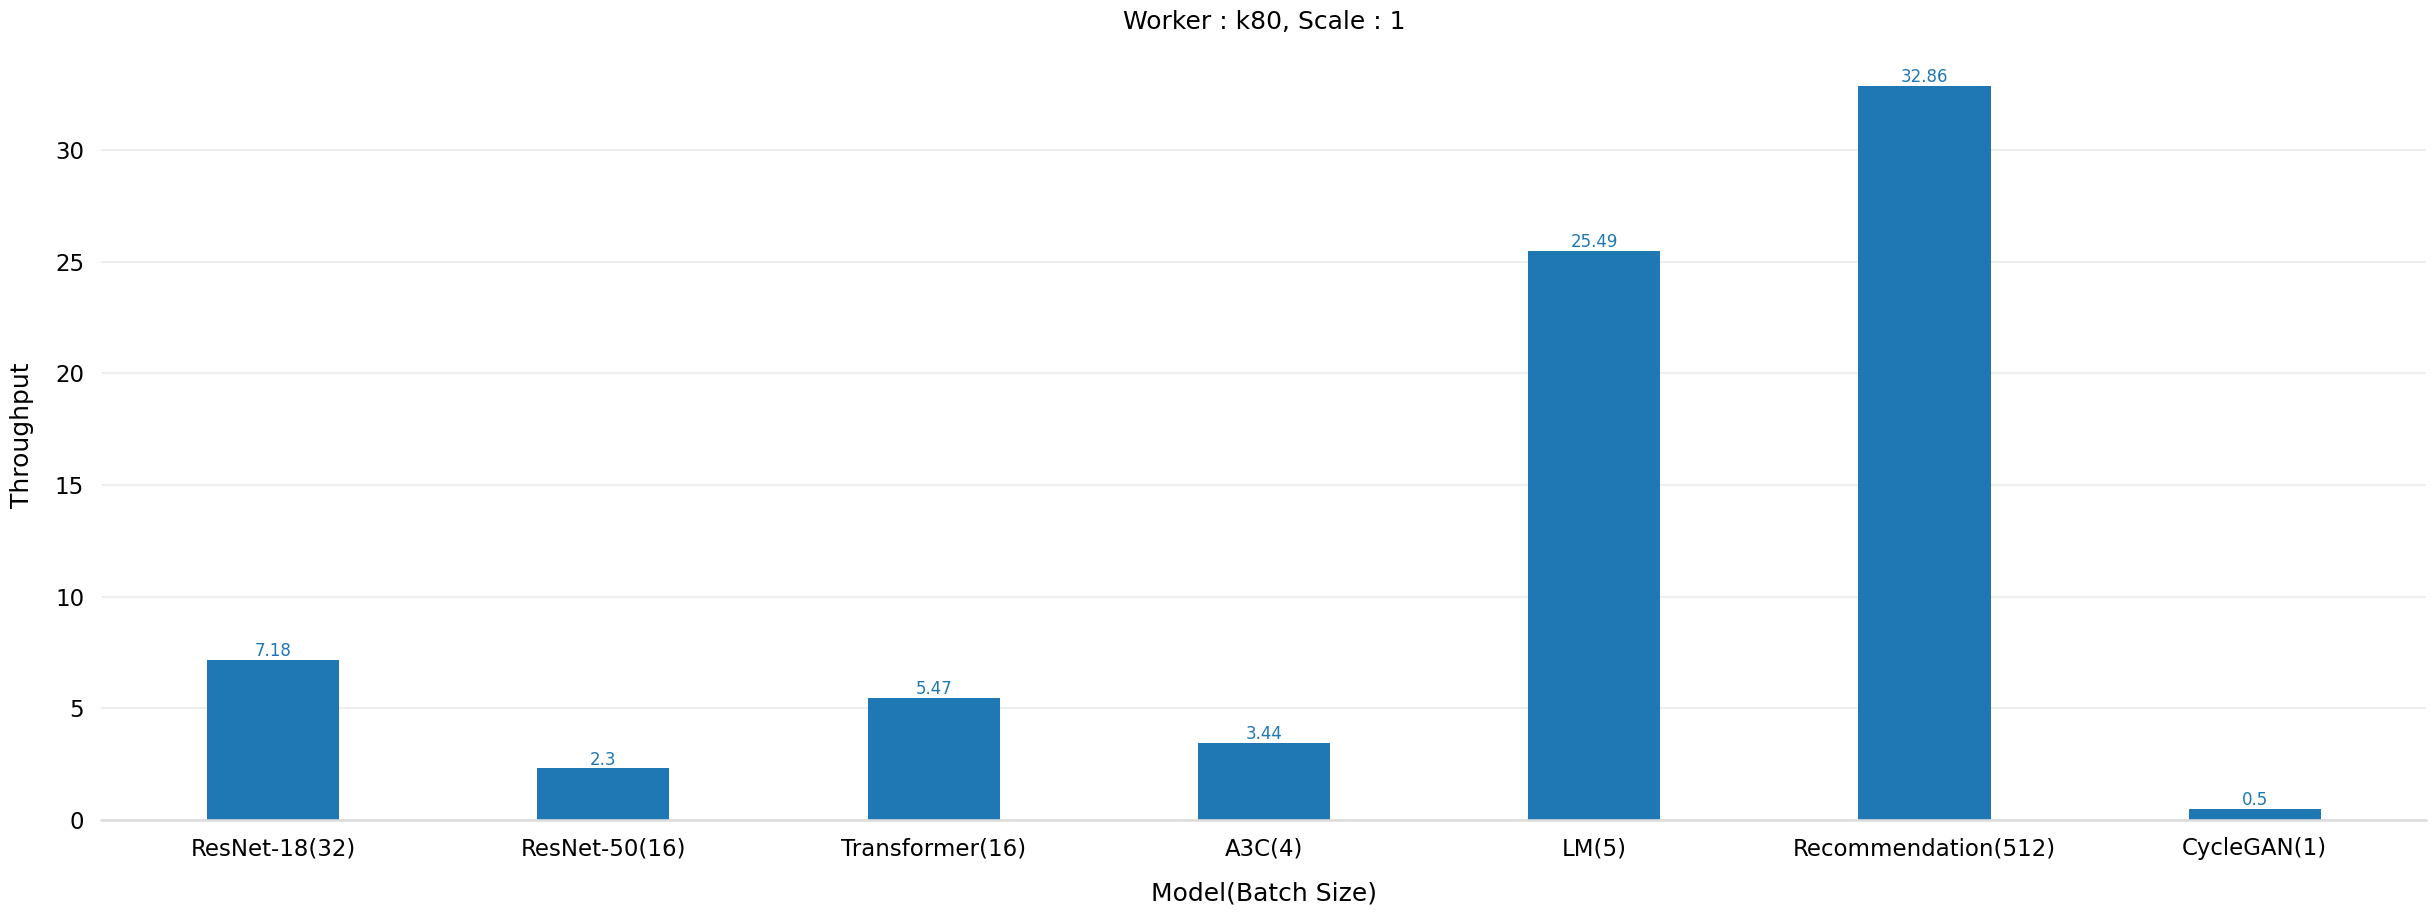

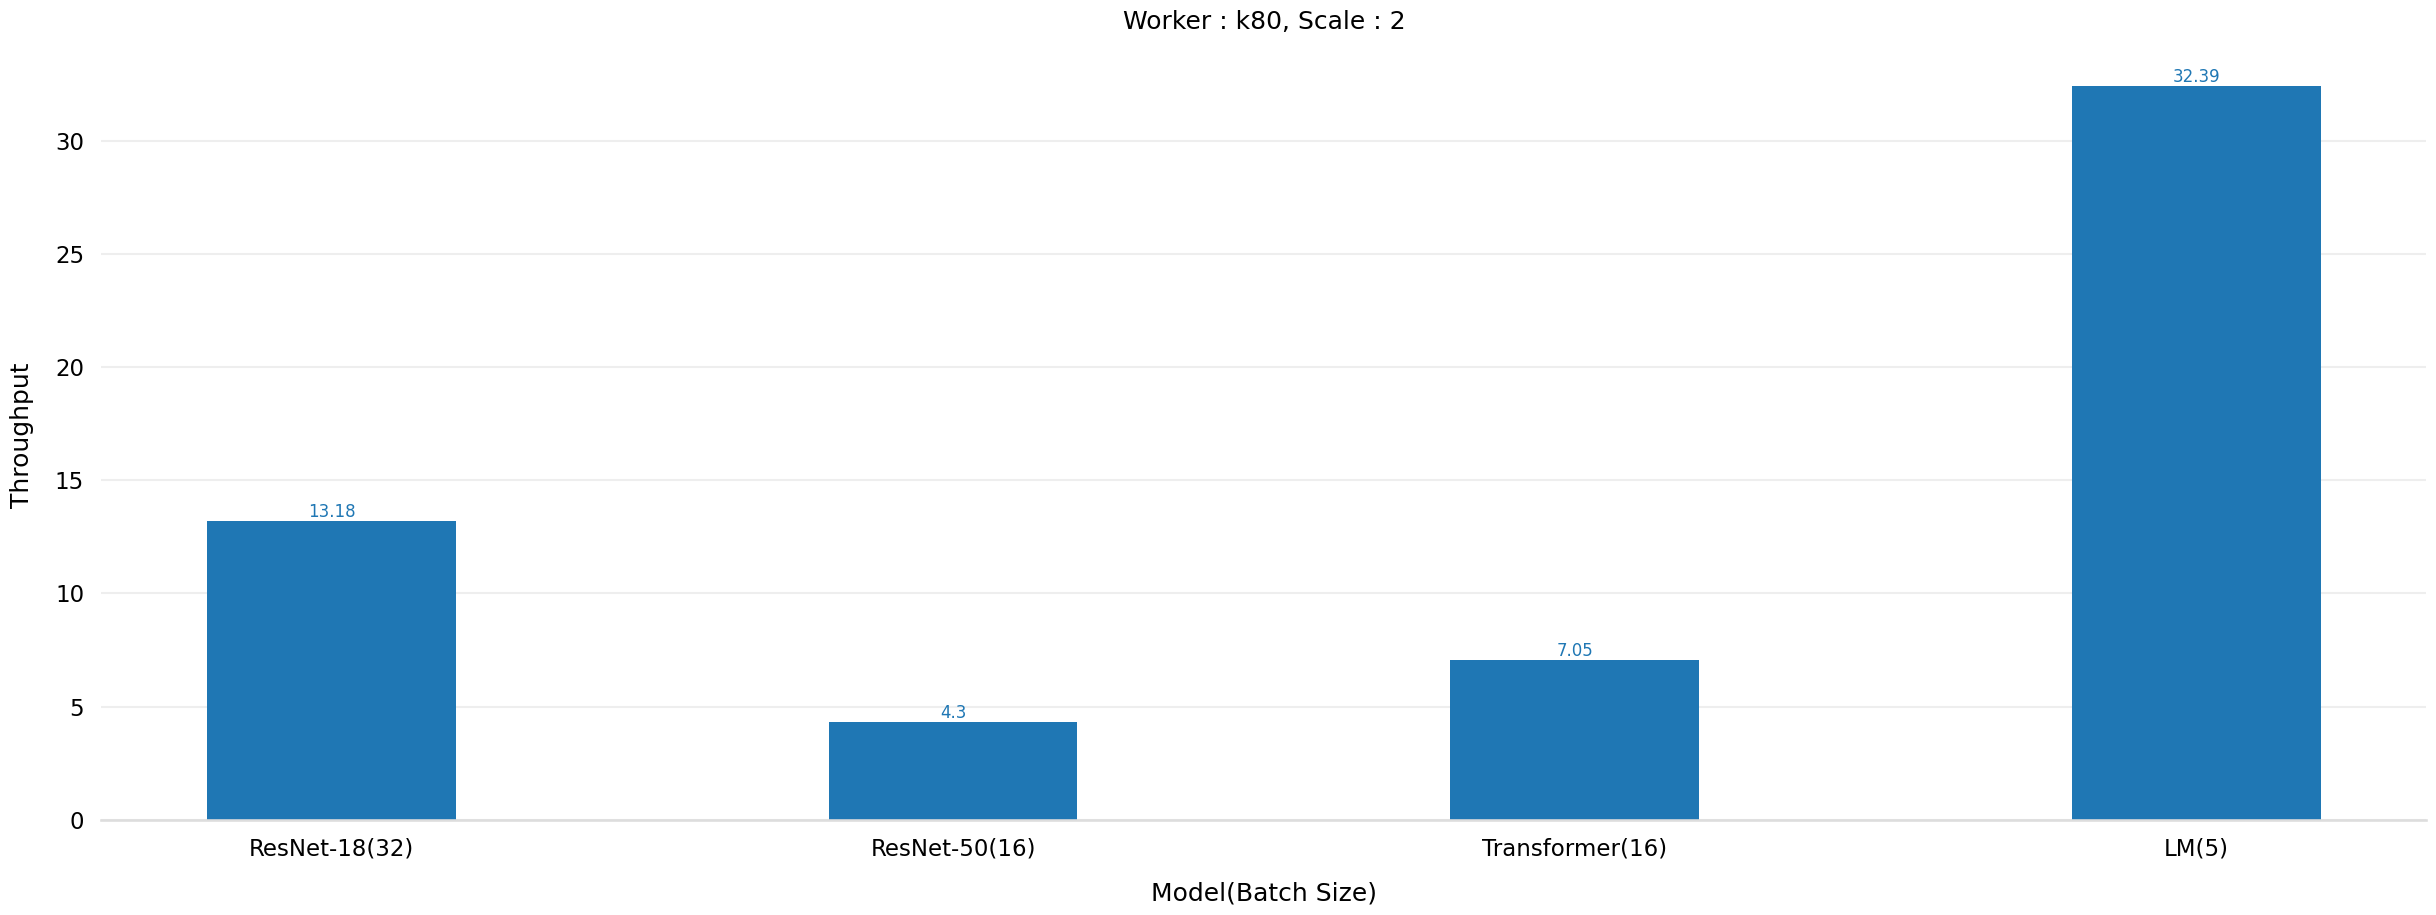

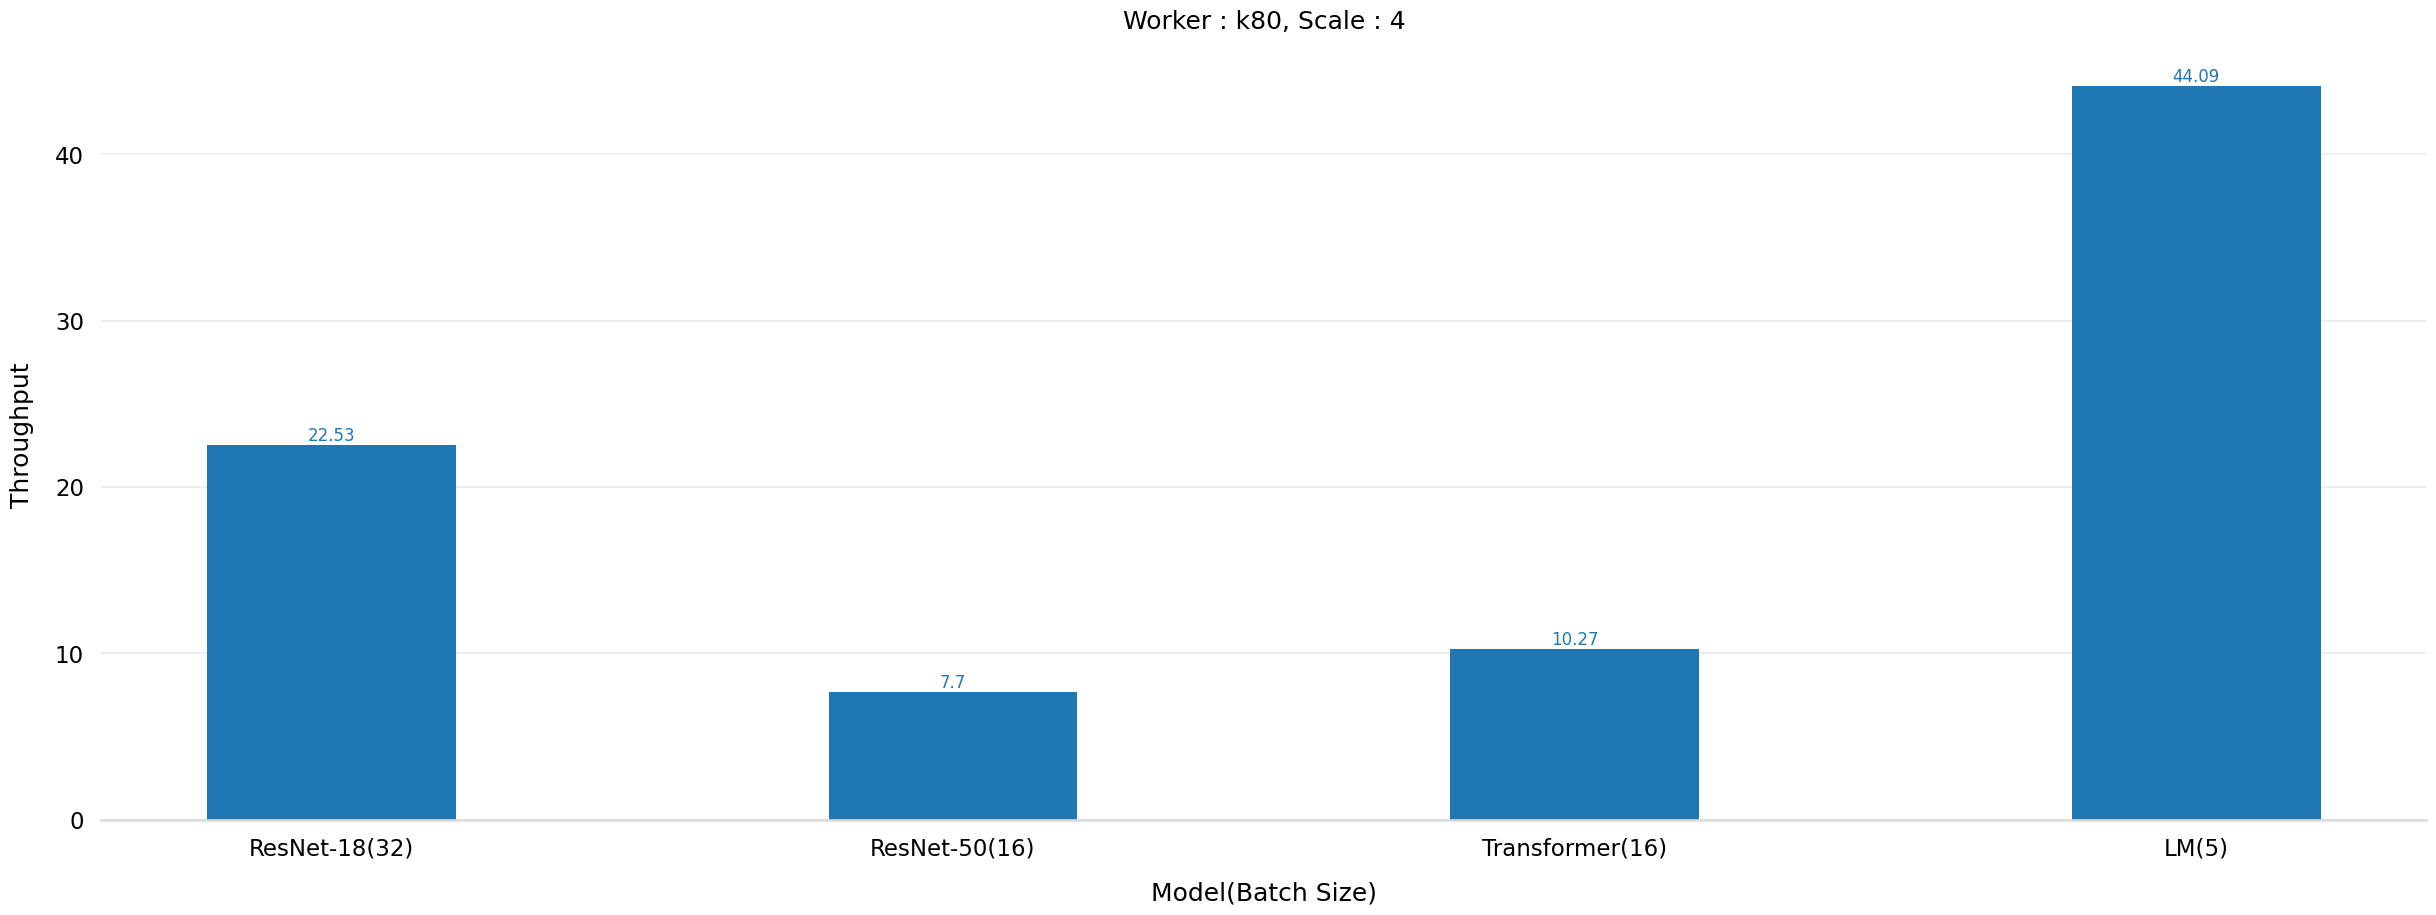

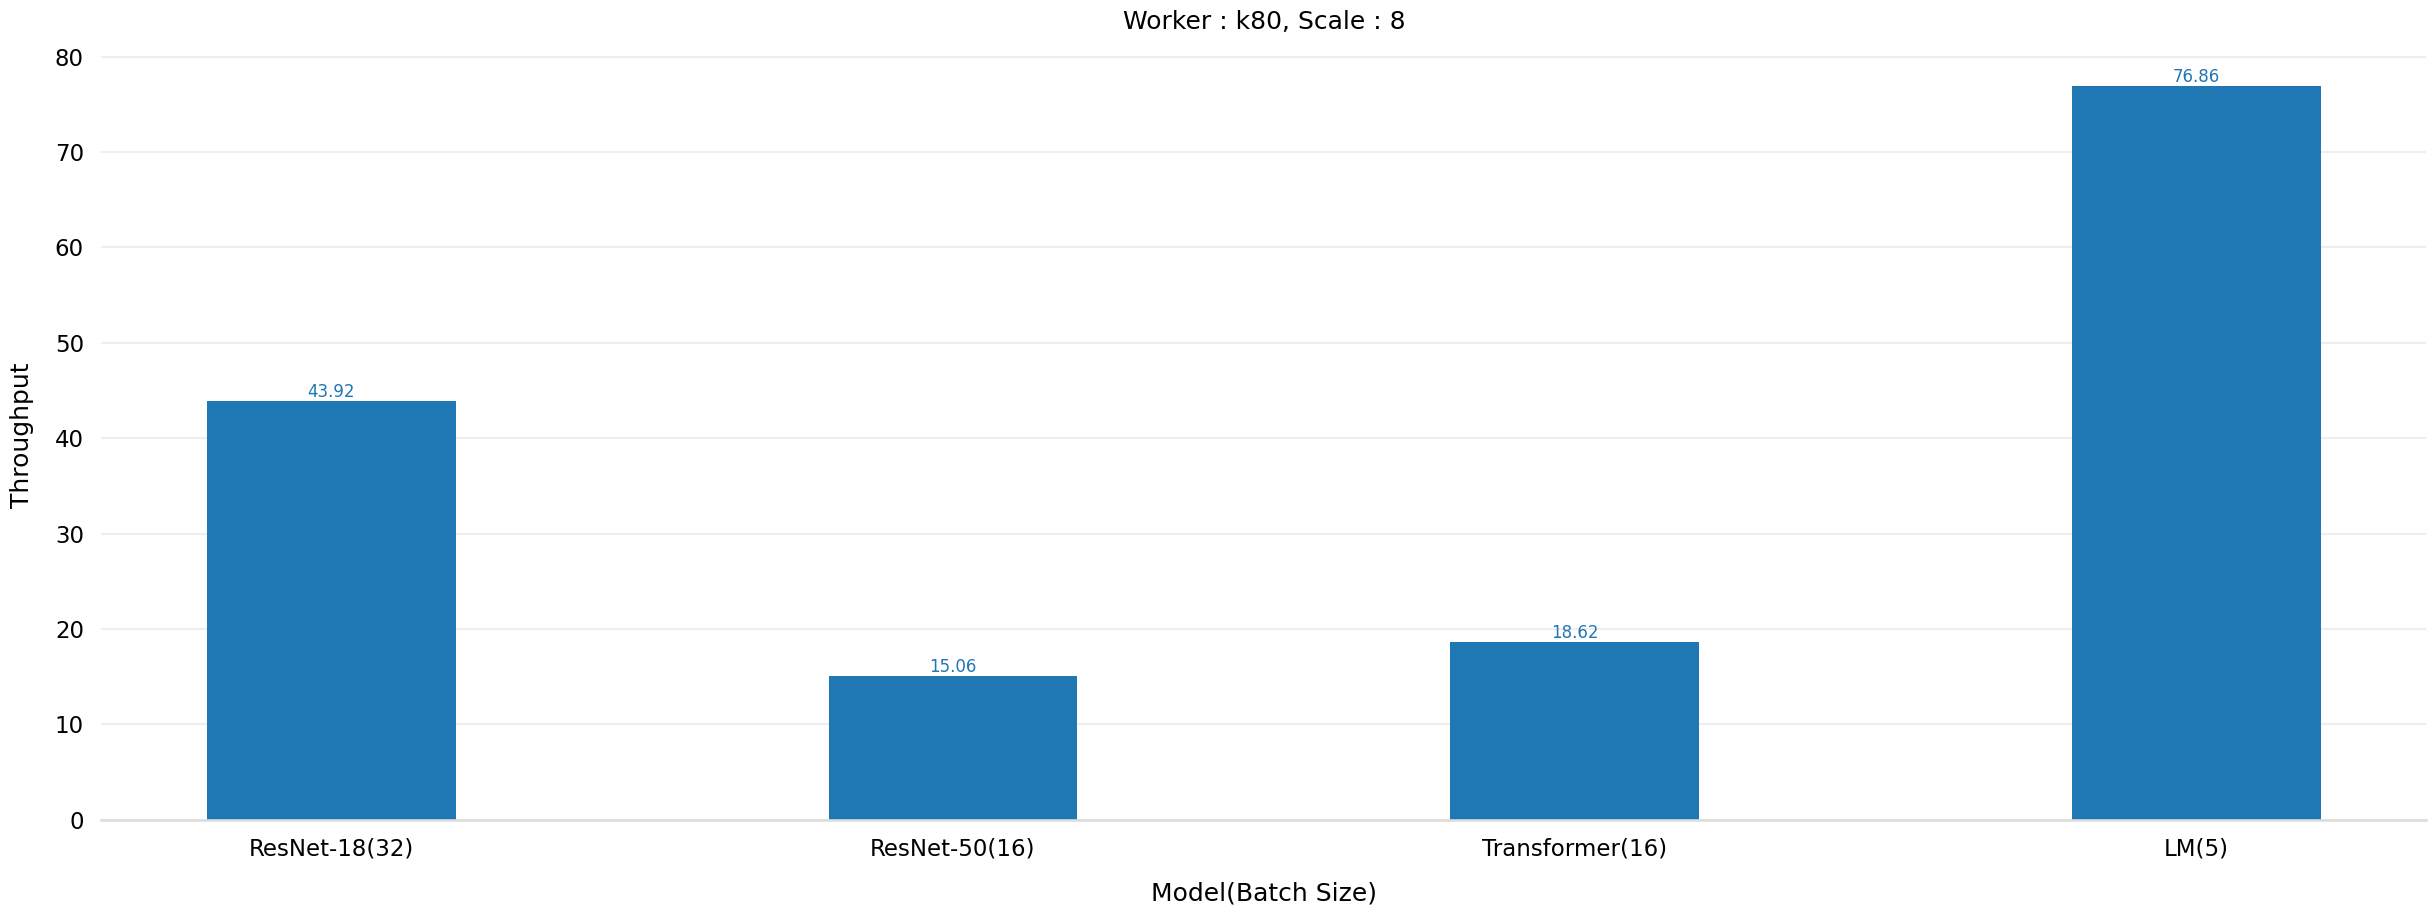

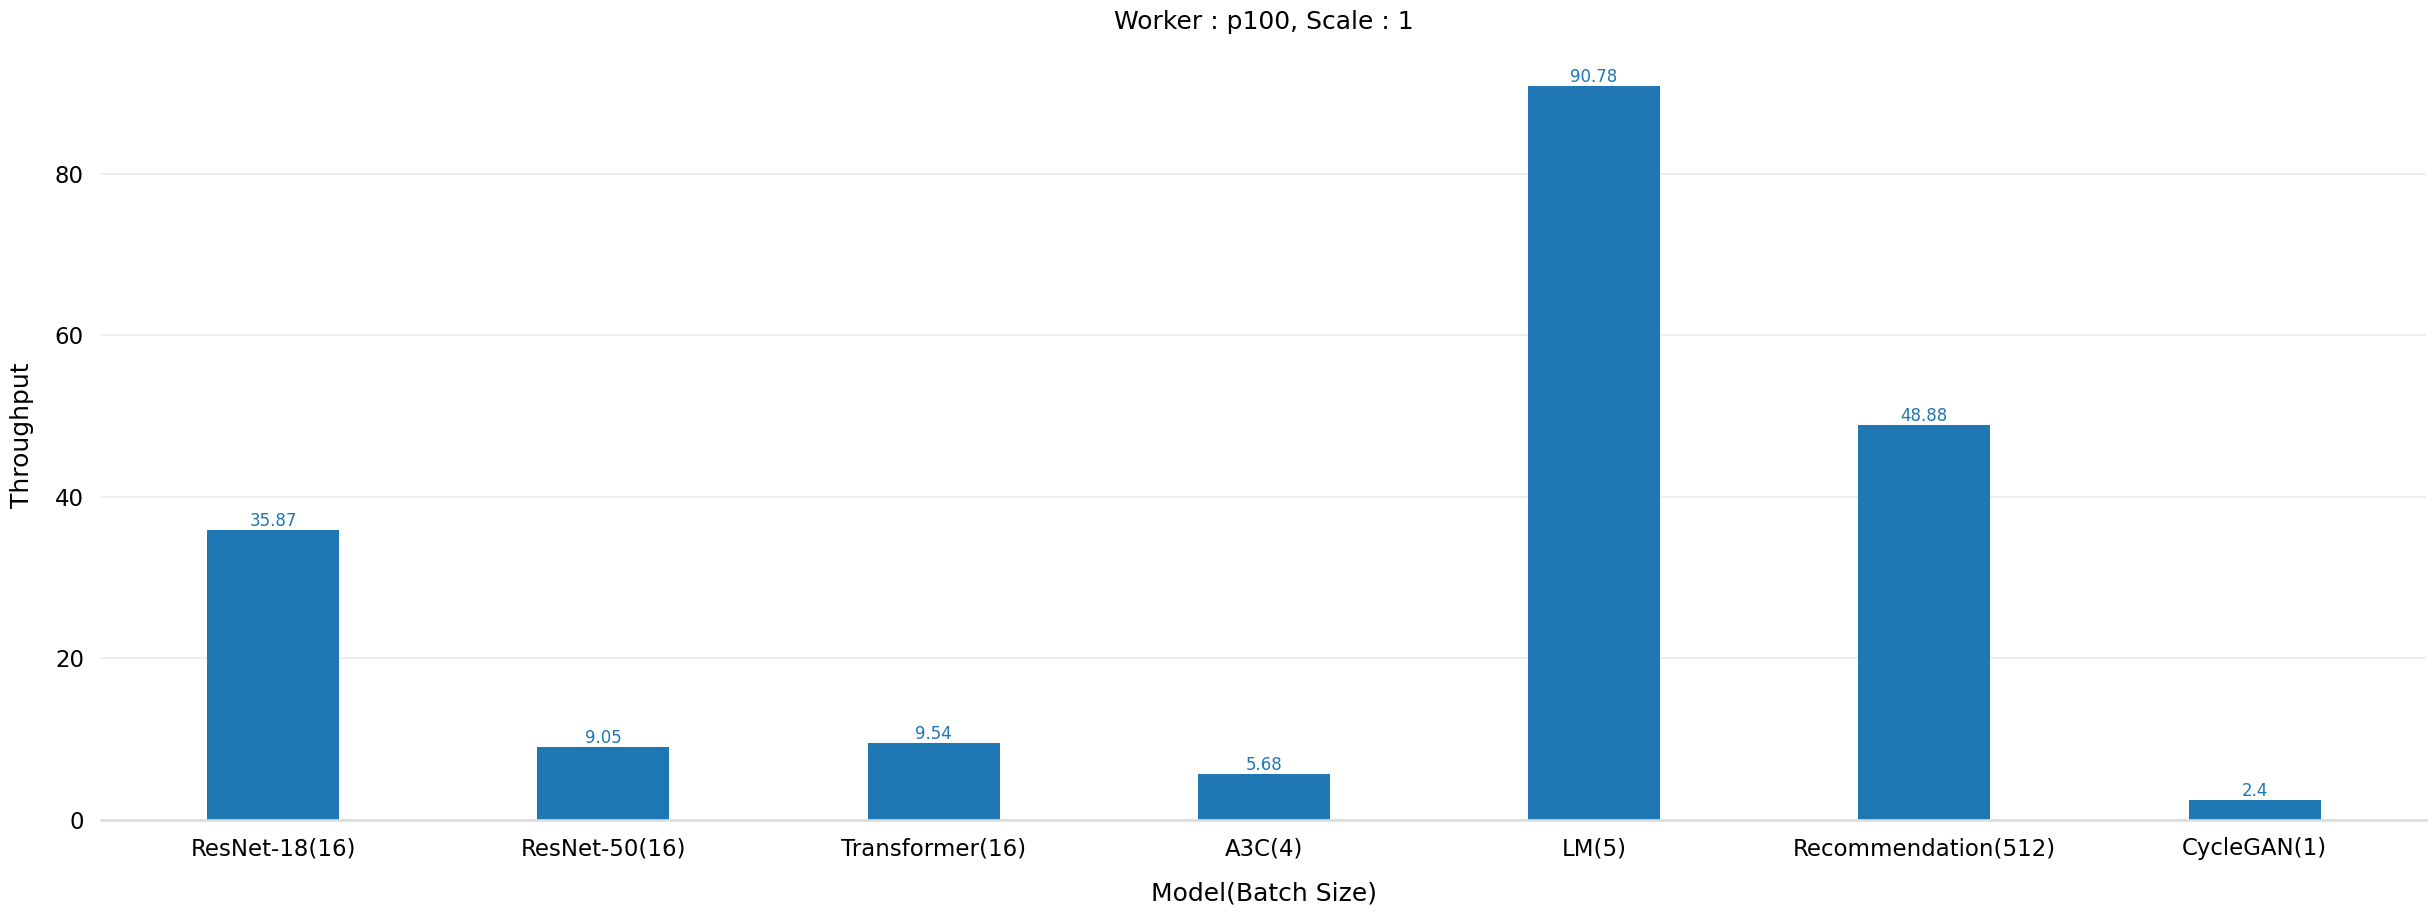

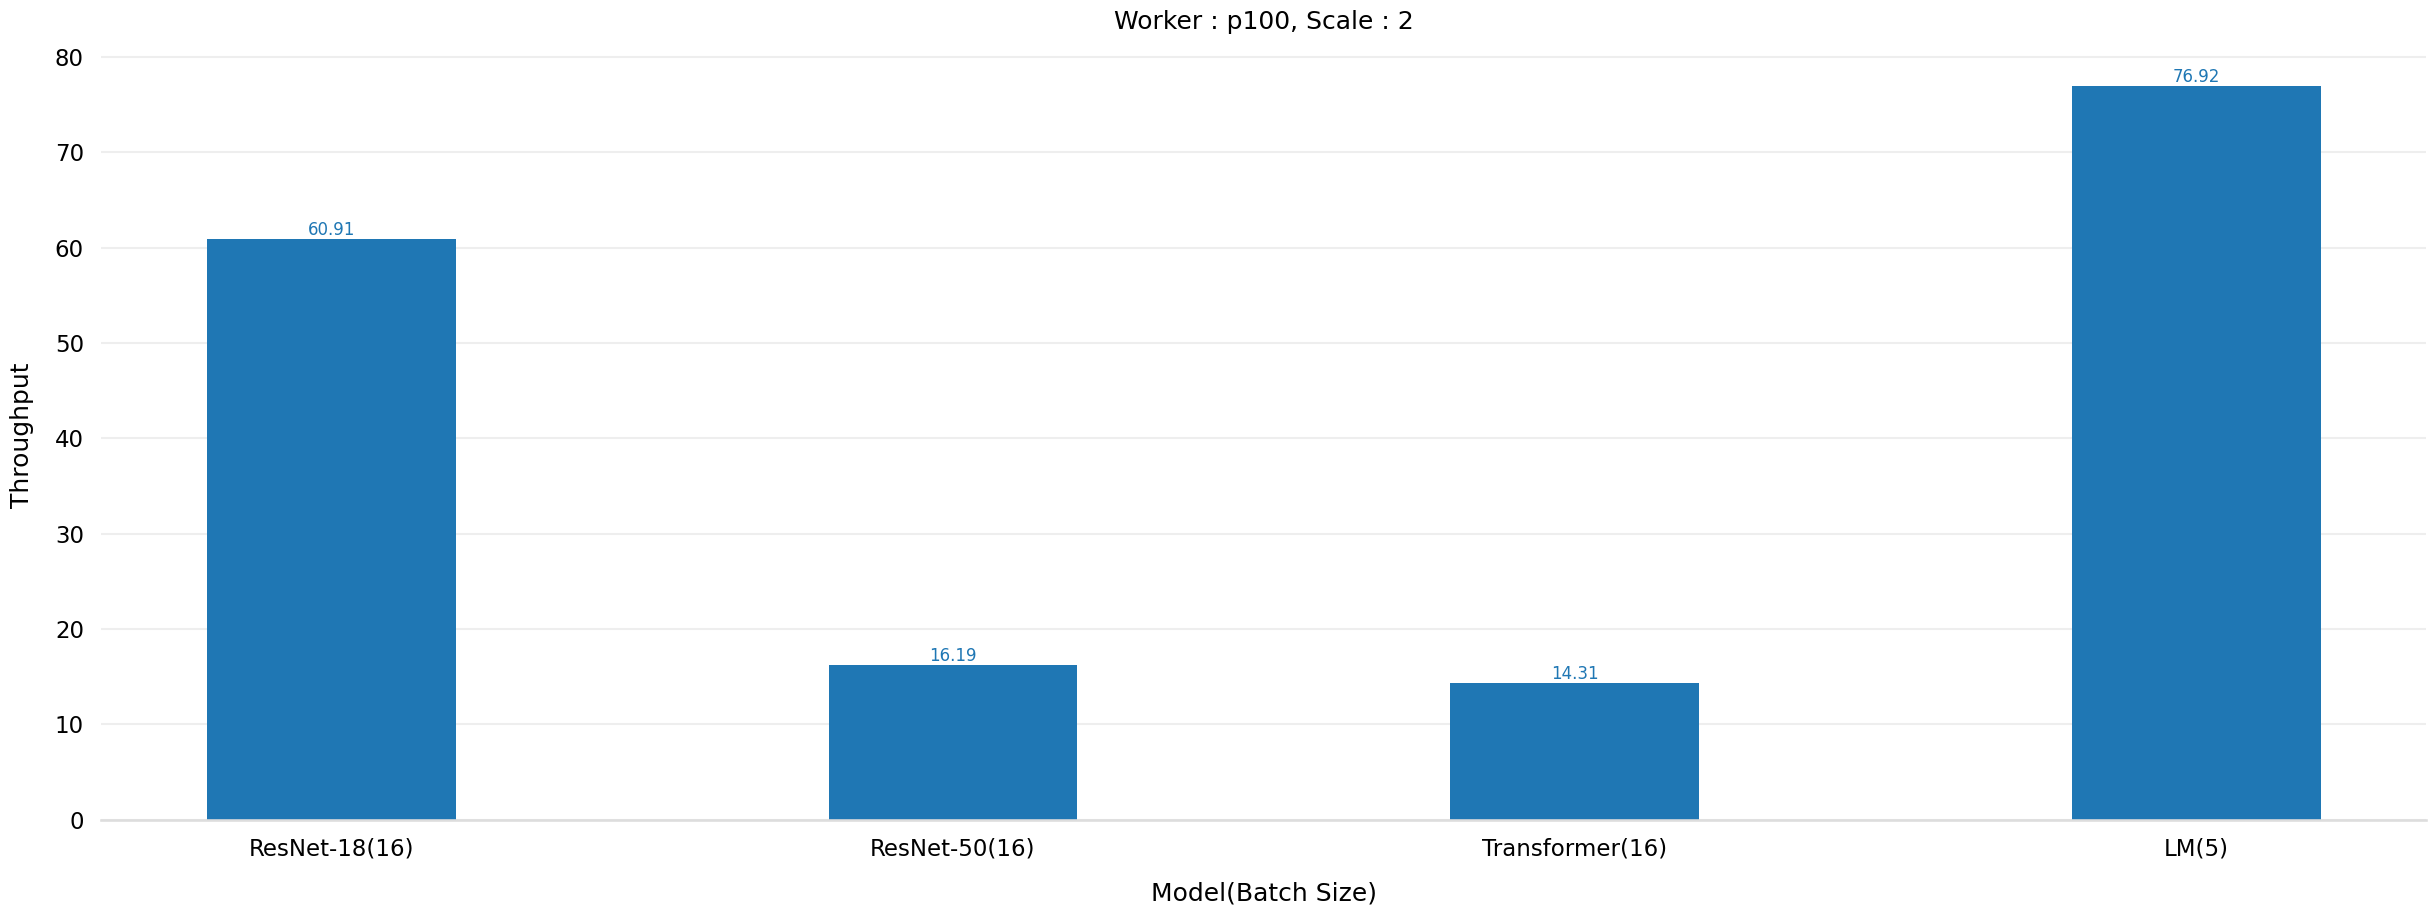

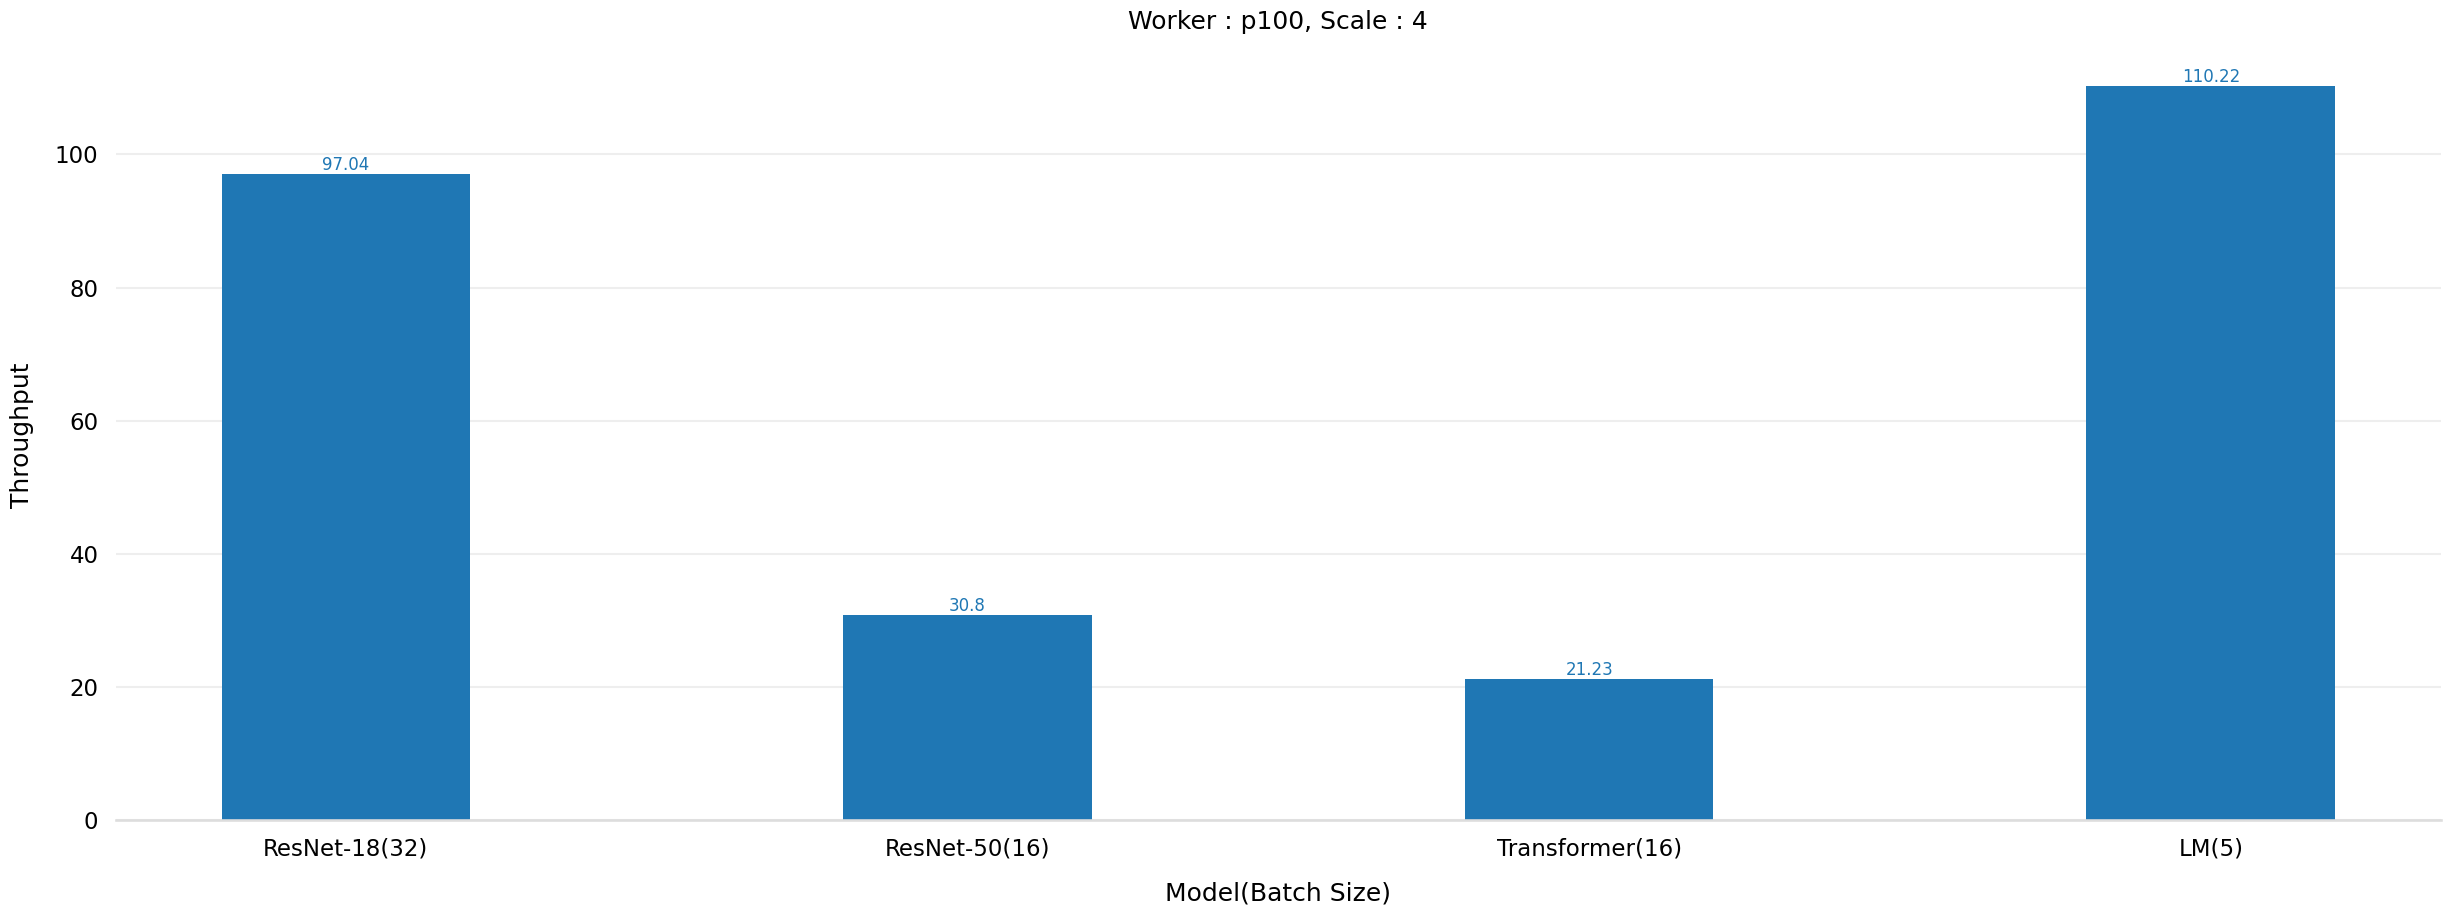

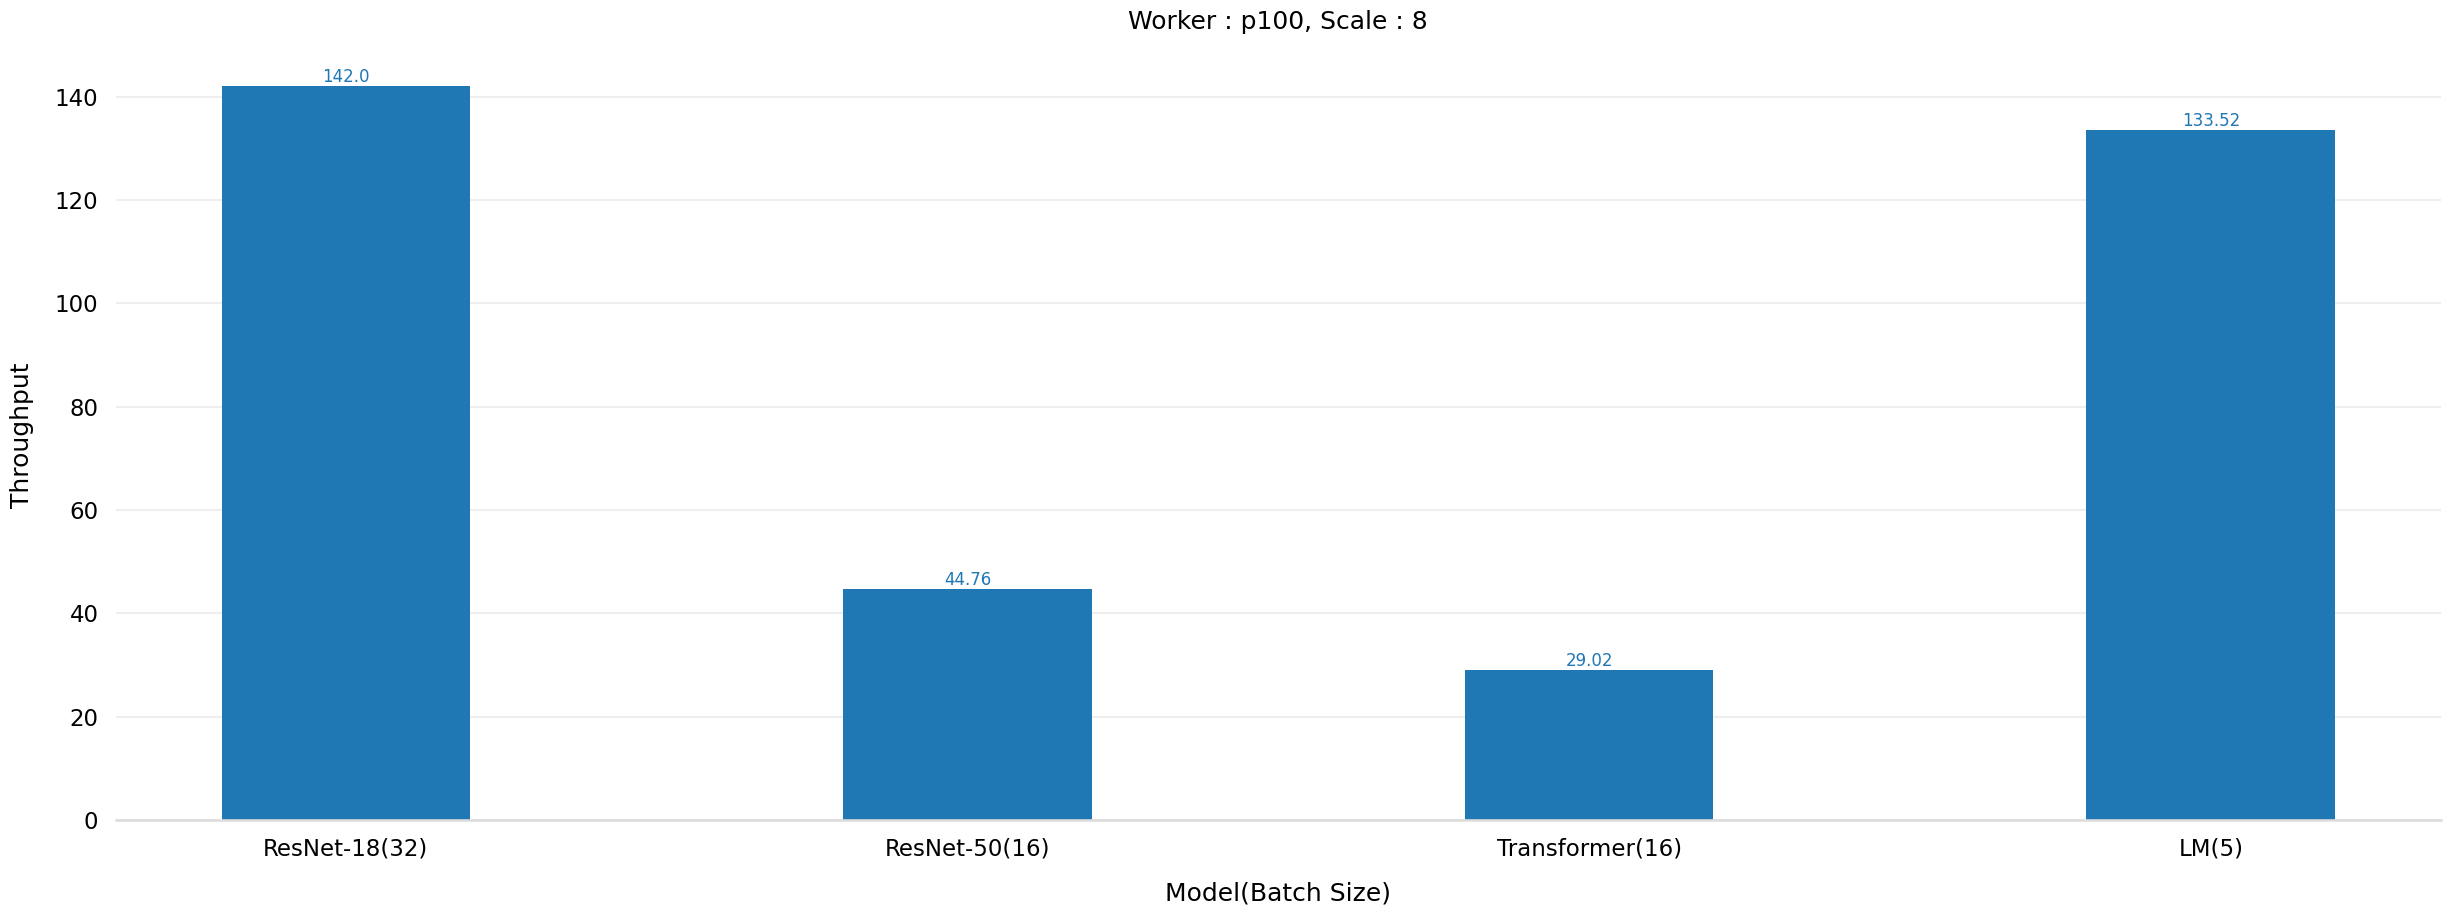

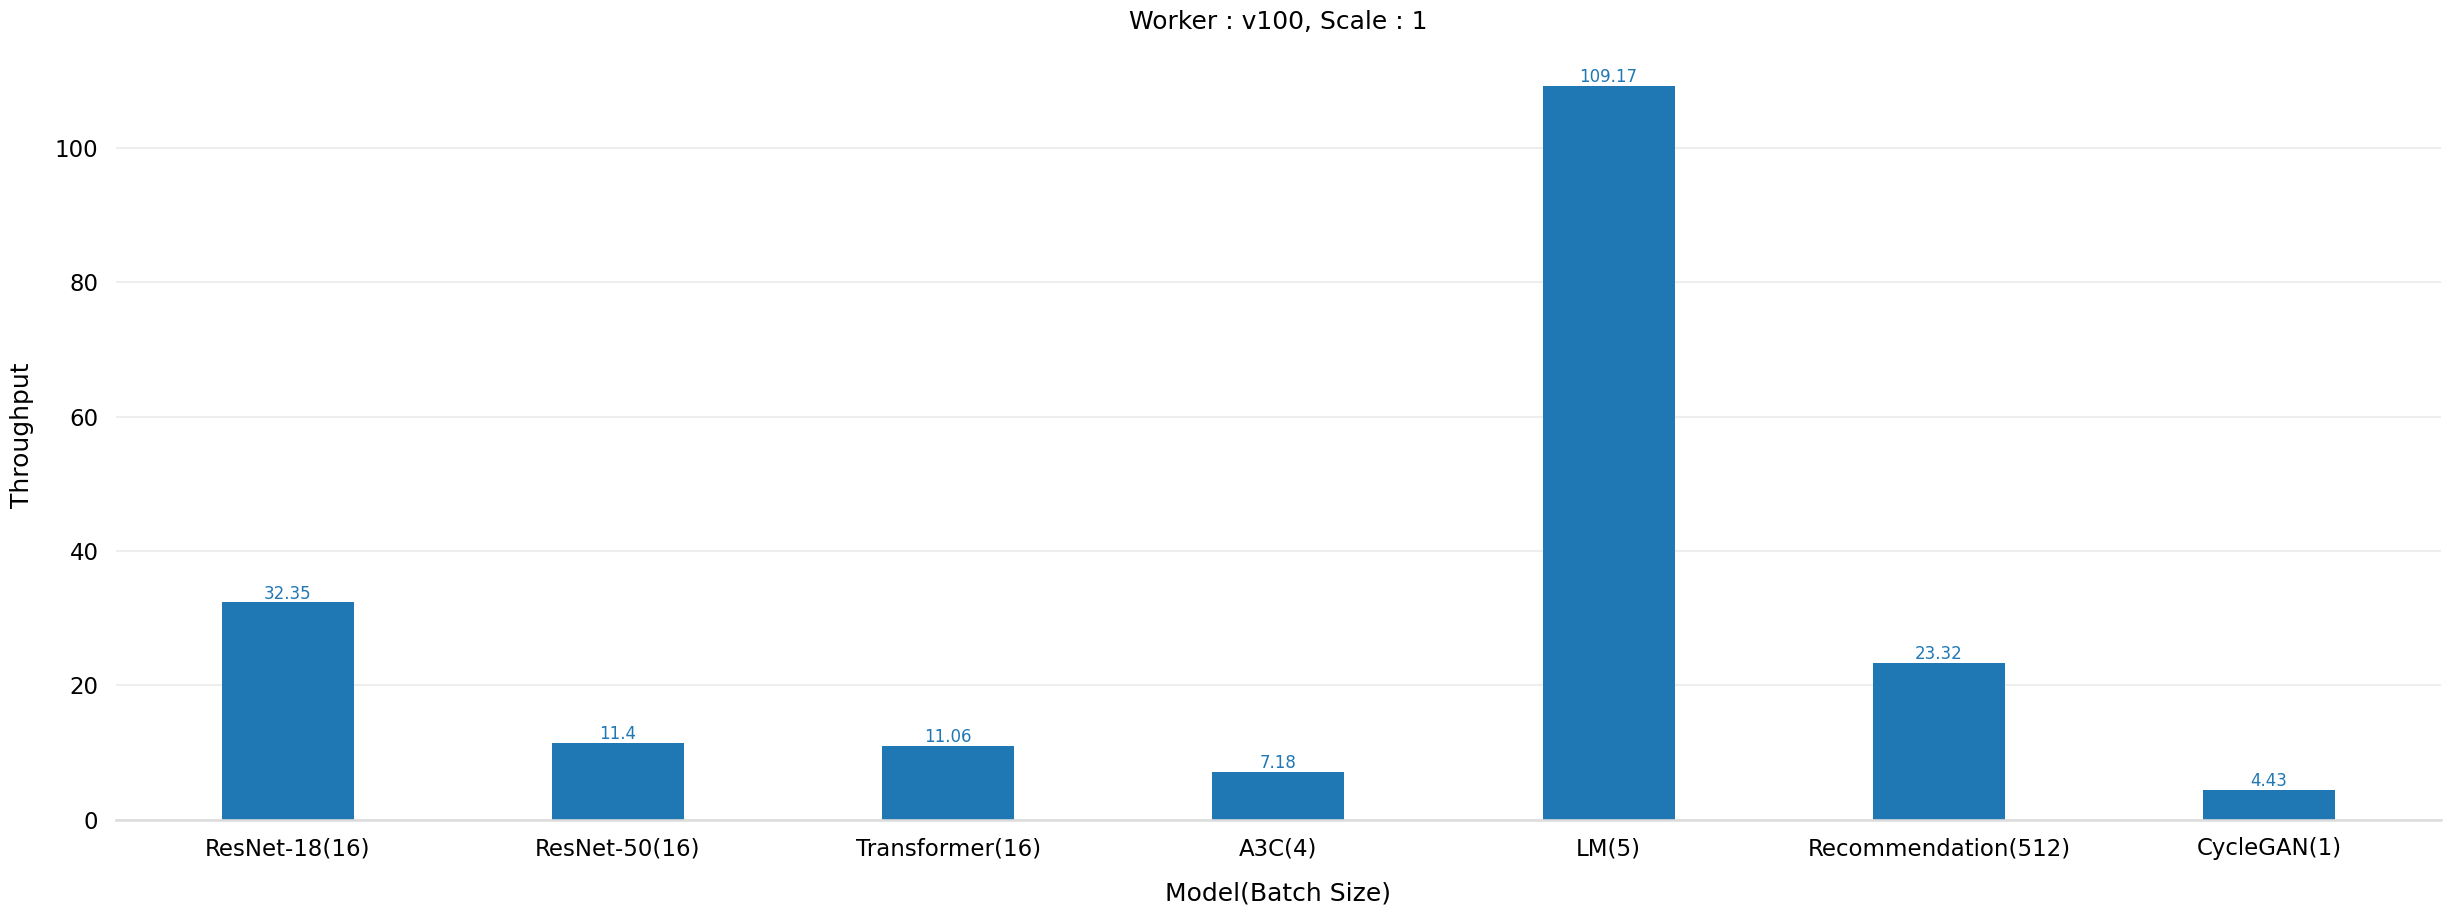

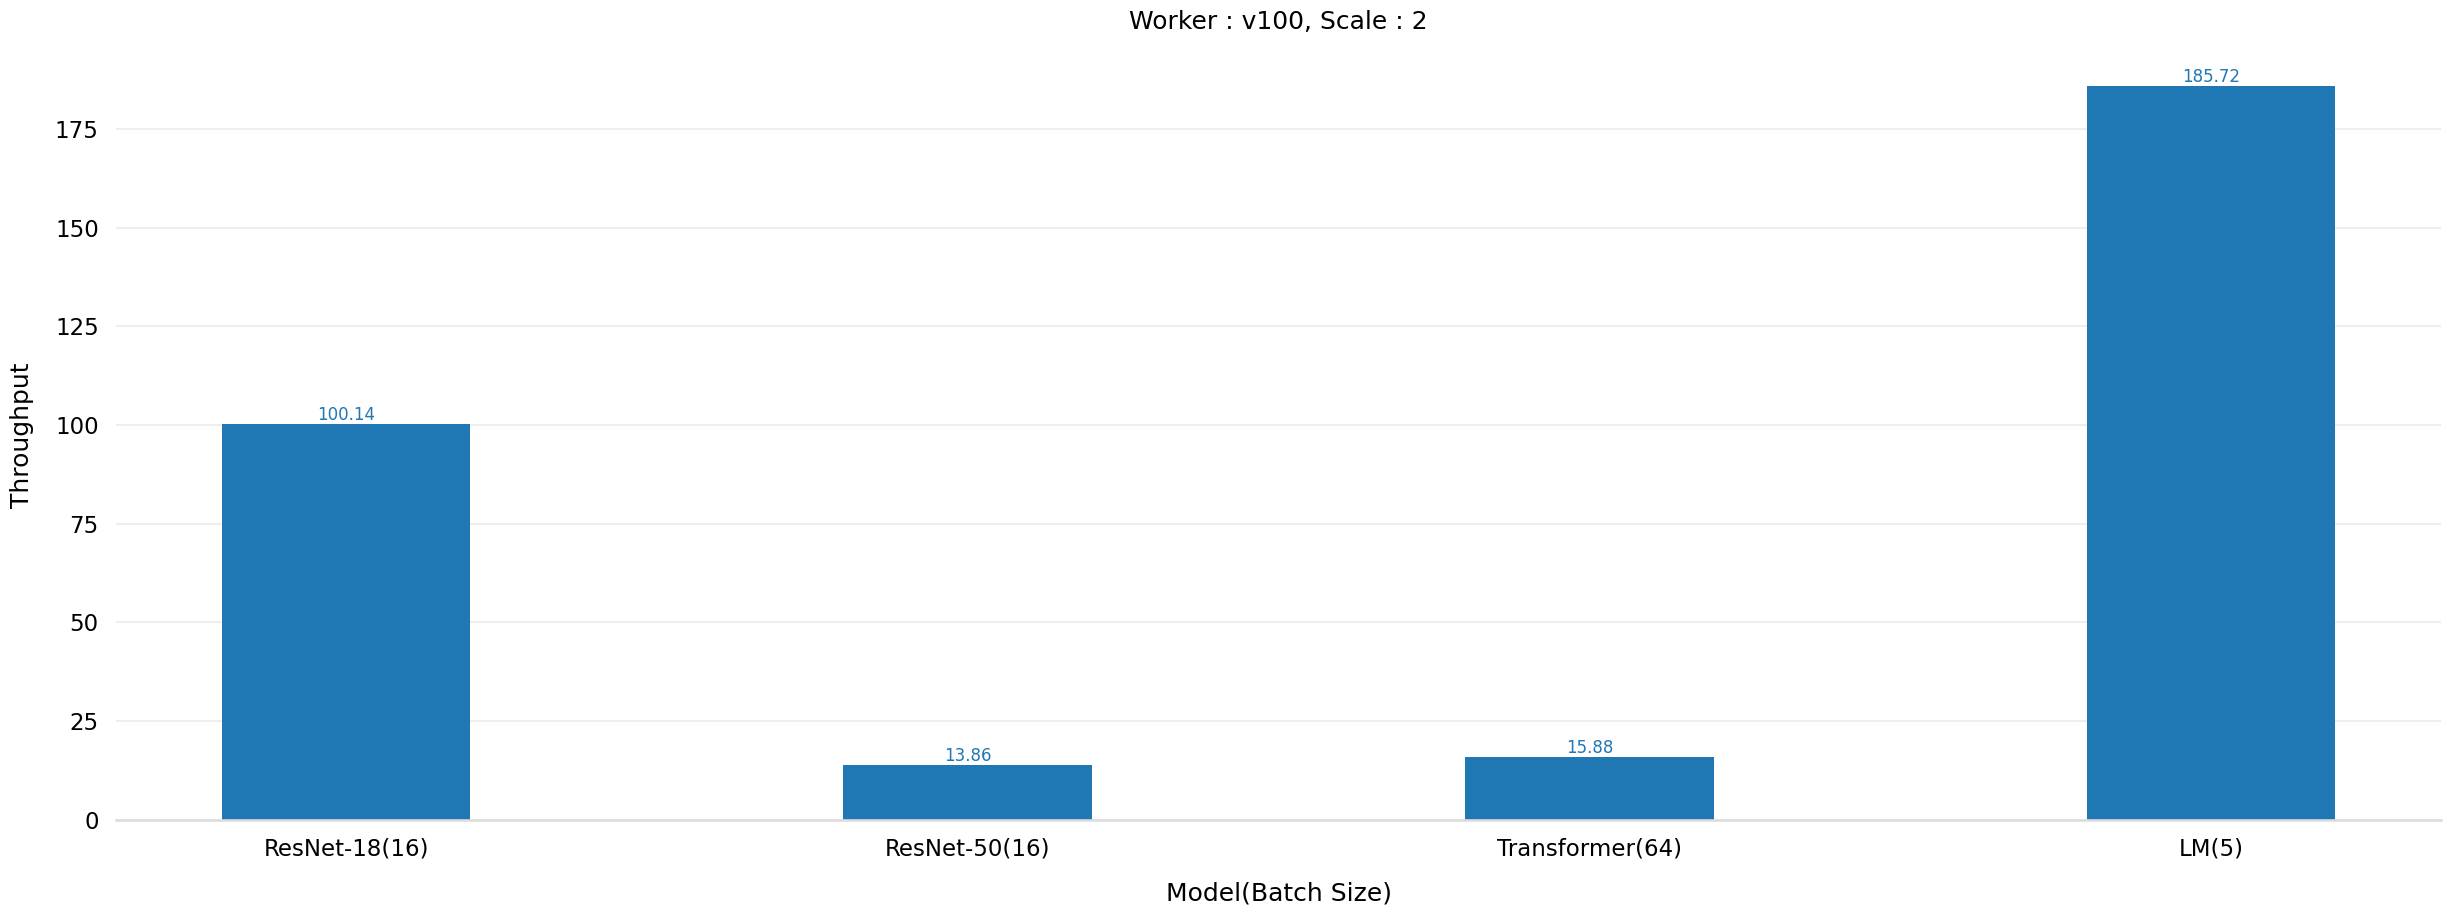

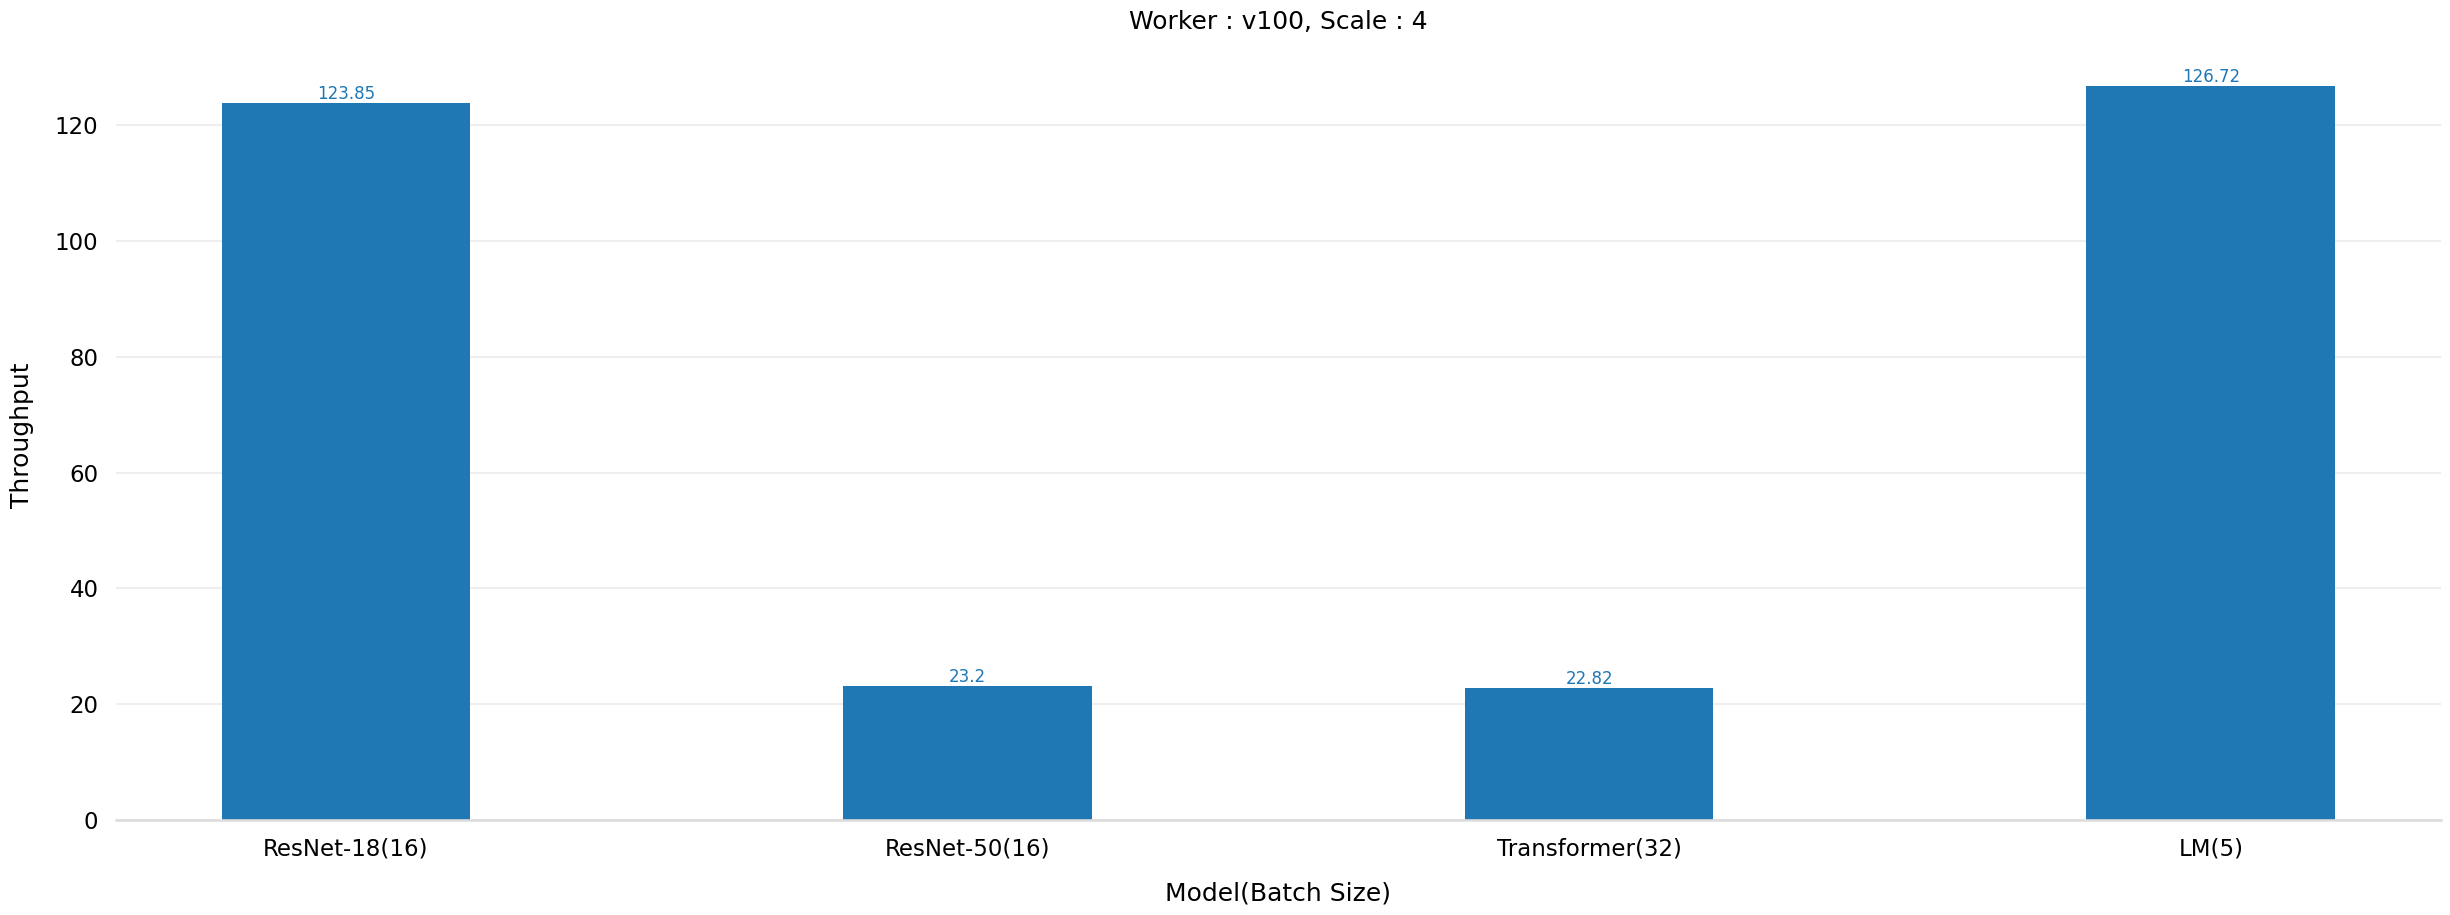

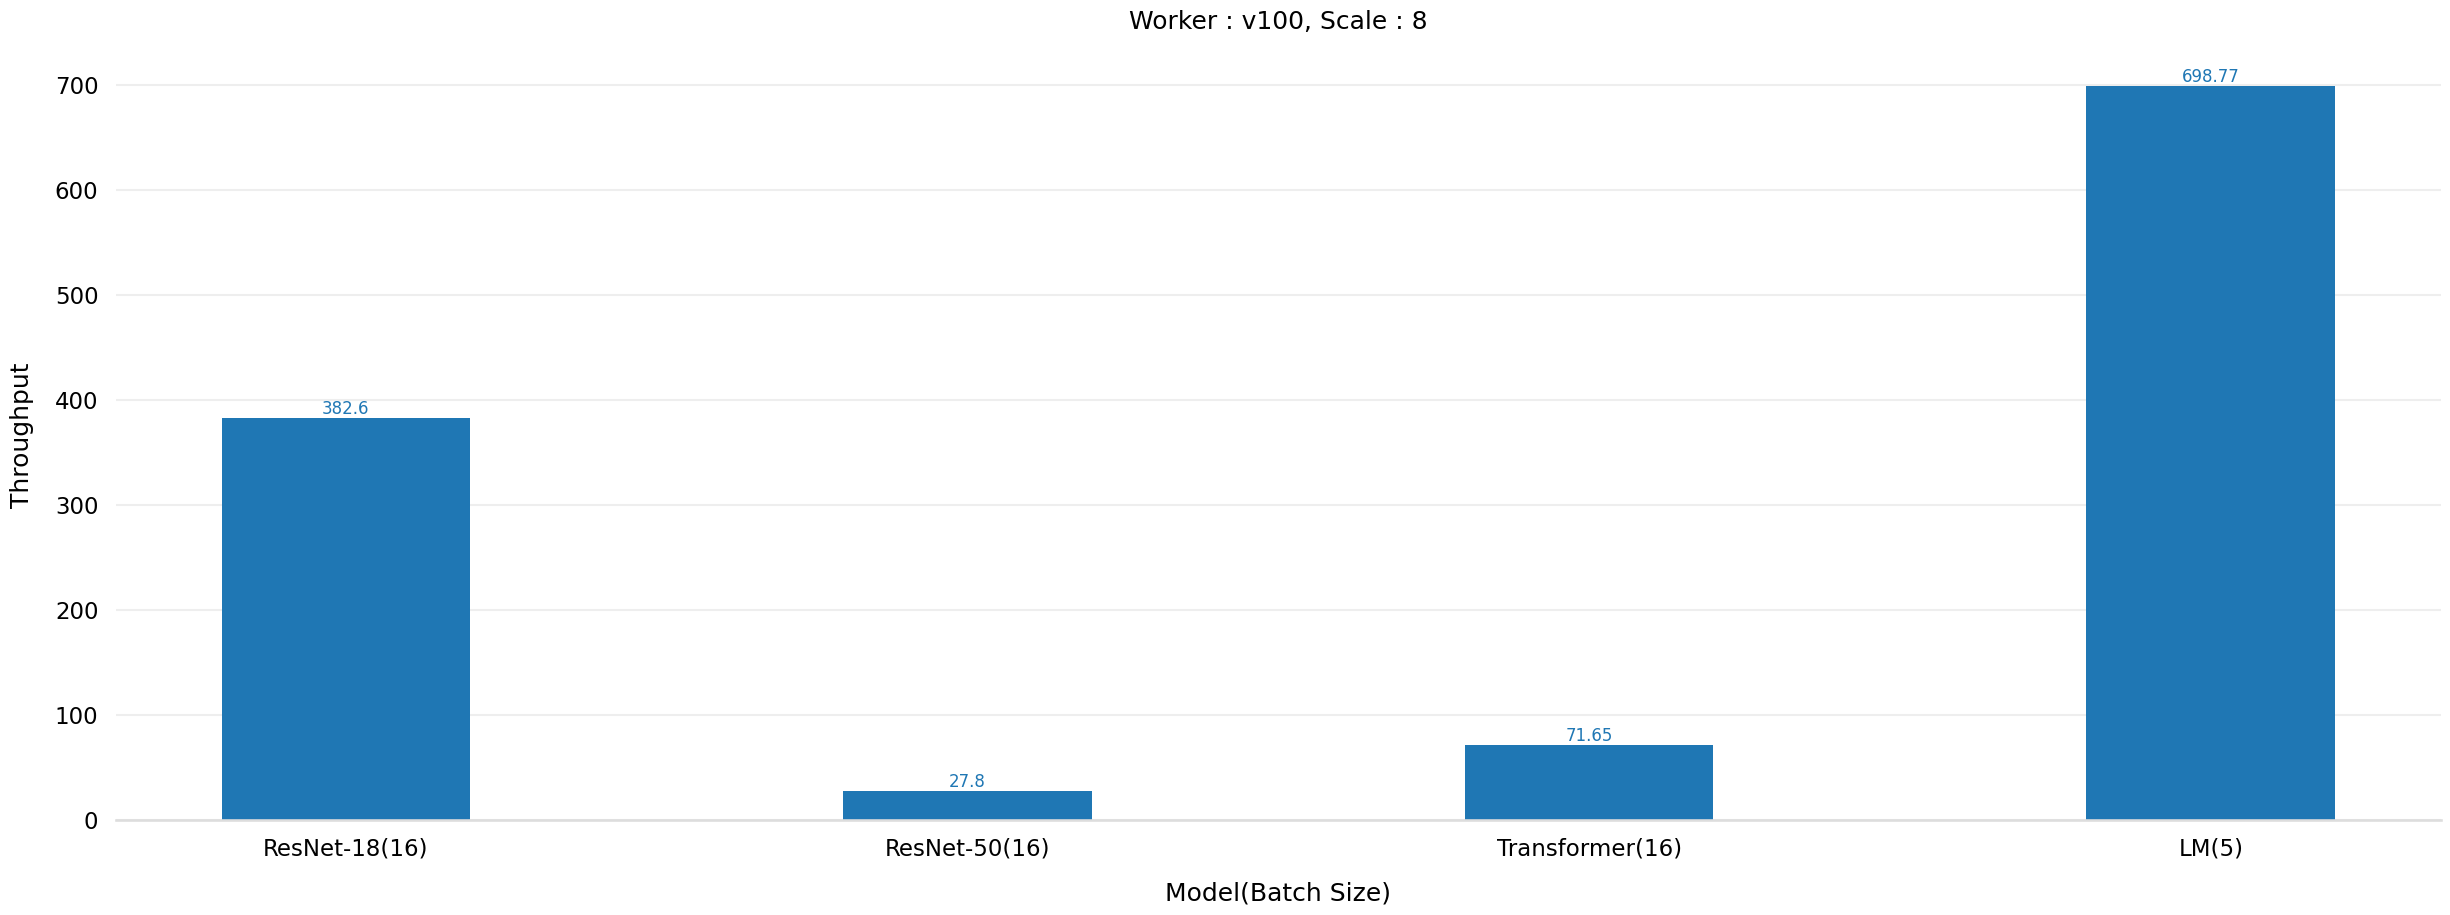

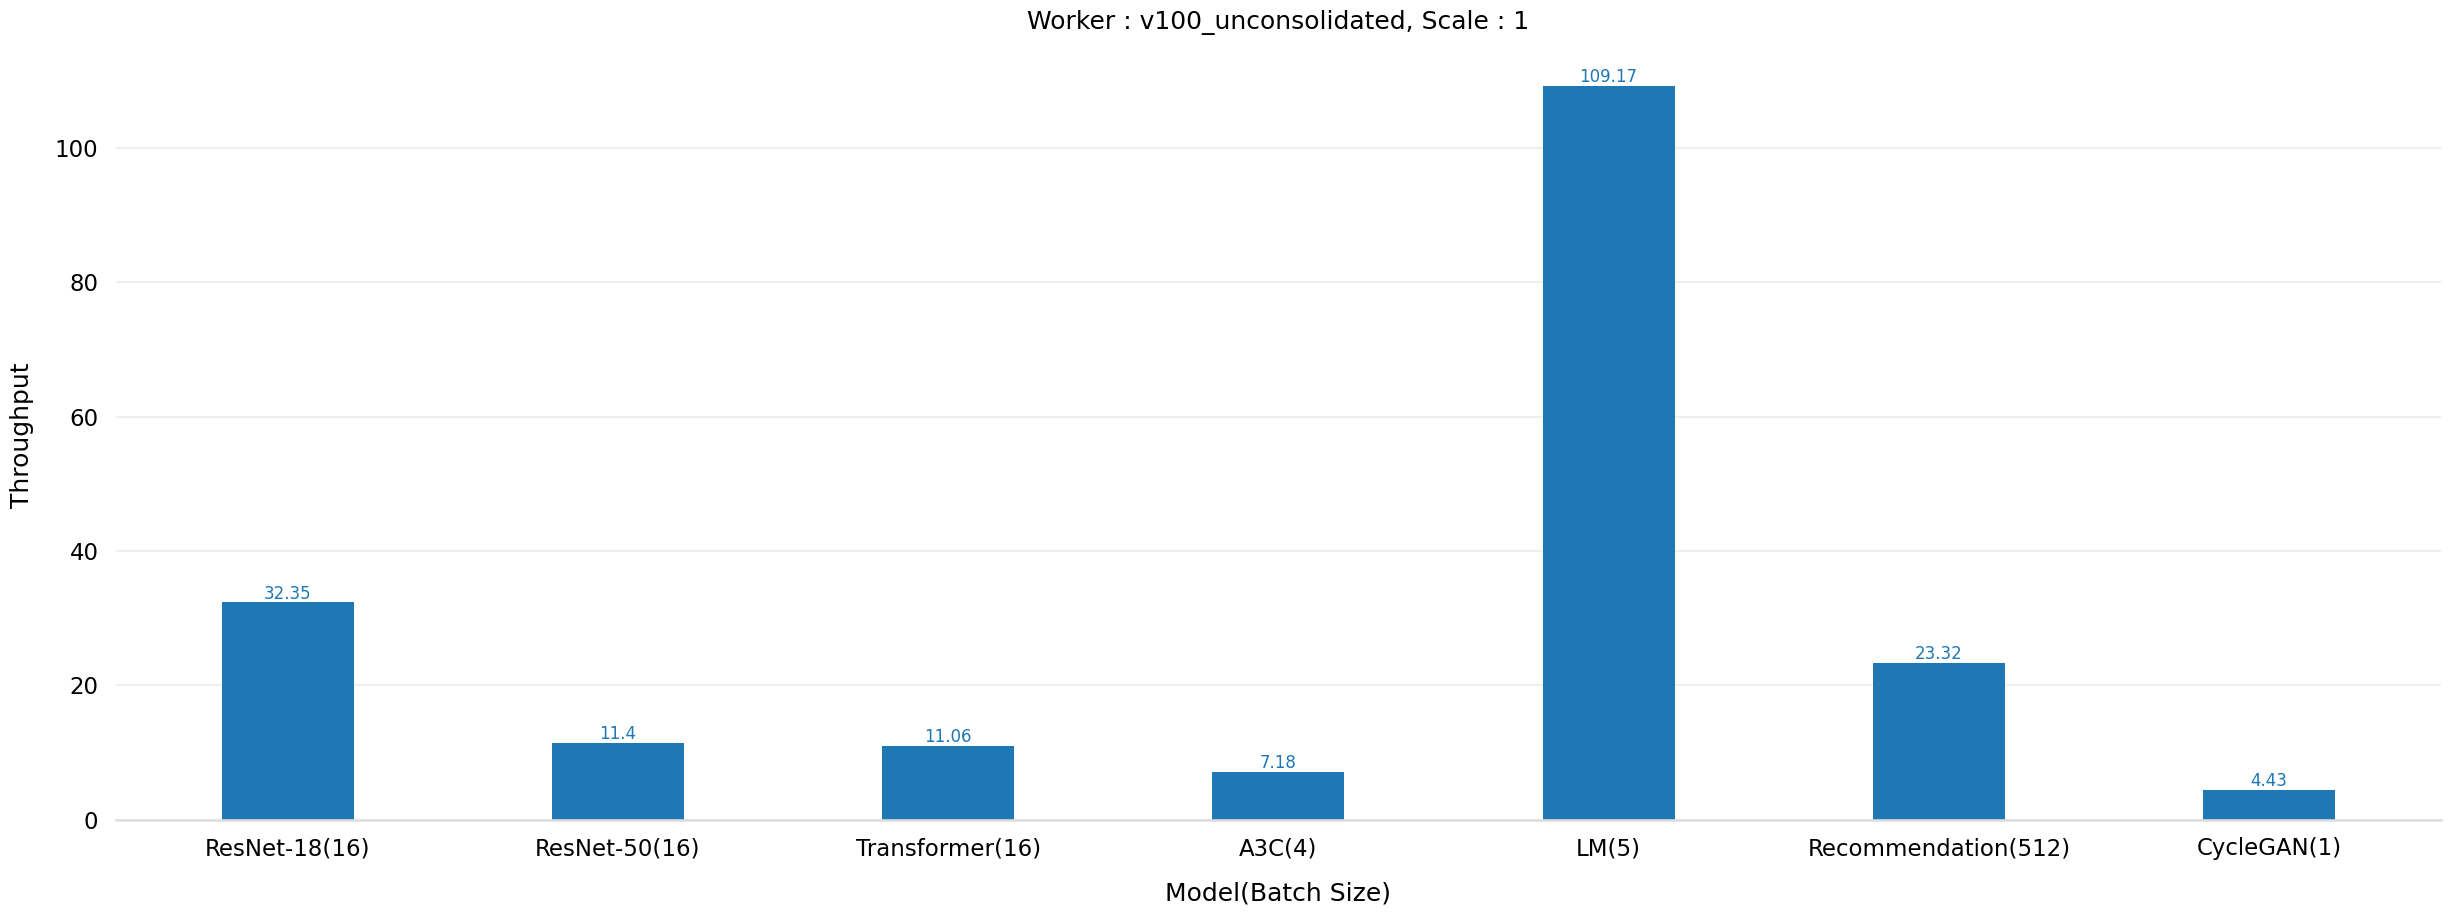

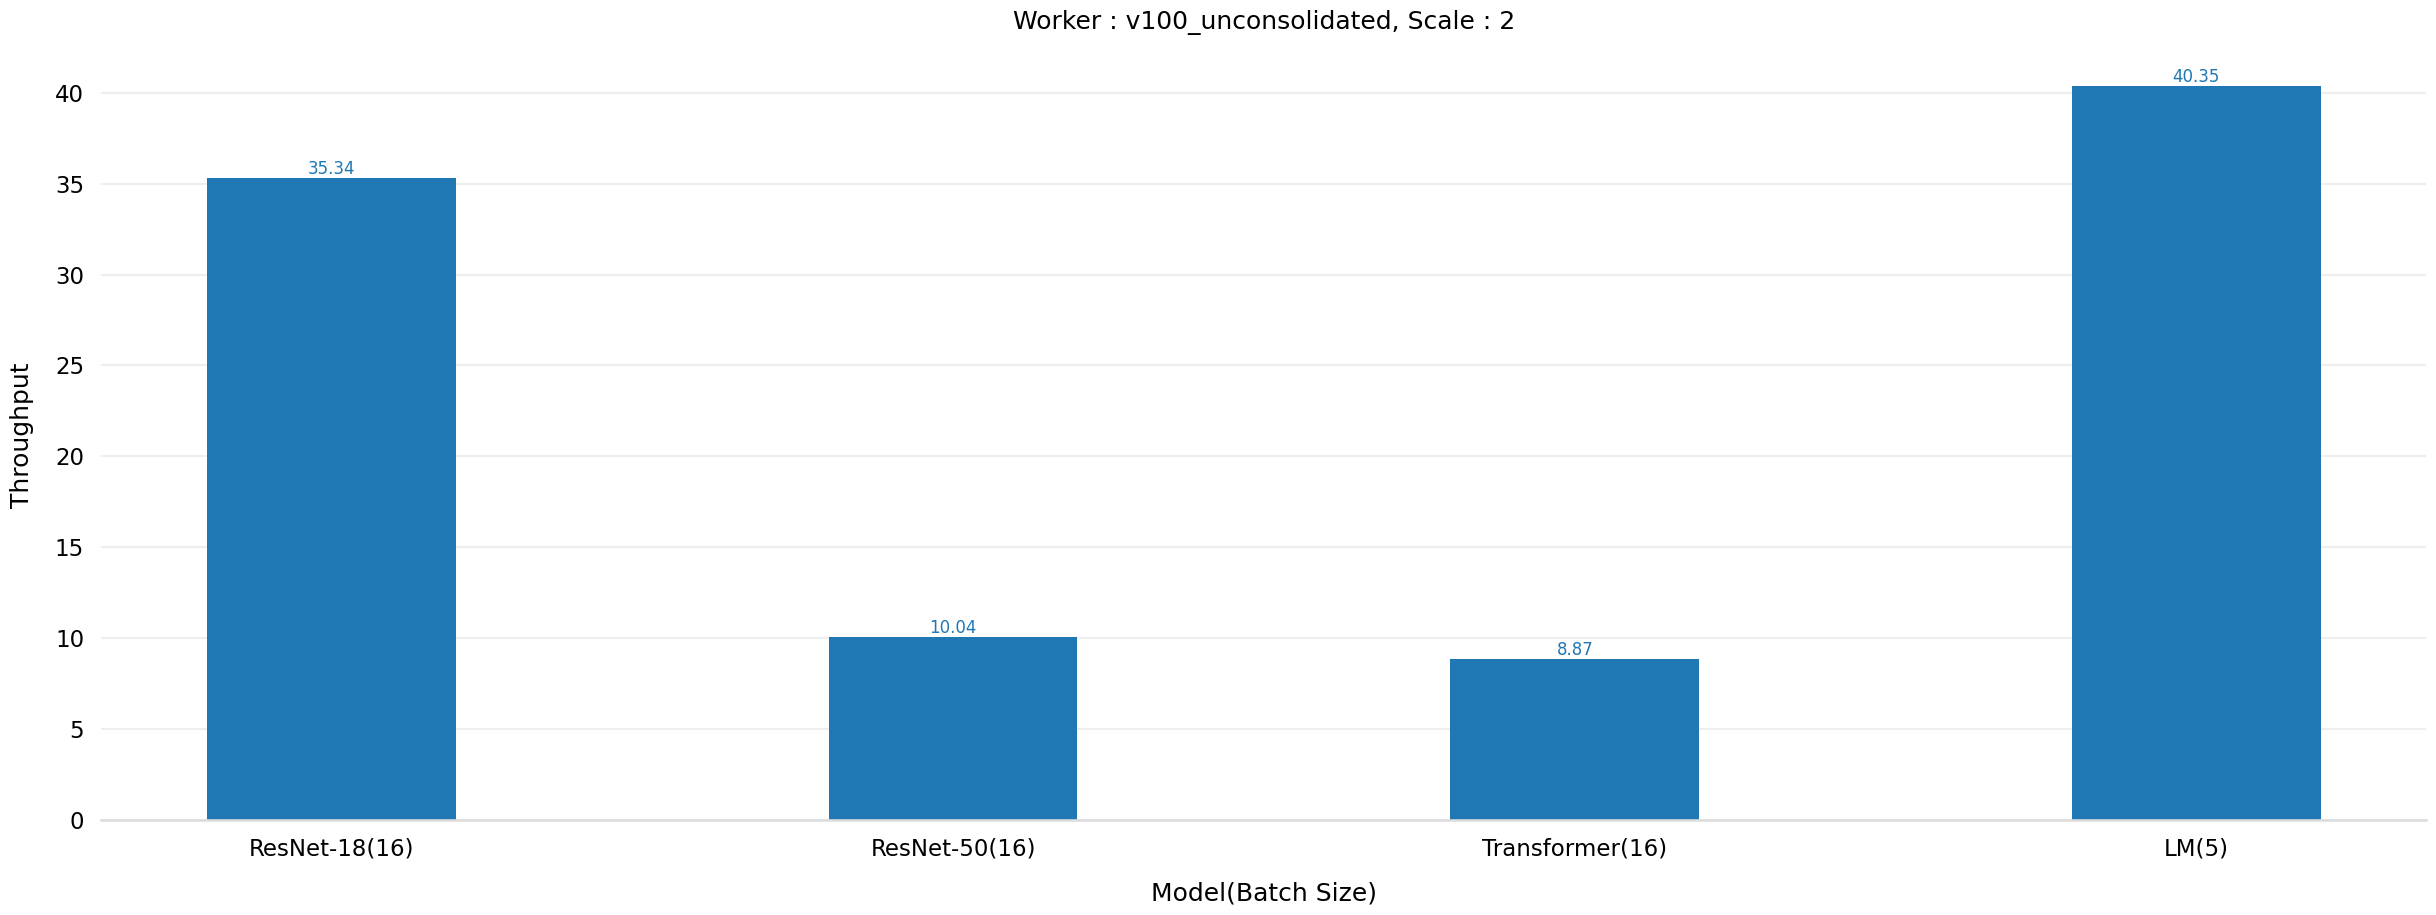

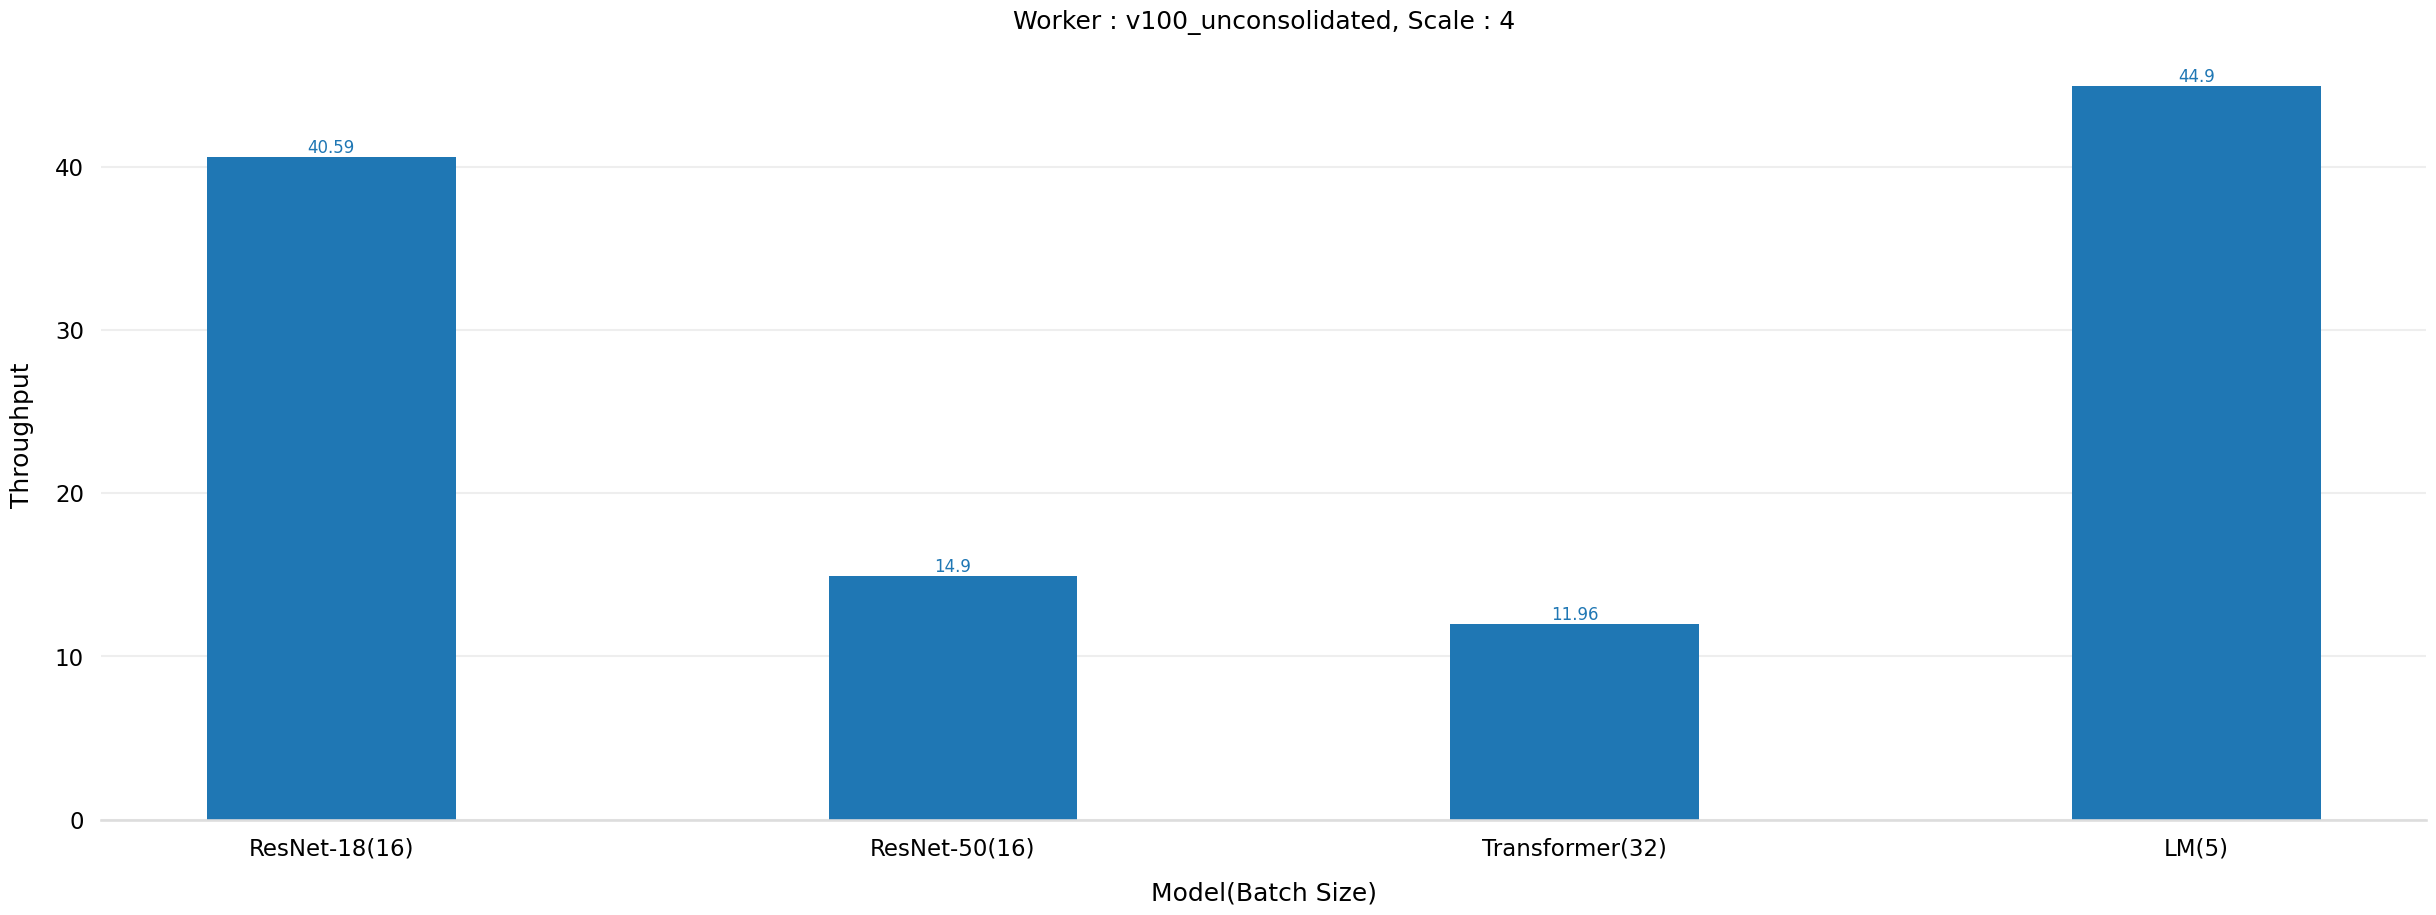

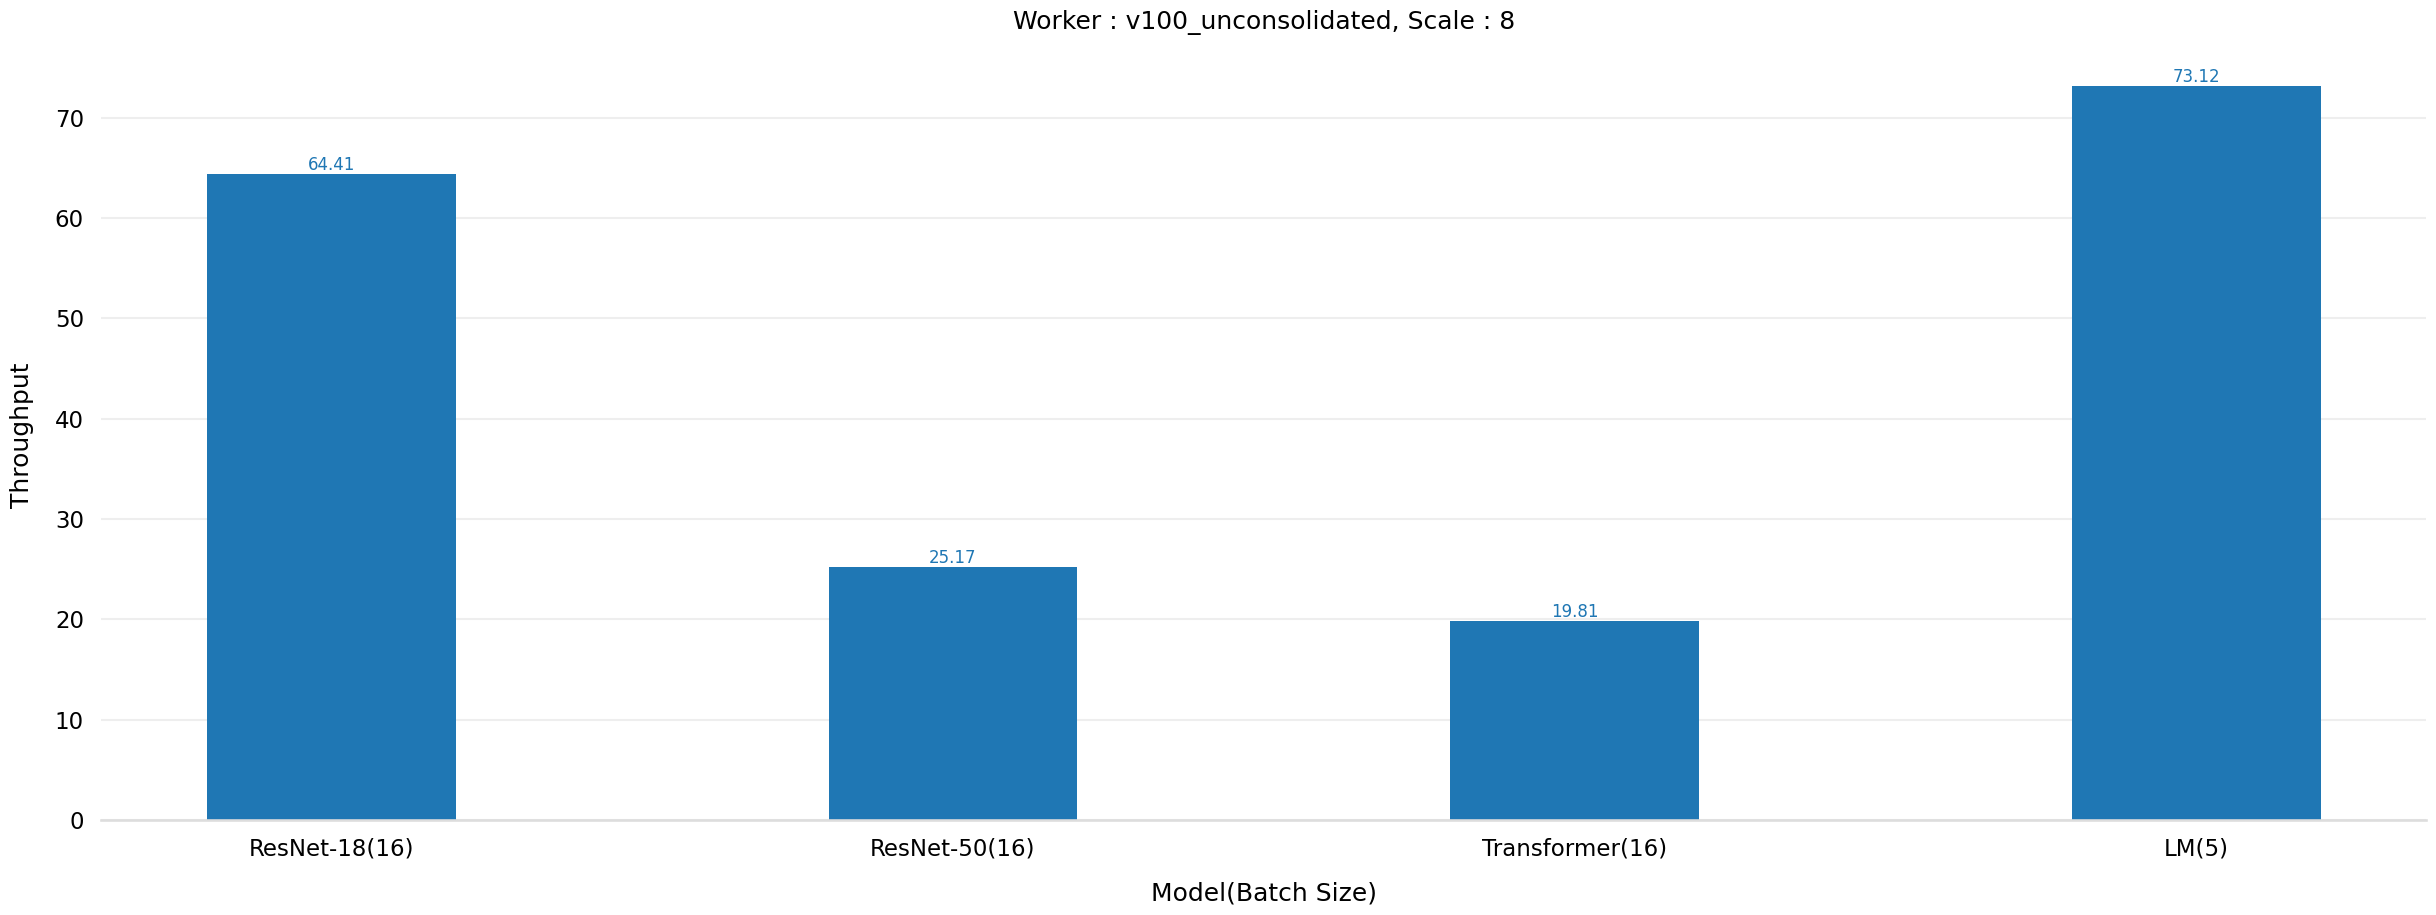

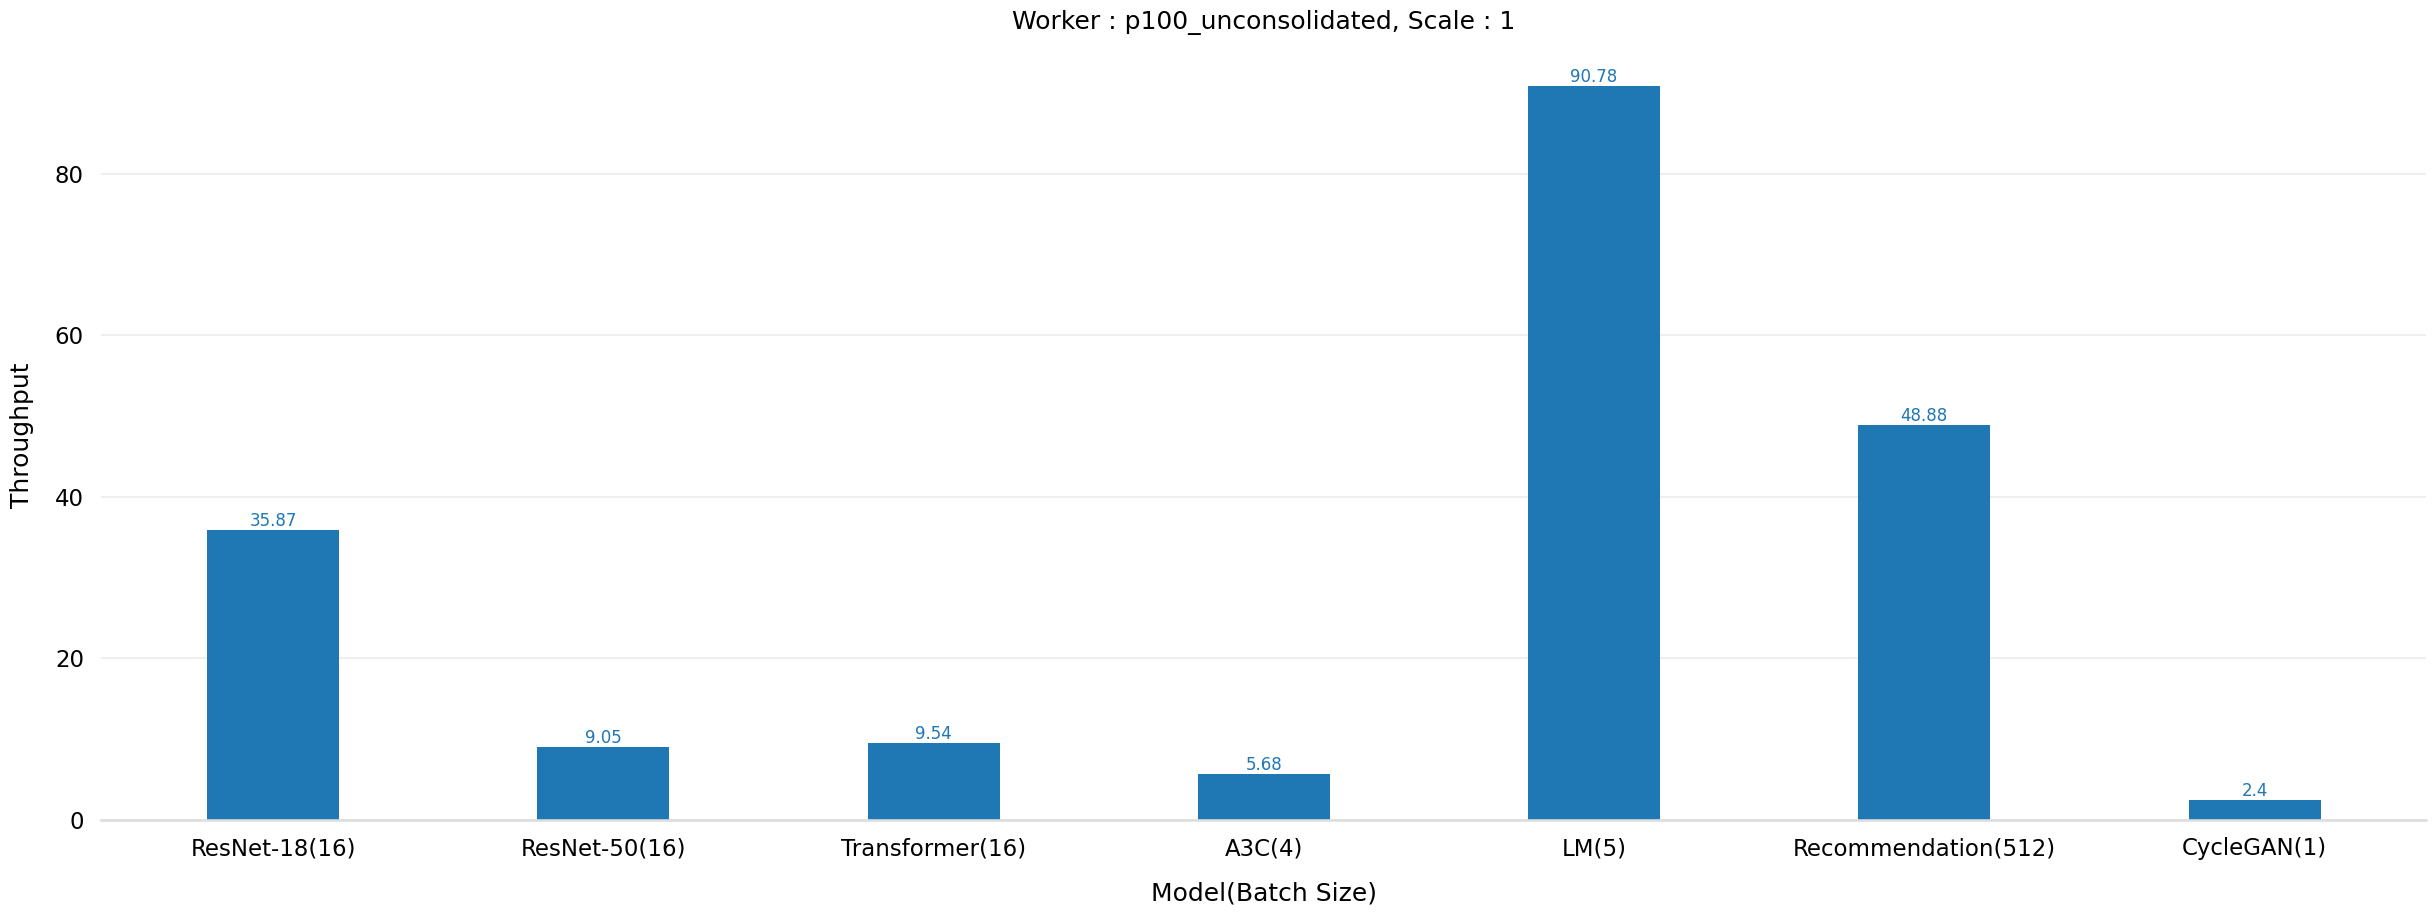

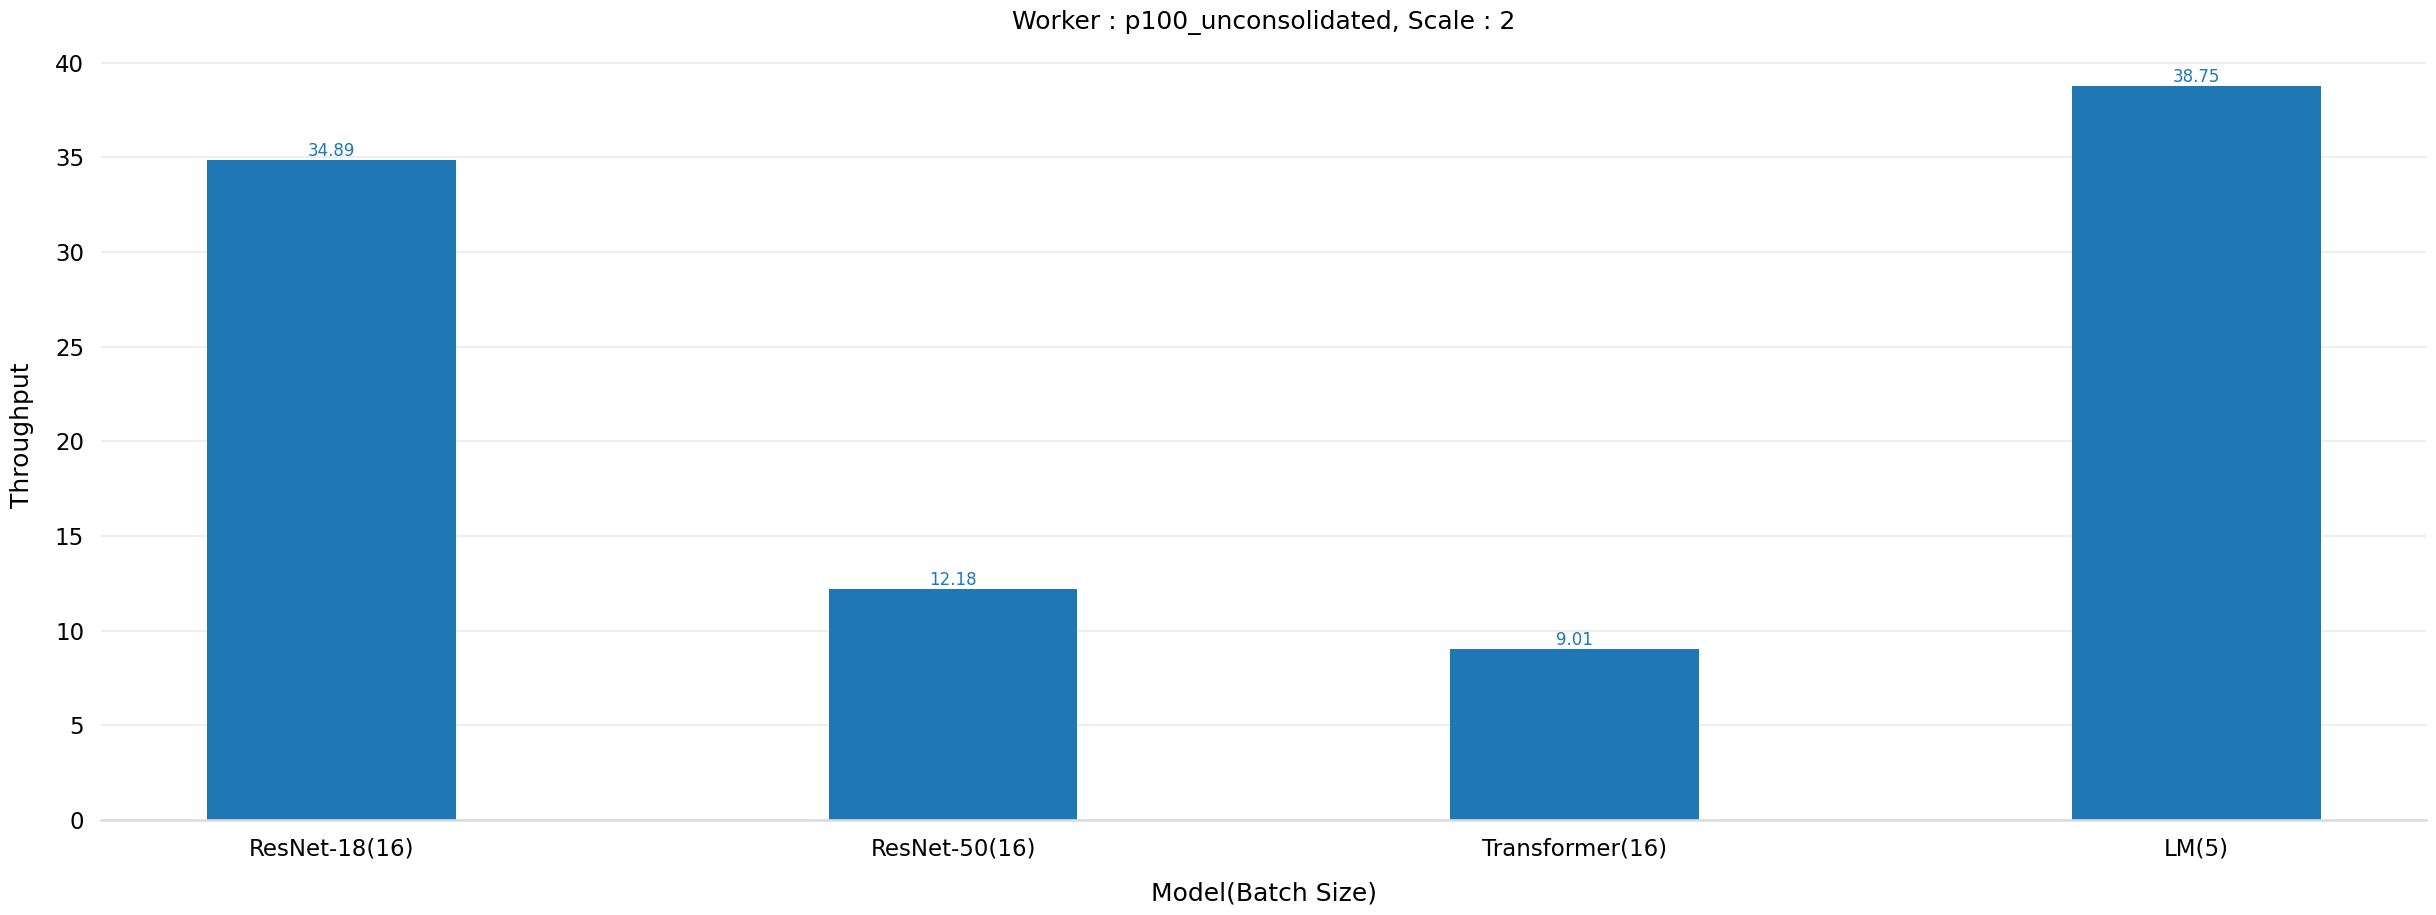

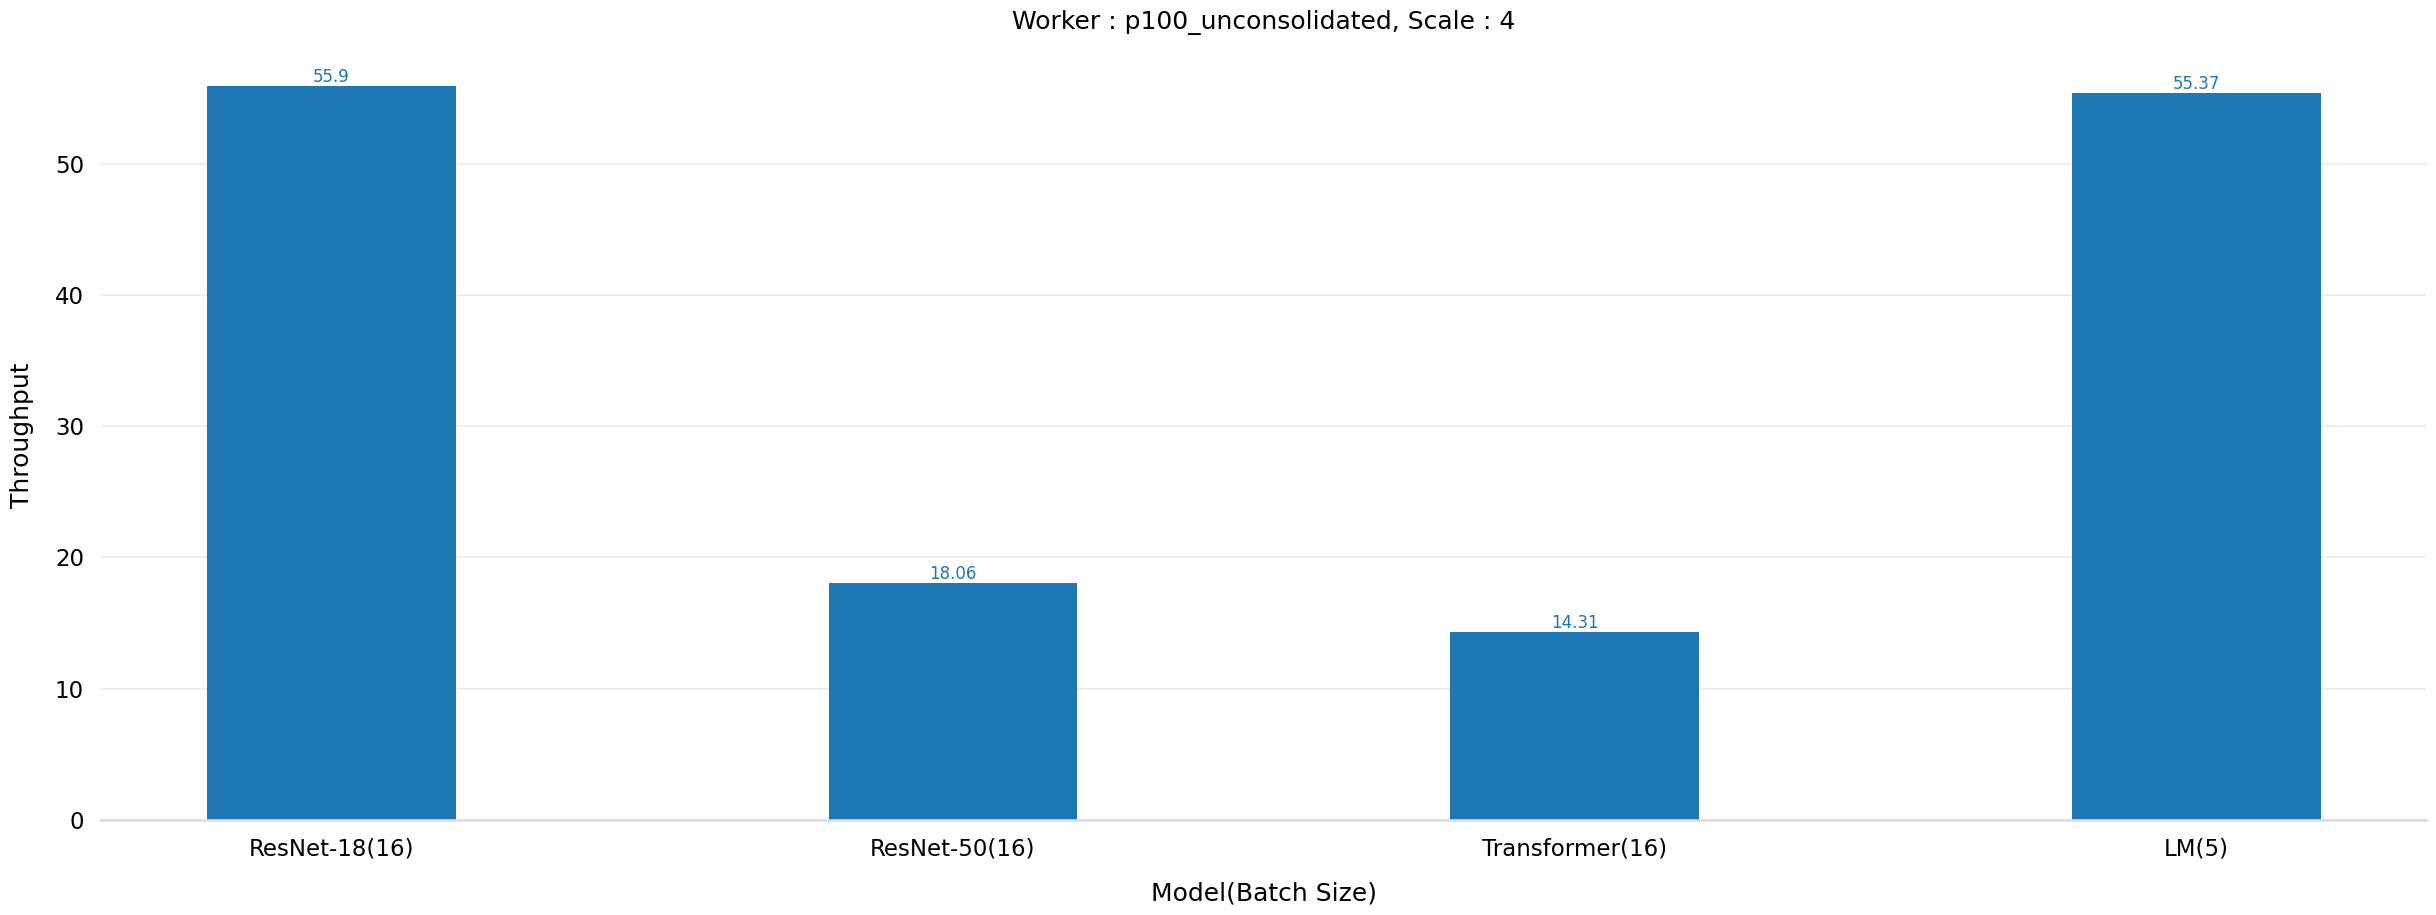

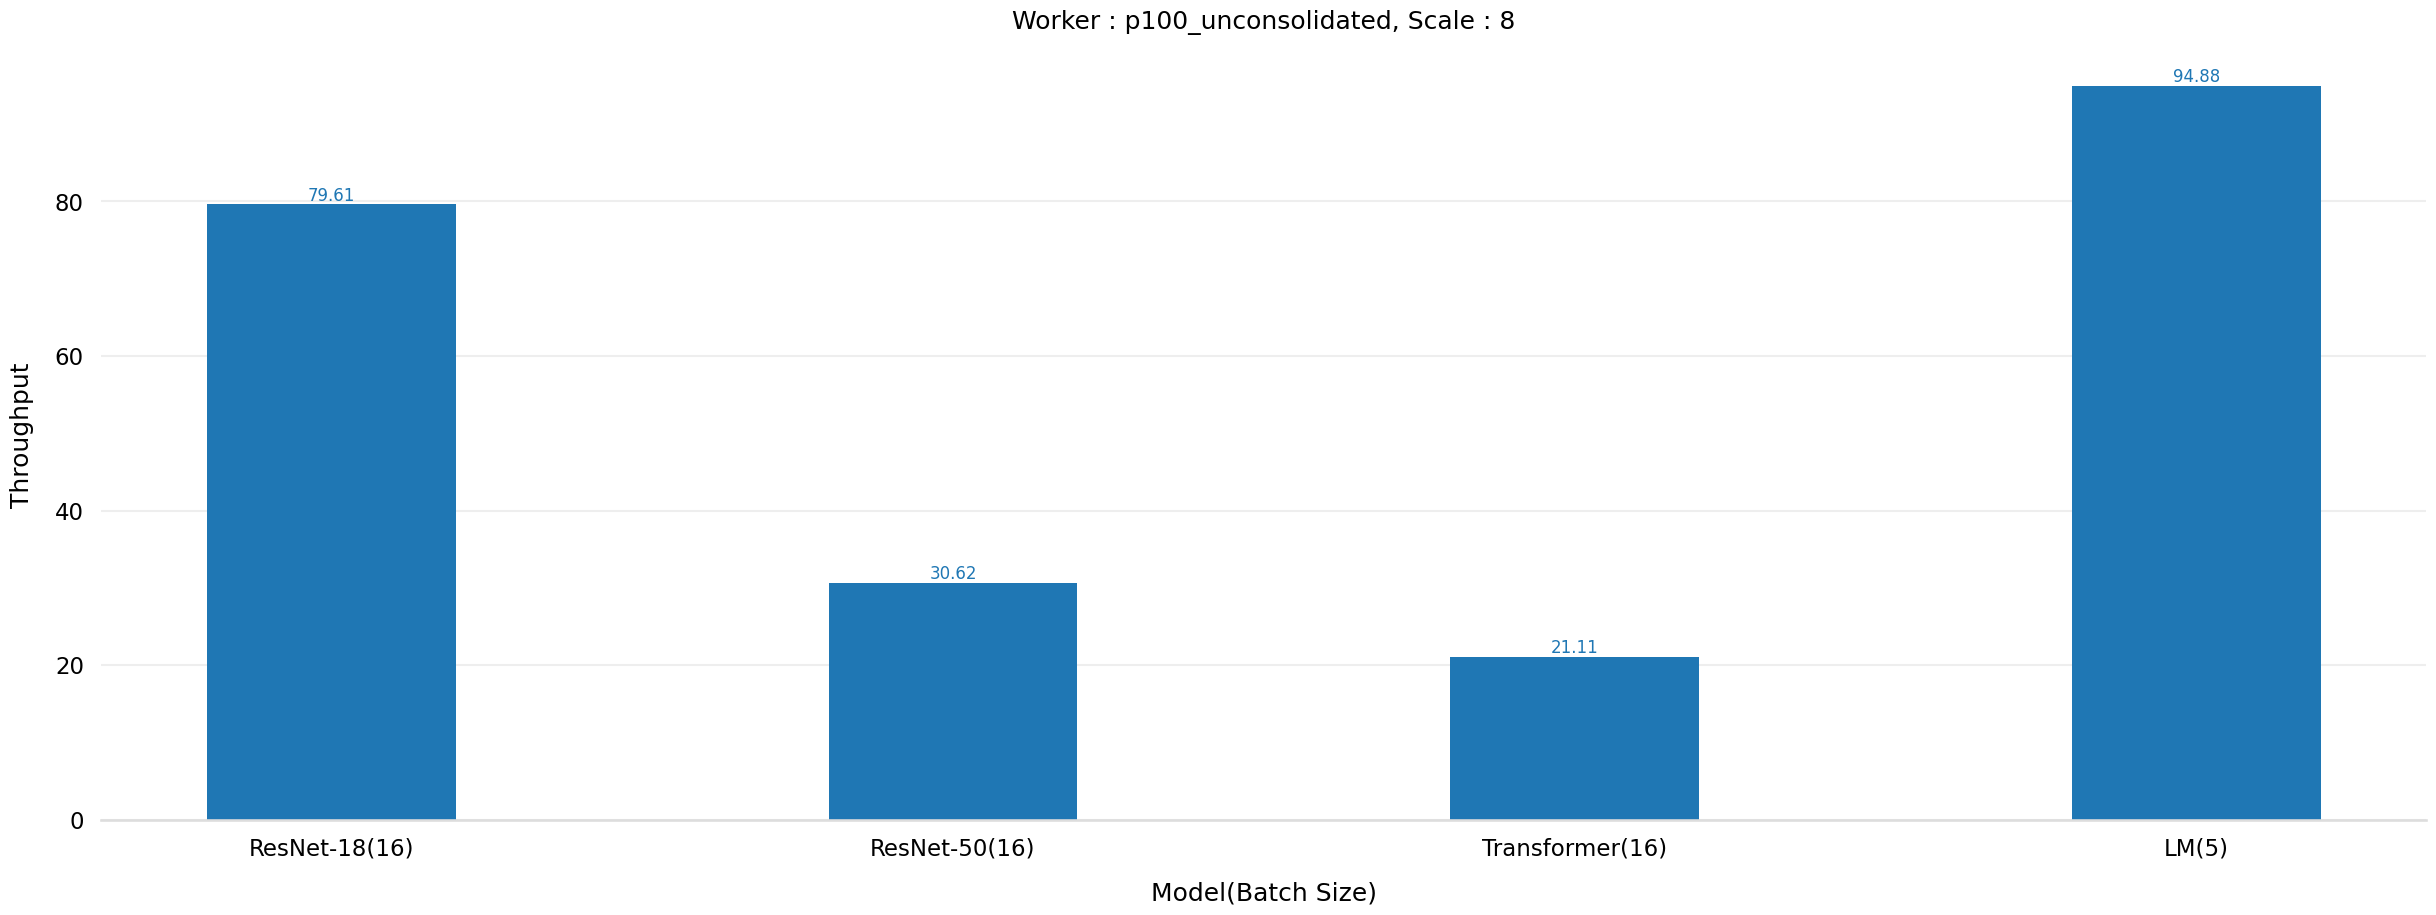

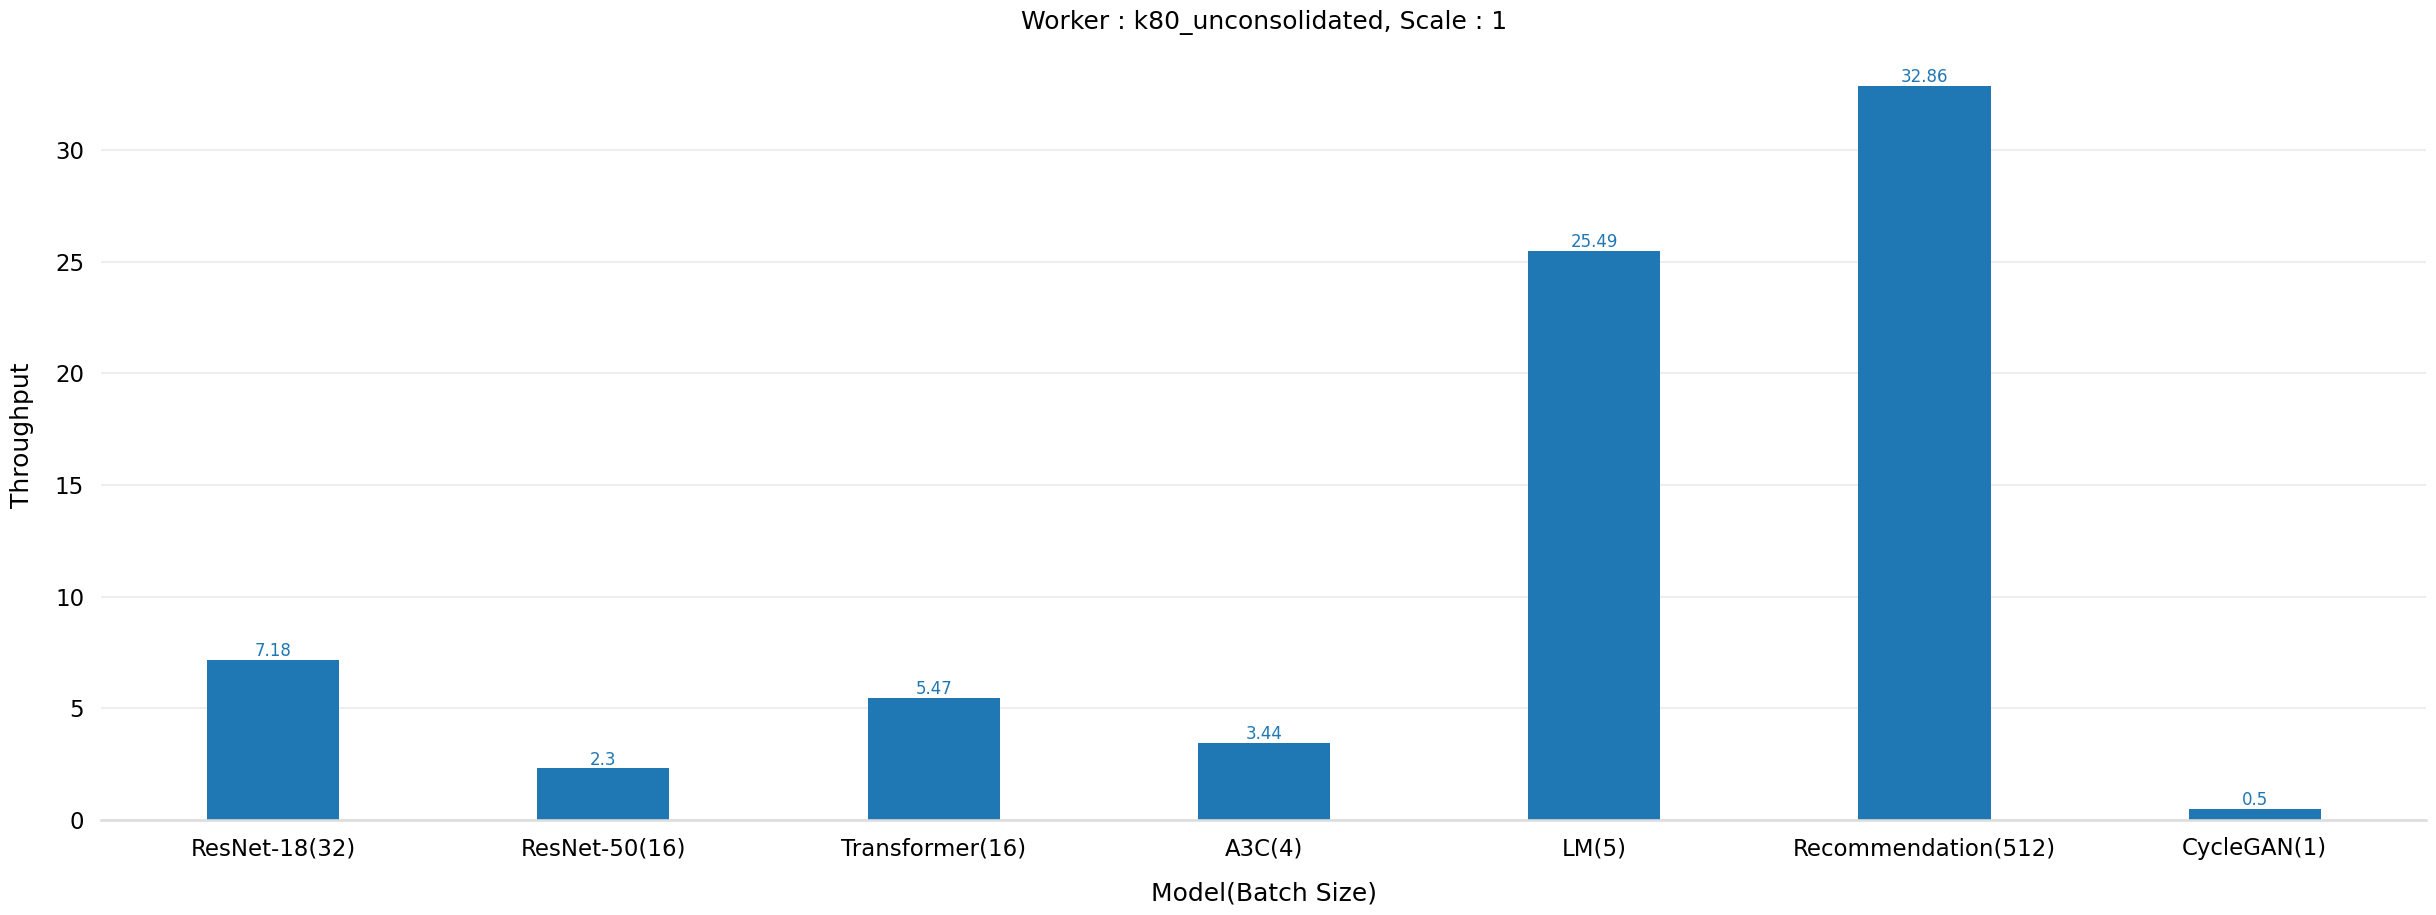

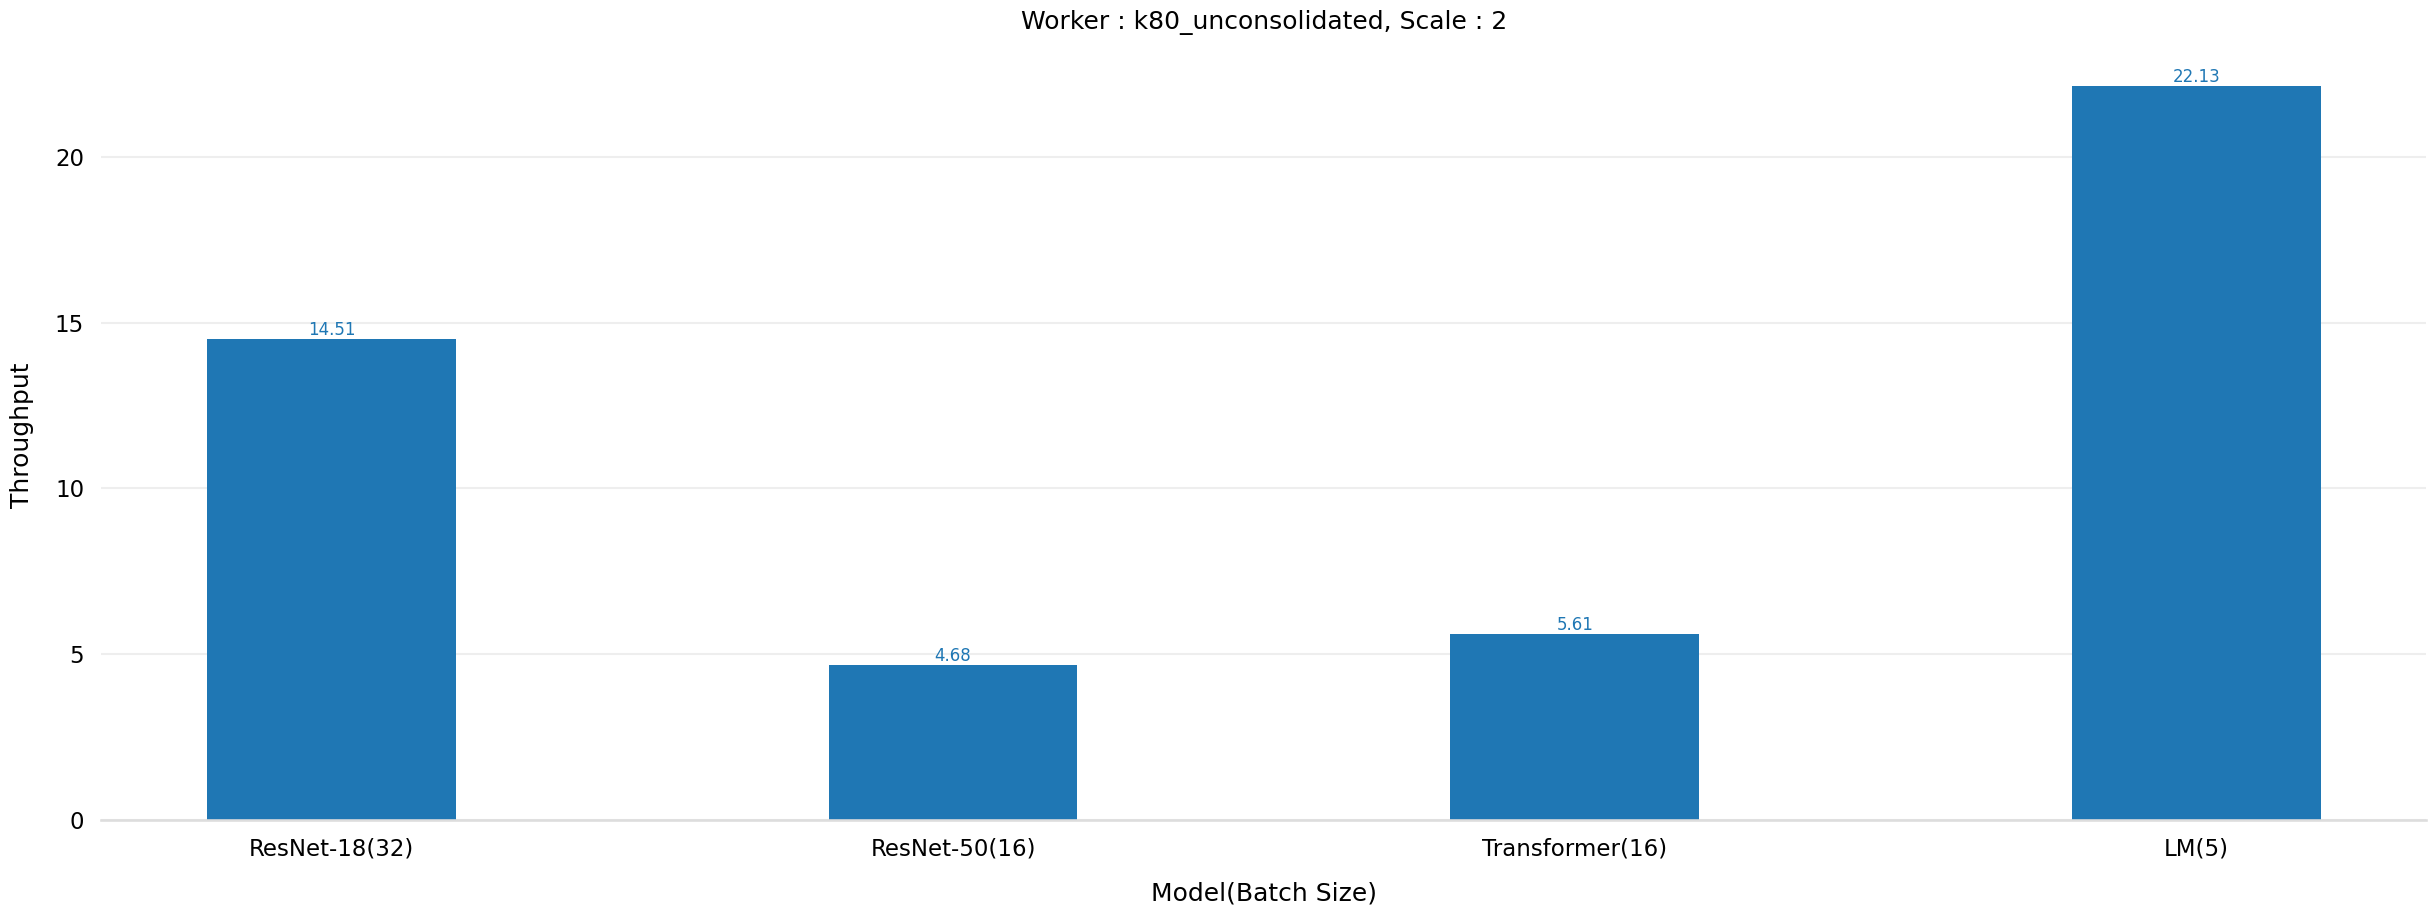

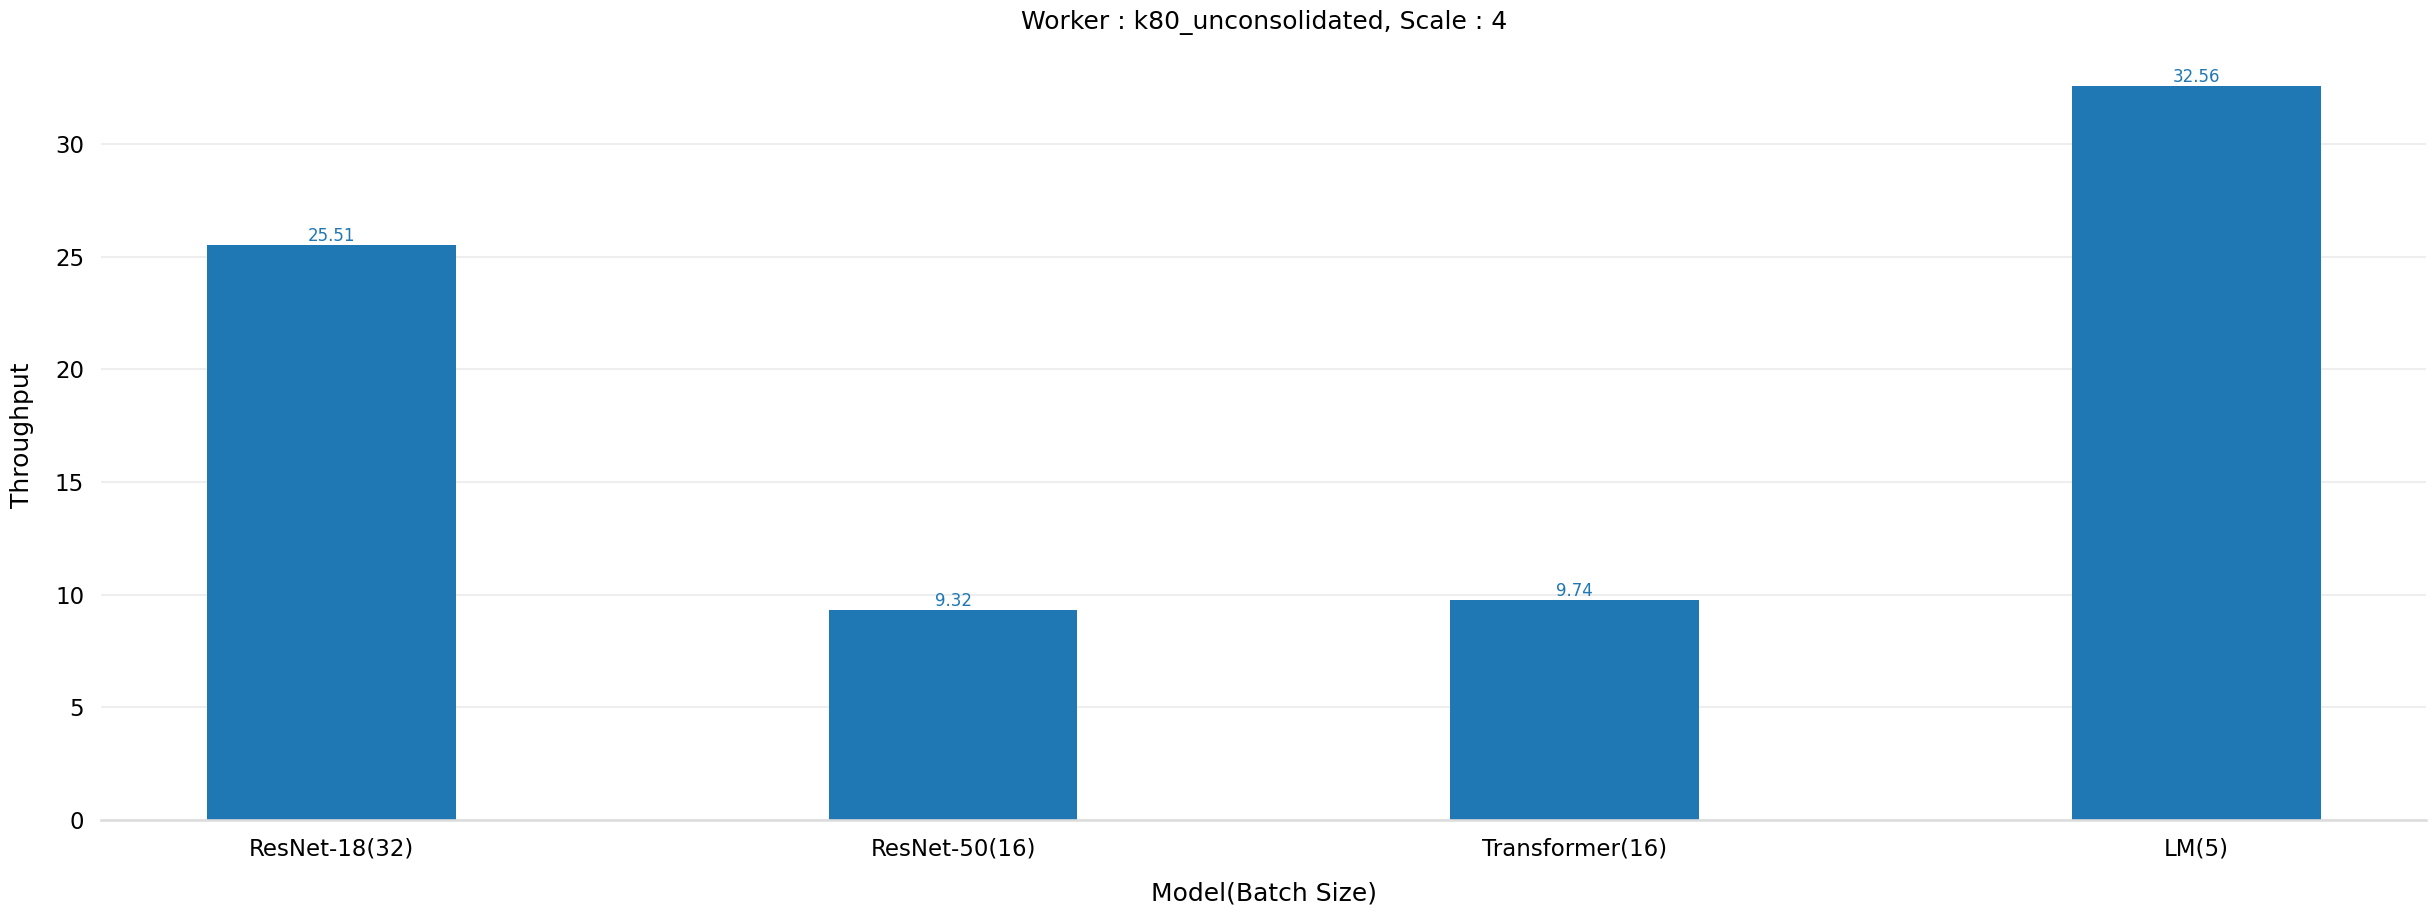

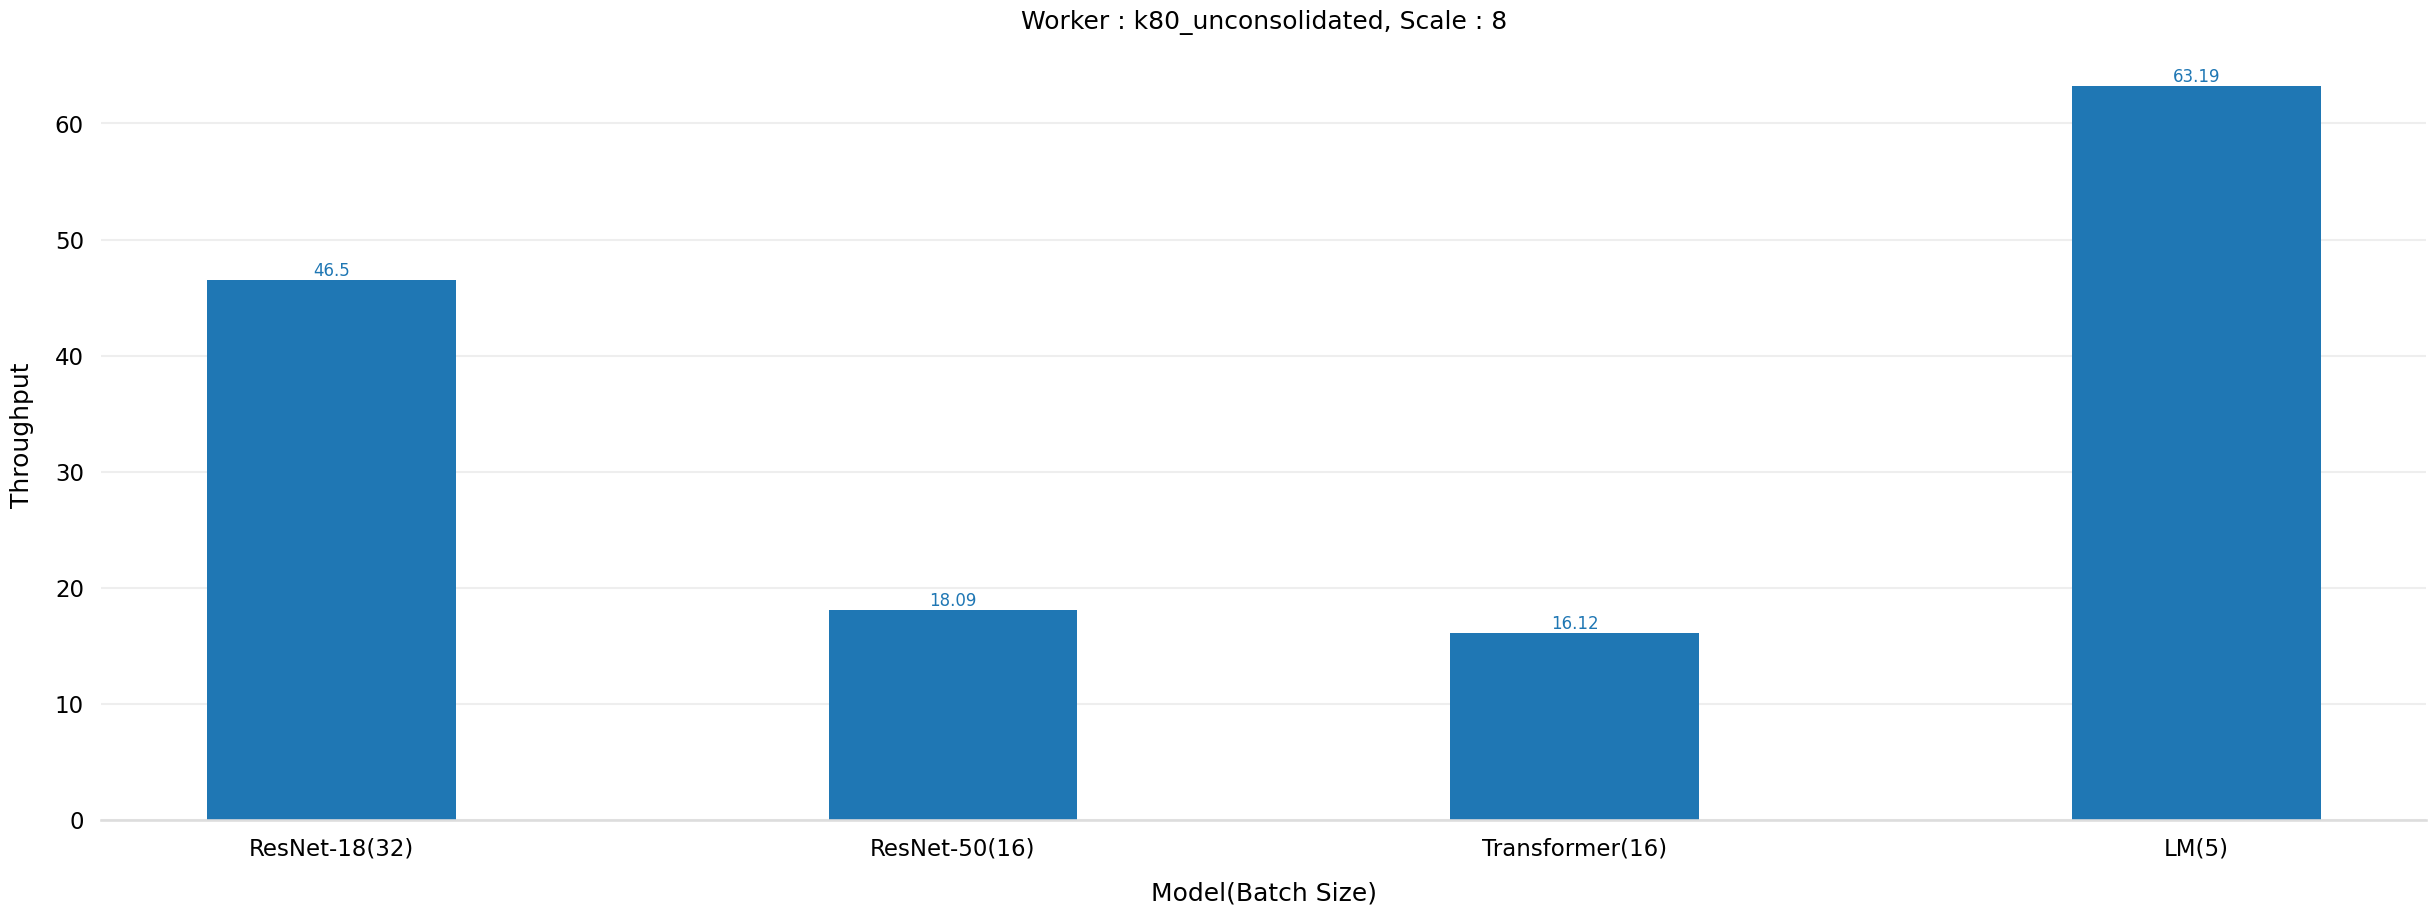

In [23]:
for worker_name in df["worker"].unique():
    res1 = df.query(f'worker == "{worker_name}" & model2 == "x"')
    for scale in res1["scale1"].unique():
        res2 = res1.query(f'scale1 == {scale}')

        fig, ax = plt.subplots(figsize=(30,10))

        bar_width = 0.4

        no_graphs = len(res2["model1"].unique())

        res_arr = []
        name_arr = []

        for idx, model in enumerate(res2["model1"].unique()):
            res3 = res2.query(f'model1 == "{model}"')

            res4 = res3.loc[ lambda res3 : res3["throughput1"].idxmax(), : ]

            # res_arr.append(res3["throughput1"].max())
            # name_arr.append(model)
            res_arr.append(round(res4["throughput1"],2))
            name_arr.append(f'{res4["model1"]}({res4["batchsize1"]})')

        ax.bar(name_arr, res_arr, width=bar_width)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        ax.set_xlabel('Model(Batch Size)', labelpad=15)
        ax.set_ylabel('Throughput', labelpad=15)
        ax.set_title(f'Worker : {worker_name}, Scale : {scale}', pad=15)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)